# 개요

- 출처
  - 원본 데이터 셋
    - [Paris Housing Price Prediction](https://www.kaggle.com/datasets/mssmartypants/paris-housing-price-prediction)
  - 경진 대회 데이터 셋
    - [Paris Housing Price](https://www.kaggle.com/competitions/playground-series-s3e6/overview) 
- 내용 : 교육 목적, 실습 및 필요한 지식 습득을 위한  파리의 가상 집값 데이터에서 생성된 데이터 셋
- 평가지표 : RMSE 
- 타임라인 : 2023.2.7 ~ 2023.2.20

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 준비 및 확인

In [ ]:
# 기본 패키지 도구 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 데이터 경로
path = '/content/drive/MyDrive/모듈프젝2/A팀-회귀/data/playground-series-season-3-episode-6/'

origin = pd.read_csv(path + 'ParisHousing.csv')
train = pd.read_csv(path + 'train.csv', index_col='id')
test = pd.read_csv(path + 'test.csv', index_col='id')
submission = pd.read_csv(path + 'sample_submission.csv', index_col='id')

In [ ]:
origin.shape, train.shape, test.shape, submission.shape

((10000, 17), (22730, 17), (15154, 16), (15154, 1))

In [ ]:
print(origin.columns)
print(train.columns)
print(test.columns)
print(submission.columns)
# price 변수를 제외하고 컬럼명 동일

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')
Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')
Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom'],
      dtype='object')
Index(['id', 'price'], dtype='object')


```
< 각 속성 확인 >
'id', : 고유 ID -> 확인 결과 id 컬럼은 인덱스정도 의미를 가진다 ( 컬럼 제거 가능 )
'squareMeters', : 방 면적 넓이 ( 연속형 )
'numberOfRooms', : 방 개수 ( 연속형 )
'hasYard', : 마당 존재 여부  ( 이진형 : 0,1 )
'hasPool', : 수영장 존재 여부 ( 이진형 : 0,1 )
'floors', : 층 수 ( 이산형 )
'cityCode', : 건물 구별 고유 코드 
'cityPartRange', : 지역구로 추정 ( 범주형 : 1 ~ 10 )
'numPrevOwners', : 이전 집 소유자 거친 횟수 ( 이산형 )
'made', : 제작연도 ( 범주형 )
'isNewBuilt',: 리빌딩 여부 ( 이진형 : 0,1 )
'hasStormProtector', : 태풍 보호기 설치 여부 ( 이진형 : 0,1 )
'basement', : 지하실 면적 넓이 (연속형)
'attic', : 다락방 면적 넓이 (연속형)
'garage', : 주차장 크기 (연속형)
'hasStorageRoom', : 창고 여부 ( 이진형 : 0,1 )
'hasGuestRoom', : 게스트 룸 개수 ( 이산형 )
'price' : 종속변수(Target), 시세 예측값
```

In [ ]:
train

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22725,55825,84,1,0,70,12031,3,10,2000,0,0,4477,786,345,0,0,5594137.1
22726,65870,88,1,0,49,23197,9,9,2015,0,1,4811,2454,755,0,7,6594705.0
22727,93192,42,1,0,39,8539,10,5,2014,1,0,5595,4072,789,0,0,9321511.4
22728,65797,86,1,0,89,23197,2,10,2000,1,0,5358,2513,411,0,0,6584708.2


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22730 entries, 0 to 22729
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       22730 non-null  int64  
 1   numberOfRooms      22730 non-null  int64  
 2   hasYard            22730 non-null  int64  
 3   hasPool            22730 non-null  int64  
 4   floors             22730 non-null  int64  
 5   cityCode           22730 non-null  int64  
 6   cityPartRange      22730 non-null  int64  
 7   numPrevOwners      22730 non-null  int64  
 8   made               22730 non-null  int64  
 9   isNewBuilt         22730 non-null  int64  
 10  hasStormProtector  22730 non-null  int64  
 11  basement           22730 non-null  int64  
 12  attic              22730 non-null  int64  
 13  garage             22730 non-null  int64  
 14  hasStorageRoom     22730 non-null  int64  
 15  hasGuestRoom       22730 non-null  int64  
 16  price              227

In [ ]:
test

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,47580,89,0,1,8,54830,5,3,1995,0,0,6885,8181,241,0,8
1,62083,38,0,0,87,8576,10,3,1994,1,1,4601,9237,393,1,4
2,90499,75,1,1,37,62454,9,6,1997,0,1,7454,2680,305,0,2
3,16354,47,1,1,9,9262,6,5,2019,1,1,705,5097,122,1,5
4,67510,8,0,0,55,24112,3,7,2014,1,1,3715,7979,401,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15149,86184,74,1,1,73,14009,2,10,1993,1,0,3714,3894,665,1,1
15150,45885,41,1,1,64,84208,4,5,2008,0,0,783,7628,976,0,0
15151,73554,51,0,0,41,49263,10,5,2004,0,1,8207,1777,775,0,10
15152,77604,51,0,1,33,67056,4,3,2019,0,0,9578,9706,135,0,2


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15154 entries, 0 to 15153
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   squareMeters       15154 non-null  int64
 1   numberOfRooms      15154 non-null  int64
 2   hasYard            15154 non-null  int64
 3   hasPool            15154 non-null  int64
 4   floors             15154 non-null  int64
 5   cityCode           15154 non-null  int64
 6   cityPartRange      15154 non-null  int64
 7   numPrevOwners      15154 non-null  int64
 8   made               15154 non-null  int64
 9   isNewBuilt         15154 non-null  int64
 10  hasStormProtector  15154 non-null  int64
 11  basement           15154 non-null  int64
 12  attic              15154 non-null  int64
 13  garage             15154 non-null  int64
 14  hasStorageRoom     15154 non-null  int64
 15  hasGuestRoom       15154 non-null  int64
dtypes: int64(16)
memory usage: 1.8 MB


In [ ]:
origin

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [ ]:
origin.info()
# 대부분 확인 시 모든 컬럼이 수치형으로 되어있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [ ]:
submission

,id,price
0,22730,4634456.897
1,22731,4634456.897
2,22732,4634456.897
3,22733,4634456.897
4,22734,4634456.897
...,...,...
15149,37879,4634456.897
15150,37880,4634456.897
15151,37881,4634456.897
15152,37882,4634456.897


# 초기 파악

## 결측치 확인

In [ ]:
# 참고 :  https://plotly.com/python-api-reference/

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def null_per(df):
    return (df.isnull().sum() / len(df)*100).sort_values(ascending=False)

plt.tight_layout() # 여백 확보

fig = make_subplots(rows=1, cols=3,
                    subplot_titles=("Original Dataset", "Training Dataset","Test Dataset"))

null_per_origin = null_per(origin)
null_per_train = null_per(train)
null_per_test = null_per(test)

print(null_per_origin)
fig.add_trace(
    go.Bar(x=null_per_origin.index, y=null_per_origin.values),
    row=1, col=1
)

print(null_per_train)

fig.add_trace(
    go.Bar(x=null_per_train.index, y=null_per_train.values),
    row=1, col=2
)

print(null_per_test)

fig.add_trace(
    go.Bar(x=null_per_test.index, y=null_per_test.values),
    row=1, col=3
)

fig.update_layout(height=400)
fig.show()

# 결측치 없음

squareMeters         0.0
isNewBuilt           0.0
hasGuestRoom         0.0
hasStorageRoom       0.0
garage               0.0
attic                0.0
basement             0.0
hasStormProtector    0.0
made                 0.0
numberOfRooms        0.0
numPrevOwners        0.0
cityPartRange        0.0
cityCode             0.0
floors               0.0
hasPool              0.0
hasYard              0.0
price                0.0
dtype: float64
squareMeters         0.0
isNewBuilt           0.0
hasGuestRoom         0.0
hasStorageRoom       0.0
garage               0.0
attic                0.0
basement             0.0
hasStormProtector    0.0
made                 0.0
numberOfRooms        0.0
numPrevOwners        0.0
cityPartRange        0.0
cityCode             0.0
floors               0.0
hasPool              0.0
hasYard              0.0
price                0.0
dtype: float64
squareMeters         0.0
numberOfRooms        0.0
hasYard              0.0
hasPool              0.0
floors              

<Figure size 432x288 with 0 Axes>

## 고유값 확인

In [ ]:
plt.tight_layout() # 여백 확보

fig = make_subplots(rows=1, cols=3,
                    subplot_titles=("Unique values For Original Dataset", "For Training Dataset","For Test Dataset"))

temp_data= origin.nunique().sort_values()
print(temp_data)
fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values),
    row=1, col=1
)

temp2_data= train.nunique().sort_values()
print(temp2_data)

fig.add_trace(
    go.Bar(x=temp2_data.index, y=temp2_data.values),
    row=1, col=2
)

temp3_data= test.nunique().sort_values()
print(temp3_data)

fig.add_trace(
    go.Bar(x=temp3_data.index, y=temp3_data.values),
    row=1, col=3
)

fig.update_layout(height=400)
fig.show()

# 분포 확인 시 별 차이가 안 보인다
# hasYard, hasPool, hasStorageRoom, isNewBuilt, hasStormProtector는 이진형인것을 알음

hasYard                  2
hasPool                  2
hasStorageRoom           2
isNewBuilt               2
hasStormProtector        2
cityPartRange           10
numPrevOwners           10
hasGuestRoom            11
made                    32
numberOfRooms          100
floors                 100
garage                 901
attic                 6267
basement              6352
squareMeters          9483
cityCode              9509
price                10000
dtype: int64
hasYard                 2
hasPool                 2
hasStorageRoom          2
isNewBuilt              2
hasStormProtector       2
cityPartRange          10
numPrevOwners          10
hasGuestRoom           11
made                   33
numberOfRooms         100
floors                101
garage                896
basement             4903
attic                5167
squareMeters         7319
price                7421
cityCode             7810
dtype: int64
hasYard                 2
hasPool                 2
isNewBuilt           

<Figure size 432x288 with 0 Axes>

## 중복값 확인

In [ ]:
train.shape, train.drop_duplicates().shape

((22730, 17), (22730, 17))

In [ ]:
test.shape, test.drop_duplicates().shape

((15154, 16), (15154, 16))

In [ ]:
origin.shape, origin.drop_duplicates().shape

((10000, 17), (10000, 17))

## 데이터 요약

In [ ]:
train.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,2.273000e+04,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,2.273000e+04
mean,4.658622e+04,48.241091,0.475891,0.452750,47.305983,50013.795996,5.585042,5.620766,2008.005059,0.467972,0.460009,5283.646634,5067.981698,530.469644,0.461681,5.153058,4.634457e+06
std,4.952124e+04,28.226428,0.499429,0.497773,47.777207,30006.637729,2.739533,2.713026,118.826777,0.498984,0.498409,3047.084412,3097.347939,274.840604,0.498540,3.055246,2.925163e+06
min,8.900000e+01,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.000000,0.000000,0.000000,4.000000,1.000000,4.000000,0.000000,0.000000,1.031350e+04
25%,2.039275e+04,25.000000,0.000000,0.000000,25.000000,22936.000000,3.000000,3.000000,2000.000000,0.000000,0.000000,2977.250000,2599.000000,297.000000,0.000000,3.000000,2.041739e+06
50%,4.448400e+04,47.000000,0.000000,0.000000,45.000000,50414.000000,6.000000,6.000000,2006.000000,0.000000,0.000000,5359.000000,4977.000000,515.000000,0.000000,5.000000,4.450823e+06
75%,7.154700e+04,75.000000,1.000000,1.000000,69.000000,76291.000000,8.000000,8.000000,2014.000000,1.000000,1.000000,7746.000000,7652.000000,767.000000,1.000000,8.000000,7.159920e+06
max,6.071330e+06,100.000000,1.000000,1.000000,6000.000000,491100.000000,10.000000,10.000000,10000.000000,1.000000,1.000000,91992.000000,96381.000000,9017.000000,1.000000,10.000000,1.000428e+07


In [ ]:
test.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
count,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000
mean,45729.407681,47.874951,0.483371,0.445361,46.401148,50185.582750,5.616933,5.602547,2006.225485,0.472219,0.463442,5299.415468,5057.506599,525.091065,0.463178,5.095618
std,29200.142520,28.164077,0.499740,0.497022,27.000547,31227.690126,2.727914,2.718316,8.156347,0.499244,0.498678,2980.156234,2928.004147,268.504745,0.498659,3.049174
min,69.000000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.000000,0.000000,0.000000,8.000000,1.000000,8.000000,0.000000,0.000000
25%,19189.000000,25.000000,0.000000,0.000000,25.000000,23141.000000,3.000000,3.000000,2000.000000,0.000000,0.000000,3114.000000,2567.000000,294.250000,0.000000,2.000000
50%,43802.000000,46.000000,0.000000,0.000000,44.000000,50693.000000,6.000000,6.000000,2006.000000,0.000000,0.000000,5359.000000,5017.000000,501.000000,0.000000,5.000000
75%,70898.000000,75.000000,1.000000,1.000000,69.000000,76264.000000,8.000000,8.000000,2014.000000,1.000000,1.000000,7739.000000,7650.750000,757.000000,1.000000,8.000000
max,99999.000000,100.000000,1.000000,1.000000,100.000000,977950.000000,10.000000,10.000000,2021.000000,1.000000,1.000000,89016.000000,38535.000000,1000.000000,1.000000,10.000000


In [ ]:
origin.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


## 전체 요약 (함수화 처리)

In [ ]:
def summary(df, train=train):
    print(f'data shape: {df.shape}')
    sum_df = pd.DataFrame(df.dtypes, columns=['type'])
    sum_df['null'] = df.isnull().sum().values * 100
    #sum_df['missing_per'] = df.isnull().sum().values / len(df)
    sum_df['unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    sum_df['min'] = desc['min'].values
    sum_df['max'] = desc['max'].values
    sum_df['mean'] = desc['mean'].values
    sum_df['first value'] = df.iloc[0].values
    sum_df['second value'] = df.iloc[1].values
    sum_df['third value'] = df.iloc[2].values
    
    return sum_df
summary_df = summary(train)
summary_df

data shape: (22730, 17)


,type,null,unique,min,max,mean,first value,second value,third value
squareMeters,int64,0,7319,89.0,6071330.0,4.658622e+04,34291.0,95145.0,92661.0
numberOfRooms,int64,0,100,1.0,100.0,4.824109e+01,24.0,60.0,45.0
hasYard,int64,0,2,0.0,1.0,4.758909e-01,1.0,0.0,1.0
hasPool,int64,0,2,0.0,1.0,4.527497e-01,0.0,1.0,1.0
floors,int64,0,101,1.0,6000.0,4.730598e+01,47.0,60.0,62.0
cityCode,int64,0,7810,3.0,491100.0,5.001380e+04,35693.0,34773.0,45457.0
cityPartRange,int64,0,10,1.0,10.0,5.585042e+00,2.0,1.0,4.0
numPrevOwners,int64,0,10,1.0,10.0,5.620766e+00,1.0,4.0,8.0
made,int64,0,33,1990.0,10000.0,2.008005e+03,2000.0,2000.0,2020.0
isNewBuilt,int64,0,2,0.0,1.0,4.679718e-01,0.0,0.0,1.0


In [ ]:
summary_df2 = summary(origin)
summary_df2
# 오리지널 데이터와 비교 시, 차이가 나는 부분이 보인다. squareMeters, floors, cityCode, made, basement, attic, garage에 이상치가 있다는 것을 추측

data shape: (10000, 17)


,type,null,unique,min,max,mean,first value,second value,third value
squareMeters,int64,0,9483,89.0,99999.0,4.987013e+04,75523.0,80771.0,55712.0
numberOfRooms,int64,0,100,1.0,100.0,5.035840e+01,3.0,39.0,58.0
hasYard,int64,0,2,0.0,1.0,5.087000e-01,0.0,1.0,0.0
hasPool,int64,0,2,0.0,1.0,4.968000e-01,1.0,1.0,1.0
floors,int64,0,100,1.0,100.0,5.027630e+01,63.0,98.0,19.0
cityCode,int64,0,9509,3.0,99953.0,5.022549e+04,9373.0,39381.0,34457.0
cityPartRange,int64,0,10,1.0,10.0,5.510100e+00,3.0,8.0,6.0
numPrevOwners,int64,0,10,1.0,10.0,5.521700e+00,8.0,6.0,8.0
made,int64,0,32,1990.0,2021.0,2.005488e+03,2005.0,2015.0,2021.0
isNewBuilt,int64,0,2,0.0,1.0,4.991000e-01,0.0,1.0,0.0


# EDA

- EDA 진행중 수행하는 시각화는 평면적인 데이터에서 주요 특성을 드러내는 효과적인 방법

- 데이터 종류 (복습)
 
|범주형(Categorical)|--|예시|특징|
|--|--|--|--|
|명목형(Nominal)|--|성별, 음식종류|순위가 없다.서열없다|
|순서형(Ordinal)|--|학점, 순위, 평점|순위를 매길수 있다. |
* 사칙연산이 가능한 데이터

|수치형(Numerical)|--|예시|특징|
|--|--|--|--|
|이산형(Discrete)|--|메뉴개수, 책개수|정수로 떨어지는 셀 수 있는 데이터, 소수점없음|
|연속형(Continous)|--|키,몸무게,집값|값이끊기지 않고 연속된 데이터, 소수점가능|
* 범주로 나눠지는 데이터

- [기초 통계 이해](https://m.blog.naver.com/dairum_enc/221409597367)
- [범주형,수치형,이상형,연속형,명목형,순서형 정리 - Unique Life](https://horae.tistory.com/entry/%EB%B2%94%EC%A3%BC%ED%98%95%EC%88%98%EC%B9%98%ED%98%95%EC%9D%B4%EC%83%81%ED%98%95%EC%97%B0%EC%86%8D%ED%98%95%EB%AA%85%EB%AA%A9%ED%98%95%EC%88%9C%EC%84%9C%ED%98%95-%EC%A0%95%EB%A6%AC)

In [ ]:
# 앞 선 데이터셋 (기준) 요약을 통해서 데이터 유형을 분류해보았다.

# 범주형
features_cat = ['hasYard', 'hasPool', 'cityPartRange', 'numPrevOwners', 'isNewBuilt','hasStormProtector', 'hasStorageRoom','hasGuestRoom',]

# 이진형
features_bin = ['hasYard', 'hasPool','isNewBuilt','hasStormProtector', 'hasStorageRoom']

# 수치형
features_cont=['squareMeters', 'numberOfRooms', 'floors', 'cityCode', 'made', 'basement', 'attic', 'garage' ]


# 종속변수
target = 'price'

## Target 분포 확인

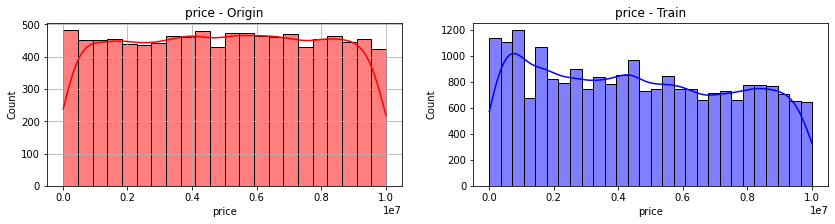

In [ ]:
plt.figure(figsize=(14,3))
ax1 = plt.subplot(1,2,1)
sns.histplot(x=origin[target], color='r', kde=True)
plt.title(target + ' - Origin')
plt.grid()
ax2 = plt.subplot(1,2,2)
sns.histplot(x=train[target], color='b', kde=True)
plt.title(target + ' - Train')
plt.show()

# 가격대의 분포가 다양하는 것을 보아 여러 가격대가 있는 것으로 보인다.

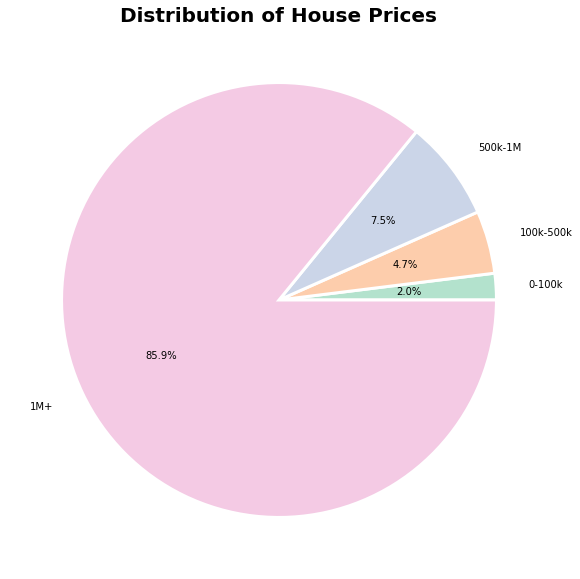

In [ ]:
# 앞 선 histplot를 통해서 가격대를 10,50,100만대로 나눠서 확인

plt.figure(figsize=(15, 10))
bins = [0, 100000, 500000,1000000, train['price'].max()]
labels = ['0-100k', '100k-500k','500k-1M', '1M+']
train['price_range'] = pd.cut(train['price'], bins=bins, labels=labels)


plt.pie(train['price_range'].value_counts().sort_values(),autopct='%.1f%%',labels=labels,colors=sns.color_palette('Pastel2'),labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })

plt.title("Distribution of House Prices",fontdict={'fontweight':'bold','fontsize':20})

plt.show()

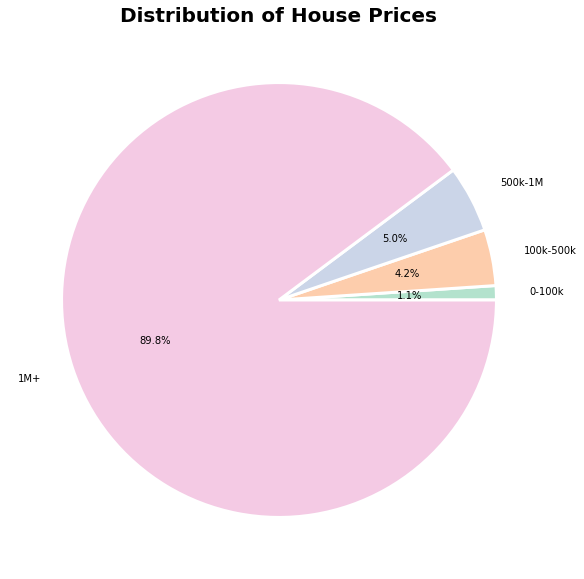

In [ ]:
plt.figure(figsize=(15, 10))
bins = [0, 100000, 500000,1000000, origin['price'].max()]
labels = ['0-100k', '100k-500k','500k-1M', '1M+']
origin['price_range'] = pd.cut(origin['price'], bins=bins, labels=labels)


plt.pie(origin['price_range'].value_counts().sort_values(),autopct='%.1f%%',labels=labels,colors=sns.color_palette('Pastel2'),labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })

plt.title("Distribution of House Prices",fontdict={'fontweight':'bold','fontsize':20})

plt.show()
# 대부분 집값이 백만이상이다.

## Displot

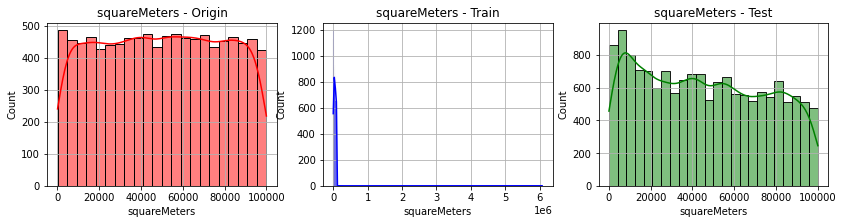

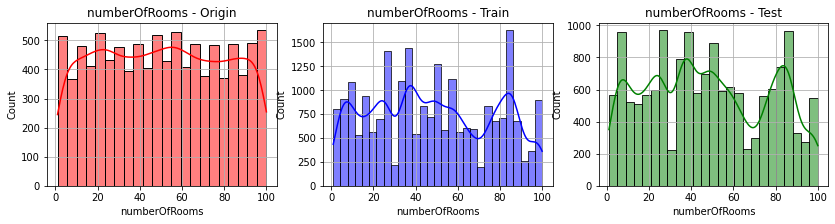

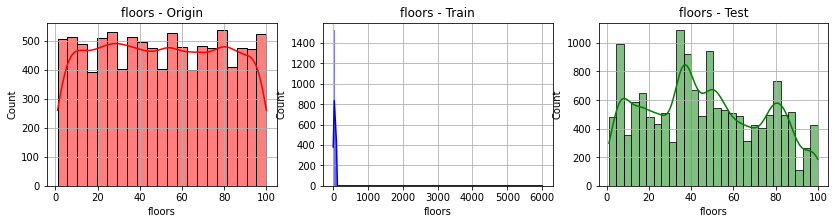

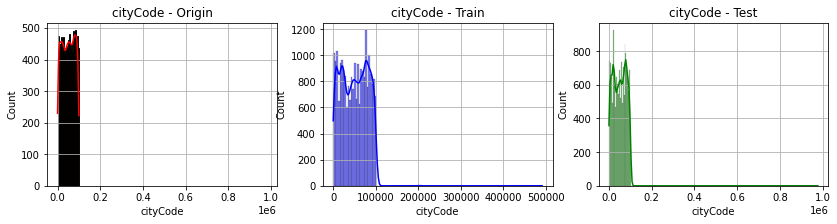

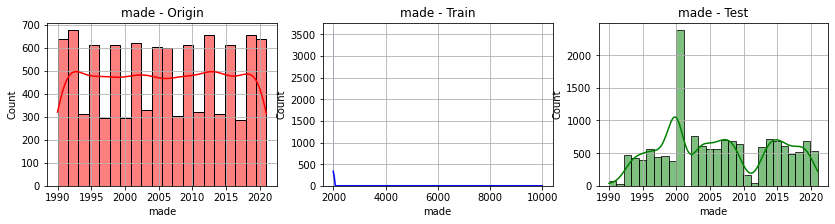

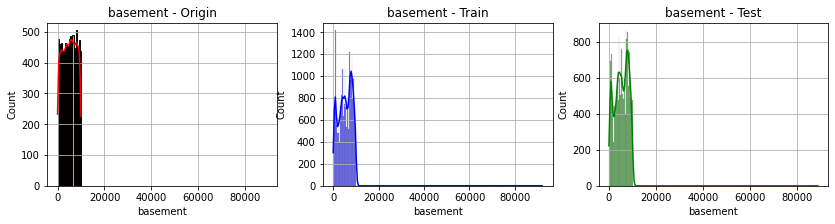

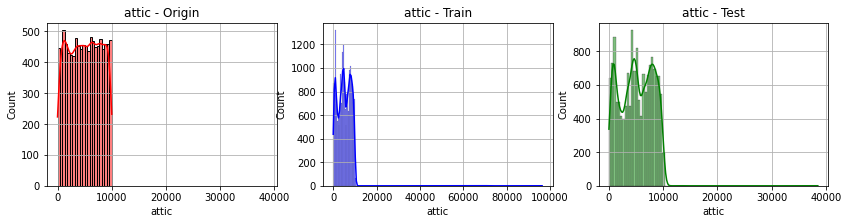

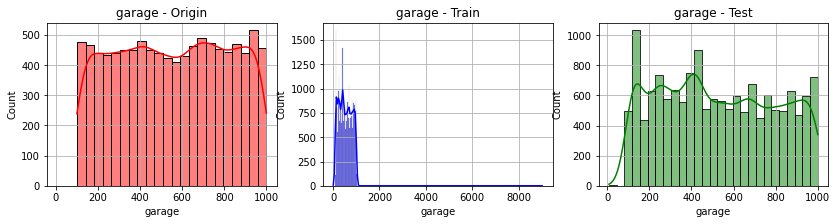

In [ ]:
for f in features_cont:
  plt.figure(figsize=(14,3))
  ax1 = plt.subplot(1,3,1)
  sns.histplot(x=origin[f], color='r', kde=True)
  plt.title(f + ' - Origin')
  plt.grid()
  ax2 = plt.subplot(1,3,2)
  sns.histplot(x=train[f], color='b', kde=True)
  plt.title(f + ' - Train')
  plt.grid()
  ax3 = plt.subplot(1,3,3, sharex=ax1)
  sns.histplot(x=test[f],color='g', kde=True)
  plt.title(f + ' - Test')
  plt.grid()
  plt.show()

# 확인 시 train,test에서 비대칭(skewed) 데이터가 보인다. -> Skewed Data https://dining-developer.tistory.com/18

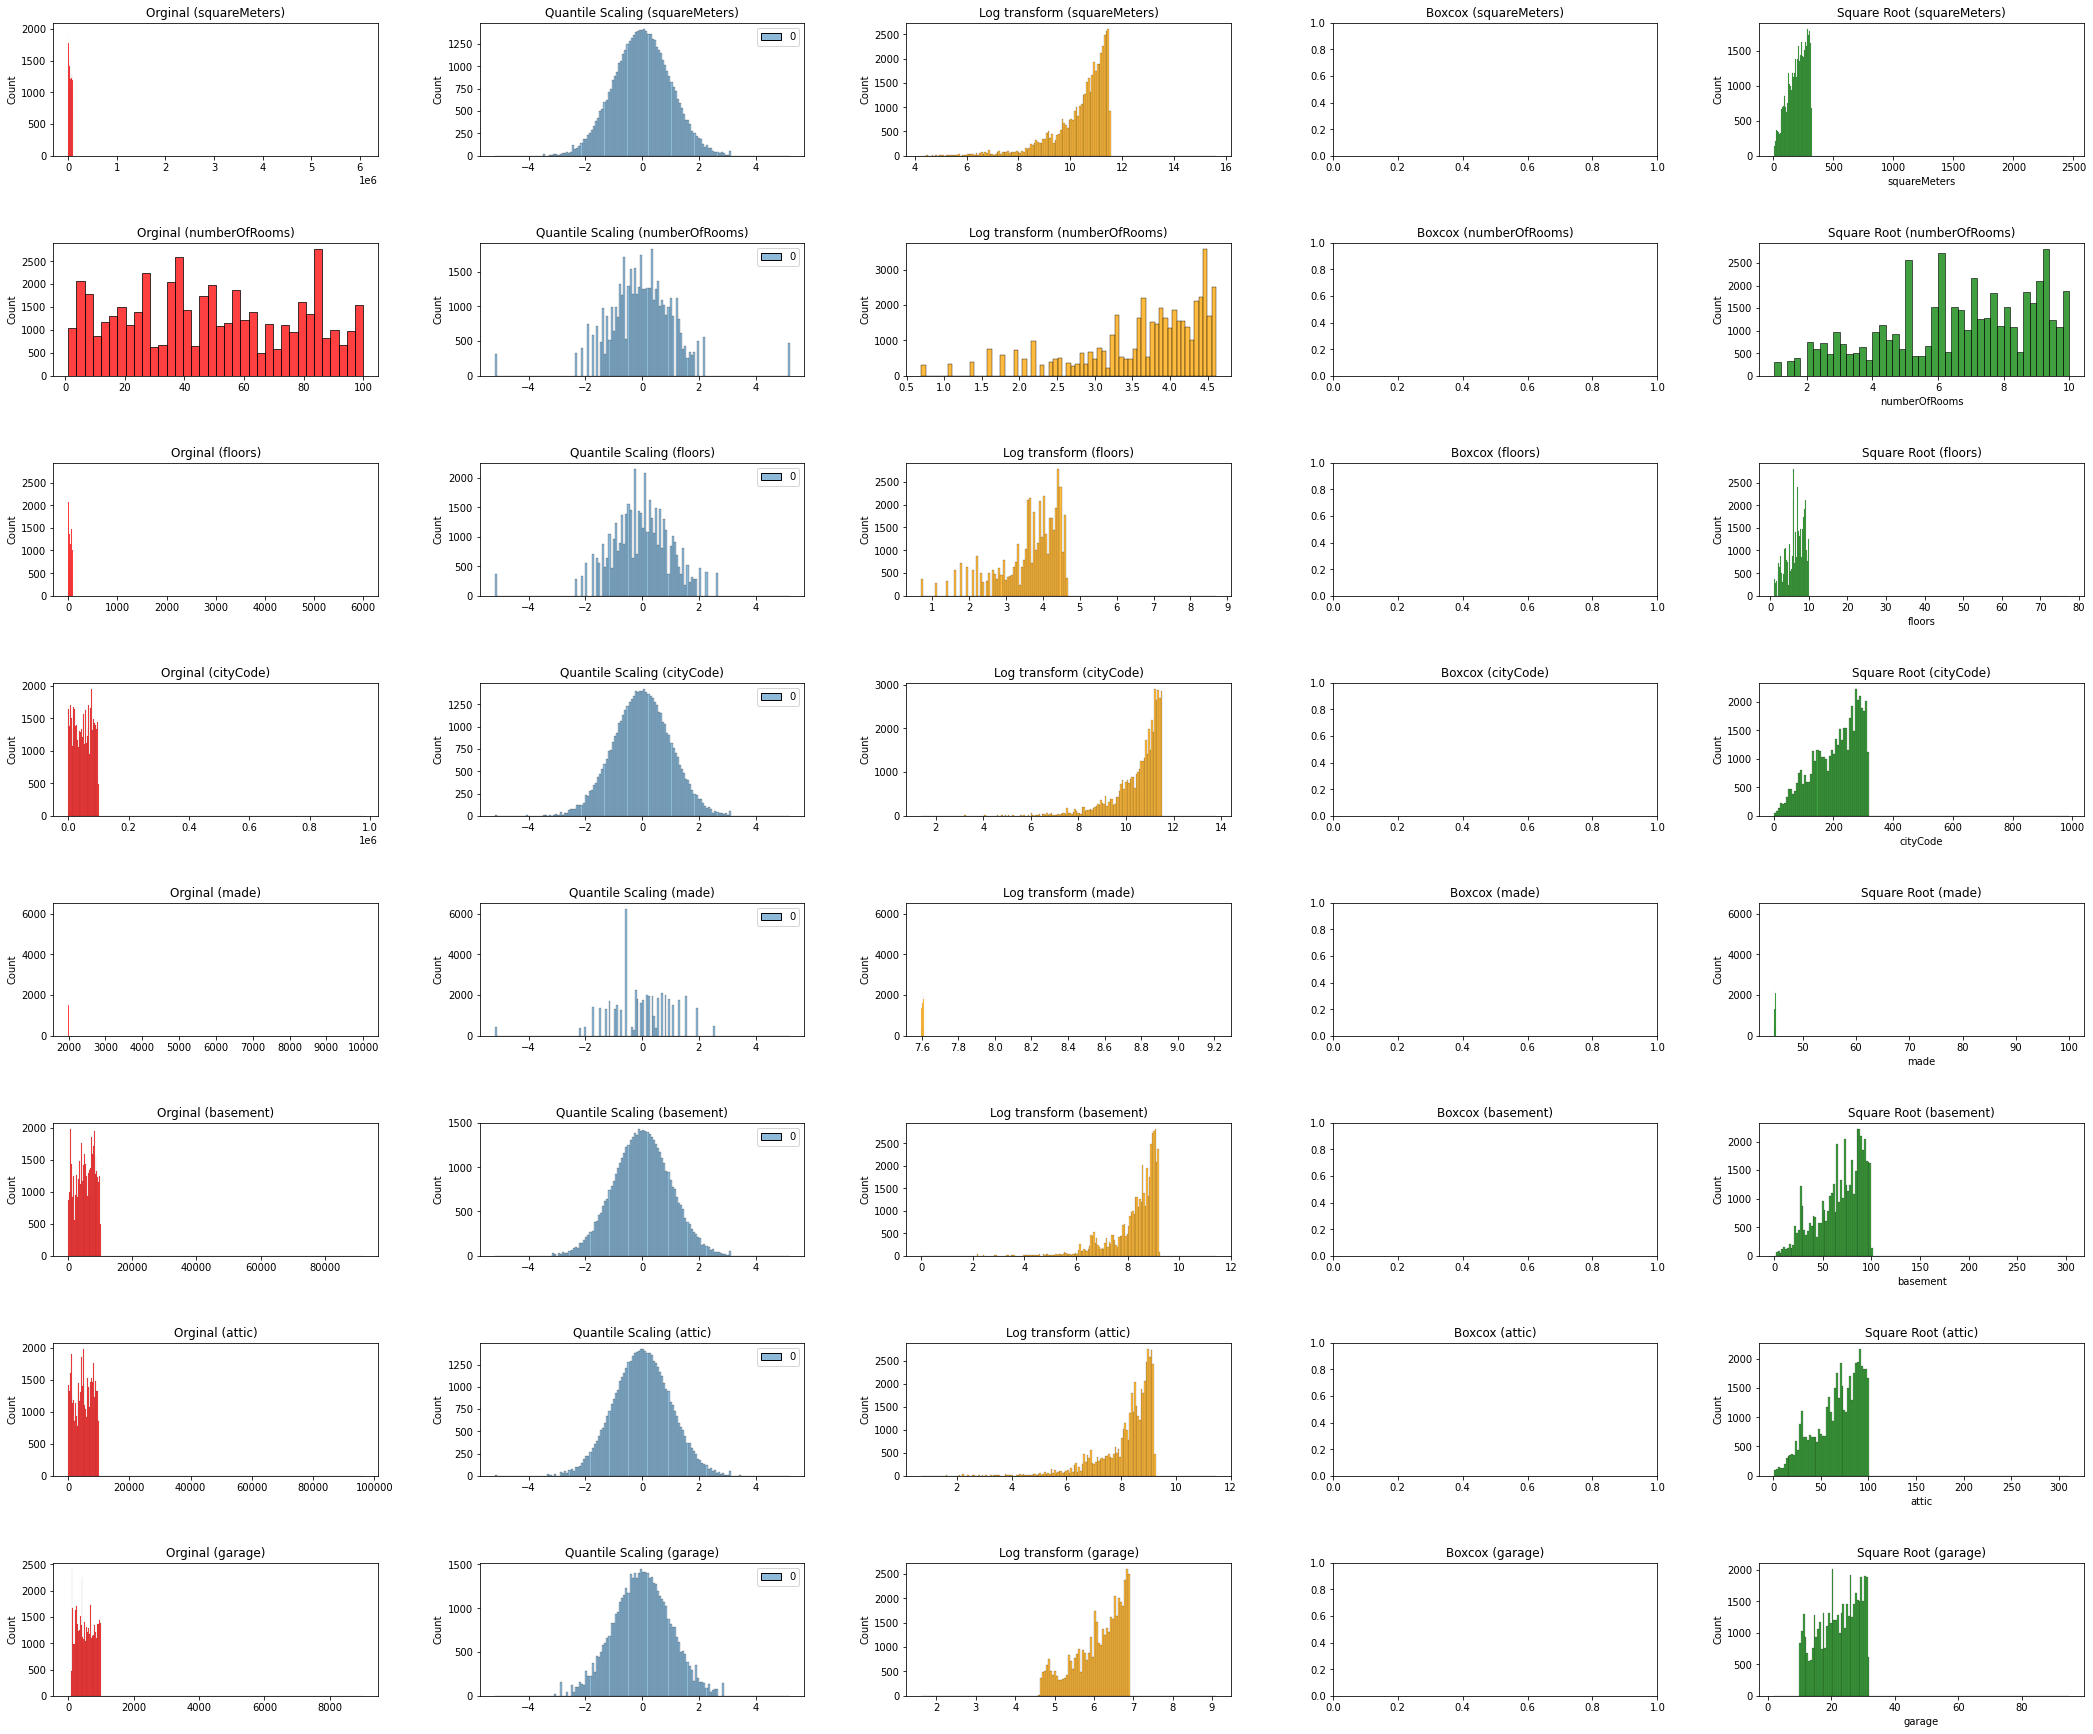

In [ ]:
# 위에서 보인 비대칭 피처를 변환시키기 위해서는 어떤 방식으로 해야 될까
# 참고 : https://www.kaggle.com/code/slythe/1-eda-model-selection-pse3e6-regression

from scipy.stats import boxcox, median_abs_deviation 
from sklearn.preprocessing import QuantileTransformer

all_data = pd.concat([origin,train,test], ignore_index=True)

fig, axes = plt.subplots(len(features_cont),5, figsize = (30,25))

for i,col in enumerate(features_cont):
    scaler = QuantileTransformer(output_distribution="normal")
    quant_df = scaler.fit_transform(all_data[[col]])

    sns.histplot(x= all_data[col],ax= axes[i,0], color = "r")
    sns.histplot(quant_df,ax= axes[i,1] )
    sns.histplot(np.log1p(all_data[col]), ax = axes[i,2], color= "orange")

    try:
        sns.histplot(boxcox(all_data[col], 0.15)[0], ax = axes[i,3], color= "orange")

    except:
        pass

    sns.histplot(np.sqrt(all_data[col]), ax = axes[i,4], color= "green")

    axes[i,0].set_title(f"Orginal ({col})")
    axes[i,0].set(xlabel=None)
    axes[i,1].set_title(f"Quantile Scaling ({col})")
    axes[i,2].set_title(f"Log transform ({col})")
    axes[i,2].set(xlabel=None)
    axes[i,3].set_title(f"Boxcox ({col})")
    axes[i,4].set_title(f"Square Root ({col})")

plt.tight_layout(pad = 4)
plt.show()

# 확인 시 Quantile Scaling를 사용 시 정규분포 형태에 가까워 진다는 것을 알 수 있었다.

## Boxplot

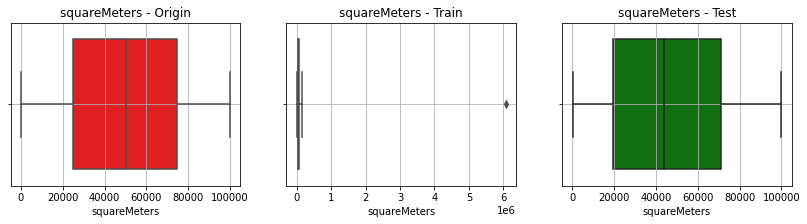

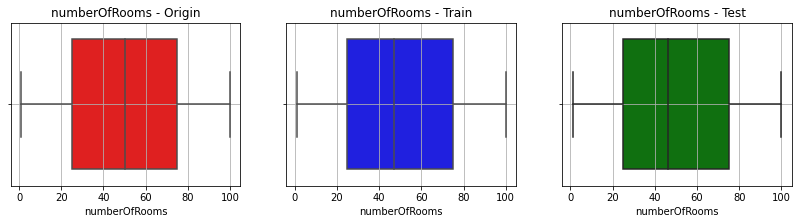

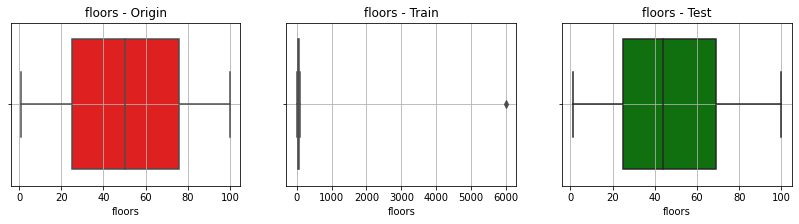

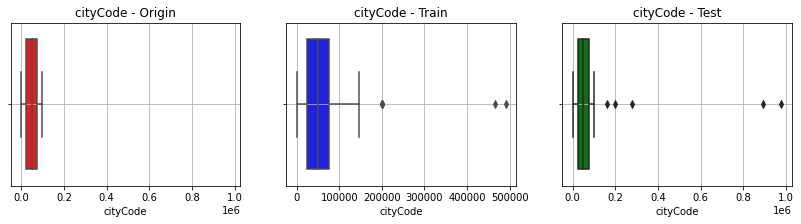

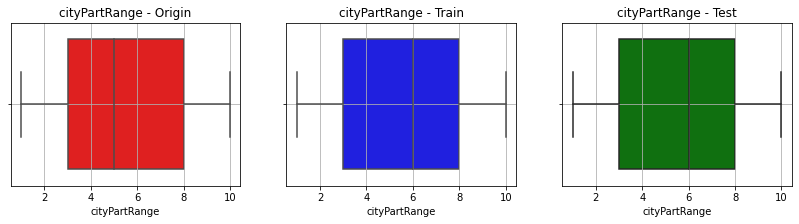

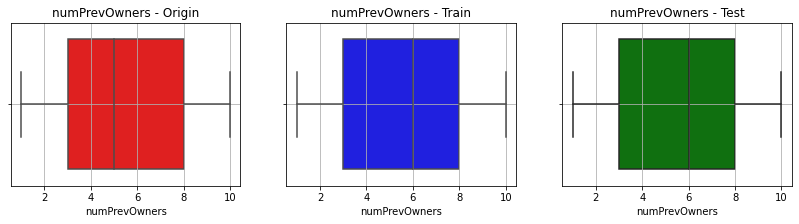

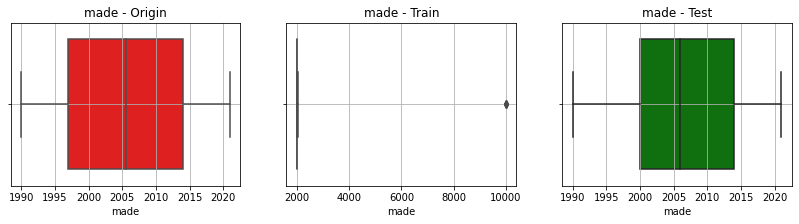

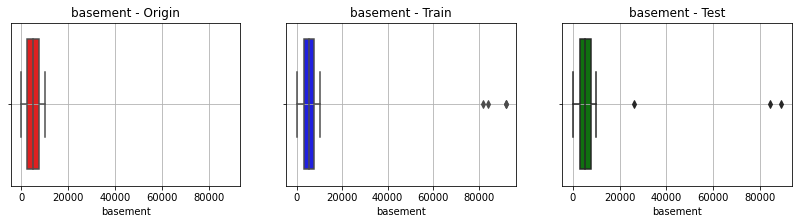

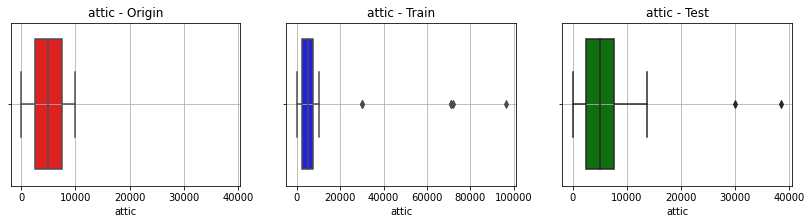

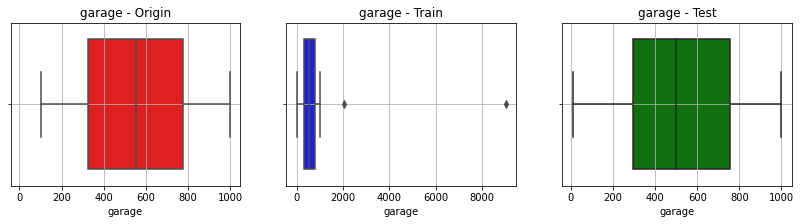

In [ ]:
for f in features_cont:
  plt.figure(figsize=(14,3))
  ax1 = plt.subplot(1,3,1)
  sns.boxplot(x=origin[f], color='r')
  plt.title(f + ' - Origin')
  plt.grid()
  ax2 = plt.subplot(1,3,2)
  sns.boxplot(x=train[f], color='b')
  plt.title(f + ' - Train')
  plt.grid()
  ax3 = plt.subplot(1,3,3, sharex=ax1)
  sns.boxplot(x=test[f],color='g')
  plt.title(f + ' - Test')
  plt.grid()
  plt.show()

# 원본에는 이상치 X, train/test이상치가 존재하는 것이 확인 -> squareMeter, floors, citycode, made, basement, attic, garage
# 다만 test 데이터 셋에서는 citycode, basement, attic 만 해당 됨 

## Countplot 

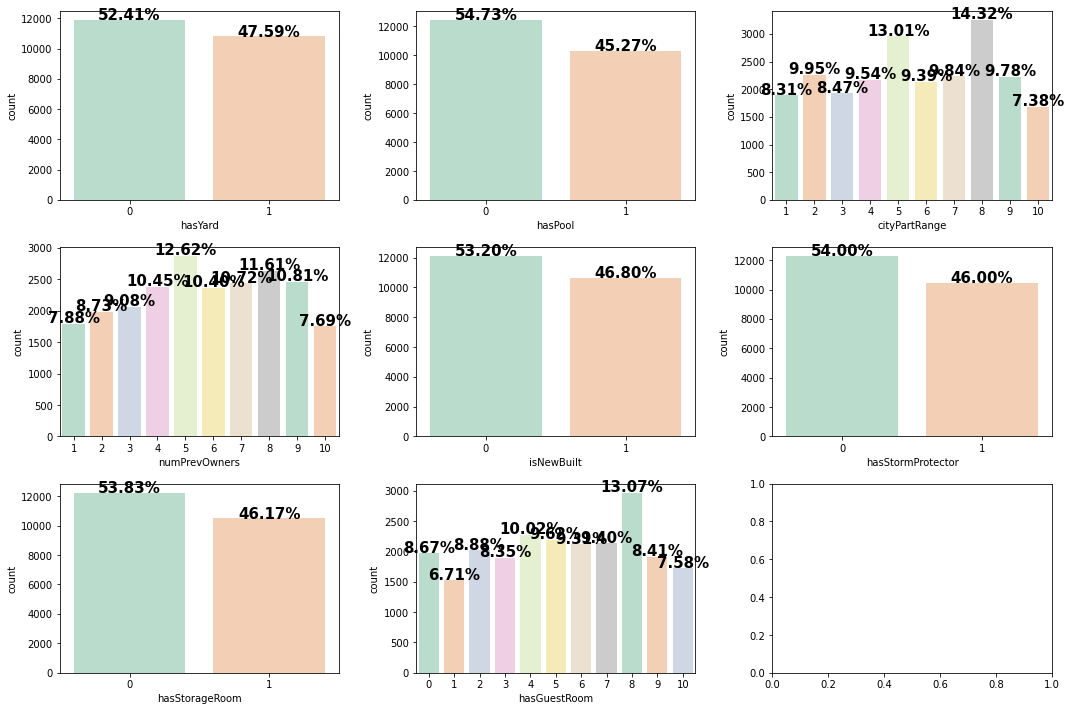

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.ravel()

for i, column in enumerate(features_cat):
    sns.countplot(x=train[column], ax=axes[i],palette='Pastel2')
    for j in axes[i].patches:
        height = j.get_height()
        axes[i].text(j.get_x() + j.get_width() / 2.,
                height + 20,
                '{:1.2f}%'.format(height / len(train) * 100),
                ha="center", fontsize=15,fontweight='bold')

plt.tight_layout()
plt.show()

## ScatterPlot

- **이상치 제거후 확인 시 선형관계 확인 가능**

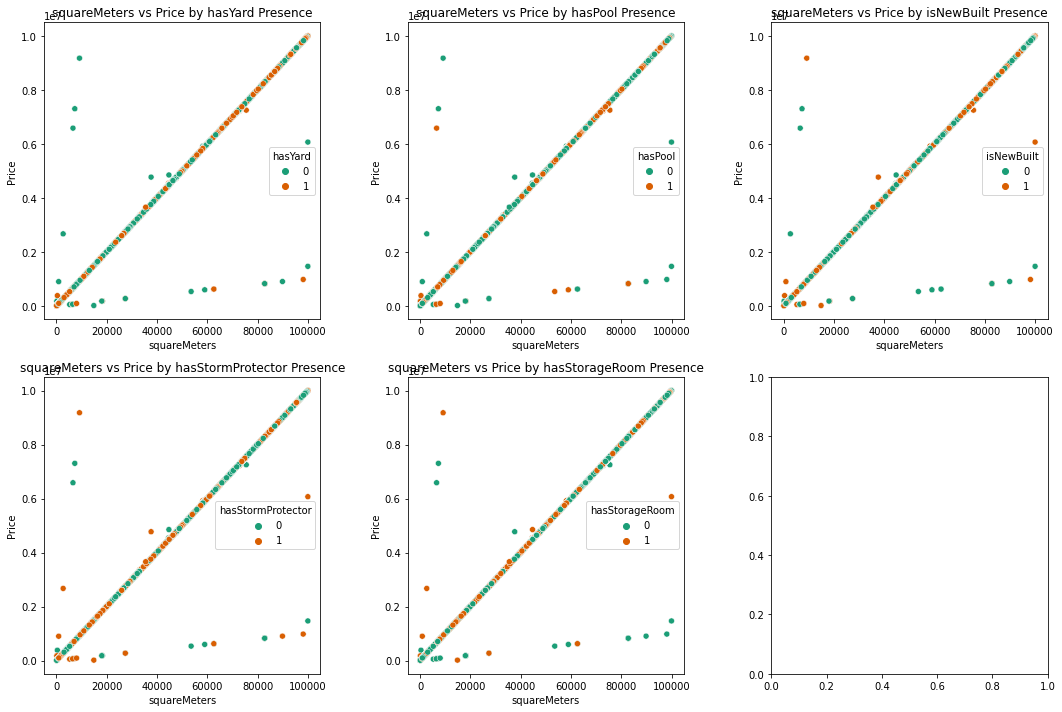

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs = axs.ravel()

for i, column in enumerate(features_bin ):
    sns.scatterplot( x= train['squareMeters'], y=train['price'], hue = train[column], ax=axs[i],palette='Dark2')
    axs[i].set_title('squareMeters vs Price by '+ column +' Presence')
    axs[i].set_xlabel('squareMeters')
    axs[i].set_ylabel('Price')

plt.tight_layout()
plt.show()

## Regplot

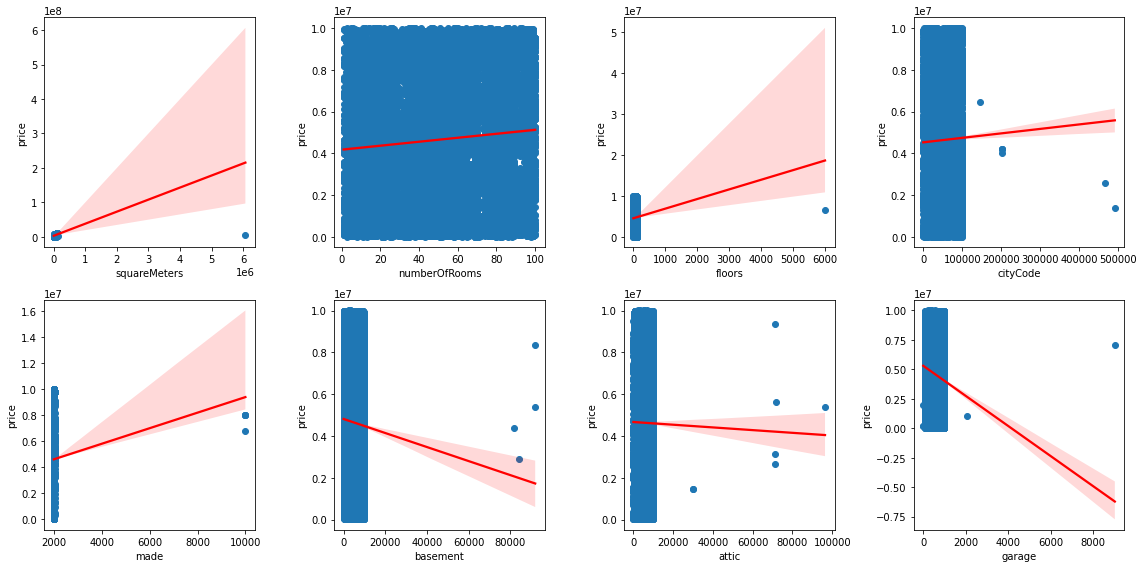

In [ ]:
fig, axes = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

for i, feature in enumerate(features_cont):
    row = int(i/4) 
    col = int(i%4)
    sns.regplot(x=feature,y='price',data=train, ax=axes[row][col], line_kws={'color':'red'}, scatter_kws={'alpha':1.0})

plt.tight_layout()
plt.show()

# 연속형 확인 시 squareMeters, floor, made가 어느정도 선형이 보임

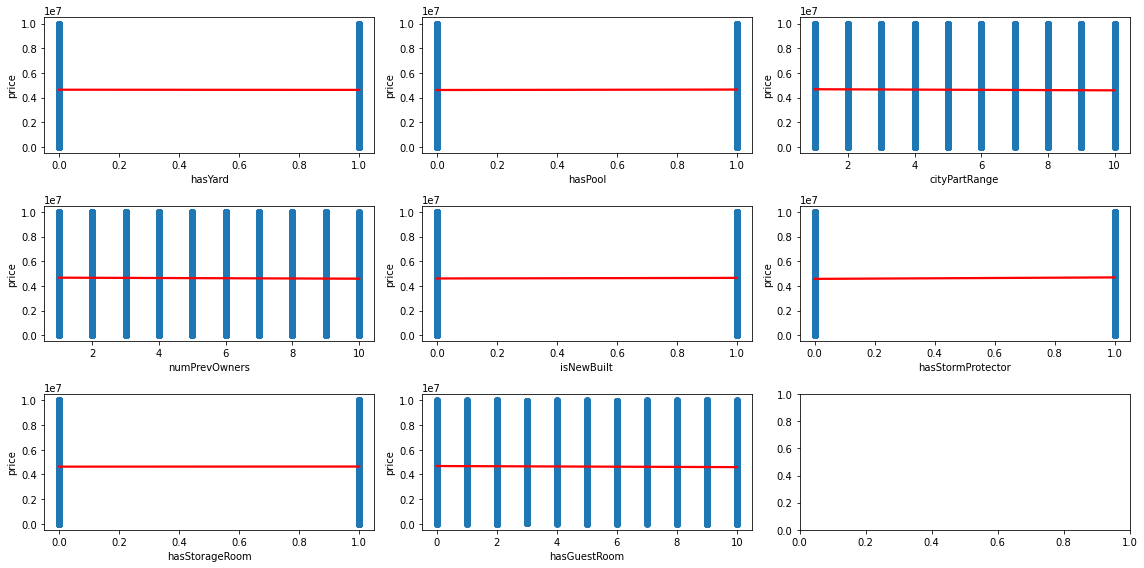

In [ ]:
fig, axes = plt.subplots(figsize=(16,8), ncols=3, nrows=3)

for i, feature in enumerate(features_cat):
    row = int(i/3) 
    col = int(i%3)
    sns.regplot(x=feature, y='price',data=train, ax=axes[row][col], line_kws={'color':'red'}, scatter_kws={'alpha':1.0})
    
plt.tight_layout()
plt.show()

## Heatmap

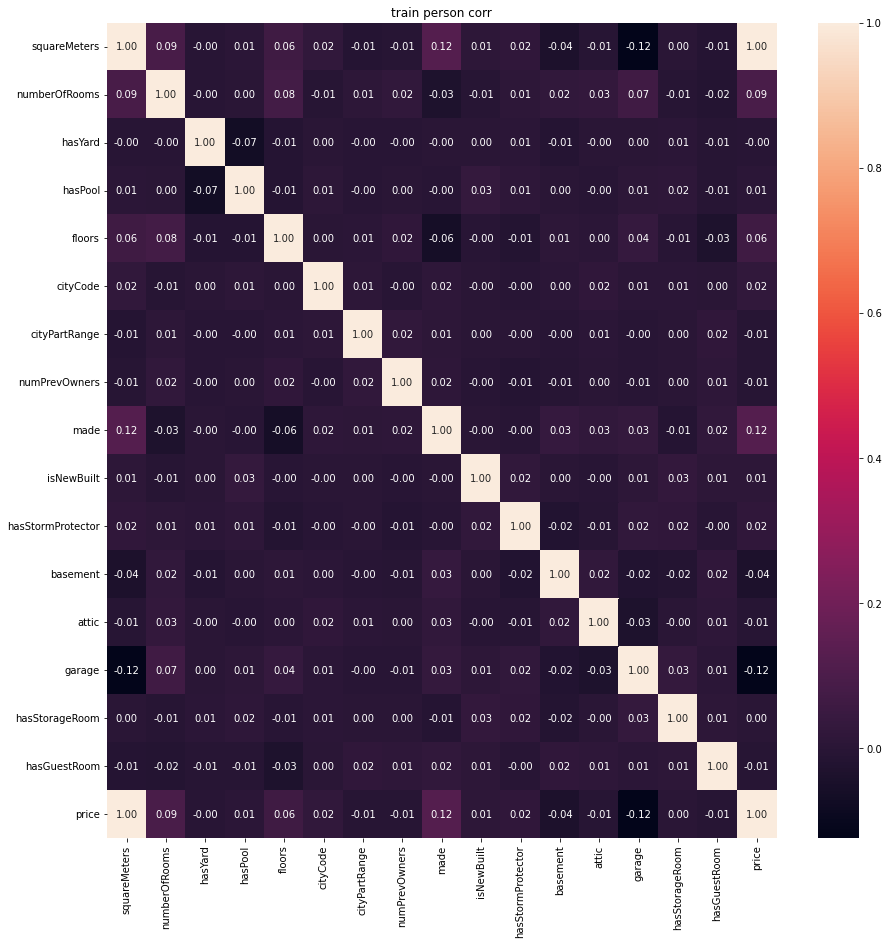

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(), 
            cbar=True, 
            annot=True, 
            fmt='.2f')
plt.title("train person corr")
plt.show()

# squareMeter를 제외하고 대부분 약한 상관관계를 가지고 있다.

# EDA 결과

- origin/train/test 데이터 셋에서는 결측치는 X 
- Boxplot 확인 시, train/test 데이터 셋에서 이상치는 다음과 같다 : squareMeters, floors, cityCode, made, basement, attic, garage는 
- Heatmap 확인 시 squaremeter 제외하고 다 약한 상관관계를 가지고 있다.
- Regplot 확인 시, basement, attic, garage는 price을 예측 시 도움이 되지 않는다


# 피처 엔지니어링 (여기서 부터 시작)

In [192]:
# 기본 패키지 도구 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 데이터 경로
path = '/content/drive/MyDrive/모듈프젝2/A팀-회귀/data/playground-series-season-3-episode-6/'

origin = pd.read_csv(path + 'ParisHousing.csv')
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
submission = pd.read_csv(path + 'sample_submission.csv')

origin.shape, train.shape, test.shape, submission.shape

((10000, 17), (22730, 18), (15154, 17), (15154, 2))

In [193]:
train = train.drop('id', axis=1)
test = test.drop('id',axis=1)

In [194]:
origin.shape, train.shape, test.shape, submission.shape

((10000, 17), (22730, 17), (15154, 16), (15154, 2))

## 이상치 탐지 

- 앞 선 boxplot을 통해서 이상치를 확인 할 수 있었다. -> 이상치가 있는 특성만 따로 뽑아서 확인
  -  함수화 처리 참고 :  [IQR을 이용하여 이상치를 탐색하고 처리하기](https://hong-yp-ml-records.tistory.com/15)

In [195]:
# 이상치 탐지 ( 전체 부분 )
from collections import Counter

features_out = ['squareMeters', 'floors', 'cityCode', 'made', 'basement', 'attic', 'garage']

def detect_outliers(df,features):
    outlier_indices = []

    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    print(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items())
    
        
    return multiple_outliers

In [196]:
Outliers_to_drop = detect_outliers(train, features_out)
print(f'이상치 총 개수 {len(Outliers_to_drop)} 개')
train.loc[Outliers_to_drop] 
# iqr 방식으로 모든 이상치를 확인 

Counter({15334: 1, 5659: 1, 299: 1, 1326: 1, 2425: 1, 10987: 1, 20735: 1, 22631: 1, 2113: 1, 3608: 1, 19124: 1, 19748: 1, 21400: 1, 2107: 1, 3995: 1, 15068: 1, 18926: 1, 3828: 1, 4909: 1, 12858: 1, 13633: 1, 13642: 1, 17168: 1, 19994: 1, 14878: 1, 17629: 1})
이상치 총 개수 26 개


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
15334,6071330,64,0,0,5,86523,10,8,2019,1,1,6361,2412,874,1,5,6071330.9
5659,65029,50,0,1,6000,79146,4,5,2012,0,1,5123,230,668,0,4,6507042.1
299,40200,44,1,1,19,201035,5,4,2006,0,0,2538,7437,985,0,0,4028239.6
1326,13591,6,0,1,20,491100,5,9,2000,0,1,8747,5840,675,0,8,1367021.0
2425,25594,35,1,0,50,465360,6,8,1997,0,0,4774,8779,612,1,4,2564288.7
10987,42211,78,0,1,52,200812,7,10,2008,0,1,7645,9349,902,0,0,4230896.8
20735,42211,85,1,1,34,200801,8,7,2008,0,0,8434,9238,798,1,9,4230896.8
22631,42211,84,0,0,56,200801,7,3,2008,0,1,9845,8224,985,1,10,4230896.8
2113,68038,41,0,0,54,87120,3,6,10000,1,1,6537,6304,366,0,0,6807415.1
3608,80062,81,1,0,35,67157,9,4,10000,0,1,732,6475,758,0,4,8007951.1


In [ ]:
## 이상치 전부 제거 -> 오히려 떨어짐
#train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [197]:
Outliers_to_drop2 = detect_outliers(test, features_out)
print(f'이상치 총 개수 {len(Outliers_to_drop2)} 개')
test.loc[Outliers_to_drop2] 

# 테스트 셋 기준, iqr 방식으로 이상치는 cityCode, basement, attic에 있음 -> 제거 X 

Counter({4987: 1, 6503: 1, 8215: 1, 10525: 1, 13111: 1, 696: 1, 1789: 1, 11191: 1, 2838: 1, 9148: 1})
이상치 총 개수 10 개


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
4987,42211,51,0,1,13,200801,2,8,2008,1,0,874,9238,796,0,10
6503,95894,34,1,1,7,889795,6,9,2005,0,1,7381,75,582,0,6
8215,68824,8,0,1,34,977950,4,5,1990,0,0,6044,2097,665,1,7
10525,18368,22,0,1,71,279019,8,10,2000,0,1,6133,6642,289,1,4
13111,33156,35,1,0,77,162019,5,5,1994,0,0,1285,5075,814,1,6
696,28600,84,1,0,85,598,5,9,2017,1,1,26132,4831,874,1,7
1789,44838,49,0,1,85,19691,5,9,2009,0,0,84333,8252,865,0,2
11191,43906,58,0,0,79,98779,6,1,2013,1,1,89016,4409,675,0,5
2838,47982,81,1,1,38,52650,1,7,1994,1,1,9727,38535,327,1,10
9148,14588,39,0,1,2,35318,5,7,2003,0,0,3333,30000,357,1,4


In [198]:
# 이상치 탐지 함수 ( 특징 하나 씩 보도록 변경 )

def detect_outlier(df,feature):
  
  Q1 = np.percentile(df[feature], 25)
  Q3 = np.percentile(df[feature], 75)
  IQR = Q3 - Q1
        
  outlier_step = 1.5 * IQR
  
  return df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)]

#### squareMeters ( 방 면적 넓이 )
- Insight
  - [면적순 나라 목록](https://ko.wikipedia.org/wiki/%EB%A9%B4%EC%A0%81%EC%88%9C_%EB%82%98%EB%9D%BC_%EB%AA%A9%EB%A1%9D) 기준으로 보면 나라의 크기를 나타냄 -> <u>이상치 확실</u>
    - 6071330m^2 : 1836577.33 평 [ 평수 계산기 사용 시 ]


In [186]:
detect_outlier(train,'squareMeters')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
15334,6071330,64,0,0,5,86523,10,8,2019,1,1,6361,2412,874,1,5,6071330.9


In [187]:
train.squareMeters.sort_values(ascending=False)
# 확인 시 2개가 이상치가 있음

15334    6071330
4741      146181
17330      99985
14864      99985
5261       99985
          ...   
2356          89
14879         89
12130         89
14314         89
13338         89
Name: squareMeters, Length: 22730, dtype: int64

In [188]:
train[train['squareMeters'] > 146180]

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
4741,146181,38,0,0,88,10837,6,7,2000,0,0,5953,8529,1000,0,10,1468435.1
15334,6071330,64,0,0,5,86523,10,8,2019,1,1,6361,2412,874,1,5,6071330.9


In [189]:
# # 15334번 같은 경우, squareMeters = price가 같음 -> 100으로 나눔, 참고 : https://www.kaggle.com/competitions/playground-series-s3e6/discussion/388297
train.loc[train.index.isin([15334]), 'squareMeters'] = 60713

In [190]:
# 오리지널 데이터 기준, 평균값으로 대체
train.loc[train.index.isin([4741]), 'squareMeters'] = 49870

In [191]:
train.squareMeters.sort_values(ascending=False)

17330    99985
14864    99985
5261     99985
13686    99985
4657     99952
         ...  
2356        89
14879       89
12130       89
14314       89
13338       89
Name: squareMeters, Length: 22730, dtype: int64

#### floors ( 층 수 )
- Insight
  - [런던·파리·뉴욕… 세계도 건물 높이 규제](https://www.seouland.com/arti/society/society_general/1609.html) 확인 시 최대 높이 기준 : 1973년 200m가 넘는 몽파르나스 타워(59층) 
    -  59층 이상도 이상치 인가? -> 확인 필요 -> 데이터가 너무  많이 제거 됨  ->  방식 X
  - Boxplot 확인 시 현재 존재하는 건물 들 중 6000층은 말이 안됨 -> <u>이상치 확실</u> 

In [144]:
detect_outlier(train,'floors')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
5659,65029,50,0,1,6000,79146,4,5,2012,0,1,5123,230,668,0,4,6507042.1


In [145]:
train.loc[train.index.isin([5659]), 'floors'] = 100

In [146]:
train.floors.sort_values(ascending=False)

19957    100
1456     100
15969    100
4812     100
6200     100
        ... 
13597      1
12698      1
8715       1
16467      1
21759      1
Name: floors, Length: 22730, dtype: int64

### CityCode ( 도시 코드 )

- [cityCode is Fake!](https://www.kaggle.com/competitions/playground-series-s3e6/discussion/384676) 
  - 임의로 만들어진 특성[도시 환경인 파리의 집값에 대한 가상의 데이터에서 생성된 데이터 집합이므로 의미가 없다고 함]  > <u>이상치 아님</u>
  - 열 자체 삭제 권장 
- [Look out for cityCode](https://www.kaggle.com/competitions/playground-series-s3e6/discussion/384427) -> 프랑스는 5자리 숫자 우편 번호를 사용되고 있음 -> 구별 번호이므로 object 형

In [147]:
detect_outlier(train,'cityCode')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
299,40200,44,1,1,19,201035,5,4,2006,0,0,2538,7437,985,0,0,4028239.6
1326,13591,6,0,1,20,491100,5,9,2000,0,1,8747,5840,675,0,8,1367021.0
2425,25594,35,1,0,50,465360,6,8,1997,0,0,4774,8779,612,1,4,2564288.7
10987,42211,78,0,1,52,200812,7,10,2008,0,1,7645,9349,902,0,0,4230896.8
20735,42211,85,1,1,34,200801,8,7,2008,0,0,8434,9238,798,1,9,4230896.8
22631,42211,84,0,0,56,200801,7,3,2008,0,1,9845,8224,985,1,10,4230896.8


In [148]:
train['cityCode'] = train['cityCode'].astype(str)
test['cityCode'] = test['cityCode'].astype(str)
origin['cityCode'] = origin['cityCode'].astype(str)

In [150]:
# 파이썬 문자열 앞 0으로 채우기 zfill()

# 객체형식으로 변환
train['cityCode'] = train['cityCode'].str.zfill(5)
test['cityCode'] = train['cityCode'].str.zfill(5)
origin['cityCode'] = train['cityCode'].str.zfill(5)

In [151]:
train['cityCode']

0        35693
1        34773
2        45457
3        15113
4        64245
         ...  
22725    12031
22726    23197
22727    08539
22728    23197
22729    86728
Name: cityCode, Length: 22730, dtype: object

### made (제작년도) 

- 데이터 셋 기준 확인 시, 2021년도 기준으로 초과 시 미래 시간 (존재하지 않음) -> <u>이상치 확실</u>
- 또한 2002년 부분이 하나만 있으므로, made의 평균으로 대체

In [152]:
train.made.value_counts().sort_index()

1990       77
1991       30
1992       59
1993      651
1994      628
1995      631
1996      822
1997      592
1998      719
1999      588
2000     3588
2001       59
2002        1
2003     1156
2004      915
2005      764
2006      921
2007     1021
2008      981
2009      972
2010      152
2011       68
2012       51
2013      934
2014     1070
2015     1036
2016      910
2017      741
2018      927
2019      956
2020      595
2021      110
10000       5
Name: made, dtype: int64

In [153]:
test.made.value_counts().sort_index()

1990      62
1991      17
1992      30
1993     464
1994     425
1995     402
1996     560
1997     447
1998     460
1999     385
2000    2337
2001      40
2002       1
2003     765
2004     602
2005     558
2006     565
2007     699
2008     682
2009     634
2010     128
2011      36
2012      50
2013     592
2014     711
2015     680
2016     605
2017     480
2018     520
2019     685
2020     445
2021      87
Name: made, dtype: int64

In [154]:
train[train['made'] == 2002]

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
8337,86383,95,0,0,8,98660,3,10,2002,1,1,4118,4349,877,1,7,8648031.0


In [155]:
test[test['made'] == 2002]

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
7912,67735,63,0,1,9,24641,4,7,2002,0,1,823,8144,735,1,7


In [156]:
mean_train_made = train['made'].mean()
print(mean_train_made)
mean_test_made = test['made'].mean()
print(mean_train_made)

2008.005059392873
2008.005059392873


In [157]:
train.loc[train.index.isin([8337]), 'made'] = 2008
test.loc[test.index.isin([7912]), 'made'] = 2008

In [158]:
detect_outlier(train,'made')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
2113,68038,41,0,0,54,87120,3,6,10000,1,1,6537,6304,366,0,0,6807415.1
3608,80062,81,1,0,35,67157,9,4,10000,0,1,732,6475,758,0,4,8007951.1
19124,80062,52,0,0,84,67099,9,4,10000,0,0,7677,5017,148,0,4,8007951.1
19748,80062,58,0,1,86,40408,7,8,10000,0,0,7059,7307,287,0,2,8007951.1
21400,80062,78,0,0,84,59457,4,7,10000,1,0,6382,9507,298,1,4,8007951.1


In [159]:
train.loc[train.index.isin([2113,3608,19124,19748,21400]), 'made'] = 2021

In [160]:
train.made.sort_values(ascending=False)

21230    2021
19799    2021
20140    2021
2556     2021
17522    2021
         ... 
4307     1990
435      1990
10053    1990
10624    1990
10157    1990
Name: made, Length: 22730, dtype: int64

### basement( 지하실 면적 넓이 )

In [161]:
detect_outlier(train,'basement')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
2107,28956,100,0,1,35,39767,6,9,2000,0,1,84333,8777,655,0,1,2898953.1
3995,43758,14,0,0,93,62528,3,9,2008,0,0,81851,9179,243,0,2,4385098.8
15068,83358,35,1,0,83,22449,9,2,2015,0,0,91992,299,897,0,0,8341911.5
18926,53671,55,0,1,85,06249,7,6,2017,0,1,91978,959,515,1,2,5378022.7


In [162]:
detect_outlier(test,'basement')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
696,28600,84,1,0,85,13554,5,9,2017,1,1,26132,4831,874,1,7
1789,44838,49,0,1,85,17552,5,9,2009,0,0,84333,8252,865,0,2
11191,43906,58,0,0,79,57705,6,1,2013,1,1,89016,4409,675,0,5


In [163]:
train.basement.sort_values(ascending=False)[:10]

15068    91992
18926    91978
2107     84333
3995     81851
12829    10000
816      10000
336      10000
8824     10000
352      10000
971      10000
Name: basement, dtype: int64

In [164]:
test.basement.sort_values(ascending=False)[:10]

11191    89016
1789     84333
696      26132
5048     10000
2073     10000
6748     10000
4892     10000
2733     10000
10189    10000
7414     10000
Name: basement, dtype: int64

In [165]:
train.loc[train.index.isin([2107,3995,15068,18926]), 'basement'] = 10000
test.loc[test.index.isin([696,1789,11191]), 'basement'] = 10000

In [166]:
train.basement.sort_values(ascending=False)[:10]

12829    10000
1433     10000
336      10000
8824     10000
352      10000
971      10000
3995     10000
6545     10000
18640    10000
19194    10000
Name: basement, dtype: int64

In [167]:
test.basement.sort_values(ascending=False)[:10]

5048     10000
696      10000
6748     10000
4892     10000
2733     10000
10189    10000
7414     10000
2073     10000
6723     10000
10285    10000
Name: basement, dtype: int64

### attic ( 다락방 면적 넓이 )

In [168]:
detect_outlier(train,'attic')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
3828,31357,80,0,1,35,56962,9,4,2017,1,0,1284,71001,212,0,5,3141062.7
4909,26484,33,0,1,37,83634,5,3,1997,1,1,774,71001,663,0,1,2654798.7
12858,93278,41,1,1,56,46600,9,8,2015,0,1,4145,71024,473,0,3,9339538.5
13633,53708,81,0,0,84,12841,7,6,2006,1,1,759,96381,860,1,8,5378041.6
13642,14588,36,0,0,16,03578,5,2,2003,0,1,5361,30000,357,0,4,1459601.3
17168,56147,100,0,0,35,79570,7,7,2016,1,1,9631,71965,973,0,6,5621340.6
19994,14588,43,1,0,23,38270,10,7,2003,0,1,9789,30000,177,1,4,1459601.3


In [169]:
detect_outlier(test,'attic')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
2838,47982,81,1,1,38,05675,1,7,1994,1,1,9727,38535,327,1,10
9148,14588,39,0,1,2,96553,5,7,2003,0,0,3333,30000,357,1,4


In [170]:
train.attic.sort_values(ascending=False)[:10]

13633    96381
17168    71965
12858    71024
4909     71001
3828     71001
19994    30000
13642    30000
9115     10000
2014     10000
5991     10000
Name: attic, dtype: int64

In [171]:
test.attic.sort_values(ascending=False)[:10]

2838     38535
9148     30000
14769    13779
4892     10000
11506    10000
81       10000
10517     9999
11438     9985
6801      9985
13885     9985
Name: attic, dtype: int64

In [172]:
train.loc[train.index.isin([3828,4909,12858,13633,13642,17168,19994]), 'attic'] = 10000
test.loc[test.index.isin([2838,9148,14769]), 'attic'] = 10000

In [173]:
train.attic.sort_values(ascending=False)[:10]

8956     10000
13347    10000
12858    10000
2014     10000
5991     10000
9864     10000
13633    10000
9115     10000
13642    10000
19994    10000
Name: attic, dtype: int64

In [174]:
test.attic.sort_values(ascending=False)[:10]

4892     10000
11506    10000
2838     10000
81       10000
14769    10000
9148     10000
10517     9999
11438     9985
6801      9985
13885     9985
Name: attic, dtype: int64

### garage ( 주차 공간 크기 )

In [175]:
detect_outlier(train,'garage')

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
14878,10380,44,0,0,41,40504,1,4,2020,0,0,8876,803,2048,0,2,1049793.1
17629,70409,86,0,0,90,85476,5,6,2000,1,0,2522,9057,9017,1,3,7042999.2


In [176]:
train.garage.sort_values(ascending=False)[:10]

17629    9017
14878    2048
19089    1000
13018    1000
5981     1000
9597     1000
10458    1000
1074     1000
21585    1000
14120    1000
Name: garage, dtype: int64

In [177]:
train.loc[train.index.isin([14878,17629]), 'garage'] = 1000

In [178]:
train.garage.sort_values(ascending=False)[:10]

19089    1000
14105    1000
17279    1000
5981     1000
9597     1000
10458    1000
1074     1000
21585    1000
14120    1000
6042     1000
Name: garage, dtype: int64

## 데이터 합치기 -- 중간과정

In [58]:
train = pd.concat([origin,train], ignore_index=True)
train

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32725,55825,84,1,0,70,12031,3,10,2000,0,0,4477,786,345,0,0,5594137.1
32726,65870,88,1,0,49,23197,9,9,2015,0,1,4811,2454,755,0,7,6594705.0
32727,93192,42,1,0,39,8539,10,5,2014,1,0,5595,4072,789,0,0,9321511.4
32728,65797,86,1,0,89,23197,2,10,2000,1,0,5358,2513,411,0,0,6584708.2


In [ ]:
all_data = pd.concat([train,test], ignore_index=True)

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47884 entries, 0 to 47883
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       47884 non-null  int64  
 1   numberOfRooms      47884 non-null  int64  
 2   hasYard            47884 non-null  int64  
 3   hasPool            47884 non-null  int64  
 4   floors             47884 non-null  int64  
 5   cityCode           47884 non-null  int64  
 6   cityPartRange      47884 non-null  int64  
 7   numPrevOwners      47884 non-null  int64  
 8   made               47884 non-null  int64  
 9   isNewBuilt         47884 non-null  int64  
 10  hasStormProtector  47884 non-null  int64  
 11  basement           47884 non-null  int64  
 12  attic              47884 non-null  int64  
 13  garage             47884 non-null  int64  
 14  hasStorageRoom     47884 non-null  int64  
 15  hasGuestRoom       47884 non-null  int64  
 16  price              327

In [ ]:
all_data.nunique().sort_values()

hasYard                  2
hasPool                  2
hasStorageRoom           2
isNewBuilt               2
hasStormProtector        2
cityPartRange           10
numPrevOwners           10
hasGuestRoom            11
made                    32
numberOfRooms          100
floors                 100
garage                 903
attic                 6757
basement              6856
squareMeters          9824
price                10000
cityCode             10581
dtype: int64

In [ ]:
all_data.isnull().sum()

squareMeters             0
numberOfRooms            0
hasYard                  0
hasPool                  0
floors                   0
cityCode                 0
cityPartRange            0
numPrevOwners            0
made                     0
isNewBuilt               0
hasStormProtector        0
basement                 0
attic                    0
garage                   0
hasStorageRoom           0
hasGuestRoom             0
price                15154
dtype: int64

In [ ]:
all_data[all_data.duplicated()]

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
11731,20820,50,0,0,70,41819,4,3,2014,0,0,545,3335,767,0,4,2088001.4


In [ ]:
all_data.shape,all_data.drop_duplicates().shape

((47884, 17), (47883, 17))

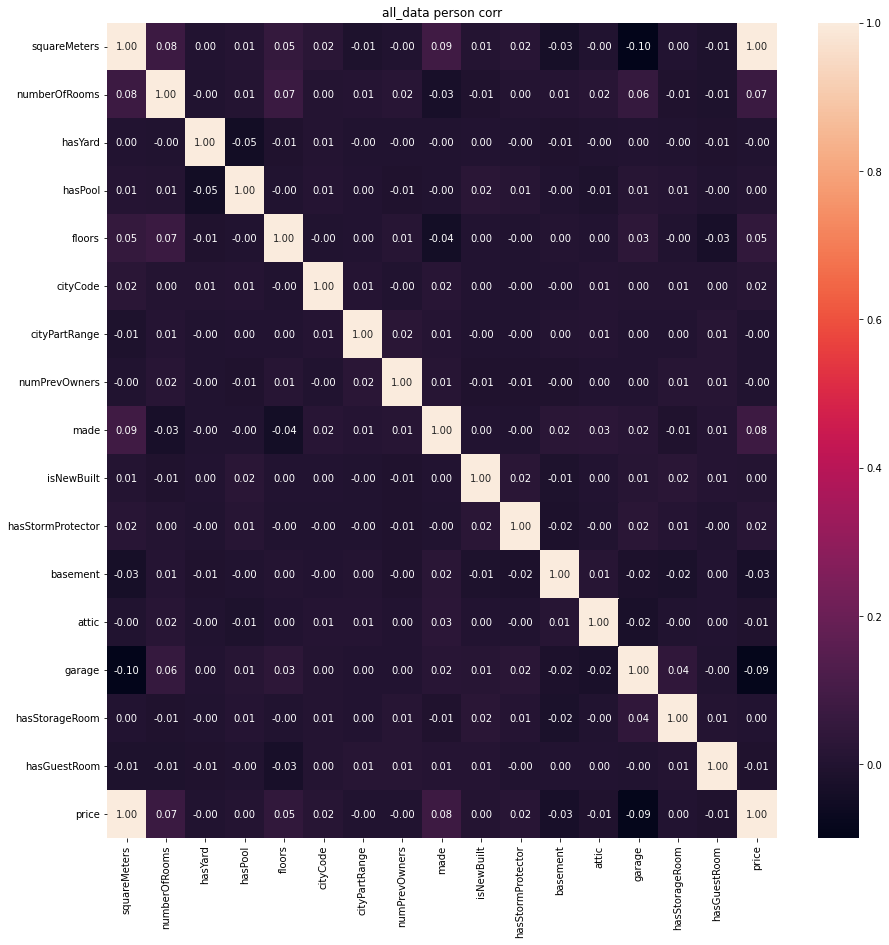

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(all_data.corr(), 
            cbar=True, 
            annot=True, 
            fmt='.2f')
plt.title("all_data person corr")
plt.show()

## 파생 피처 생성 (선택)

- 현재 특성에서 모델 성능 높이기 위해서 만들어보자 ( Kaggle 토론 참고 )
  - [Basic : Feature engineering library and more](https://www.kaggle.com/competitions/playground-series-s3e6/discussion/384765)
  - [Some feature engineering ideas with code 💡💡💡](https://www.kaggle.com/competitions/playground-series-s3e6/discussion/384679)
  - [Feature Engineering ideas](https://www.kaggle.com/competitions/playground-series-s3e6/discussion/384754)
  - [Cluster Feature Engineering TPS3E6](https://www.kaggle.com/code/jonbown/cluster-feature-engineering-tps3e6)
  - [PS3E6 : 💡XGBoost Feature Selection Ensemble](https://www.kaggle.com/code/manthanx/ps3e6-xgboost-feature-selection-ensemble#Feature-Engineering)

    - 방 면적 너비와 방의 수 간의 상호 작용 -> 집에서 공간이 어떻게 사용되는 가?

    - 층 수에 따른 방의 수 -> 방이 많을 수록 손님이 많이 온다 -> 기격 영향에 미치는 가? 

      - 방의 수와 마당의 존재 사이의 상호 작용 ->  야외 공간이 가격에 영향을 미치는 가?

    - 부동산이 만들어진 연도와 신축 여부 사이의 상호 작용 -> 신축 건물이 가격이 영향에 미치는 가?

    - 지하실 크기와 다락방 크기 사이의 상호 작용: 거주 시 사용할 수 있는 추가 공간이 가격이 영향이 미치는 가? 
  
    - 창고의 존재와 객실의 존재 사이의 상호 작용 -> 얼마나 많은 공간이 창고와 손님에게 할당되는가?
    
    - 날짜에서 정보 추출 -> 집의 나이, 집이 지어진 후 경과된 시간과 같은 정보를 추출



- 개인 생각

  - 파리 전체 면적(105.4km)에서 방 면적이 차지하는 비율 어떻게 되는가? > 경도, 위도 추가적 필요 -> 보류

  - 방 면적 가로 세로 길이 ( m[미터] )

  - 현재 방 면적 넓이 기준으로 몇 평일까? > 면적 계산기 사용 시 31.33446
    - [Convert pyeong to square Paris foot](https://www.convertunits.com/from/pyeong/to/square+Paris+foot)
  -  방 개수 따른 평균 방 사이즈
  -  가격과 방면적 넓이의 비율

In [ ]:
# 파생 피처 생성 함수 

def feature_interaction(df):
    df['squareMeters_sqrt'] = np.sqrt(df['squareMeters'])
    df['1_square'] =  df['squareMeters'] / 31.33446  
    df['allSpace'] = df['squareMeters'] + df['basement'] + df['attic'] + df['garage']
    df["averageRoomSize"] = df["squareMeters"] / df["numberOfRooms"]
    df['per_meter'] = df.price / df.squareMeters

    df['total_rooms'] = df['basement'] + df['attic'] + df['garage'] + df['hasStorageRoom'] + df['hasGuestRoom']
    df['is_luxury'] = (df['hasYard'] == 1) & (df['hasPool'] == 1) & (df['hasStormProtector'] == 1)

    city_code_count = df['cityCode'].value_counts()    
    df['numHousesInCityCode'] = df['cityCode'].map(city_code_count)
    city_code_space = df.groupby('cityCode')['squareMeters'].sum()
    df['sumAllSpaceInCityCode'] = df['cityCode'].map(city_code_space)

    df['squareMeters_numRooms'] = df['squareMeters'] * df['numberOfRooms']
    df['rooms_floor'] = df['numberOfRooms'] * df['floors']
    df['rooms_Per_Floor'] = df['numberOfRooms'] / df['floors']
    
    df['room_yard_interaction'] = df['numberOfRooms'] * df['hasYard']
    df['Basement_Attic_Interaction'] = df['basement'] * df['attic']
    df['storage_guest_interaction'] = df['hasStorageRoom'] * df['hasGuestRoom']

    df['age'] = 2021 - df['made']
    df['prevOwnersPerYear'] = df['numPrevOwners'] / df['age']
    df['made_isNewBuilt'] = df['made'] * df['isNewBuilt']

    return df

In [ ]:
new_features = feature_interaction(train)
new_features

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,...,sumAllSpaceInCityCode,squareMeters_numRooms,rooms_floor,rooms_Per_Floor,room_yard_interaction,Basement_Attic_Interaction,storage_guest_interaction,age,prevOwnersPerYear,made_isNewBuilt
0,34291,24,1,0,47,35693,2,1,2000,0,...,534929,822984,1128,0.510638,24,41568,0,21,0.047619,0
1,95145,60,0,1,60,34773,1,4,2000,0,...,219100,5708700,3600,1.000000,0,3277584,0,21,0.190476,0
2,92661,45,1,1,62,45457,4,8,2020,1,...,335048,4169745,2790,0.725806,45,66905769,9,1,8.000000,2020
3,97184,99,0,0,59,15113,1,1,2000,0,...,165056,9621216,5841,1.677966,0,54745328,9,21,0.047619,0
4,61752,100,0,0,57,64245,8,4,2018,1,...,177232,6175200,5700,1.754386,0,19922686,0,3,1.333333,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22725,55825,84,1,0,70,12031,3,10,2000,0,...,416173,4689300,5880,1.200000,84,3518922,0,21,0.476190,0
22726,65870,88,1,0,49,23197,9,9,2015,0,...,352590,5796560,4312,1.795918,88,11806194,0,6,1.500000,0
22727,93192,42,1,0,39,8539,10,5,2014,1,...,267581,3914064,1638,1.076923,42,22782840,0,7,0.714286,2014
22728,65797,86,1,0,89,23197,2,10,2000,1,...,352590,5658542,7654,0.966292,86,13464654,0,21,0.476190,2000


In [ ]:
new_features.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'squareMeters_sqrt', '1_square', 'allSpace',
       'averageRoomSize', 'per_meter', 'total_rooms', 'is_luxury',
       'numHousesInCityCode', 'sumAllSpaceInCityCode', 'squareMeters_numRooms',
       'rooms_floor', 'rooms_Per_Floor', 'room_yard_interaction',
       'Basement_Attic_Interaction', 'storage_guest_interaction', 'age',
       'prevOwnersPerYear', 'made_isNewBuilt'],
      dtype='object')

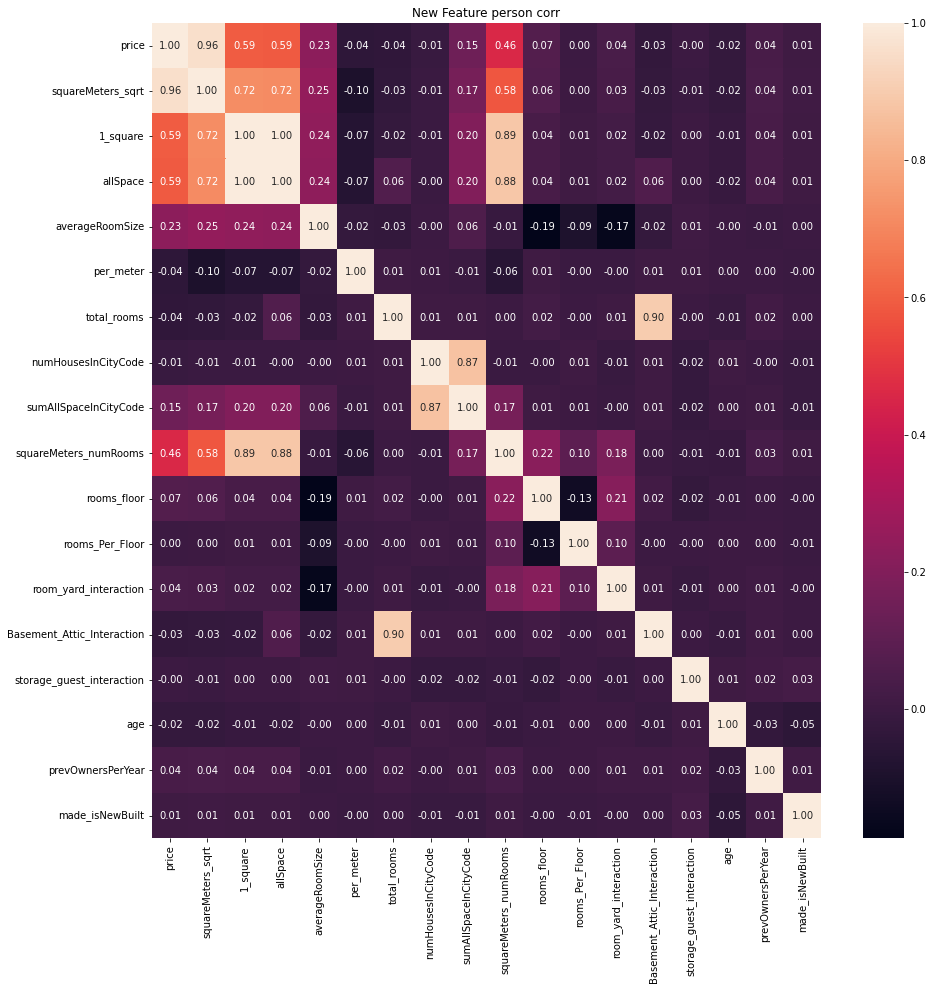

In [ ]:
new_feat = ['price', 'squareMeters_sqrt', '1_square', 'allSpace',
       'averageRoomSize', 'per_meter', 'total_rooms', 'is_luxury',
       'numHousesInCityCode', 'sumAllSpaceInCityCode', 'squareMeters_numRooms',
       'rooms_floor', 'rooms_Per_Floor', 'room_yard_interaction',
       'Basement_Attic_Interaction', 'storage_guest_interaction', 'age',
       'prevOwnersPerYear', 'made_isNewBuilt']

plt.figure(figsize=(15,15))
sns.heatmap(all_data[new_feat].corr(), 
            cbar=True, 
            annot=True, 
            fmt='.2f')
plt.title("New Feature person corr")
plt.show()

# 'squareMeters_sqrt', '1_square', 'allSpace', 'averageRoomSize', 'squareMeters_numRooms' 높은 상관관계가 보임

In [ ]:
all_data = feature_interaction(all_data)
all_data

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,...,sumAllSpaceInCityCode,squareMeters_numRooms,rooms_floor,rooms_Per_Floor,room_yard_interaction,Basement_Attic_Interaction,storage_guest_interaction,age,prevOwnersPerYear,made_isNewBuilt
0,75523,3,0,1,63,9373,3,8,2005,0,...,108087,226569,189,0.047619,0,38838565,0,16,0.500000,0
1,80771,39,1,1,98,39381,8,6,2015,1,...,267240,3150069,3822,0.397959,39,8898708,2,6,1.000000,2015
2,55712,58,0,1,19,34457,6,8,2021,0,...,280276,3231296,1102,3.052632,0,25998324,9,0,inf,0
3,32316,47,0,0,6,27939,10,4,2012,0,...,73682,1518852,282,7.833333,0,4705919,0,9,0.444444,0
4,70429,19,1,1,90,38045,3,7,1990,1,...,111945,1338151,1710,0.211111,19,20488615,4,31,0.225806,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47879,86184,74,1,1,73,14009,2,10,1993,1,...,593966,6377616,5402,1.013699,74,14462316,1,28,0.357143,1993
47880,45885,41,1,1,64,84208,4,5,2008,0,...,413170,1881285,2624,0.640625,41,5972724,0,13,0.384615,0
47881,73554,51,0,0,41,49263,10,5,2004,0,...,1271500,3751254,2091,1.243902,0,14583839,0,17,0.294118,0
47882,77604,51,0,1,33,67056,4,3,2019,0,...,1370674,3957804,1683,1.545455,0,92964068,0,2,1.500000,0


### K-mean Clustering ( 보류 )

- 특성공학 늘리기 : [K-means Clustering](https://www.kaggle.com/code/jonbown/cluster-feature-engineering-tps3e6)

## 피쳐 제거 ( 선택 )

- 상관관계에서 가격 예측 시 필요한 특성만 사용하도록 하자

In [ ]:
all_data.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'squareMeters_sqrt', '1_square', 'allSpace',
       'averageRoomSize', 'per_meter', 'total_rooms', 'is_luxury',
       'numHousesInCityCode', 'sumAllSpaceInCityCode', 'squareMeters_numRooms',
       'rooms_floor', 'rooms_Per_Floor', 'room_yard_interaction',
       'Basement_Attic_Interaction', 'storage_guest_interaction', 'age',
       'prevOwnersPerYear', 'made_isNewBuilt'],
      dtype='object')

In [ ]:
# 앞 선 EDA결과와 상관관계에서 price 예측과 연관 없는 특성은 제거하자
feats_drop = ['squareMeters_sqrt', 'per_meter', 'total_rooms', 'is_luxury',
       'numHousesInCityCode', 'sumAllSpaceInCityCode',
       'rooms_floor', 'rooms_Per_Floor', 'room_yard_interaction',
       'Basement_Attic_Interaction', 'storage_guest_interaction', 'age',
       'prevOwnersPerYear', 'made_isNewBuilt']
all_data = all_data.drop(feats_drop, axis=1)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47884 entries, 0 to 47883
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   squareMeters           47884 non-null  int64  
 1   numberOfRooms          47884 non-null  int64  
 2   hasYard                47884 non-null  int64  
 3   hasPool                47884 non-null  int64  
 4   floors                 47884 non-null  int64  
 5   cityCode               47884 non-null  int64  
 6   cityPartRange          47884 non-null  int64  
 7   numPrevOwners          47884 non-null  int64  
 8   made                   47884 non-null  int64  
 9   isNewBuilt             47884 non-null  int64  
 10  hasStormProtector      47884 non-null  int64  
 11  basement               47884 non-null  int64  
 12  attic                  47884 non-null  int64  
 13  garage                 47884 non-null  int64  
 14  hasStorageRoom         47884 non-null  int64  
 15  ha

In [ ]:
all_data.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', '1_square', 'allSpace', 'averageRoomSize',
       'squareMeters_numRooms'],
      dtype='object')

## 데이터 인코딩 ( 제외 )

In [ ]:
all_data.nunique().sort_values()

hasStormProtector            2
hasYard                      2
hasPool                      2
isNewBuilt                   2
hasStorageRoom               2
cityPartRange               10
numPrevOwners               10
hasGuestRoom                11
made                        32
numberOfRooms              100
floors                     100
garage                     903
attic                     6757
basement                  6856
1_square                  9824
squareMeters              9824
price                    10000
cityCode                 10581
allSpace                 38153
squareMeters_numRooms    39034
averageRoomSize          39044
dtype: int64

In [ ]:
to_be_encoded = [col for col in all_data.columns 
                      if all_data[col].nunique() <= 33 and all_data[col].nunique() > 2]
to_be_encoded

['cityPartRange', 'numPrevOwners', 'made', 'hasGuestRoom']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ord = OrdinalEncoder()

all_data[to_be_encoded] = ord.fit_transform(all_data[to_be_encoded])
ord.categories_

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
        2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
        2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])]

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47884 entries, 0 to 47883
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   squareMeters           47884 non-null  int64  
 1   numberOfRooms          47884 non-null  int64  
 2   hasYard                47884 non-null  int64  
 3   hasPool                47884 non-null  int64  
 4   floors                 47884 non-null  int64  
 5   cityCode               47884 non-null  int64  
 6   cityPartRange          47884 non-null  float64
 7   numPrevOwners          47884 non-null  float64
 8   made                   47884 non-null  float64
 9   isNewBuilt             47884 non-null  int64  
 10  hasStormProtector      47884 non-null  int64  
 11  basement               47884 non-null  int64  
 12  attic                  47884 non-null  int64  
 13  garage                 47884 non-null  int64  
 14  hasStorageRoom         47884 non-null  int64  
 15  ha

In [ ]:
# float -> int 형 변환
float_feat = ['cityPartRange', 'numPrevOwners', 'made', 'hasGuestRoom', '1_square', 'allSpace', 'averageRoomSize' ]
all_data[float_feat] = all_data[float_feat].astype(int)

## 데이터 스케일링

In [ ]:
# 앞 선 EDA결과와 상관관계에서 price 예측과 연관 없는 특성은 제거하자
drop_feat = ['cityCode']
all_data = all_data.drop(drop_feat, axis=1)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47884 entries, 0 to 47883
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   squareMeters           47884 non-null  int64  
 1   numberOfRooms          47884 non-null  int64  
 2   hasYard                47884 non-null  int64  
 3   hasPool                47884 non-null  int64  
 4   floors                 47884 non-null  int64  
 5   made                   47884 non-null  int64  
 6   isNewBuilt             47884 non-null  int64  
 7   hasStormProtector      47884 non-null  int64  
 8   basement               47884 non-null  int64  
 9   attic                  47884 non-null  int64  
 10  garage                 47884 non-null  int64  
 11  hasStorageRoom         47884 non-null  int64  
 12  price                  32730 non-null  float64
 13  1_square               47884 non-null  float64
 14  allSpace               47884 non-null  int64  
 15  av

In [ ]:
from sklearn.preprocessing import QuantileTransformer

# price 제외하고 스케일링
num_features = ['squareMeters', 'numberOfRooms', 'floors', 'made', 'basement','attic', 'garage', '1_square', 'allSpace', 'averageRoomSize', 'squareMeters_numRooms' ]

quantile = QuantileTransformer(output_distribution="normal")

all_data[num_features] = quantile.fit_transform(all_data[num_features])

In [ ]:
all_data

,squareMeters,numberOfRooms,hasYard,hasPool,floors,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,price,1_square,allSpace,averageRoomSize,squareMeters_numRooms
0,0.772590,-2.107953,0,1,0.476619,-0.047692,0,1,-0.260738,1.317499,1.629992,0,7559081.5,0.772590,0.884997,2.368653,-1.135340
1,0.948542,-0.196979,1,1,2.023292,0.814401,1,0,-0.465560,-0.711981,-1.593219,1,8085989.5,0.948542,0.814641,0.754394,0.529279
2,0.252393,0.309743,0,1,-0.857097,5.199338,0,0,-0.664983,1.222909,-1.517545,1,5574642.1,0.252393,0.284018,-0.006265,0.555702
3,-0.350664,-0.005018,0,0,-1.606755,0.478025,0,1,-1.640577,0.516197,-0.493553,0,3232561.2,-0.350664,-0.410585,-0.365082,-0.068495
4,0.627376,-0.875354,1,1,1.533612,-5.199338,1,0,1.006211,-0.713491,-0.708752,1,7055052.0,0.627376,0.644440,1.188833,-0.152380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47879,1.179402,0.650274,1,1,0.723343,-1.733071,1,0,-0.448230,-0.340199,0.365531,1,NaN,1.179402,1.068886,0.213806,1.490385
47880,0.013487,-0.162552,1,1,0.509202,0.247134,0,0,-1.425011,0.673253,1.865852,0,NaN,0.013487,-0.047128,0.171459,0.090570
47881,0.719562,0.130848,0,0,-0.130848,-0.138444,0,1,0.915434,-0.877196,0.705530,0,NaN,0.719562,0.707329,0.428800,0.726943
47882,0.841634,0.130848,0,1,-0.475214,1.554270,0,0,1.744448,1.948253,-1.517545,0,NaN,0.841634,1.207489,0.476723,0.784508


# 데이터 나누기

In [ ]:
# 정답의 결측 여부로 해결
X_sub = all_data[pd.isnull(all_data['price'])] # submisson용

# 훈련용
X = all_data[~pd.isnull(all_data['price'])] 
print(X.shape, X_sub.shape)
X.head() # Price 제거 필요

(32730, 17) (15154, 17)


,squareMeters,numberOfRooms,hasYard,hasPool,floors,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,price,1_square,allSpace,averageRoomSize,squareMeters_numRooms
0,0.772590,-2.107953,0,1,0.476619,-0.047692,0,1,-0.260738,1.317499,1.629992,0,7559081.5,0.772590,0.884997,2.368653,-1.135340
1,0.948542,-0.196979,1,1,2.023292,0.814401,1,0,-0.465560,-0.711981,-1.593219,1,8085989.5,0.948542,0.814641,0.754394,0.529279
2,0.252393,0.309743,0,1,-0.857097,5.199338,0,0,-0.664983,1.222909,-1.517545,1,5574642.1,0.252393,0.284018,-0.006265,0.555702
3,-0.350664,-0.005018,0,0,-1.606755,0.478025,0,1,-1.640577,0.516197,-0.493553,0,3232561.2,-0.350664,-0.410585,-0.365082,-0.068495
4,0.627376,-0.875354,1,1,1.533612,-5.199338,1,0,1.006211,-0.713491,-0.708752,1,7055052.0,0.627376,0.644440,1.188833,-0.152380


In [ ]:
y = X['price']
X = X.drop( ['price'], axis=1 )
X_sub = X_sub.drop( ['price'], axis=1 )

In [ ]:
print(X.shape, X_sub.shape, y.shape)

(32730, 16) (15154, 16) (32730,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22911, 16), (9819, 16), (22911,), (9819,))

# 베이스 모델 학습 및 평가

In [ ]:
from sklearn.linear_model import LinearRegression

# 모델 학습
lr_model = LinearRegression() # 선형회귀 
lr_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# 테스트 데이터로 예측
y_pred = lr_model.predict(X_test) 
y_pred.shape

(9819,)

In [ ]:
# 모델 평가 함수

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

def show_reg_metric(true, preds):
  mae   = mean_absolute_error(true, preds)
  mse   = mean_squared_error(true, preds)
  rmse  = np.sqrt( mse )
  msle  = mean_squared_log_error(true, preds)
  rmsle = np.sqrt( msle )
  r2    = r2_score(true, preds)
  print('-'*30)
  print(f'mae \t {mae:.3f}' )
  print(f'mse \t {mse:.3f}' )
  print(f'rmse \t {rmse:.3f}' )
  print(f'msle \t {msle:.3f}' )
  print(f'rmsle \t {rmsle:.3f}' )
  print(f'r2 \t {r2:.3f}' )
  print('-'*30)

In [ ]:
#show_reg_metric(y_test, y_pred)

In [ ]:
# 테스트 데이터로 예측
lr_model.fit(X,y)
sub_y_pred = lr_model.predict(X_sub) 

submission['price'] = sub_y_pred
submission.to_csv('submission.csv', index=False) # 파일로 저장

# 모델 선정 및 비교

In [ ]:
# 모든 부스팅 계열 모델 최신 모델로 업그레이드 -> 런타임 재시작 권장
!pip install --upgrade xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.9 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [ ]:
! pip install --upgrade catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 버전 확인
import xgboost, lightgbm
xgboost.__version__, lightgbm.__version__

('1.7.4', '3.3.5')

In [ ]:
from tqdm import tqdm
from sklearn.model_selection import TimeSeriesSplit

def RMSE(y, y_pred):
    rmse =  np.sqrt(mean_squared_error(y, y_pred))
    return rmse

def rmse_cv(model):
    # cv별로 학습하는 함수
    tscv = TimeSeriesSplit(n_splits=10)
    rmse_list = []
    model_name = model.__class__.__name__
    for _, (train_index, test_index) in tqdm(enumerate(tscv.split(X_train), start=1), desc=f'{model_name} Cross Validations...', total=10):
        X_train1, X_test1 = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train1, y_test1 = y_train.iloc[train_index], y_train.iloc[test_index]
        clf = model.fit(X_train1, y_train1)
        pred = clf.predict(X_test1)
        rmse = RMSE(y_test1, pred) 
        rmse_list.append(rmse)
    return model_name, rmse_list

def print_rmse_score(model):
    # cv별 프린팅, 평균 저장
    model_name, score = rmse_cv(model)
    for i, r in enumerate(score, start=1):
        print(f'{i} FOLDS: {model_name} RMSE: {r:.4f}')
    print(f'\n{model_name} mean RMSE: {np.mean(score):.4f}')
    print('='*40)
    return model_name, np.mean(score)

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


logistic = LogisticRegression()
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elstic = ElasticNet()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
ada = AdaBoostRegressor() 
cat = CatBoostRegressor()
xgb = XGBRegressor()
lgbm = LGBMRegressor()

In [ ]:
models = []
scores = []
for model in [dt, rf, gb, cat, xgb, lgbm]:
    model_name, mean_score = print_rmse_score(model)
    models.append(model_name)
    scores.append(mean_score)

DecisionTreeRegressor Cross Validations...: 100%|██████████| 10/10 [00:05<00:00,  1.82it/s]


1 FOLDS: DecisionTreeRegressor RMSE: 235325.7253
2 FOLDS: DecisionTreeRegressor RMSE: 262458.7451
3 FOLDS: DecisionTreeRegressor RMSE: 216672.5460
4 FOLDS: DecisionTreeRegressor RMSE: 308719.3021
5 FOLDS: DecisionTreeRegressor RMSE: 240319.4447
6 FOLDS: DecisionTreeRegressor RMSE: 4705.6121
7 FOLDS: DecisionTreeRegressor RMSE: 246840.6887
8 FOLDS: DecisionTreeRegressor RMSE: 210891.1190
9 FOLDS: DecisionTreeRegressor RMSE: 301766.5602
10 FOLDS: DecisionTreeRegressor RMSE: 251688.6661

DecisionTreeRegressor mean RMSE: 227938.8409


RandomForestRegressor Cross Validations...: 100%|██████████| 10/10 [02:08<00:00, 12.81s/it]


1 FOLDS: RandomForestRegressor RMSE: 236141.0802
2 FOLDS: RandomForestRegressor RMSE: 197043.1427
3 FOLDS: RandomForestRegressor RMSE: 103415.3433
4 FOLDS: RandomForestRegressor RMSE: 274819.3996
5 FOLDS: RandomForestRegressor RMSE: 78655.6401
6 FOLDS: RandomForestRegressor RMSE: 86095.6559
7 FOLDS: RandomForestRegressor RMSE: 163028.3298
8 FOLDS: RandomForestRegressor RMSE: 80475.3964
9 FOLDS: RandomForestRegressor RMSE: 230012.6638
10 FOLDS: RandomForestRegressor RMSE: 157851.0365

RandomForestRegressor mean RMSE: 160753.7688


GradientBoostingRegressor Cross Validations...: 100%|██████████| 10/10 [00:44<00:00,  4.45s/it]


1 FOLDS: GradientBoostingRegressor RMSE: 236959.6440
2 FOLDS: GradientBoostingRegressor RMSE: 173126.5715
3 FOLDS: GradientBoostingRegressor RMSE: 47080.5488
4 FOLDS: GradientBoostingRegressor RMSE: 256736.9478
5 FOLDS: GradientBoostingRegressor RMSE: 61336.0478
6 FOLDS: GradientBoostingRegressor RMSE: 63747.4205
7 FOLDS: GradientBoostingRegressor RMSE: 151288.7234
8 FOLDS: GradientBoostingRegressor RMSE: 110878.8068
9 FOLDS: GradientBoostingRegressor RMSE: 223646.9586
10 FOLDS: GradientBoostingRegressor RMSE: 133991.7454

GradientBoostingRegressor mean RMSE: 145879.3415


CatBoostRegressor Cross Validations...:   0%|          | 0/10 [00:00<?, ?it/s]

Learning rate set to 0.046004
0:	learn: 2821961.4930444	total: 54.8ms	remaining: 54.8s
1:	learn: 2702063.4371302	total: 60.3ms	remaining: 30.1s
2:	learn: 2587308.6411399	total: 71.6ms	remaining: 23.8s
3:	learn: 2476898.7080195	total: 81.3ms	remaining: 20.3s
4:	learn: 2369396.9685917	total: 86.8ms	remaining: 17.3s
5:	learn: 2269399.8995513	total: 100ms	remaining: 16.6s
6:	learn: 2172852.3170301	total: 110ms	remaining: 15.5s
7:	learn: 2081449.3572964	total: 116ms	remaining: 14.4s
8:	learn: 1995011.2590587	total: 128ms	remaining: 14.1s
9:	learn: 1912413.2594417	total: 143ms	remaining: 14.2s
10:	learn: 1831981.9510828	total: 156ms	remaining: 14s
11:	learn: 1756871.9692949	total: 166ms	remaining: 13.6s
12:	learn: 1683706.5105274	total: 175ms	remaining: 13.3s
13:	learn: 1613491.6160066	total: 180ms	remaining: 12.7s
14:	learn: 1546825.5540470	total: 197ms	remaining: 12.9s
15:	learn: 1482331.8448777	total: 206ms	remaining: 12.7s
16:	learn: 1421942.5227072	total: 216ms	remaining: 12.5s
17:	lear

CatBoostRegressor Cross Validations...:  10%|█         | 1/10 [00:06<00:58,  6.50s/it]

Learning rate set to 0.051311
0:	learn: 2775534.4904372	total: 3.78ms	remaining: 3.78s
1:	learn: 2644608.0749391	total: 7.51ms	remaining: 3.75s
2:	learn: 2519054.9338899	total: 10.7ms	remaining: 3.54s
3:	learn: 2398229.4077729	total: 14.2ms	remaining: 3.53s
4:	learn: 2283666.4244996	total: 17.8ms	remaining: 3.55s
5:	learn: 2174010.9809496	total: 25.6ms	remaining: 4.25s
6:	learn: 2071085.8872016	total: 32.4ms	remaining: 4.6s
7:	learn: 1972454.4011319	total: 36ms	remaining: 4.46s
8:	learn: 1879429.0132136	total: 40.9ms	remaining: 4.5s
9:	learn: 1791184.6502108	total: 44.8ms	remaining: 4.43s
10:	learn: 1707491.5230408	total: 48.2ms	remaining: 4.34s
11:	learn: 1627688.5095909	total: 51.7ms	remaining: 4.25s
12:	learn: 1549994.1379212	total: 54.9ms	remaining: 4.17s
13:	learn: 1477262.0342808	total: 59.2ms	remaining: 4.17s
14:	learn: 1405983.5825172	total: 62.6ms	remaining: 4.11s
15:	learn: 1339991.8863931	total: 65.8ms	remaining: 4.05s
16:	learn: 1279017.8778392	total: 69.2ms	remaining: 4s
1

CatBoostRegressor Cross Validations...:  20%|██        | 2/10 [00:10<00:41,  5.22s/it]

976:	learn: 38665.9299945	total: 3.86s	remaining: 90.9ms
977:	learn: 38637.4047798	total: 3.86s	remaining: 86.9ms
978:	learn: 38608.0073294	total: 3.87s	remaining: 83ms
979:	learn: 38537.4520930	total: 3.87s	remaining: 79.1ms
980:	learn: 38501.4324301	total: 3.88s	remaining: 75.1ms
981:	learn: 38481.3012744	total: 3.88s	remaining: 71.1ms
982:	learn: 38403.1855536	total: 3.88s	remaining: 67.2ms
983:	learn: 38377.7554818	total: 3.89s	remaining: 63.3ms
984:	learn: 38350.3419236	total: 3.89s	remaining: 59.3ms
985:	learn: 38325.8862230	total: 3.9s	remaining: 55.3ms
986:	learn: 38310.9338623	total: 3.9s	remaining: 51.4ms
987:	learn: 38283.1340810	total: 3.9s	remaining: 47.4ms
988:	learn: 38213.3226756	total: 3.91s	remaining: 43.5ms
989:	learn: 38188.1620828	total: 3.91s	remaining: 39.5ms
990:	learn: 38119.5846749	total: 3.91s	remaining: 35.5ms
991:	learn: 38095.9206315	total: 3.92s	remaining: 31.6ms
992:	learn: 38080.8484767	total: 3.92s	remaining: 27.6ms
993:	learn: 38073.9995080	total: 3.9

CatBoostRegressor Cross Validations...:  30%|███       | 3/10 [00:16<00:38,  5.53s/it]

991:	learn: 46423.0455126	total: 5.3s	remaining: 42.7ms
992:	learn: 46401.6461094	total: 5.31s	remaining: 37.4ms
993:	learn: 46377.9057897	total: 5.33s	remaining: 32.1ms
994:	learn: 46359.7073527	total: 5.33s	remaining: 26.8ms
995:	learn: 46312.4402276	total: 5.35s	remaining: 21.5ms
996:	learn: 46223.7220906	total: 5.36s	remaining: 16.1ms
997:	learn: 46129.7695975	total: 5.37s	remaining: 10.8ms
998:	learn: 46105.3686234	total: 5.38s	remaining: 5.38ms
999:	learn: 46095.2542721	total: 5.39s	remaining: 0us
Learning rate set to 0.05724
0:	learn: 2759350.7706380	total: 17.9ms	remaining: 17.9s
1:	learn: 2610916.2214589	total: 30.3ms	remaining: 15.1s
2:	learn: 2471479.7322979	total: 44.8ms	remaining: 14.9s
3:	learn: 2338370.7681811	total: 57.6ms	remaining: 14.4s
4:	learn: 2211496.6581610	total: 71.3ms	remaining: 14.2s
5:	learn: 2092809.1214507	total: 82.6ms	remaining: 13.7s
6:	learn: 1980458.8260091	total: 94.4ms	remaining: 13.4s
7:	learn: 1874573.7784647	total: 108ms	remaining: 13.4s
8:	lear

CatBoostRegressor Cross Validations...:  40%|████      | 4/10 [00:23<00:35,  5.90s/it]

992:	learn: 45523.6709238	total: 5.85s	remaining: 41.2ms
993:	learn: 45503.7846968	total: 5.85s	remaining: 35.3ms
994:	learn: 45467.3864213	total: 5.86s	remaining: 29.4ms
995:	learn: 45452.0200235	total: 5.87s	remaining: 23.6ms
996:	learn: 45434.1037127	total: 5.87s	remaining: 17.7ms
997:	learn: 45330.3742669	total: 5.88s	remaining: 11.8ms
998:	learn: 45295.0204518	total: 5.88s	remaining: 5.89ms
999:	learn: 45286.7087673	total: 5.88s	remaining: 0us
Learning rate set to 0.059292
0:	learn: 2755806.7009623	total: 4.84ms	remaining: 4.83s
1:	learn: 2605472.0369490	total: 9.97ms	remaining: 4.97s
2:	learn: 2461500.2284072	total: 15.6ms	remaining: 5.17s
3:	learn: 2325332.1628987	total: 20.3ms	remaining: 5.05s
4:	learn: 2194936.5949671	total: 24.7ms	remaining: 4.92s
5:	learn: 2073057.1730194	total: 29.4ms	remaining: 4.87s
6:	learn: 1957907.9684455	total: 35.8ms	remaining: 5.07s
7:	learn: 1848836.8610575	total: 40.4ms	remaining: 5.01s
8:	learn: 1744888.3782211	total: 45.2ms	remaining: 4.98s
9:	l

CatBoostRegressor Cross Validations...:  50%|█████     | 5/10 [00:28<00:28,  5.72s/it]

Learning rate set to 0.061023
0:	learn: 2752033.5829911	total: 5.96ms	remaining: 5.95s
1:	learn: 2594939.1043499	total: 10.6ms	remaining: 5.28s
2:	learn: 2446751.8802158	total: 15.7ms	remaining: 5.22s
3:	learn: 2306867.8569280	total: 20.7ms	remaining: 5.16s
4:	learn: 2174215.7063350	total: 25.7ms	remaining: 5.11s
5:	learn: 2049668.7121488	total: 30.7ms	remaining: 5.08s
6:	learn: 1932352.4620315	total: 36.2ms	remaining: 5.13s
7:	learn: 1821387.7275777	total: 41.4ms	remaining: 5.13s
8:	learn: 1715709.6870269	total: 46.3ms	remaining: 5.1s
9:	learn: 1617529.7801502	total: 51.8ms	remaining: 5.13s
10:	learn: 1525525.8469567	total: 62.8ms	remaining: 5.64s
11:	learn: 1440556.0423508	total: 68.9ms	remaining: 5.67s
12:	learn: 1359019.4902502	total: 74.9ms	remaining: 5.68s
13:	learn: 1282486.3914927	total: 80.7ms	remaining: 5.68s
14:	learn: 1209106.7120798	total: 86.4ms	remaining: 5.67s
15:	learn: 1140491.4313616	total: 91.9ms	remaining: 5.65s
16:	learn: 1078164.8941981	total: 98.1ms	remaining: 5

CatBoostRegressor Cross Validations...:  60%|██████    | 6/10 [00:37<00:27,  6.76s/it]

974:	learn: 61999.1444628	total: 8.03s	remaining: 206ms
975:	learn: 61994.5909530	total: 8.04s	remaining: 198ms
976:	learn: 61937.6398986	total: 8.05s	remaining: 189ms
977:	learn: 61857.8007820	total: 8.05s	remaining: 181ms
978:	learn: 61853.3339903	total: 8.05s	remaining: 173ms
979:	learn: 61849.4005790	total: 8.06s	remaining: 164ms
980:	learn: 61831.3392316	total: 8.06s	remaining: 156ms
981:	learn: 61744.2064204	total: 8.07s	remaining: 148ms
982:	learn: 61730.5223996	total: 8.07s	remaining: 140ms
983:	learn: 61519.7848366	total: 8.08s	remaining: 131ms
984:	learn: 61493.5630750	total: 8.08s	remaining: 123ms
985:	learn: 61456.4272222	total: 8.09s	remaining: 115ms
986:	learn: 61439.4289662	total: 8.09s	remaining: 107ms
987:	learn: 61422.8397024	total: 8.1s	remaining: 98.4ms
988:	learn: 61227.8317619	total: 8.11s	remaining: 90.1ms
989:	learn: 61083.0627639	total: 8.11s	remaining: 81.9ms
990:	learn: 61061.6851024	total: 8.12s	remaining: 73.7ms
991:	learn: 61043.7458840	total: 8.12s	remain

CatBoostRegressor Cross Validations...:  70%|███████   | 7/10 [00:44<00:20,  6.93s/it]

Learning rate set to 0.063859
0:	learn: 2744336.9731619	total: 6.67ms	remaining: 6.66s
1:	learn: 2579118.6999335	total: 12.1ms	remaining: 6.03s
2:	learn: 2421704.4974784	total: 18.2ms	remaining: 6.04s
3:	learn: 2276148.6453828	total: 28.7ms	remaining: 7.14s
4:	learn: 2136283.6696589	total: 35.3ms	remaining: 7.03s
5:	learn: 2007937.0011361	total: 48.2ms	remaining: 7.99s
6:	learn: 1888495.0017082	total: 68ms	remaining: 9.65s
7:	learn: 1774561.0955372	total: 75.3ms	remaining: 9.34s
8:	learn: 1667457.9030493	total: 80.8ms	remaining: 8.9s
9:	learn: 1567607.4267531	total: 90.2ms	remaining: 8.93s
10:	learn: 1475882.4863116	total: 97.2ms	remaining: 8.74s
11:	learn: 1387417.6033446	total: 104ms	remaining: 8.55s
12:	learn: 1305343.3041396	total: 112ms	remaining: 8.51s
13:	learn: 1228746.4234489	total: 127ms	remaining: 8.97s
14:	learn: 1155034.2488555	total: 138ms	remaining: 9.07s
15:	learn: 1086478.4245120	total: 146ms	remaining: 8.99s
16:	learn: 1024034.8250596	total: 153ms	remaining: 8.86s
17:

CatBoostRegressor Cross Validations...:  80%|████████  | 8/10 [00:54<00:15,  7.77s/it]

986:	learn: 56569.3509332	total: 8.83s	remaining: 116ms
987:	learn: 56524.4285704	total: 8.85s	remaining: 107ms
988:	learn: 56492.0824741	total: 8.86s	remaining: 98.5ms
989:	learn: 56389.9764800	total: 8.86s	remaining: 89.5ms
990:	learn: 56358.5961335	total: 8.87s	remaining: 80.5ms
991:	learn: 56342.1157554	total: 8.87s	remaining: 71.5ms
992:	learn: 56307.9297125	total: 8.88s	remaining: 62.6ms
993:	learn: 56282.7201319	total: 8.88s	remaining: 53.6ms
994:	learn: 56277.4930274	total: 8.89s	remaining: 44.7ms
995:	learn: 56215.4474876	total: 8.89s	remaining: 35.7ms
996:	learn: 56193.9163562	total: 8.9s	remaining: 26.8ms
997:	learn: 56118.6985508	total: 8.9s	remaining: 17.8ms
998:	learn: 55970.6840122	total: 8.91s	remaining: 8.92ms
999:	learn: 55948.7631359	total: 8.92s	remaining: 0us
Learning rate set to 0.065058
0:	learn: 2738250.4436510	total: 5.78ms	remaining: 5.77s
1:	learn: 2568982.5143600	total: 11.7ms	remaining: 5.84s
2:	learn: 2409213.1047117	total: 17.3ms	remaining: 5.76s
3:	learn

CatBoostRegressor Cross Validations...:  90%|█████████ | 9/10 [01:03<00:08,  8.10s/it]

991:	learn: 62642.5904444	total: 8.11s	remaining: 65.4ms
992:	learn: 62619.1117840	total: 8.13s	remaining: 57.3ms
993:	learn: 62595.5219490	total: 8.15s	remaining: 49.2ms
994:	learn: 62493.7838777	total: 8.17s	remaining: 41ms
995:	learn: 62300.7797503	total: 8.19s	remaining: 32.9ms
996:	learn: 62289.8509577	total: 8.2s	remaining: 24.7ms
997:	learn: 62270.0099926	total: 8.21s	remaining: 16.5ms
998:	learn: 62235.8022900	total: 8.22s	remaining: 8.23ms
999:	learn: 62193.9298892	total: 8.24s	remaining: 0us
Learning rate set to 0.06615
0:	learn: 2731519.5373689	total: 20.3ms	remaining: 20.3s
1:	learn: 2559973.1897200	total: 40.6ms	remaining: 20.3s
2:	learn: 2398150.3393240	total: 51ms	remaining: 16.9s
3:	learn: 2249350.2213122	total: 60.3ms	remaining: 15s
4:	learn: 2106032.5895949	total: 68.4ms	remaining: 13.6s
5:	learn: 1976376.6699452	total: 76.8ms	remaining: 12.7s
6:	learn: 1855191.1143814	total: 85.2ms	remaining: 12.1s
7:	learn: 1739735.6776926	total: 98.3ms	remaining: 12.2s
8:	learn: 16

CatBoostRegressor Cross Validations...: 100%|██████████| 10/10 [01:11<00:00,  7.12s/it]


1 FOLDS: CatBoostRegressor RMSE: 238641.4880
2 FOLDS: CatBoostRegressor RMSE: 167138.4169
3 FOLDS: CatBoostRegressor RMSE: 49074.0454
4 FOLDS: CatBoostRegressor RMSE: 255249.6893
5 FOLDS: CatBoostRegressor RMSE: 73588.4276
6 FOLDS: CatBoostRegressor RMSE: 72125.2311
7 FOLDS: CatBoostRegressor RMSE: 169453.9962
8 FOLDS: CatBoostRegressor RMSE: 133707.2216
9 FOLDS: CatBoostRegressor RMSE: 230081.2619
10 FOLDS: CatBoostRegressor RMSE: 136953.8815

CatBoostRegressor mean RMSE: 152601.3659


XGBRegressor Cross Validations...: 100%|██████████| 10/10 [00:28<00:00,  2.87s/it]


1 FOLDS: XGBRegressor RMSE: 237194.5512
2 FOLDS: XGBRegressor RMSE: 201409.8410
3 FOLDS: XGBRegressor RMSE: 93345.7641
4 FOLDS: XGBRegressor RMSE: 271415.4591
5 FOLDS: XGBRegressor RMSE: 65130.9626
6 FOLDS: XGBRegressor RMSE: 128353.6591
7 FOLDS: XGBRegressor RMSE: 124022.1883
8 FOLDS: XGBRegressor RMSE: 76024.9936
9 FOLDS: XGBRegressor RMSE: 222633.2304
10 FOLDS: XGBRegressor RMSE: 182576.7895

XGBRegressor mean RMSE: 160210.7439


LGBMRegressor Cross Validations...: 100%|██████████| 10/10 [00:06<00:00,  1.51it/s]

1 FOLDS: LGBMRegressor RMSE: 235835.8504
2 FOLDS: LGBMRegressor RMSE: 157827.4810
3 FOLDS: LGBMRegressor RMSE: 55178.5115
4 FOLDS: LGBMRegressor RMSE: 252863.8580
5 FOLDS: LGBMRegressor RMSE: 66277.6506
6 FOLDS: LGBMRegressor RMSE: 47470.2871
7 FOLDS: LGBMRegressor RMSE: 162136.3579
8 FOLDS: LGBMRegressor RMSE: 131331.5818
9 FOLDS: LGBMRegressor RMSE: 226032.5406
10 FOLDS: LGBMRegressor RMSE: 123937.3980

LGBMRegressor mean RMSE: 145889.1517


In [ ]:
result_df = pd.DataFrame({'Model': models, 'Score': scores}).reset_index(drop=True)
result_df

,Model,Score
0,DecisionTreeRegressor,227938.840932
1,RandomForestRegressor,160753.768826
2,GradientBoostingRegressor,145879.341453
3,CatBoostRegressor,152601.365942
4,XGBRegressor,160210.743898
5,LGBMRegressor,145889.151672


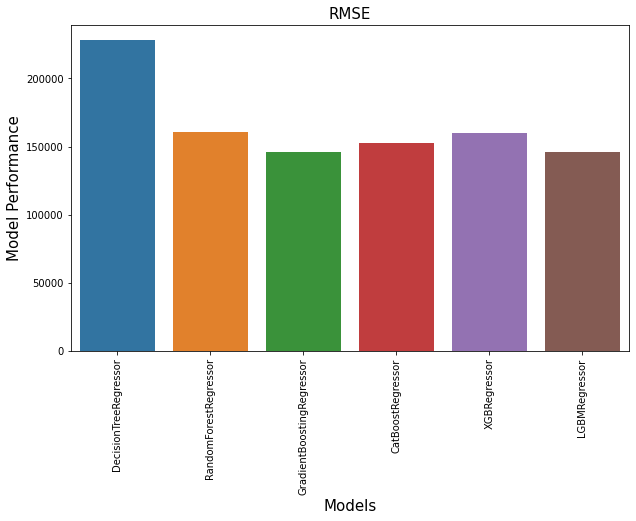

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation='90')
sns.barplot(x=result_df['Model'], y=result_df['Score'])
plt.xlabel('Models', fontsize=15)
plt.ylabel('Model Performance', fontsize=15)
plt.title('RMSE', fontsize=15)
plt.show()

## XGB + Optuna

- Discussions 이나 bestScore 확인 시, XGBRegressor 사용 시 가장 성능이 좋게 나오는 것을 알 수 있다
- [공식문서](https://xgboost.readthedocs.io/en/stable/parameter.html)
- [XGBoost 개념 이해](https://wooono.tistory.com/97)
- [XGBoost 주요 파라미터](https://zzinnam.tistory.com/entry/XGboost-%EC%A3%BC%EC%9A%94-%ED%95%98%EC%9D%B4%ED%8D%BC%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0-with-%ED%8C%8C%EC%9D%B4%EC%8D%AC)
- [XGBoost와 LightGBM 하이퍼파라미터 튜닝 가이드](https://psystat.tistory.com/131)

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.5/210.5 KB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 6.8 MB/s eta 0:00:00


In [ ]:
import optuna
from optuna import Trial
from optuna.samplers import TPESampler

In [ ]:
sampler = TPESampler(seed=10)

def objectiveXGB(trial):

  param = {
  'objective' :'reg:linear', 
  #'booster' :'gbtree',
  #'metric': 'rmse',
  #'max_depth' : 3, 
  #'learning_rate' : 0.24 ,
  'max_depth': trial.suggest_int('max_depth',3,10),
  #'max_leaves':trial.suggest_int('max_leaves',7,63),  
  'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
  'n_estimators': trial.suggest_int('n_estimators', 100, 30000),
  #'subsample':trial.suggest_float('subsample',0.5, 1),
  #'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
  #'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),
  #'lambda': trial.suggest_float('lambda', 0.001, 1.0),
  #'alpha': trial.suggest_float('alpha', 0.001, 1.0),
  #'random_state': 42
  'early_stopping_rounds' : 50,
  }
  model = XGBRegressor(**param)
  model.fit(X_train, y_train, eval_set=[(X_test,y_test)], )
  pred = model.predict(X_test)
  return RMSE(y_test, pred)


In [ ]:
# RMSE가 최소가 되는 방향으로 학습을 진행
studyXGB = optuna.create_study(direction='minimize',  sampler=sampler)

# n_trials 지정
studyXGB.optimize(objectiveXGB, n_trials=100)

[I 2023-02-17 16:34:05,642] A new study created in memory with name: no-name-f37bac8a-9793-45eb-abe2-c9098545938a


[16:34:05] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4489904.30036
[1]	validation_0-rmse:3622819.11427
[2]	validation_0-rmse:2923303.61040
[3]	validation_0-rmse:2359233.32354
[4]	validation_0-rmse:1904754.41919
[5]	validation_0-rmse:1538355.03794
[6]	validation_0-rmse:1243653.18010
[7]	validation_0-rmse:1006738.15658
[8]	validation_0-rmse:817100.95234
[9]	validation_0-rmse:665069.31149
[10]	validation_0-rmse:543811.43521
[11]	validation_0-rmse:447780.16608
[12]	validation_0-rmse:372226.05442
[13]	validation_0-rmse:313619.03719
[14]	validation_0-rmse:268784.74118
[15]	validation_0-rmse:232009.34616
[16]	validation_0-rmse:206839.51524
[17]	validation_0-rmse:186229.40776
[18]	validation_0-rmse:171244.62021
[19]	validation_0-rmse:162214.15041
[20]	validation_0-rmse:156347.05890
[21]	validation_0-rmse:152174.11726
[22]	validation_0-rmse:150076.90724
[23]	validation_0-rmse:150057.19323
[24]	validation_0-r

[I 2023-02-17 16:34:13,619] Trial 0 finished with value: 137269.79798460135 and parameters: {'max_depth': 6, 'max_leaves': 8, 'learning_rate': 0.19375798812861986, 'n_estimators': 2272}. Best is trial 0 with value: 137269.79798460135.


[16:34:13] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5192069.68198
[1]	validation_0-rmse:4842823.98285
[2]	validation_0-rmse:4517116.96565
[3]	validation_0-rmse:4213473.93977
[4]	validation_0-rmse:3930307.42830
[5]	validation_0-rmse:3666195.10619
[6]	validation_0-rmse:3419928.02951
[7]	validation_0-rmse:3190319.50278
[8]	validation_0-rmse:2976034.19846
[9]	validation_0-rmse:2776218.47124
[10]	validation_0-rmse:2589941.65321
[11]	validation_0-rmse:2416230.03181
[12]	validation_0-rmse:2254277.13602
[13]	validation_0-rmse:2103295.37048
[14]	validation_0-rmse:1962521.41703
[15]	validation_0-rmse:1831408.24467
[16]	validation_0-rmse:1709108.88750
[17]	validation_0-rmse:1595086.60432
[18]	validation_0-rmse:1488845.27908
[19]	validation_0-rmse:1389839.24237
[20]	validation_0-rmse:1297561.77828
[21]	validation_0-rmse:1211641.32722
[22]	validation_0-rmse:1131567.67350
[23]	validation_0-rmse:1056997.66783
[24

[I 2023-02-17 16:34:18,780] Trial 1 finished with value: 136183.94467932472 and parameters: {'max_depth': 4, 'max_leaves': 19, 'learning_rate': 0.06743823078029094, 'n_estimators': 2306}. Best is trial 1 with value: 136183.94467932472.


[16:34:18] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4410633.15059
[1]	validation_0-rmse:3496213.18828
[2]	validation_0-rmse:2771121.31091
[3]	validation_0-rmse:2198417.31358
[4]	validation_0-rmse:1745095.80603
[5]	validation_0-rmse:1386922.31954
[6]	validation_0-rmse:1103404.88782
[7]	validation_0-rmse:880727.25100
[8]	validation_0-rmse:705613.24750
[9]	validation_0-rmse:567066.92502
[10]	validation_0-rmse:460146.15889
[11]	validation_0-rmse:377614.38317
[12]	validation_0-rmse:314994.10314
[13]	validation_0-rmse:268487.33074
[14]	validation_0-rmse:234611.49573
[15]	validation_0-rmse:210530.47775
[16]	validation_0-rmse:193930.89936
[17]	validation_0-rmse:182721.63551
[18]	validation_0-rmse:169414.38327
[19]	validation_0-rmse:164395.07724
[20]	validation_0-rmse:161202.01365
[21]	validation_0-rmse:159155.35291
[22]	validation_0-rmse:157808.87365
[23]	validation_0-rmse:156956.48053
[24]	validation_0-rm

[I 2023-02-17 16:34:27,346] Trial 2 finished with value: 144533.22110700872 and parameters: {'max_depth': 3, 'max_leaves': 12, 'learning_rate': 0.2087543473266612, 'n_estimators': 2865}. Best is trial 1 with value: 136183.94467932472.


[16:34:27] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4206477.06471
[1]	validation_0-rmse:3180689.63110
[2]	validation_0-rmse:2404632.30435
[3]	validation_0-rmse:1820488.46297
[4]	validation_0-rmse:1380515.54105
[5]	validation_0-rmse:1049631.21867
[6]	validation_0-rmse:801113.88873
[7]	validation_0-rmse:616165.93249
[8]	validation_0-rmse:479424.88942
[9]	validation_0-rmse:379722.23091
[10]	validation_0-rmse:303345.95253
[11]	validation_0-rmse:253157.25197
[12]	validation_0-rmse:219328.93426
[13]	validation_0-rmse:197448.99571
[14]	validation_0-rmse:184052.60687
[15]	validation_0-rmse:175708.08299
[16]	validation_0-rmse:170791.07493
[17]	validation_0-rmse:167856.58289
[18]	validation_0-rmse:166212.69557
[19]	validation_0-rmse:164971.69932
[20]	validation_0-rmse:164066.24201
[21]	validation_0-rmse:163646.25625
[22]	validation_0-rmse:163205.95919
[23]	validation_0-rmse:150578.12047
[24]	validation_0-rms

[I 2023-02-17 16:34:29,613] Trial 3 finished with value: 149364.64444400204 and parameters: {'max_depth': 3, 'max_leaves': 36, 'learning_rate': 0.2456600788791129, 'n_estimators': 1876}. Best is trial 1 with value: 136183.94467932472.


[16:34:29] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4032256.57440
[1]	validation_0-rmse:2922197.78380
[2]	validation_0-rmse:2119010.60524
[3]	validation_0-rmse:1538069.98394
[4]	validation_0-rmse:1118623.98372
[5]	validation_0-rmse:816506.35192
[6]	validation_0-rmse:600389.56656
[7]	validation_0-rmse:447569.42831
[8]	validation_0-rmse:340486.98098
[9]	validation_0-rmse:264292.59038
[10]	validation_0-rmse:216097.50356
[11]	validation_0-rmse:182889.72889
[12]	validation_0-rmse:162853.50743
[13]	validation_0-rmse:152142.15339
[14]	validation_0-rmse:146503.09764
[15]	validation_0-rmse:143182.89863
[16]	validation_0-rmse:135661.76066
[17]	validation_0-rmse:134691.32330
[18]	validation_0-rmse:134148.82704
[19]	validation_0-rmse:134867.96150
[20]	validation_0-rmse:135518.47888
[21]	validation_0-rmse:136344.15233
[22]	validation_0-rmse:136305.21233
[23]	validation_0-rmse:138585.05823
[24]	validation_0-rmse

[I 2023-02-17 16:34:32,570] Trial 4 finished with value: 134148.82915638352 and parameters: {'max_depth': 5, 'max_leaves': 23, 'learning_rate': 0.2761544955287536, 'n_estimators': 2172}. Best is trial 4 with value: 134148.82915638352.


[16:34:32] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4909369.78813
[1]	validation_0-rmse:4330147.60319
[2]	validation_0-rmse:3819200.37339
[3]	validation_0-rmse:3368910.26006
[4]	validation_0-rmse:2971969.76892
[5]	validation_0-rmse:2621967.90196
[6]	validation_0-rmse:2313346.56974
[7]	validation_0-rmse:2041315.85927
[8]	validation_0-rmse:1801656.09635
[9]	validation_0-rmse:1590160.44162
[10]	validation_0-rmse:1404136.10586
[11]	validation_0-rmse:1240346.77229
[12]	validation_0-rmse:1096095.07587
[13]	validation_0-rmse:969249.95446
[14]	validation_0-rmse:857728.32492
[15]	validation_0-rmse:759945.05094
[16]	validation_0-rmse:673239.78352
[17]	validation_0-rmse:597837.42134
[18]	validation_0-rmse:532122.48506
[19]	validation_0-rmse:474599.54329
[20]	validation_0-rmse:424382.53477
[21]	validation_0-rmse:380913.21739
[22]	validation_0-rmse:343310.89509
[23]	validation_0-rmse:310950.25885
[24]	validatio

[I 2023-02-17 16:34:40,223] Trial 5 finished with value: 134165.9870280522 and parameters: {'max_depth': 5, 'max_leaves': 15, 'learning_rate': 0.11826882041492606, 'n_estimators': 2055}. Best is trial 4 with value: 134148.82915638352.


[16:34:40] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4516252.87727
[1]	validation_0-rmse:3664983.63628
[2]	validation_0-rmse:2974643.67545
[3]	validation_0-rmse:2414769.33794
[4]	validation_0-rmse:1961212.59517
[5]	validation_0-rmse:1593731.00035
[6]	validation_0-rmse:1296033.08583
[7]	validation_0-rmse:1055610.74165
[8]	validation_0-rmse:861673.44093
[9]	validation_0-rmse:705440.80560
[10]	validation_0-rmse:580281.87856
[11]	validation_0-rmse:480594.10153
[12]	validation_0-rmse:401677.83402
[13]	validation_0-rmse:339967.39315
[14]	validation_0-rmse:292384.29308
[15]	validation_0-rmse:256366.21190
[16]	validation_0-rmse:229714.03689
[17]	validation_0-rmse:210261.54501
[18]	validation_0-rmse:196554.58297
[19]	validation_0-rmse:186902.50927
[20]	validation_0-rmse:172424.07390
[21]	validation_0-rmse:167687.88553
[22]	validation_0-rmse:164703.50718
[23]	validation_0-rmse:162654.23676
[24]	validation_0-r

[I 2023-02-17 16:34:45,730] Trial 6 finished with value: 140527.49452771214 and parameters: {'max_depth': 4, 'max_leaves': 31, 'learning_rate': 0.18915242375610197, 'n_estimators': 1588}. Best is trial 4 with value: 134148.82915638352.


[16:34:45] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4213546.98138
[1]	validation_0-rmse:3190719.96781
[2]	validation_0-rmse:2416879.42515
[3]	validation_0-rmse:1831934.84260
[4]	validation_0-rmse:1389831.21238
[5]	validation_0-rmse:1056259.63460
[6]	validation_0-rmse:805677.19640
[7]	validation_0-rmse:617820.58945
[8]	validation_0-rmse:478128.39124
[9]	validation_0-rmse:375419.03828
[10]	validation_0-rmse:301236.99300
[11]	validation_0-rmse:249435.44769
[12]	validation_0-rmse:213854.49209
[13]	validation_0-rmse:190696.24019
[14]	validation_0-rmse:170742.65644
[15]	validation_0-rmse:163124.54357
[16]	validation_0-rmse:157722.10736
[17]	validation_0-rmse:146264.46167
[18]	validation_0-rmse:144441.90269
[19]	validation_0-rmse:138593.39404
[20]	validation_0-rmse:137840.49822
[21]	validation_0-rmse:137411.32602
[22]	validation_0-rmse:134994.85805
[23]	validation_0-rmse:134807.51144
[24]	validation_0-rms

[I 2023-02-17 16:34:50,010] Trial 7 finished with value: 134807.5125892697 and parameters: {'max_depth': 5, 'max_leaves': 41, 'learning_rate': 0.24351472708149646, 'n_estimators': 1613}. Best is trial 4 with value: 134148.82915638352.


[16:34:50] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5365234.42491
[1]	validation_0-rmse:5171167.52953
[2]	validation_0-rmse:4984174.87071
[3]	validation_0-rmse:4804035.68108
[4]	validation_0-rmse:4630329.83142
[5]	validation_0-rmse:4463074.58061
[6]	validation_0-rmse:4301841.99353
[7]	validation_0-rmse:4146374.68687
[8]	validation_0-rmse:3996589.75716
[9]	validation_0-rmse:3852203.40514
[10]	validation_0-rmse:3713066.09282
[11]	validation_0-rmse:3578901.41968
[12]	validation_0-rmse:3449601.37353
[13]	validation_0-rmse:3325048.47137
[14]	validation_0-rmse:3204967.21088
[15]	validation_0-rmse:3089225.16553
[16]	validation_0-rmse:2977768.38457
[17]	validation_0-rmse:2870260.97235
[18]	validation_0-rmse:2766719.34229
[19]	validation_0-rmse:2666890.88394
[20]	validation_0-rmse:2570670.06224
[21]	validation_0-rmse:2478021.79046
[22]	validation_0-rmse:2388653.99803
[23]	validation_0-rmse:2302564.47847
[24

[I 2023-02-17 16:35:07,827] Trial 8 finished with value: 134726.244523044 and parameters: {'max_depth': 6, 'max_leaves': 25, 'learning_rate': 0.03623321128856314, 'n_estimators': 972}. Best is trial 4 with value: 134148.82915638352.


[16:35:07] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5435848.44772
[1]	validation_0-rmse:5308232.35029
[2]	validation_0-rmse:5183528.28605
[3]	validation_0-rmse:5061957.24076
[4]	validation_0-rmse:4943208.18657
[5]	validation_0-rmse:4827343.11985
[6]	validation_0-rmse:4714074.21431
[7]	validation_0-rmse:4603501.36949
[8]	validation_0-rmse:4495581.69830
[9]	validation_0-rmse:4390090.27307
[10]	validation_0-rmse:4287129.45735
[11]	validation_0-rmse:4186573.51996
[12]	validation_0-rmse:4088420.76591
[13]	validation_0-rmse:3992599.30202
[14]	validation_0-rmse:3899033.36993
[15]	validation_0-rmse:3807596.51598
[16]	validation_0-rmse:3718325.72680
[17]	validation_0-rmse:3631150.43257
[18]	validation_0-rmse:3546049.06290
[19]	validation_0-rmse:3463006.97067
[20]	validation_0-rmse:3381824.20764
[21]	validation_0-rmse:3302566.98519
[22]	validation_0-rmse:3225165.71159
[23]	validation_0-rmse:3149671.82726
[24

[I 2023-02-17 16:35:21,903] Trial 9 finished with value: 155077.9270125607 and parameters: {'max_depth': 3, 'max_leaves': 54, 'learning_rate': 0.02359993262288243, 'n_estimators': 1916}. Best is trial 4 with value: 134148.82915638352.


[16:35:22] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3921196.55697
[1]	validation_0-rmse:2763812.03625
[2]	validation_0-rmse:1949416.97794
[3]	validation_0-rmse:1376952.20649
[4]	validation_0-rmse:975537.85210
[5]	validation_0-rmse:695045.63185
[6]	validation_0-rmse:500972.99062
[7]	validation_0-rmse:368747.75912
[8]	validation_0-rmse:281510.85587
[9]	validation_0-rmse:225617.16445
[10]	validation_0-rmse:192067.07563
[11]	validation_0-rmse:173207.89707
[12]	validation_0-rmse:151081.31506
[13]	validation_0-rmse:138462.97760
[14]	validation_0-rmse:135897.63851
[15]	validation_0-rmse:134712.98822
[16]	validation_0-rmse:134089.16573
[17]	validation_0-rmse:134401.22300
[18]	validation_0-rmse:134185.88308
[19]	validation_0-rmse:134743.25397
[20]	validation_0-rmse:134627.42346
[21]	validation_0-rmse:134529.77376
[22]	validation_0-rmse:134667.86481
[23]	validation_0-rmse:134810.91142
[24]	validation_0-rmse:

[I 2023-02-17 16:35:32,849] Trial 10 finished with value: 133496.9667897529 and parameters: {'max_depth': 5, 'max_leaves': 62, 'learning_rate': 0.2961519465917802, 'n_estimators': 318}. Best is trial 10 with value: 133496.9667897529.


[16:35:33] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3902323.31421
[1]	validation_0-rmse:2737289.44643
[2]	validation_0-rmse:1921513.90935
[3]	validation_0-rmse:1350892.49899
[4]	validation_0-rmse:952802.74963
[5]	validation_0-rmse:676108.19773
[6]	validation_0-rmse:485810.59837
[7]	validation_0-rmse:357083.20618
[8]	validation_0-rmse:272998.88333
[9]	validation_0-rmse:219789.62132
[10]	validation_0-rmse:188362.57546
[11]	validation_0-rmse:171317.43021
[12]	validation_0-rmse:162113.15247
[13]	validation_0-rmse:157239.91610
[14]	validation_0-rmse:155295.49882
[15]	validation_0-rmse:154120.97769
[16]	validation_0-rmse:153918.00728
[17]	validation_0-rmse:142204.59783
[18]	validation_0-rmse:142395.14851
[19]	validation_0-rmse:143005.45888
[20]	validation_0-rmse:142977.40491
[21]	validation_0-rmse:142966.87838
[22]	validation_0-rmse:142973.57362
[23]	validation_0-rmse:142907.60536
[24]	validation_0-rmse:

[I 2023-02-17 16:35:39,637] Trial 11 finished with value: 137062.81030193032 and parameters: {'max_depth': 5, 'max_leaves': 62, 'learning_rate': 0.2995504245973766, 'n_estimators': 250}. Best is trial 10 with value: 133496.9667897529.


[16:35:39] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3981925.14116
[1]	validation_0-rmse:2849749.10151
[2]	validation_0-rmse:2040898.31461
[3]	validation_0-rmse:1463096.38023
[4]	validation_0-rmse:1051558.26315
[5]	validation_0-rmse:759332.26960
[6]	validation_0-rmse:552912.81505
[7]	validation_0-rmse:409393.91887
[8]	validation_0-rmse:311812.37473
[9]	validation_0-rmse:247060.00376
[10]	validation_0-rmse:206364.49048
[11]	validation_0-rmse:181844.99003
[12]	validation_0-rmse:168346.91523
[13]	validation_0-rmse:160996.50275
[14]	validation_0-rmse:151127.36997
[15]	validation_0-rmse:140510.07661
[16]	validation_0-rmse:139479.70022
[17]	validation_0-rmse:138770.47620
[18]	validation_0-rmse:139153.80980
[19]	validation_0-rmse:139541.39075
[20]	validation_0-rmse:140260.05808
[21]	validation_0-rmse:139216.96924
[22]	validation_0-rmse:139168.82650
[23]	validation_0-rmse:139843.87109
[24]	validation_0-rmse

[I 2023-02-17 16:35:45,629] Trial 12 finished with value: 136800.87499556955 and parameters: {'max_depth': 5, 'max_leaves': 51, 'learning_rate': 0.2852169487781228, 'n_estimators': 782}. Best is trial 10 with value: 133496.9667897529.


[16:35:45] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3901614.83555
[1]	validation_0-rmse:2736716.94798
[2]	validation_0-rmse:1920686.17741
[3]	validation_0-rmse:1349575.01205
[4]	validation_0-rmse:951288.69061
[5]	validation_0-rmse:674449.88166
[6]	validation_0-rmse:483567.57215
[7]	validation_0-rmse:354232.82434
[8]	validation_0-rmse:269147.19059
[9]	validation_0-rmse:215431.84068
[10]	validation_0-rmse:179359.89686
[11]	validation_0-rmse:161019.71721
[12]	validation_0-rmse:151387.20922
[13]	validation_0-rmse:146396.57808
[14]	validation_0-rmse:141523.85264
[15]	validation_0-rmse:142589.86010
[16]	validation_0-rmse:137245.25486
[17]	validation_0-rmse:137407.74806
[18]	validation_0-rmse:137272.41641
[19]	validation_0-rmse:137088.46068
[20]	validation_0-rmse:137179.07932
[21]	validation_0-rmse:137117.44228
[22]	validation_0-rmse:137089.00231
[23]	validation_0-rmse:137139.63911
[24]	validation_0-rmse:

[I 2023-02-17 16:35:54,157] Trial 13 finished with value: 134317.2117307383 and parameters: {'max_depth': 6, 'max_leaves': 43, 'learning_rate': 0.2996643932541865, 'n_estimators': 118}. Best is trial 10 with value: 133496.9667897529.


[16:35:54] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4191362.37626
[1]	validation_0-rmse:3156951.70903
[2]	validation_0-rmse:2378779.15759
[3]	validation_0-rmse:1794034.07001
[4]	validation_0-rmse:1354457.72640
[5]	validation_0-rmse:1025138.87105
[6]	validation_0-rmse:779080.89960
[7]	validation_0-rmse:596452.19818
[8]	validation_0-rmse:462266.04484
[9]	validation_0-rmse:365046.92345
[10]	validation_0-rmse:296035.45077
[11]	validation_0-rmse:248537.30329
[12]	validation_0-rmse:217226.72533
[13]	validation_0-rmse:197310.85024
[14]	validation_0-rmse:185252.56632
[15]	validation_0-rmse:177923.92966
[16]	validation_0-rmse:157817.04210
[17]	validation_0-rmse:144456.89300
[18]	validation_0-rmse:143661.87244
[19]	validation_0-rmse:144816.11776
[20]	validation_0-rmse:147119.65960
[21]	validation_0-rmse:146875.02093
[22]	validation_0-rmse:146711.89947
[23]	validation_0-rmse:147222.76228
[24]	validation_0-rms

[I 2023-02-17 16:36:03,095] Trial 14 finished with value: 140617.26884262546 and parameters: {'max_depth': 4, 'max_leaves': 24, 'learning_rate': 0.2476831212995484, 'n_estimators': 2831}. Best is trial 10 with value: 133496.9667897529.


[16:36:03] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4707466.24230
[1]	validation_0-rmse:3981619.02363
[2]	validation_0-rmse:3367945.96709
[3]	validation_0-rmse:2849009.77383
[4]	validation_0-rmse:2410624.95486
[5]	validation_0-rmse:2039824.92913
[6]	validation_0-rmse:1726803.49458
[7]	validation_0-rmse:1462183.53368
[8]	validation_0-rmse:1238831.33660
[9]	validation_0-rmse:1050769.10589
[10]	validation_0-rmse:892102.88095
[11]	validation_0-rmse:758685.99235
[12]	validation_0-rmse:646539.98976
[13]	validation_0-rmse:552660.68614
[14]	validation_0-rmse:474187.06743
[15]	validation_0-rmse:408852.97105
[16]	validation_0-rmse:354955.51384
[17]	validation_0-rmse:310759.09203
[18]	validation_0-rmse:274754.54866
[19]	validation_0-rmse:243636.35768
[20]	validation_0-rmse:220476.57050
[21]	validation_0-rmse:202218.47358
[22]	validation_0-rmse:188340.53852
[23]	validation_0-rmse:177578.97680
[24]	validation_0

[I 2023-02-17 16:36:08,145] Trial 15 finished with value: 129759.47776364512 and parameters: {'max_depth': 5, 'max_leaves': 61, 'learning_rate': 0.15460649306206523, 'n_estimators': 1003}. Best is trial 15 with value: 129759.47776364512.


[16:36:08] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4754878.24352
[1]	validation_0-rmse:4062070.24410
[2]	validation_0-rmse:3470622.22443
[3]	validation_0-rmse:2965707.59109
[4]	validation_0-rmse:2534431.22067
[5]	validation_0-rmse:2166147.50564
[6]	validation_0-rmse:1852063.16528
[7]	validation_0-rmse:1584012.04856
[8]	validation_0-rmse:1355687.23118
[9]	validation_0-rmse:1160908.27662
[10]	validation_0-rmse:995041.74943
[11]	validation_0-rmse:854332.43358
[12]	validation_0-rmse:734667.40196
[13]	validation_0-rmse:633355.18779
[14]	validation_0-rmse:547780.05150
[15]	validation_0-rmse:475713.62690
[16]	validation_0-rmse:415270.08491
[17]	validation_0-rmse:365023.54715
[18]	validation_0-rmse:323497.78152
[19]	validation_0-rmse:289540.27363
[20]	validation_0-rmse:261890.22568
[21]	validation_0-rmse:239776.34950
[22]	validation_0-rmse:222308.08596
[23]	validation_0-rmse:208736.16600
[24]	validation_0

[I 2023-02-17 16:36:25,169] Trial 16 finished with value: 132016.70909349882 and parameters: {'max_depth': 4, 'max_leaves': 63, 'learning_rate': 0.1461710197935836, 'n_estimators': 889}. Best is trial 15 with value: 129759.47776364512.


[16:36:25] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4875455.61907
[1]	validation_0-rmse:4270354.67886
[2]	validation_0-rmse:3740772.00803
[3]	validation_0-rmse:3277132.72773
[4]	validation_0-rmse:2871148.86979
[5]	validation_0-rmse:2515662.01275
[6]	validation_0-rmse:2204532.53469
[7]	validation_0-rmse:1932324.68914
[8]	validation_0-rmse:1694094.75931
[9]	validation_0-rmse:1485512.67020
[10]	validation_0-rmse:1303229.76068
[11]	validation_0-rmse:1143915.97273
[12]	validation_0-rmse:1004843.63672
[13]	validation_0-rmse:883536.78773
[14]	validation_0-rmse:777764.80467
[15]	validation_0-rmse:685750.79057
[16]	validation_0-rmse:605774.00724
[17]	validation_0-rmse:536426.03496
[18]	validation_0-rmse:476490.76881
[19]	validation_0-rmse:424807.94084
[20]	validation_0-rmse:380465.47669
[21]	validation_0-rmse:342625.74150
[22]	validation_0-rmse:310488.35109
[23]	validation_0-rmse:283465.55299
[24]	validatio

[I 2023-02-17 16:36:40,619] Trial 17 finished with value: 138986.232315849 and parameters: {'max_depth': 4, 'max_leaves': 53, 'learning_rate': 0.12445477779102122, 'n_estimators': 1043}. Best is trial 15 with value: 129759.47776364512.


[16:36:40] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4784643.39890
[1]	validation_0-rmse:4113014.10238
[2]	validation_0-rmse:3536110.93063
[3]	validation_0-rmse:3040536.47396
[4]	validation_0-rmse:2614500.19352
[5]	validation_0-rmse:2248584.24752
[6]	validation_0-rmse:1934271.09416
[7]	validation_0-rmse:1664430.89950
[8]	validation_0-rmse:1432837.94615
[9]	validation_0-rmse:1234340.71145
[10]	validation_0-rmse:1064160.99811
[11]	validation_0-rmse:918474.60325
[12]	validation_0-rmse:793829.57537
[13]	validation_0-rmse:687372.52688
[14]	validation_0-rmse:596722.46065
[15]	validation_0-rmse:519741.31626
[16]	validation_0-rmse:454653.33859
[17]	validation_0-rmse:399891.12289
[18]	validation_0-rmse:354097.53430
[19]	validation_0-rmse:316012.73911
[20]	validation_0-rmse:284601.25890
[21]	validation_0-rmse:258988.99496
[22]	validation_0-rmse:238320.08331
[23]	validation_0-rmse:221765.93119
[24]	validation_

[I 2023-02-17 16:36:54,311] Trial 18 finished with value: 141347.92394924347 and parameters: {'max_depth': 4, 'max_leaves': 58, 'learning_rate': 0.14081012391850825, 'n_estimators': 651}. Best is trial 15 with value: 129759.47776364512.


[16:36:54] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4660715.21835
[1]	validation_0-rmse:3902991.88586
[2]	validation_0-rmse:3268851.44547
[3]	validation_0-rmse:2738069.34505
[4]	validation_0-rmse:2293977.80536
[5]	validation_0-rmse:1922482.02065
[6]	validation_0-rmse:1611917.26298
[7]	validation_0-rmse:1352327.44161
[8]	validation_0-rmse:1135491.51266
[9]	validation_0-rmse:954755.18045
[10]	validation_0-rmse:804211.72401
[11]	validation_0-rmse:679422.51120
[12]	validation_0-rmse:575910.42805
[13]	validation_0-rmse:490546.90121
[14]	validation_0-rmse:420496.01159
[15]	validation_0-rmse:363586.58290
[16]	validation_0-rmse:317616.51476
[17]	validation_0-rmse:280992.96383
[18]	validation_0-rmse:252173.37745
[19]	validation_0-rmse:229893.96923
[20]	validation_0-rmse:212917.28922
[21]	validation_0-rmse:200101.28546
[22]	validation_0-rmse:180840.64251
[23]	validation_0-rmse:173513.73388
[24]	validation_0-

[I 2023-02-17 16:36:57,402] Trial 19 finished with value: 140912.68121765828 and parameters: {'max_depth': 4, 'max_leaves': 47, 'learning_rate': 0.16313099751730864, 'n_estimators': 1271}. Best is trial 15 with value: 129759.47776364512.


[16:36:57] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5032418.41202
[1]	validation_0-rmse:4550219.38622
[2]	validation_0-rmse:4114144.46813
[3]	validation_0-rmse:3720128.37727
[4]	validation_0-rmse:3363756.75588
[5]	validation_0-rmse:3041845.19565
[6]	validation_0-rmse:2750921.43573
[7]	validation_0-rmse:2488080.27626
[8]	validation_0-rmse:2250568.78995
[9]	validation_0-rmse:2035848.75037
[10]	validation_0-rmse:1842116.19080
[11]	validation_0-rmse:1666855.03621
[12]	validation_0-rmse:1508700.74324
[13]	validation_0-rmse:1366067.25808
[14]	validation_0-rmse:1236963.30366
[15]	validation_0-rmse:1120522.31925
[16]	validation_0-rmse:1015796.04453
[17]	validation_0-rmse:921126.39436
[18]	validation_0-rmse:835952.59847
[19]	validation_0-rmse:759009.91488
[20]	validation_0-rmse:689982.15201
[21]	validation_0-rmse:627958.59030
[22]	validation_0-rmse:571265.65544
[23]	validation_0-rmse:521167.77164
[24]	valid

[I 2023-02-17 16:37:03,911] Trial 20 finished with value: 152808.0039732468 and parameters: {'max_depth': 3, 'max_leaves': 63, 'learning_rate': 0.09643038682075639, 'n_estimators': 570}. Best is trial 15 with value: 129759.47776364512.


[16:37:03] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4666171.18804
[1]	validation_0-rmse:3912135.32619
[2]	validation_0-rmse:3280304.83302
[3]	validation_0-rmse:2750642.10423
[4]	validation_0-rmse:2307202.73081
[5]	validation_0-rmse:1935518.12713
[6]	validation_0-rmse:1624388.36610
[7]	validation_0-rmse:1363516.89443
[8]	validation_0-rmse:1145741.35529
[9]	validation_0-rmse:963654.86957
[10]	validation_0-rmse:811720.09833
[11]	validation_0-rmse:685114.40330
[12]	validation_0-rmse:580276.34708
[13]	validation_0-rmse:493223.92355
[14]	validation_0-rmse:421469.86844
[15]	validation_0-rmse:362731.14732
[16]	validation_0-rmse:313101.25496
[17]	validation_0-rmse:274326.67323
[18]	validation_0-rmse:243759.57438
[19]	validation_0-rmse:219391.95182
[20]	validation_0-rmse:198479.51853
[21]	validation_0-rmse:184013.70082
[22]	validation_0-rmse:173122.25931
[23]	validation_0-rmse:164942.32563
[24]	validation_0-

[I 2023-02-17 16:37:07,892] Trial 21 finished with value: 133003.2736311689 and parameters: {'max_depth': 5, 'max_leaves': 57, 'learning_rate': 0.16203898754135054, 'n_estimators': 413}. Best is trial 15 with value: 129759.47776364512.


[16:37:07] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4637703.23501
[1]	validation_0-rmse:3864574.43092
[2]	validation_0-rmse:3220764.73506
[3]	validation_0-rmse:2684338.68408
[4]	validation_0-rmse:2237927.25106
[5]	validation_0-rmse:1866135.94137
[6]	validation_0-rmse:1556833.50372
[7]	validation_0-rmse:1299072.98737
[8]	validation_0-rmse:1085322.92903
[9]	validation_0-rmse:907768.88112
[10]	validation_0-rmse:760602.06564
[11]	validation_0-rmse:639063.02151
[12]	validation_0-rmse:538972.57667
[13]	validation_0-rmse:456693.79014
[14]	validation_0-rmse:389105.87055
[15]	validation_0-rmse:334538.67536
[16]	validation_0-rmse:291123.94665
[17]	validation_0-rmse:256364.92498
[18]	validation_0-rmse:226785.90156
[19]	validation_0-rmse:205578.04482
[20]	validation_0-rmse:187516.13777
[21]	validation_0-rmse:173930.52396
[22]	validation_0-rmse:163452.92647
[23]	validation_0-rmse:157028.04728
[24]	validation_0-

[I 2023-02-17 16:37:21,608] Trial 22 finished with value: 137747.75405321305 and parameters: {'max_depth': 5, 'max_leaves': 56, 'learning_rate': 0.1671628666539844, 'n_estimators': 1163}. Best is trial 15 with value: 129759.47776364512.


[16:37:21] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4770786.06372
[1]	validation_0-rmse:4089491.38640
[2]	validation_0-rmse:3505587.76934
[3]	validation_0-rmse:3005038.31803
[4]	validation_0-rmse:2576182.66398
[5]	validation_0-rmse:2209128.23279
[6]	validation_0-rmse:1894351.40654
[7]	validation_0-rmse:1625160.43623
[8]	validation_0-rmse:1394510.90023
[9]	validation_0-rmse:1197402.33825
[10]	validation_0-rmse:1028798.56908
[11]	validation_0-rmse:884715.16115
[12]	validation_0-rmse:761776.15488
[13]	validation_0-rmse:657147.20368
[14]	validation_0-rmse:568075.92706
[15]	validation_0-rmse:492502.23366
[16]	validation_0-rmse:427476.15881
[17]	validation_0-rmse:373564.29972
[18]	validation_0-rmse:328381.09689
[19]	validation_0-rmse:290723.11819
[20]	validation_0-rmse:258437.98111
[21]	validation_0-rmse:232985.13006
[22]	validation_0-rmse:212479.79580
[23]	validation_0-rmse:196138.55030
[24]	validation_

[I 2023-02-17 16:37:27,072] Trial 23 finished with value: 138223.32269619155 and parameters: {'max_depth': 6, 'max_leaves': 48, 'learning_rate': 0.14320442757009103, 'n_estimators': 556}. Best is trial 15 with value: 129759.47776364512.


[16:37:27] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4629283.78755
[1]	validation_0-rmse:3850558.97553
[2]	validation_0-rmse:3203229.35183
[3]	validation_0-rmse:2664879.20928
[4]	validation_0-rmse:2217672.38911
[5]	validation_0-rmse:1845961.43327
[6]	validation_0-rmse:1537285.83085
[7]	validation_0-rmse:1280521.24691
[8]	validation_0-rmse:1067999.37466
[9]	validation_0-rmse:891839.34963
[10]	validation_0-rmse:746368.02450
[11]	validation_0-rmse:626118.65077
[12]	validation_0-rmse:527295.89730
[13]	validation_0-rmse:446296.50082
[14]	validation_0-rmse:380332.20143
[15]	validation_0-rmse:327067.59777
[16]	validation_0-rmse:284735.27699
[17]	validation_0-rmse:251097.64947
[18]	validation_0-rmse:224941.89294
[19]	validation_0-rmse:204823.80796
[20]	validation_0-rmse:186542.36203
[21]	validation_0-rmse:172893.90661
[22]	validation_0-rmse:164546.95853
[23]	validation_0-rmse:156539.76058
[24]	validation_0-

[I 2023-02-17 16:37:34,973] Trial 24 finished with value: 136884.55160475423 and parameters: {'max_depth': 5, 'max_leaves': 58, 'learning_rate': 0.16867827915164638, 'n_estimators': 1293}. Best is trial 15 with value: 129759.47776364512.


[16:37:35] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5024437.78763
[1]	validation_0-rmse:4535218.31647
[2]	validation_0-rmse:4093891.98596
[3]	validation_0-rmse:3695574.52734
[4]	validation_0-rmse:3336174.04647
[5]	validation_0-rmse:3011875.56156
[6]	validation_0-rmse:2719255.49300
[7]	validation_0-rmse:2455191.98572
[8]	validation_0-rmse:2217105.24611
[9]	validation_0-rmse:2002240.61615
[10]	validation_0-rmse:1808390.13814
[11]	validation_0-rmse:1633630.73063
[12]	validation_0-rmse:1475990.13413
[13]	validation_0-rmse:1333969.73835
[14]	validation_0-rmse:1205944.00891
[15]	validation_0-rmse:1090647.48177
[16]	validation_0-rmse:986804.95650
[17]	validation_0-rmse:893400.45286
[18]	validation_0-rmse:809415.40337
[19]	validation_0-rmse:733972.86406
[20]	validation_0-rmse:666243.29095
[21]	validation_0-rmse:605402.86265
[22]	validation_0-rmse:550991.82366
[23]	validation_0-rmse:502320.36918
[24]	valida

[I 2023-02-17 16:37:49,178] Trial 25 finished with value: 140226.20210877768 and parameters: {'max_depth': 4, 'max_leaves': 59, 'learning_rate': 0.09762468454986203, 'n_estimators': 778}. Best is trial 15 with value: 129759.47776364512.


[16:37:49] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4754972.95857
[1]	validation_0-rmse:4062253.59738
[2]	validation_0-rmse:3470601.83717
[3]	validation_0-rmse:2965279.74616
[4]	validation_0-rmse:2534106.66943
[5]	validation_0-rmse:2165773.99733
[6]	validation_0-rmse:1851410.30802
[7]	validation_0-rmse:1583127.77167
[8]	validation_0-rmse:1354460.16905
[9]	validation_0-rmse:1159404.42466
[10]	validation_0-rmse:993449.56273
[11]	validation_0-rmse:852122.97856
[12]	validation_0-rmse:732010.91282
[13]	validation_0-rmse:630166.63314
[14]	validation_0-rmse:543912.17257
[15]	validation_0-rmse:471120.85638
[16]	validation_0-rmse:410002.47655
[17]	validation_0-rmse:359090.57103
[18]	validation_0-rmse:316668.00595
[19]	validation_0-rmse:279757.18370
[20]	validation_0-rmse:250965.28985
[21]	validation_0-rmse:225783.12789
[22]	validation_0-rmse:207042.92477
[23]	validation_0-rmse:192265.99305
[24]	validation_0

[I 2023-02-17 16:37:53,300] Trial 26 finished with value: 131446.37409784133 and parameters: {'max_depth': 5, 'max_leaves': 51, 'learning_rate': 0.14605616110937678, 'n_estimators': 906}. Best is trial 15 with value: 129759.47776364512.


[16:37:53] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4850142.51827
[1]	validation_0-rmse:4226569.19744
[2]	validation_0-rmse:3683038.69930
[3]	validation_0-rmse:3209756.85122
[4]	validation_0-rmse:2797332.22698
[5]	validation_0-rmse:2438298.80659
[6]	validation_0-rmse:2125508.45917
[7]	validation_0-rmse:1853068.71934
[8]	validation_0-rmse:1615895.29281
[9]	validation_0-rmse:1409550.57689
[10]	validation_0-rmse:1230032.23376
[11]	validation_0-rmse:1073958.45110
[12]	validation_0-rmse:938480.20194
[13]	validation_0-rmse:820906.29997
[14]	validation_0-rmse:718851.94934
[15]	validation_0-rmse:630362.99087
[16]	validation_0-rmse:553104.27284
[17]	validation_0-rmse:486921.14850
[18]	validation_0-rmse:429969.97817
[19]	validation_0-rmse:381544.28350
[20]	validation_0-rmse:339941.19544
[21]	validation_0-rmse:304475.95748
[22]	validation_0-rmse:274485.63382
[23]	validation_0-rmse:248200.75981
[24]	validation

[I 2023-02-17 16:38:01,462] Trial 27 finished with value: 134937.65158118604 and parameters: {'max_depth': 6, 'max_leaves': 49, 'learning_rate': 0.12892284664782624, 'n_estimators': 1435}. Best is trial 15 with value: 129759.47776364512.


[16:38:01] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5003200.49213
[1]	validation_0-rmse:4496942.34751
[2]	validation_0-rmse:4042196.46805
[3]	validation_0-rmse:3633529.99149
[4]	validation_0-rmse:3266301.23197
[5]	validation_0-rmse:2936301.76668
[6]	validation_0-rmse:2639807.49014
[7]	validation_0-rmse:2373451.57947
[8]	validation_0-rmse:2134387.38159
[9]	validation_0-rmse:1919554.92062
[10]	validation_0-rmse:1726572.85426
[11]	validation_0-rmse:1553249.68797
[12]	validation_0-rmse:1397701.61411
[13]	validation_0-rmse:1258130.17801
[14]	validation_0-rmse:1132916.07572
[15]	validation_0-rmse:1020632.47618
[16]	validation_0-rmse:920001.39132
[17]	validation_0-rmse:829935.08556
[18]	validation_0-rmse:749276.33193
[19]	validation_0-rmse:677203.24469
[20]	validation_0-rmse:612826.60233
[21]	validation_0-rmse:555447.71490
[22]	validation_0-rmse:504461.02894
[23]	validation_0-rmse:459083.43737
[24]	valida

[I 2023-02-17 16:38:05,679] Trial 28 finished with value: 133294.81559565556 and parameters: {'max_depth': 4, 'max_leaves': 44, 'learning_rate': 0.1014491636650267, 'n_estimators': 973}. Best is trial 15 with value: 129759.47776364512.


[16:38:05] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4517581.66296
[1]	validation_0-rmse:3667543.13279
[2]	validation_0-rmse:2977186.32353
[3]	validation_0-rmse:2417807.04463
[4]	validation_0-rmse:1963702.82477
[5]	validation_0-rmse:1595876.33839
[6]	validation_0-rmse:1297798.13860
[7]	validation_0-rmse:1056641.98200
[8]	validation_0-rmse:861802.77405
[9]	validation_0-rmse:704770.84847
[10]	validation_0-rmse:578535.96828
[11]	validation_0-rmse:477580.68568
[12]	validation_0-rmse:397468.13123
[13]	validation_0-rmse:334571.93427
[14]	validation_0-rmse:285858.22774
[15]	validation_0-rmse:248639.13346
[16]	validation_0-rmse:221081.09898
[17]	validation_0-rmse:197324.24591
[18]	validation_0-rmse:177670.68536
[19]	validation_0-rmse:163086.88738
[20]	validation_0-rmse:153869.75760
[21]	validation_0-rmse:148484.86034
[22]	validation_0-rmse:145148.92489
[23]	validation_0-rmse:142827.22115
[24]	validation_0-r

[I 2023-02-17 16:38:09,991] Trial 29 finished with value: 133089.67235102024 and parameters: {'max_depth': 6, 'max_leaves': 40, 'learning_rate': 0.1887762639413596, 'n_estimators': 835}. Best is trial 15 with value: 129759.47776364512.


[16:38:10] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4556070.06896
[1]	validation_0-rmse:3729856.18168
[2]	validation_0-rmse:3053929.40664
[3]	validation_0-rmse:2500638.18312
[4]	validation_0-rmse:2048457.39707
[5]	validation_0-rmse:1678445.89788
[6]	validation_0-rmse:1376196.25879
[7]	validation_0-rmse:1129537.62477
[8]	validation_0-rmse:928336.77589
[9]	validation_0-rmse:764938.23347
[10]	validation_0-rmse:632054.76058
[11]	validation_0-rmse:524691.03662
[12]	validation_0-rmse:438469.99335
[13]	validation_0-rmse:367516.56415
[14]	validation_0-rmse:312756.14619
[15]	validation_0-rmse:269903.52670
[16]	validation_0-rmse:236894.64917
[17]	validation_0-rmse:211777.62651
[18]	validation_0-rmse:193472.49136
[19]	validation_0-rmse:179988.91716
[20]	validation_0-rmse:167246.31140
[21]	validation_0-rmse:157835.10658
[22]	validation_0-rmse:153442.36157
[23]	validation_0-rmse:150245.92029
[24]	validation_0-r

[I 2023-02-17 16:38:16,971] Trial 30 finished with value: 131663.5672800405 and parameters: {'max_depth': 5, 'max_leaves': 52, 'learning_rate': 0.18185623444594803, 'n_estimators': 1096}. Best is trial 15 with value: 129759.47776364512.


[16:38:17] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4732964.41710
[1]	validation_0-rmse:4024827.26424
[2]	validation_0-rmse:3422776.94207
[3]	validation_0-rmse:2910972.94306
[4]	validation_0-rmse:2476294.05342
[5]	validation_0-rmse:2106612.31418
[6]	validation_0-rmse:1792563.49353
[7]	validation_0-rmse:1525912.81886
[8]	validation_0-rmse:1299619.80531
[9]	validation_0-rmse:1107564.05131
[10]	validation_0-rmse:944809.21978
[11]	validation_0-rmse:807051.30052
[12]	validation_0-rmse:690873.83211
[13]	validation_0-rmse:592674.24782
[14]	validation_0-rmse:509999.42217
[15]	validation_0-rmse:440794.89021
[16]	validation_0-rmse:383090.05981
[17]	validation_0-rmse:335265.30585
[18]	validation_0-rmse:295958.27596
[19]	validation_0-rmse:263862.14701
[20]	validation_0-rmse:238064.99303
[21]	validation_0-rmse:217482.24843
[22]	validation_0-rmse:201275.58716
[23]	validation_0-rmse:188802.83791
[24]	validation_0

[I 2023-02-17 16:38:21,425] Trial 31 finished with value: 134392.95188562325 and parameters: {'max_depth': 5, 'max_leaves': 53, 'learning_rate': 0.15001727200107323, 'n_estimators': 1150}. Best is trial 15 with value: 129759.47776364512.


[16:38:21] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4577896.83007
[1]	validation_0-rmse:3765651.95988
[2]	validation_0-rmse:3097942.34674
[3]	validation_0-rmse:2548747.08745
[4]	validation_0-rmse:2097763.88580
[5]	validation_0-rmse:1726934.28792
[6]	validation_0-rmse:1422528.70508
[7]	validation_0-rmse:1172790.41205
[8]	validation_0-rmse:968444.12310
[9]	validation_0-rmse:801045.01423
[10]	validation_0-rmse:664534.44294
[11]	validation_0-rmse:553342.58421
[12]	validation_0-rmse:461738.98332
[13]	validation_0-rmse:389124.48598
[14]	validation_0-rmse:331059.27850
[15]	validation_0-rmse:285245.75249
[16]	validation_0-rmse:249376.41216
[17]	validation_0-rmse:221962.87781
[18]	validation_0-rmse:201364.93061
[19]	validation_0-rmse:185990.55503
[20]	validation_0-rmse:171639.83168
[21]	validation_0-rmse:163758.49741
[22]	validation_0-rmse:155561.70132
[23]	validation_0-rmse:151948.73561
[24]	validation_0-r

[I 2023-02-17 16:38:28,439] Trial 32 finished with value: 138246.62383760492 and parameters: {'max_depth': 5, 'max_leaves': 63, 'learning_rate': 0.17792751292283598, 'n_estimators': 1338}. Best is trial 15 with value: 129759.47776364512.


[16:38:28] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4462870.68717
[1]	validation_0-rmse:3578826.24877
[2]	validation_0-rmse:2870551.26131
[3]	validation_0-rmse:2303276.69053
[4]	validation_0-rmse:1848610.34104
[5]	validation_0-rmse:1485028.81121
[6]	validation_0-rmse:1194376.37917
[7]	validation_0-rmse:962569.64895
[8]	validation_0-rmse:777814.83573
[9]	validation_0-rmse:631278.99588
[10]	validation_0-rmse:515648.75407
[11]	validation_0-rmse:425127.44478
[12]	validation_0-rmse:354944.22835
[13]	validation_0-rmse:301494.18709
[14]	validation_0-rmse:261515.97538
[15]	validation_0-rmse:232137.35737
[16]	validation_0-rmse:211170.77003
[17]	validation_0-rmse:185308.31293
[18]	validation_0-rmse:168934.54544
[19]	validation_0-rmse:161427.63702
[20]	validation_0-rmse:156429.57223
[21]	validation_0-rmse:153035.71307
[22]	validation_0-rmse:146336.06876
[23]	validation_0-rmse:144904.14472
[24]	validation_0-rm

[I 2023-02-17 16:38:31,919] Trial 33 finished with value: 137948.7592479863 and parameters: {'max_depth': 4, 'max_leaves': 59, 'learning_rate': 0.19876856315095848, 'n_estimators': 989}. Best is trial 15 with value: 129759.47776364512.


[16:38:31] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4740915.51763
[1]	validation_0-rmse:4038359.70603
[2]	validation_0-rmse:3440068.94894
[3]	validation_0-rmse:2930322.90389
[4]	validation_0-rmse:2496833.05474
[5]	validation_0-rmse:2127583.19198
[6]	validation_0-rmse:1813307.89603
[7]	validation_0-rmse:1546043.20280
[8]	validation_0-rmse:1318750.03082
[9]	validation_0-rmse:1125764.99186
[10]	validation_0-rmse:962031.12906
[11]	validation_0-rmse:823060.59850
[12]	validation_0-rmse:705298.89290
[13]	validation_0-rmse:605792.55029
[14]	validation_0-rmse:521858.01091
[15]	validation_0-rmse:451150.17191
[16]	validation_0-rmse:392206.62343
[17]	validation_0-rmse:341584.09777
[18]	validation_0-rmse:300935.91702
[19]	validation_0-rmse:267568.11947
[20]	validation_0-rmse:240540.76847
[21]	validation_0-rmse:216935.06231
[22]	validation_0-rmse:199567.96000
[23]	validation_0-rmse:185971.49320
[24]	validation_0

[I 2023-02-17 16:38:36,144] Trial 34 finished with value: 135244.2109230192 and parameters: {'max_depth': 5, 'max_leaves': 51, 'learning_rate': 0.14858623323217657, 'n_estimators': 764}. Best is trial 15 with value: 129759.47776364512.


[16:38:36] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4380234.85286
[1]	validation_0-rmse:3447868.79429
[2]	validation_0-rmse:2714188.69272
[3]	validation_0-rmse:2137664.57866
[4]	validation_0-rmse:1684403.38367
[5]	validation_0-rmse:1328385.94135
[6]	validation_0-rmse:1049353.40547
[7]	validation_0-rmse:830931.52581
[8]	validation_0-rmse:660490.93029
[9]	validation_0-rmse:528050.65767
[10]	validation_0-rmse:425625.43486
[11]	validation_0-rmse:347800.03915
[12]	validation_0-rmse:284249.78544
[13]	validation_0-rmse:240299.06223
[14]	validation_0-rmse:208447.19765
[15]	validation_0-rmse:183294.43303
[16]	validation_0-rmse:167888.72877
[17]	validation_0-rmse:157936.53753
[18]	validation_0-rmse:148881.64979
[19]	validation_0-rmse:144779.08595
[20]	validation_0-rmse:142260.53155
[21]	validation_0-rmse:136612.78714
[22]	validation_0-rmse:135664.51622
[23]	validation_0-rmse:132218.69606
[24]	validation_0-rm

[I 2023-02-17 16:38:42,863] Trial 35 finished with value: 130169.14737875138 and parameters: {'max_depth': 5, 'max_leaves': 36, 'learning_rate': 0.21350733230435104, 'n_estimators': 1761}. Best is trial 15 with value: 129759.47776364512.


[16:38:42] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4360490.04361
[1]	validation_0-rmse:3416918.79730
[2]	validation_0-rmse:2677809.87708
[3]	validation_0-rmse:2099610.08753
[4]	validation_0-rmse:1647095.09336
[5]	validation_0-rmse:1293414.65324
[6]	validation_0-rmse:1017345.51668
[7]	validation_0-rmse:802501.35058
[8]	validation_0-rmse:635604.60103
[9]	validation_0-rmse:506843.78941
[10]	validation_0-rmse:408351.89534
[11]	validation_0-rmse:333823.19737
[12]	validation_0-rmse:277898.04157
[13]	validation_0-rmse:233938.58970
[14]	validation_0-rmse:204963.70500
[15]	validation_0-rmse:184926.16469
[16]	validation_0-rmse:164289.42266
[17]	validation_0-rmse:155000.90821
[18]	validation_0-rmse:149036.78227
[19]	validation_0-rmse:145689.68355
[20]	validation_0-rmse:144130.29572
[21]	validation_0-rmse:137682.37455
[22]	validation_0-rmse:137047.73534
[23]	validation_0-rmse:133321.17402
[24]	validation_0-rm

[I 2023-02-17 16:38:46,360] Trial 36 finished with value: 133321.17665106832 and parameters: {'max_depth': 5, 'max_leaves': 35, 'learning_rate': 0.2170616713082625, 'n_estimators': 1739}. Best is trial 15 with value: 129759.47776364512.


[16:38:46] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4381149.32456
[1]	validation_0-rmse:3449611.39303
[2]	validation_0-rmse:2716039.95871
[3]	validation_0-rmse:2139540.44195
[4]	validation_0-rmse:1686038.79289
[5]	validation_0-rmse:1329864.02444
[6]	validation_0-rmse:1050336.55602
[7]	validation_0-rmse:831544.31626
[8]	validation_0-rmse:660670.94794
[9]	validation_0-rmse:526794.75840
[10]	validation_0-rmse:421750.19526
[11]	validation_0-rmse:342520.17994
[12]	validation_0-rmse:281422.23939
[13]	validation_0-rmse:236722.69965
[14]	validation_0-rmse:205429.29457
[15]	validation_0-rmse:182340.06989
[16]	validation_0-rmse:166986.66779
[17]	validation_0-rmse:158639.77260
[18]	validation_0-rmse:150702.30911
[19]	validation_0-rmse:148861.15042
[20]	validation_0-rmse:146006.69097
[21]	validation_0-rmse:144451.99898
[22]	validation_0-rmse:146068.05848
[23]	validation_0-rmse:145412.65958
[24]	validation_0-rm

[I 2023-02-17 16:38:51,741] Trial 37 finished with value: 141187.07924351929 and parameters: {'max_depth': 6, 'max_leaves': 7, 'learning_rate': 0.21333374122503213, 'n_estimators': 1491}. Best is trial 15 with value: 129759.47776364512.


[16:38:51] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4560735.56444
[1]	validation_0-rmse:3737490.85384
[2]	validation_0-rmse:3063296.43537
[3]	validation_0-rmse:2510851.64849
[4]	validation_0-rmse:2058929.90844
[5]	validation_0-rmse:1688729.02009
[6]	validation_0-rmse:1385997.50310
[7]	validation_0-rmse:1138622.83854
[8]	validation_0-rmse:937042.52816
[9]	validation_0-rmse:772578.22061
[10]	validation_0-rmse:639073.54574
[11]	validation_0-rmse:530893.62604
[12]	validation_0-rmse:442065.48682
[13]	validation_0-rmse:372169.46859
[14]	validation_0-rmse:316656.03179
[15]	validation_0-rmse:273177.44872
[16]	validation_0-rmse:239570.35853
[17]	validation_0-rmse:214282.82148
[18]	validation_0-rmse:195760.69065
[19]	validation_0-rmse:181994.80980
[20]	validation_0-rmse:172205.06013
[21]	validation_0-rmse:165448.94459
[22]	validation_0-rmse:160904.87579
[23]	validation_0-rmse:157920.15596
[24]	validation_0-r

[I 2023-02-17 16:39:06,283] Trial 38 finished with value: 133744.49660836675 and parameters: {'max_depth': 5, 'max_leaves': 30, 'learning_rate': 0.18101646113847508, 'n_estimators': 2454}. Best is trial 15 with value: 129759.47776364512.


[16:39:06] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4448135.18073
[1]	validation_0-rmse:3555496.73323
[2]	validation_0-rmse:2842522.83167
[3]	validation_0-rmse:2272836.39330
[4]	validation_0-rmse:1818458.57295
[5]	validation_0-rmse:1455521.04722
[6]	validation_0-rmse:1166367.07530
[7]	validation_0-rmse:936076.01826
[8]	validation_0-rmse:753523.95661
[9]	validation_0-rmse:608884.27119
[10]	validation_0-rmse:495066.99394
[11]	validation_0-rmse:404153.64630
[12]	validation_0-rmse:334844.98387
[13]	validation_0-rmse:281769.60420
[14]	validation_0-rmse:241951.33819
[15]	validation_0-rmse:212705.40596
[16]	validation_0-rmse:191691.27571
[17]	validation_0-rmse:177258.02717
[18]	validation_0-rmse:167151.31009
[19]	validation_0-rmse:158093.83526
[20]	validation_0-rmse:153727.44673
[21]	validation_0-rmse:144644.02093
[22]	validation_0-rmse:142816.30142
[23]	validation_0-rmse:141587.43334
[24]	validation_0-rm

[I 2023-02-17 16:39:13,962] Trial 39 finished with value: 132478.65426259025 and parameters: {'max_depth': 5, 'max_leaves': 37, 'learning_rate': 0.20128463682074604, 'n_estimators': 1833}. Best is trial 15 with value: 129759.47776364512.


[16:39:14] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4289269.98369
[1]	validation_0-rmse:3306674.61170
[2]	validation_0-rmse:2549241.10132
[3]	validation_0-rmse:1966338.55401
[4]	validation_0-rmse:1517669.58226
[5]	validation_0-rmse:1173087.35832
[6]	validation_0-rmse:908767.65519
[7]	validation_0-rmse:706298.41241
[8]	validation_0-rmse:552079.11189
[9]	validation_0-rmse:433771.20604
[10]	validation_0-rmse:346418.68600
[11]	validation_0-rmse:281957.91839
[12]	validation_0-rmse:233612.44585
[13]	validation_0-rmse:201055.47200
[14]	validation_0-rmse:178648.31045
[15]	validation_0-rmse:163844.28815
[16]	validation_0-rmse:154749.39324
[17]	validation_0-rmse:149087.06781
[18]	validation_0-rmse:140849.16385
[19]	validation_0-rmse:138878.63417
[20]	validation_0-rmse:137763.51874
[21]	validation_0-rmse:134014.92200
[22]	validation_0-rmse:134177.47056
[23]	validation_0-rmse:131765.33171
[24]	validation_0-rms

[I 2023-02-17 16:39:20,602] Trial 40 finished with value: 130532.04755435251 and parameters: {'max_depth': 6, 'max_leaves': 18, 'learning_rate': 0.2298727882313916, 'n_estimators': 2505}. Best is trial 15 with value: 129759.47776364512.


[16:39:20] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4312586.72221
[1]	validation_0-rmse:3342667.76332
[2]	validation_0-rmse:2590869.82521
[3]	validation_0-rmse:2009458.01262
[4]	validation_0-rmse:1559084.29258
[5]	validation_0-rmse:1211162.59699
[6]	validation_0-rmse:942048.19139
[7]	validation_0-rmse:735173.96481
[8]	validation_0-rmse:576471.42824
[9]	validation_0-rmse:455411.88307
[10]	validation_0-rmse:364045.25870
[11]	validation_0-rmse:296081.10130
[12]	validation_0-rmse:246733.92367
[13]	validation_0-rmse:211630.16880
[14]	validation_0-rmse:187634.95383
[15]	validation_0-rmse:171691.74684
[16]	validation_0-rmse:158794.98791
[17]	validation_0-rmse:150177.21467
[18]	validation_0-rmse:146109.20392
[19]	validation_0-rmse:139737.95416
[20]	validation_0-rmse:138675.51723
[21]	validation_0-rmse:138998.25644
[22]	validation_0-rmse:140951.18065
[23]	validation_0-rmse:138370.94070
[24]	validation_0-rms

[I 2023-02-17 16:39:41,346] Trial 41 finished with value: 136731.45290442067 and parameters: {'max_depth': 6, 'max_leaves': 18, 'learning_rate': 0.22567549608453902, 'n_estimators': 2460}. Best is trial 15 with value: 129759.47776364512.


[16:39:41] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4517947.37552
[1]	validation_0-rmse:3668136.32920
[2]	validation_0-rmse:2977863.72467
[3]	validation_0-rmse:2418529.36585
[4]	validation_0-rmse:1964456.38176
[5]	validation_0-rmse:1596609.43772
[6]	validation_0-rmse:1298478.86898
[7]	validation_0-rmse:1057156.23450
[8]	validation_0-rmse:862217.02681
[9]	validation_0-rmse:705114.17121
[10]	validation_0-rmse:578788.92166
[11]	validation_0-rmse:477636.81320
[12]	validation_0-rmse:397445.02605
[13]	validation_0-rmse:334452.69887
[14]	validation_0-rmse:285398.00776
[15]	validation_0-rmse:247967.34605
[16]	validation_0-rmse:216707.87512
[17]	validation_0-rmse:195931.43559
[18]	validation_0-rmse:178366.05448
[19]	validation_0-rmse:167997.58776
[20]	validation_0-rmse:160655.98973
[21]	validation_0-rmse:155777.32576
[22]	validation_0-rmse:152714.74558
[23]	validation_0-rmse:150920.11832
[24]	validation_0-r

[I 2023-02-17 16:39:46,135] Trial 42 finished with value: 130978.31324696814 and parameters: {'max_depth': 6, 'max_leaves': 13, 'learning_rate': 0.18871043446718855, 'n_estimators': 2714}. Best is trial 15 with value: 129759.47776364512.


[16:39:46] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4288236.50320
[1]	validation_0-rmse:3305090.75228
[2]	validation_0-rmse:2547440.74896
[3]	validation_0-rmse:1964503.52307
[4]	validation_0-rmse:1515903.86805
[5]	validation_0-rmse:1171473.92420
[6]	validation_0-rmse:907081.67869
[7]	validation_0-rmse:704929.52256
[8]	validation_0-rmse:549538.75662
[9]	validation_0-rmse:432904.35007
[10]	validation_0-rmse:345664.92898
[11]	validation_0-rmse:279651.97264
[12]	validation_0-rmse:232935.92546
[13]	validation_0-rmse:200250.47772
[14]	validation_0-rmse:178097.06494
[15]	validation_0-rmse:163884.65048
[16]	validation_0-rmse:154599.47005
[17]	validation_0-rmse:148781.35863
[18]	validation_0-rmse:145447.50260
[19]	validation_0-rmse:143957.56254
[20]	validation_0-rmse:144281.63073
[21]	validation_0-rmse:139483.44351
[22]	validation_0-rmse:139377.14508
[23]	validation_0-rmse:139658.76518
[24]	validation_0-rms

[I 2023-02-17 16:39:56,553] Trial 43 finished with value: 135103.121944524 and parameters: {'max_depth': 6, 'max_leaves': 13, 'learning_rate': 0.2300588385018515, 'n_estimators': 2733}. Best is trial 15 with value: 129759.47776364512.


[16:39:56] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4428015.90699
[1]	validation_0-rmse:3523752.83444
[2]	validation_0-rmse:2804390.75595
[3]	validation_0-rmse:2232151.59480
[4]	validation_0-rmse:1777752.21801
[5]	validation_0-rmse:1416831.06841
[6]	validation_0-rmse:1130399.60188
[7]	validation_0-rmse:903466.77465
[8]	validation_0-rmse:724158.44544
[9]	validation_0-rmse:583333.54496
[10]	validation_0-rmse:472911.13963
[11]	validation_0-rmse:387195.91567
[12]	validation_0-rmse:321506.74003
[13]	validation_0-rmse:269346.82727
[14]	validation_0-rmse:230234.53264
[15]	validation_0-rmse:203108.95042
[16]	validation_0-rmse:182028.44369
[17]	validation_0-rmse:168450.15372
[18]	validation_0-rmse:158046.32608
[19]	validation_0-rmse:152638.44769
[20]	validation_0-rmse:148421.87745
[21]	validation_0-rmse:146193.20286
[22]	validation_0-rmse:144455.10416
[23]	validation_0-rmse:140499.08854
[24]	validation_0-rm

[I 2023-02-17 16:40:00,763] Trial 44 finished with value: 138579.22668566275 and parameters: {'max_depth': 6, 'max_leaves': 11, 'learning_rate': 0.20489766886381328, 'n_estimators': 2952}. Best is trial 15 with value: 129759.47776364512.


[16:40:00] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4495077.86094
[1]	validation_0-rmse:3631153.70953
[2]	validation_0-rmse:2933381.14018
[3]	validation_0-rmse:2370172.09885
[4]	validation_0-rmse:1915830.52249
[5]	validation_0-rmse:1549214.01227
[6]	validation_0-rmse:1253798.60879
[7]	validation_0-rmse:1016154.18960
[8]	validation_0-rmse:825162.15121
[9]	validation_0-rmse:672022.19370
[10]	validation_0-rmse:549831.83988
[11]	validation_0-rmse:452696.85105
[12]	validation_0-rmse:376362.95069
[13]	validation_0-rmse:316843.93996
[14]	validation_0-rmse:268360.00575
[15]	validation_0-rmse:233454.27093
[16]	validation_0-rmse:205303.71854
[17]	validation_0-rmse:184293.06342
[18]	validation_0-rmse:170614.63995
[19]	validation_0-rmse:161044.43684
[20]	validation_0-rmse:153132.03416
[21]	validation_0-rmse:148804.87057
[22]	validation_0-rmse:145920.79733
[23]	validation_0-rmse:145677.49380
[24]	validation_0-r

[I 2023-02-17 16:40:05,422] Trial 45 finished with value: 137995.2347280887 and parameters: {'max_depth': 6, 'max_leaves': 20, 'learning_rate': 0.19282677777949458, 'n_estimators': 2624}. Best is trial 15 with value: 129759.47776364512.


[16:40:05] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4222331.53890
[1]	validation_0-rmse:3204406.23059
[2]	validation_0-rmse:2432238.90814
[3]	validation_0-rmse:1847281.90693
[4]	validation_0-rmse:1404151.98187
[5]	validation_0-rmse:1069366.54224
[6]	validation_0-rmse:816480.83973
[7]	validation_0-rmse:626877.18263
[8]	validation_0-rmse:485124.09292
[9]	validation_0-rmse:378335.97281
[10]	validation_0-rmse:300151.39947
[11]	validation_0-rmse:244991.70648
[12]	validation_0-rmse:206780.52023
[13]	validation_0-rmse:181082.18603
[14]	validation_0-rmse:162970.94067
[15]	validation_0-rmse:152397.64386
[16]	validation_0-rmse:146398.15211
[17]	validation_0-rmse:142737.88270
[18]	validation_0-rmse:140839.16497
[19]	validation_0-rmse:136177.93420
[20]	validation_0-rmse:135636.35001
[21]	validation_0-rmse:134096.22815
[22]	validation_0-rmse:133978.92517
[23]	validation_0-rmse:133805.34170
[24]	validation_0-rms

[I 2023-02-17 16:40:28,406] Trial 46 finished with value: 131115.84393021232 and parameters: {'max_depth': 6, 'max_leaves': 16, 'learning_rate': 0.2419228223193512, 'n_estimators': 2121}. Best is trial 15 with value: 129759.47776364512.


[16:40:28] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4138866.61375
[1]	validation_0-rmse:3079092.26599
[2]	validation_0-rmse:2291256.92708
[3]	validation_0-rmse:1705946.36694
[4]	validation_0-rmse:1271950.53557
[5]	validation_0-rmse:950438.76953
[6]	validation_0-rmse:713131.56687
[7]	validation_0-rmse:539338.15703
[8]	validation_0-rmse:413031.04117
[9]	validation_0-rmse:320350.33224
[10]	validation_0-rmse:257411.75330
[11]	validation_0-rmse:214496.61398
[12]	validation_0-rmse:186760.45974
[13]	validation_0-rmse:169823.35899
[14]	validation_0-rmse:159216.49712
[15]	validation_0-rmse:153371.93781
[16]	validation_0-rmse:144418.84866
[17]	validation_0-rmse:142899.21628
[18]	validation_0-rmse:140451.44356
[19]	validation_0-rmse:140034.83599
[20]	validation_0-rmse:139065.30120
[21]	validation_0-rmse:139694.89904
[22]	validation_0-rmse:139546.70474
[23]	validation_0-rmse:139605.09401
[24]	validation_0-rmse

[I 2023-02-17 16:40:46,597] Trial 47 finished with value: 136502.64487682254 and parameters: {'max_depth': 6, 'max_leaves': 16, 'learning_rate': 0.256948585898068, 'n_estimators': 2133}. Best is trial 15 with value: 129759.47776364512.


[16:40:46] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4093332.17783
[1]	validation_0-rmse:3011775.94530
[2]	validation_0-rmse:2216699.38975
[3]	validation_0-rmse:1632540.26364
[4]	validation_0-rmse:1204276.46308
[5]	validation_0-rmse:890725.54357
[6]	validation_0-rmse:662936.27909
[7]	validation_0-rmse:497796.26260
[8]	validation_0-rmse:379744.14237
[9]	validation_0-rmse:297091.64404
[10]	validation_0-rmse:237552.26784
[11]	validation_0-rmse:197876.83446
[12]	validation_0-rmse:174072.74559
[13]	validation_0-rmse:159817.64183
[14]	validation_0-rmse:151473.49799
[15]	validation_0-rmse:147084.15821
[16]	validation_0-rmse:140375.51812
[17]	validation_0-rmse:138453.71440
[18]	validation_0-rmse:138149.30603
[19]	validation_0-rmse:138214.57183
[20]	validation_0-rmse:139508.22258
[21]	validation_0-rmse:137350.02549
[22]	validation_0-rmse:137210.94004
[23]	validation_0-rmse:137161.38232
[24]	validation_0-rmse

[I 2023-02-17 16:41:41,079] Trial 48 finished with value: 134650.19764639277 and parameters: {'max_depth': 6, 'max_leaves': 27, 'learning_rate': 0.265146252743943, 'n_estimators': 2275}. Best is trial 15 with value: 129759.47776364512.


[16:41:41] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4265345.67510
[1]	validation_0-rmse:3269922.90782
[2]	validation_0-rmse:2506974.48427
[3]	validation_0-rmse:1923092.51369
[4]	validation_0-rmse:1476238.00286
[5]	validation_0-rmse:1135010.99778
[6]	validation_0-rmse:874497.72959
[7]	validation_0-rmse:676466.42275
[8]	validation_0-rmse:526736.22769
[9]	validation_0-rmse:414570.87648
[10]	validation_0-rmse:331894.54644
[11]	validation_0-rmse:268926.28931
[12]	validation_0-rmse:223714.73054
[13]	validation_0-rmse:193574.92005
[14]	validation_0-rmse:171754.24585
[15]	validation_0-rmse:159074.61518
[16]	validation_0-rmse:151101.28870
[17]	validation_0-rmse:146139.88081
[18]	validation_0-rmse:143432.45681
[19]	validation_0-rmse:142303.51978
[20]	validation_0-rmse:141278.52956
[21]	validation_0-rmse:137283.84549
[22]	validation_0-rmse:134146.12952
[23]	validation_0-rmse:133946.30120
[24]	validation_0-rms

[I 2023-02-17 16:41:53,384] Trial 49 finished with value: 133946.30339781588 and parameters: {'max_depth': 6, 'max_leaves': 10, 'learning_rate': 0.23417949674183985, 'n_estimators': 1985}. Best is trial 15 with value: 129759.47776364512.


[16:41:53] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4349252.45627
[1]	validation_0-rmse:3399742.03148
[2]	validation_0-rmse:2657527.55396
[3]	validation_0-rmse:2078402.82802
[4]	validation_0-rmse:1626082.53427
[5]	validation_0-rmse:1273571.61476
[6]	validation_0-rmse:999220.70336
[7]	validation_0-rmse:785823.24727
[8]	validation_0-rmse:620777.33478
[9]	validation_0-rmse:493764.83239
[10]	validation_0-rmse:396799.19417
[11]	validation_0-rmse:323892.02770
[12]	validation_0-rmse:270121.43367
[13]	validation_0-rmse:231377.96939
[14]	validation_0-rmse:200603.16019
[15]	validation_0-rmse:179021.94631
[16]	validation_0-rmse:167010.13903
[17]	validation_0-rmse:159015.36813
[18]	validation_0-rmse:154150.13902
[19]	validation_0-rmse:151193.63893
[20]	validation_0-rmse:149226.50810
[21]	validation_0-rmse:147971.88553
[22]	validation_0-rmse:148100.52512
[23]	validation_0-rmse:149030.53775
[24]	validation_0-rms

[I 2023-02-17 16:42:08,577] Trial 50 finished with value: 142253.27623924034 and parameters: {'max_depth': 6, 'max_leaves': 21, 'learning_rate': 0.21907533305597765, 'n_estimators': 2538}. Best is trial 15 with value: 129759.47776364512.


[16:42:08] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4215428.05508
[1]	validation_0-rmse:3193894.63976
[2]	validation_0-rmse:2420226.09447
[3]	validation_0-rmse:1835176.03725
[4]	validation_0-rmse:1392704.13135
[5]	validation_0-rmse:1058978.21566
[6]	validation_0-rmse:807361.47632
[7]	validation_0-rmse:618700.18361
[8]	validation_0-rmse:478091.81669
[9]	validation_0-rmse:374678.73735
[10]	validation_0-rmse:297110.79625
[11]	validation_0-rmse:241668.45766
[12]	validation_0-rmse:204359.19751
[13]	validation_0-rmse:179223.28231
[14]	validation_0-rmse:161588.10563
[15]	validation_0-rmse:151460.10209
[16]	validation_0-rmse:145417.67094
[17]	validation_0-rmse:142089.42094
[18]	validation_0-rmse:139873.02386
[19]	validation_0-rmse:138897.08451
[20]	validation_0-rmse:134603.24775
[21]	validation_0-rmse:134309.53836
[22]	validation_0-rmse:134346.76838
[23]	validation_0-rmse:134093.00560
[24]	validation_0-rms

[I 2023-02-17 16:42:23,714] Trial 51 finished with value: 131883.9130072443 and parameters: {'max_depth': 6, 'max_leaves': 14, 'learning_rate': 0.24316560034202006, 'n_estimators': 2339}. Best is trial 15 with value: 129759.47776364512.


[16:42:23] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4395785.10116
[1]	validation_0-rmse:3472725.98035
[2]	validation_0-rmse:2743734.48689
[3]	validation_0-rmse:2168090.77330
[4]	validation_0-rmse:1714183.77240
[5]	validation_0-rmse:1356447.46252
[6]	validation_0-rmse:1074839.04136
[7]	validation_0-rmse:853442.70777
[8]	validation_0-rmse:680470.71100
[9]	validation_0-rmse:544997.18972
[10]	validation_0-rmse:440453.55901
[11]	validation_0-rmse:359781.28016
[12]	validation_0-rmse:299405.14019
[13]	validation_0-rmse:254279.51179
[14]	validation_0-rmse:218515.21340
[15]	validation_0-rmse:194803.79193
[16]	validation_0-rmse:178554.93501
[17]	validation_0-rmse:162441.22415
[18]	validation_0-rmse:155210.65866
[19]	validation_0-rmse:146503.98932
[20]	validation_0-rmse:143526.15258
[21]	validation_0-rmse:141607.71363
[22]	validation_0-rmse:137640.43244
[23]	validation_0-rmse:136356.96282
[24]	validation_0-rm

[I 2023-02-17 16:42:35,317] Trial 52 finished with value: 134849.22939336117 and parameters: {'max_depth': 6, 'max_leaves': 18, 'learning_rate': 0.210699247712683, 'n_estimators': 2155}. Best is trial 15 with value: 129759.47776364512.


[16:42:35] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4260490.87922
[1]	validation_0-rmse:3262128.15468
[2]	validation_0-rmse:2498242.85001
[3]	validation_0-rmse:1914295.37532
[4]	validation_0-rmse:1468021.91540
[5]	validation_0-rmse:1127543.59524
[6]	validation_0-rmse:868422.93422
[7]	validation_0-rmse:671864.96287
[8]	validation_0-rmse:523397.41544
[9]	validation_0-rmse:412373.02217
[10]	validation_0-rmse:325544.69402
[11]	validation_0-rmse:263181.93632
[12]	validation_0-rmse:219967.95861
[13]	validation_0-rmse:190291.97699
[14]	validation_0-rmse:170726.73027
[15]	validation_0-rmse:158051.93199
[16]	validation_0-rmse:148110.06217
[17]	validation_0-rmse:143221.80883
[18]	validation_0-rmse:140192.95322
[19]	validation_0-rmse:138412.56047
[20]	validation_0-rmse:137775.52092
[21]	validation_0-rmse:133190.56179
[22]	validation_0-rmse:132694.99328
[23]	validation_0-rmse:132417.13417
[24]	validation_0-rms

[I 2023-02-17 16:42:42,152] Trial 53 finished with value: 132316.63640092156 and parameters: {'max_depth': 5, 'max_leaves': 28, 'learning_rate': 0.23506351939736492, 'n_estimators': 1729}. Best is trial 15 with value: 129759.47776364512.


[16:42:42] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4441214.73356
[1]	validation_0-rmse:3544387.80359
[2]	validation_0-rmse:2829247.94503
[3]	validation_0-rmse:2258699.14350
[4]	validation_0-rmse:1804363.76038
[5]	validation_0-rmse:1442056.67219
[6]	validation_0-rmse:1153837.38066
[7]	validation_0-rmse:924662.97495
[8]	validation_0-rmse:743325.58750
[9]	validation_0-rmse:599965.42794
[10]	validation_0-rmse:487351.79715
[11]	validation_0-rmse:399913.47217
[12]	validation_0-rmse:332091.27570
[13]	validation_0-rmse:277674.84086
[14]	validation_0-rmse:238624.94286
[15]	validation_0-rmse:210100.61764
[16]	validation_0-rmse:189816.55313
[17]	validation_0-rmse:175643.32618
[18]	validation_0-rmse:163025.71942
[19]	validation_0-rmse:156600.87305
[20]	validation_0-rmse:152556.07531
[21]	validation_0-rmse:149860.51449
[22]	validation_0-rmse:148225.83390
[23]	validation_0-rmse:147414.60082
[24]	validation_0-rm

[I 2023-02-17 16:42:54,636] Trial 54 finished with value: 135808.37098027545 and parameters: {'max_depth': 5, 'max_leaves': 9, 'learning_rate': 0.20253036049068102, 'n_estimators': 2798}. Best is trial 15 with value: 129759.47776364512.


[16:42:54] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4322851.49801
[1]	validation_0-rmse:3358578.74753
[2]	validation_0-rmse:2609371.47564
[3]	validation_0-rmse:2028572.07024
[4]	validation_0-rmse:1577598.28169
[5]	validation_0-rmse:1228495.17352
[6]	validation_0-rmse:957644.66595
[7]	validation_0-rmse:748924.93542
[8]	validation_0-rmse:588152.93513
[9]	validation_0-rmse:465373.54470
[10]	validation_0-rmse:371004.35698
[11]	validation_0-rmse:301384.84726
[12]	validation_0-rmse:250100.76698
[13]	validation_0-rmse:213915.78094
[14]	validation_0-rmse:188266.19761
[15]	validation_0-rmse:171064.03129
[16]	validation_0-rmse:159453.50642
[17]	validation_0-rmse:152910.94628
[18]	validation_0-rmse:148467.79922
[19]	validation_0-rmse:147398.73986
[20]	validation_0-rmse:141745.35926
[21]	validation_0-rmse:139765.54817
[22]	validation_0-rmse:140384.75104
[23]	validation_0-rmse:141540.89838
[24]	validation_0-rms

[I 2023-02-17 16:43:09,486] Trial 55 finished with value: 139439.1343919637 and parameters: {'max_depth': 6, 'max_leaves': 22, 'learning_rate': 0.22382773553074514, 'n_estimators': 2653}. Best is trial 15 with value: 129759.47776364512.


[16:43:09] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4073206.86845
[1]	validation_0-rmse:2981829.58531
[2]	validation_0-rmse:2183999.49092
[3]	validation_0-rmse:1601037.76846
[4]	validation_0-rmse:1175568.15480
[5]	validation_0-rmse:866009.00259
[6]	validation_0-rmse:641901.80747
[7]	validation_0-rmse:480843.72532
[8]	validation_0-rmse:366711.15481
[9]	validation_0-rmse:287688.27613
[10]	validation_0-rmse:234777.23766
[11]	validation_0-rmse:200077.57111
[12]	validation_0-rmse:174144.34257
[13]	validation_0-rmse:161594.91560
[14]	validation_0-rmse:154889.22235
[15]	validation_0-rmse:151279.18294
[16]	validation_0-rmse:140517.44757
[17]	validation_0-rmse:134092.70524
[18]	validation_0-rmse:133524.54438
[19]	validation_0-rmse:133265.87940
[20]	validation_0-rmse:132678.48117
[21]	validation_0-rmse:132434.89839
[22]	validation_0-rmse:132815.96789
[23]	validation_0-rmse:132762.09097
[24]	validation_0-rmse

[I 2023-02-17 16:43:17,723] Trial 56 finished with value: 132434.90170451638 and parameters: {'max_depth': 5, 'max_leaves': 16, 'learning_rate': 0.26878140750182944, 'n_estimators': 2012}. Best is trial 15 with value: 129759.47776364512.


[16:43:17] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4173915.05530
[1]	validation_0-rmse:3131347.90840
[2]	validation_0-rmse:2349878.77931
[3]	validation_0-rmse:1764249.17981
[4]	validation_0-rmse:1326208.27756
[5]	validation_0-rmse:998621.42945
[6]	validation_0-rmse:754670.67620
[7]	validation_0-rmse:573937.97364
[8]	validation_0-rmse:441136.21622
[9]	validation_0-rmse:344710.96655
[10]	validation_0-rmse:276364.75294
[11]	validation_0-rmse:229278.87450
[12]	validation_0-rmse:194229.35882
[13]	validation_0-rmse:173726.10867
[14]	validation_0-rmse:161463.44648
[15]	validation_0-rmse:154579.16381
[16]	validation_0-rmse:150847.73060
[17]	validation_0-rmse:148293.71715
[18]	validation_0-rmse:148777.76883
[19]	validation_0-rmse:143224.69724
[20]	validation_0-rmse:140206.69038
[21]	validation_0-rmse:137808.76126
[22]	validation_0-rmse:137653.63088
[23]	validation_0-rmse:137842.71291
[24]	validation_0-rmse

[I 2023-02-17 16:43:38,713] Trial 57 finished with value: 136687.730889737 and parameters: {'max_depth': 6, 'max_leaves': 45, 'learning_rate': 0.25063888859457023, 'n_estimators': 2996}. Best is trial 15 with value: 129759.47776364512.


[16:43:38] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4495616.56194
[1]	validation_0-rmse:3631652.45090
[2]	validation_0-rmse:2933739.99675
[3]	validation_0-rmse:2370958.69969
[4]	validation_0-rmse:1916703.23167
[5]	validation_0-rmse:1550517.99810
[6]	validation_0-rmse:1255353.79529
[7]	validation_0-rmse:1017623.29295
[8]	validation_0-rmse:826585.60803
[9]	validation_0-rmse:673703.59338
[10]	validation_0-rmse:551669.11632
[11]	validation_0-rmse:452933.32756
[12]	validation_0-rmse:376166.16491
[13]	validation_0-rmse:316325.39566
[14]	validation_0-rmse:270236.94689
[15]	validation_0-rmse:235388.53928
[16]	validation_0-rmse:209578.18223
[17]	validation_0-rmse:190983.96082
[18]	validation_0-rmse:177740.55868
[19]	validation_0-rmse:168702.20252
[20]	validation_0-rmse:154749.25220
[21]	validation_0-rmse:144661.98439
[22]	validation_0-rmse:141847.84526
[23]	validation_0-rmse:136009.74310
[24]	validation_0-r

[I 2023-02-17 16:43:47,338] Trial 58 finished with value: 129348.76753585725 and parameters: {'max_depth': 5, 'max_leaves': 33, 'learning_rate': 0.19273779869861213, 'n_estimators': 2362}. Best is trial 58 with value: 129348.76753585725.


[16:43:47] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4501053.71202
[1]	validation_0-rmse:3641120.55879
[2]	validation_0-rmse:2944830.91970
[3]	validation_0-rmse:2383235.36447
[4]	validation_0-rmse:1929753.90855
[5]	validation_0-rmse:1563888.15494
[6]	validation_0-rmse:1267997.16338
[7]	validation_0-rmse:1030161.75846
[8]	validation_0-rmse:839198.21049
[9]	validation_0-rmse:686167.22995
[10]	validation_0-rmse:562018.83732
[11]	validation_0-rmse:464150.76016
[12]	validation_0-rmse:387225.04388
[13]	validation_0-rmse:327169.34050
[14]	validation_0-rmse:281175.83762
[15]	validation_0-rmse:242647.72234
[16]	validation_0-rmse:216444.47495
[17]	validation_0-rmse:197404.54850
[18]	validation_0-rmse:183977.71148
[19]	validation_0-rmse:174608.46116
[20]	validation_0-rmse:168235.62103
[21]	validation_0-rmse:163885.27784
[22]	validation_0-rmse:161021.45088
[23]	validation_0-rmse:159075.93272
[24]	validation_0-r

[I 2023-02-17 16:43:53,201] Trial 59 finished with value: 146857.49557940027 and parameters: {'max_depth': 3, 'max_leaves': 34, 'learning_rate': 0.19241333273133668, 'n_estimators': 2356}. Best is trial 58 with value: 129348.76753585725.


[16:43:53] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4364251.45256
[1]	validation_0-rmse:3423121.68987
[2]	validation_0-rmse:2684870.69781
[3]	validation_0-rmse:2106924.21855
[4]	validation_0-rmse:1654064.90554
[5]	validation_0-rmse:1299787.90743
[6]	validation_0-rmse:1022891.21049
[7]	validation_0-rmse:807069.04170
[8]	validation_0-rmse:639319.86183
[9]	validation_0-rmse:507863.42829
[10]	validation_0-rmse:405850.85113
[11]	validation_0-rmse:329254.35450
[12]	validation_0-rmse:270594.73639
[13]	validation_0-rmse:228189.31434
[14]	validation_0-rmse:197562.13709
[15]	validation_0-rmse:175153.56893
[16]	validation_0-rmse:160769.90498
[17]	validation_0-rmse:150967.92281
[18]	validation_0-rmse:144609.96159
[19]	validation_0-rmse:140658.17843
[20]	validation_0-rmse:138113.83853
[21]	validation_0-rmse:136534.21539
[22]	validation_0-rmse:135463.84592
[23]	validation_0-rmse:134920.19311
[24]	validation_0-rm

[I 2023-02-17 16:43:57,913] Trial 60 finished with value: 132187.2593216302 and parameters: {'max_depth': 6, 'max_leaves': 25, 'learning_rate': 0.21637544442581488, 'n_estimators': 1896}. Best is trial 58 with value: 129348.76753585725.


[16:43:57] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4607028.74203
[1]	validation_0-rmse:3813667.66822
[2]	validation_0-rmse:3157359.03490
[3]	validation_0-rmse:2614091.12187
[4]	validation_0-rmse:2165057.29803
[5]	validation_0-rmse:1793606.18652
[6]	validation_0-rmse:1486675.39846
[7]	validation_0-rmse:1232612.13475
[8]	validation_0-rmse:1023426.39993
[9]	validation_0-rmse:850911.43331
[10]	validation_0-rmse:709101.74641
[11]	validation_0-rmse:592710.93074
[12]	validation_0-rmse:497712.89129
[13]	validation_0-rmse:420394.02140
[14]	validation_0-rmse:357805.84899
[15]	validation_0-rmse:305942.72458
[16]	validation_0-rmse:266081.91197
[17]	validation_0-rmse:234931.43911
[18]	validation_0-rmse:210928.36776
[19]	validation_0-rmse:192900.56850
[20]	validation_0-rmse:179509.46900
[21]	validation_0-rmse:163982.42687
[22]	validation_0-rmse:156598.89164
[23]	validation_0-rmse:151455.97294
[24]	validation_0-

[I 2023-02-17 16:44:07,855] Trial 61 finished with value: 133098.5740068467 and parameters: {'max_depth': 5, 'max_leaves': 40, 'learning_rate': 0.17268397675174946, 'n_estimators': 2455}. Best is trial 58 with value: 129348.76753585725.


[16:44:07] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4680081.84319
[1]	validation_0-rmse:3935502.36281
[2]	validation_0-rmse:3309752.80921
[3]	validation_0-rmse:2783593.99956
[4]	validation_0-rmse:2341679.93669
[5]	validation_0-rmse:1970264.18083
[6]	validation_0-rmse:1658361.09995
[7]	validation_0-rmse:1396542.38263
[8]	validation_0-rmse:1177029.70066
[9]	validation_0-rmse:992874.34660
[10]	validation_0-rmse:838006.01146
[11]	validation_0-rmse:709410.58586
[12]	validation_0-rmse:601968.98983
[13]	validation_0-rmse:512555.61670
[14]	validation_0-rmse:438679.18075
[15]	validation_0-rmse:377803.98021
[16]	validation_0-rmse:327981.48552
[17]	validation_0-rmse:287679.49961
[18]	validation_0-rmse:255388.90454
[19]	validation_0-rmse:230078.57487
[20]	validation_0-rmse:207298.18876
[21]	validation_0-rmse:191744.52035
[22]	validation_0-rmse:179999.73557
[23]	validation_0-rmse:171460.51096
[24]	validation_0-

[I 2023-02-17 16:44:12,153] Trial 62 finished with value: 135800.79608287817 and parameters: {'max_depth': 5, 'max_leaves': 38, 'learning_rate': 0.15953526625717263, 'n_estimators': 1611}. Best is trial 58 with value: 129348.76753585725.


[16:44:12] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4695592.88351
[1]	validation_0-rmse:3961598.09457
[2]	validation_0-rmse:3342551.68133
[3]	validation_0-rmse:2820425.42487
[4]	validation_0-rmse:2380107.97186
[5]	validation_0-rmse:2009240.03322
[6]	validation_0-rmse:1696325.32292
[7]	validation_0-rmse:1432962.05560
[8]	validation_0-rmse:1211268.25866
[9]	validation_0-rmse:1024712.46719
[10]	validation_0-rmse:868231.42084
[11]	validation_0-rmse:736702.57780
[12]	validation_0-rmse:626631.38515
[13]	validation_0-rmse:534534.82549
[14]	validation_0-rmse:456820.81531
[15]	validation_0-rmse:393265.93193
[16]	validation_0-rmse:340934.52852
[17]	validation_0-rmse:298145.41592
[18]	validation_0-rmse:263550.69089
[19]	validation_0-rmse:235823.88379
[20]	validation_0-rmse:211960.07408
[21]	validation_0-rmse:194798.22158
[22]	validation_0-rmse:181659.72565
[23]	validation_0-rmse:171766.75489
[24]	validation_0

[I 2023-02-17 16:44:23,978] Trial 63 finished with value: 132410.01276425933 and parameters: {'max_depth': 5, 'max_leaves': 31, 'learning_rate': 0.15674349549556627, 'n_estimators': 2158}. Best is trial 58 with value: 129348.76753585725.


[16:44:24] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4534491.62939
[1]	validation_0-rmse:3694721.89487
[2]	validation_0-rmse:3010485.46700
[3]	validation_0-rmse:2453907.47951
[4]	validation_0-rmse:2000900.54201
[5]	validation_0-rmse:1632232.56409
[6]	validation_0-rmse:1332495.85805
[7]	validation_0-rmse:1088867.89106
[8]	validation_0-rmse:891311.70828
[9]	validation_0-rmse:731511.32096
[10]	validation_0-rmse:602684.33218
[11]	validation_0-rmse:499006.97215
[12]	validation_0-rmse:416317.12758
[13]	validation_0-rmse:348433.32420
[14]	validation_0-rmse:296822.91389
[15]	validation_0-rmse:256958.95303
[16]	validation_0-rmse:226719.80749
[17]	validation_0-rmse:201094.86645
[18]	validation_0-rmse:184417.20274
[19]	validation_0-rmse:172617.88363
[20]	validation_0-rmse:161480.81638
[21]	validation_0-rmse:155680.67877
[22]	validation_0-rmse:151561.81475
[23]	validation_0-rmse:149161.97452
[24]	validation_0-r

[I 2023-02-17 16:44:28,023] Trial 64 finished with value: 135740.34491659212 and parameters: {'max_depth': 5, 'max_leaves': 33, 'learning_rate': 0.1857402930977181, 'n_estimators': 2558}. Best is trial 58 with value: 129348.76753585725.


[16:44:28] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4605906.31795
[1]	validation_0-rmse:3811824.01496
[2]	validation_0-rmse:3155050.01916
[3]	validation_0-rmse:2611548.73770
[4]	validation_0-rmse:2162431.78084
[5]	validation_0-rmse:1791001.21469
[6]	validation_0-rmse:1484187.65160
[7]	validation_0-rmse:1230267.36256
[8]	validation_0-rmse:1021244.62634
[9]	validation_0-rmse:848908.58761
[10]	validation_0-rmse:707296.12536
[11]	validation_0-rmse:591085.84978
[12]	validation_0-rmse:496289.18371
[13]	validation_0-rmse:419086.90341
[14]	validation_0-rmse:356748.34344
[15]	validation_0-rmse:305028.27335
[16]	validation_0-rmse:265349.03209
[17]	validation_0-rmse:234330.95771
[18]	validation_0-rmse:210771.29133
[19]	validation_0-rmse:192832.10348
[20]	validation_0-rmse:179640.19317
[21]	validation_0-rmse:169801.84050
[22]	validation_0-rmse:156780.63573
[23]	validation_0-rmse:151542.16767
[24]	validation_0-

[I 2023-02-17 16:44:32,006] Trial 65 finished with value: 133048.0115139133 and parameters: {'max_depth': 5, 'max_leaves': 46, 'learning_rate': 0.17288601186381616, 'n_estimators': 2234}. Best is trial 58 with value: 129348.76753585725.


[16:44:32] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4411168.23074
[1]	validation_0-rmse:3496703.25697
[2]	validation_0-rmse:2772386.99916
[3]	validation_0-rmse:2198447.31772
[4]	validation_0-rmse:1744534.52734
[5]	validation_0-rmse:1385278.86616
[6]	validation_0-rmse:1101228.10497
[7]	validation_0-rmse:877026.92830
[8]	validation_0-rmse:700903.34834
[9]	validation_0-rmse:563234.74672
[10]	validation_0-rmse:455726.60745
[11]	validation_0-rmse:372607.00657
[12]	validation_0-rmse:309339.55099
[13]	validation_0-rmse:261922.18748
[14]	validation_0-rmse:223802.50228
[15]	validation_0-rmse:198508.95122
[16]	validation_0-rmse:178248.14824
[17]	validation_0-rmse:166368.55879
[18]	validation_0-rmse:156031.13789
[19]	validation_0-rmse:150717.48955
[20]	validation_0-rmse:141669.35015
[21]	validation_0-rmse:139394.53381
[22]	validation_0-rmse:138524.99602
[23]	validation_0-rmse:137589.45646
[24]	validation_0-rm

[I 2023-02-17 16:44:38,699] Trial 66 finished with value: 133062.0909056616 and parameters: {'max_depth': 5, 'max_leaves': 42, 'learning_rate': 0.20793897708398584, 'n_estimators': 2887}. Best is trial 58 with value: 129348.76753585725.


[16:44:38] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4483357.59088
[1]	validation_0-rmse:3611726.78160
[2]	validation_0-rmse:2910156.68831
[3]	validation_0-rmse:2345619.44801
[4]	validation_0-rmse:1891108.57357
[5]	validation_0-rmse:1525842.58520
[6]	validation_0-rmse:1232512.39457
[7]	validation_0-rmse:997254.82581
[8]	validation_0-rmse:809070.68447
[9]	validation_0-rmse:658692.25334
[10]	validation_0-rmse:539384.24782
[11]	validation_0-rmse:445332.63979
[12]	validation_0-rmse:371892.62566
[13]	validation_0-rmse:315273.01189
[14]	validation_0-rmse:272483.81009
[15]	validation_0-rmse:240641.71924
[16]	validation_0-rmse:217526.34683
[17]	validation_0-rmse:201165.38539
[18]	validation_0-rmse:189792.26184
[19]	validation_0-rmse:182241.26632
[20]	validation_0-rmse:177089.29195
[21]	validation_0-rmse:165227.56427
[22]	validation_0-rmse:162810.27996
[23]	validation_0-rmse:161324.29290
[24]	validation_0-rm

[I 2023-02-17 16:44:51,909] Trial 67 finished with value: 140182.78398565177 and parameters: {'max_depth': 4, 'max_leaves': 12, 'learning_rate': 0.1950780639987762, 'n_estimators': 2728}. Best is trial 58 with value: 129348.76753585725.


[16:44:52] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4806102.29754
[1]	validation_0-rmse:4150007.22565
[2]	validation_0-rmse:3583711.11443
[3]	validation_0-rmse:3094562.96055
[4]	validation_0-rmse:2672788.72076
[5]	validation_0-rmse:2308676.64813
[6]	validation_0-rmse:1994458.80249
[7]	validation_0-rmse:1723382.24885
[8]	validation_0-rmse:1489637.61526
[9]	validation_0-rmse:1288205.79634
[10]	validation_0-rmse:1114836.75384
[11]	validation_0-rmse:965431.71807
[12]	validation_0-rmse:836877.56581
[13]	validation_0-rmse:726385.38431
[14]	validation_0-rmse:631678.75505
[15]	validation_0-rmse:550688.50806
[16]	validation_0-rmse:481488.03504
[17]	validation_0-rmse:422635.42870
[18]	validation_0-rmse:372822.59293
[19]	validation_0-rmse:330774.83643
[20]	validation_0-rmse:295688.46652
[21]	validation_0-rmse:266547.86040
[22]	validation_0-rmse:242611.86772
[23]	validation_0-rmse:220598.59718
[24]	validation_

[I 2023-02-17 16:44:56,872] Trial 68 finished with value: 133939.43868698264 and parameters: {'max_depth': 5, 'max_leaves': 55, 'learning_rate': 0.13685403887507785, 'n_estimators': 2385}. Best is trial 58 with value: 129348.76753585725.


[16:44:56] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4653734.35529
[1]	validation_0-rmse:3891512.88521
[2]	validation_0-rmse:3253927.78476
[3]	validation_0-rmse:2721341.67947
[4]	validation_0-rmse:2276384.23616
[5]	validation_0-rmse:1904925.22288
[6]	validation_0-rmse:1594492.40456
[7]	validation_0-rmse:1335523.61804
[8]	validation_0-rmse:1119535.26983
[9]	validation_0-rmse:938680.00213
[10]	validation_0-rmse:788639.05118
[11]	validation_0-rmse:664093.50320
[12]	validation_0-rmse:560838.34151
[13]	validation_0-rmse:475785.44264
[14]	validation_0-rmse:403796.58726
[15]	validation_0-rmse:344791.19384
[16]	validation_0-rmse:297816.32139
[17]	validation_0-rmse:259141.48571
[18]	validation_0-rmse:229054.47880
[19]	validation_0-rmse:204649.85065
[20]	validation_0-rmse:186251.92241
[21]	validation_0-rmse:172351.91903
[22]	validation_0-rmse:162092.00751
[23]	validation_0-rmse:154690.15153
[24]	validation_0-

[I 2023-02-17 16:45:08,703] Trial 69 finished with value: 133237.8280542456 and parameters: {'max_depth': 6, 'max_leaves': 49, 'learning_rate': 0.16427078509760562, 'n_estimators': 672}. Best is trial 58 with value: 129348.76753585725.


[16:45:08] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4564534.31986
[1]	validation_0-rmse:3744056.09951
[2]	validation_0-rmse:3071052.37370
[3]	validation_0-rmse:2519630.72164
[4]	validation_0-rmse:2067416.20189
[5]	validation_0-rmse:1697035.84662
[6]	validation_0-rmse:1393989.03946
[7]	validation_0-rmse:1146159.26595
[8]	validation_0-rmse:943497.94965
[9]	validation_0-rmse:777407.09551
[10]	validation_0-rmse:642783.82168
[11]	validation_0-rmse:533474.00307
[12]	validation_0-rmse:445152.13721
[13]	validation_0-rmse:374496.18174
[14]	validation_0-rmse:315363.53667
[15]	validation_0-rmse:270232.58398
[16]	validation_0-rmse:232962.77575
[17]	validation_0-rmse:203934.93146
[18]	validation_0-rmse:183581.59901
[19]	validation_0-rmse:167115.49046
[20]	validation_0-rmse:155682.47288
[21]	validation_0-rmse:147186.08161
[22]	validation_0-rmse:141043.77428
[23]	validation_0-rmse:136973.83802
[24]	validation_0-r

[I 2023-02-17 16:45:13,558] Trial 70 finished with value: 130064.2422698983 and parameters: {'max_depth': 6, 'max_leaves': 23, 'learning_rate': 0.18032529323879382, 'n_estimators': 2084}. Best is trial 58 with value: 129348.76753585725.


[16:45:13] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4558505.17501
[1]	validation_0-rmse:3734147.71149
[2]	validation_0-rmse:3058931.07485
[3]	validation_0-rmse:2506405.76176
[4]	validation_0-rmse:2053866.04789
[5]	validation_0-rmse:1683830.79502
[6]	validation_0-rmse:1381398.32435
[7]	validation_0-rmse:1134394.55819
[8]	validation_0-rmse:932847.66902
[9]	validation_0-rmse:767769.78781
[10]	validation_0-rmse:634223.10489
[11]	validation_0-rmse:525872.75085
[12]	validation_0-rmse:438525.87200
[13]	validation_0-rmse:368476.28047
[14]	validation_0-rmse:310937.10227
[15]	validation_0-rmse:266935.31597
[16]	validation_0-rmse:232859.37736
[17]	validation_0-rmse:204440.82129
[18]	validation_0-rmse:184734.71286
[19]	validation_0-rmse:168293.40771
[20]	validation_0-rmse:157625.94424
[21]	validation_0-rmse:149973.02560
[22]	validation_0-rmse:144739.15105
[23]	validation_0-rmse:140947.20696
[24]	validation_0-r

[I 2023-02-17 16:45:18,481] Trial 71 finished with value: 133893.1231112643 and parameters: {'max_depth': 6, 'max_leaves': 18, 'learning_rate': 0.18141047776261193, 'n_estimators': 2046}. Best is trial 58 with value: 129348.76753585725.


[16:45:18] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4601165.35615
[1]	validation_0-rmse:3804272.86756
[2]	validation_0-rmse:3145453.10602
[3]	validation_0-rmse:2601031.16013
[4]	validation_0-rmse:2151479.13309
[5]	validation_0-rmse:1779790.83790
[6]	validation_0-rmse:1473097.10203
[7]	validation_0-rmse:1220085.30746
[8]	validation_0-rmse:1011584.79388
[9]	validation_0-rmse:840007.08366
[10]	validation_0-rmse:698984.89807
[11]	validation_0-rmse:583644.37535
[12]	validation_0-rmse:489327.57895
[13]	validation_0-rmse:412743.12866
[14]	validation_0-rmse:350980.16603
[15]	validation_0-rmse:301678.84089
[16]	validation_0-rmse:262796.09275
[17]	validation_0-rmse:232665.37600
[18]	validation_0-rmse:207538.92695
[19]	validation_0-rmse:189905.10522
[20]	validation_0-rmse:176934.86536
[21]	validation_0-rmse:165506.22928
[22]	validation_0-rmse:158689.48987
[23]	validation_0-rmse:153843.18453
[24]	validation_0-

[I 2023-02-17 16:45:41,975] Trial 72 finished with value: 136269.49077821008 and parameters: {'max_depth': 6, 'max_leaves': 15, 'learning_rate': 0.17373225001625514, 'n_estimators': 1753}. Best is trial 58 with value: 129348.76753585725.


[16:45:42] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4508893.10243
[1]	validation_0-rmse:3653175.52005
[2]	validation_0-rmse:2960132.26873
[3]	validation_0-rmse:2398961.21464
[4]	validation_0-rmse:1944908.91215
[5]	validation_0-rmse:1577238.40363
[6]	validation_0-rmse:1280186.13261
[7]	validation_0-rmse:1040257.87924
[8]	validation_0-rmse:847237.79334
[9]	validation_0-rmse:691623.53295
[10]	validation_0-rmse:566753.41215
[11]	validation_0-rmse:467289.51649
[12]	validation_0-rmse:388656.45111
[13]	validation_0-rmse:327029.78823
[14]	validation_0-rmse:279218.04228
[15]	validation_0-rmse:242978.63829
[16]	validation_0-rmse:215948.01481
[17]	validation_0-rmse:192999.57582
[18]	validation_0-rmse:175980.14335
[19]	validation_0-rmse:165850.18446
[20]	validation_0-rmse:159520.08329
[21]	validation_0-rmse:155573.40888
[22]	validation_0-rmse:152277.09127
[23]	validation_0-rmse:150576.78300
[24]	validation_0-r

[I 2023-02-17 16:45:56,749] Trial 73 finished with value: 132923.71715239843 and parameters: {'max_depth': 6, 'max_leaves': 24, 'learning_rate': 0.19034012511965276, 'n_estimators': 2219}. Best is trial 58 with value: 129348.76753585725.


[16:45:56] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4715154.05612
[1]	validation_0-rmse:3994861.40512
[2]	validation_0-rmse:3384548.55245
[3]	validation_0-rmse:2867435.39363
[4]	validation_0-rmse:2429969.49111
[5]	validation_0-rmse:2059791.46067
[6]	validation_0-rmse:1746523.82034
[7]	validation_0-rmse:1481255.07707
[8]	validation_0-rmse:1256537.62315
[9]	validation_0-rmse:1067014.24381
[10]	validation_0-rmse:907053.46694
[11]	validation_0-rmse:772181.76222
[12]	validation_0-rmse:657317.70628
[13]	validation_0-rmse:561690.33931
[14]	validation_0-rmse:481473.48955
[15]	validation_0-rmse:414540.18905
[16]	validation_0-rmse:357797.11433
[17]	validation_0-rmse:311858.36085
[18]	validation_0-rmse:274095.47817
[19]	validation_0-rmse:242276.64912
[20]	validation_0-rmse:217669.61955
[21]	validation_0-rmse:198145.40201
[22]	validation_0-rmse:183088.84539
[23]	validation_0-rmse:171427.71212
[24]	validation_0

[I 2023-02-17 16:46:02,232] Trial 74 finished with value: 137725.64144418327 and parameters: {'max_depth': 6, 'max_leaves': 20, 'learning_rate': 0.1532166553907618, 'n_estimators': 1946}. Best is trial 58 with value: 129348.76753585725.


[16:46:02] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4437575.34943
[1]	validation_0-rmse:3538993.36062
[2]	validation_0-rmse:2822559.81556
[3]	validation_0-rmse:2251466.33675
[4]	validation_0-rmse:1796948.17083
[5]	validation_0-rmse:1435154.95424
[6]	validation_0-rmse:1147246.69072
[7]	validation_0-rmse:918918.39203
[8]	validation_0-rmse:737868.58462
[9]	validation_0-rmse:595011.97415
[10]	validation_0-rmse:482664.74672
[11]	validation_0-rmse:395196.08255
[12]	validation_0-rmse:327707.70020
[13]	validation_0-rmse:276823.25651
[14]	validation_0-rmse:235474.55480
[15]	validation_0-rmse:204803.83337
[16]	validation_0-rmse:184638.85816
[17]	validation_0-rmse:170807.88107
[18]	validation_0-rmse:159143.67097
[19]	validation_0-rmse:152744.52359
[20]	validation_0-rmse:148459.32836
[21]	validation_0-rmse:141992.42789
[22]	validation_0-rmse:140518.57125
[23]	validation_0-rmse:139847.92520
[24]	validation_0-rm

[I 2023-02-17 16:46:22,413] Trial 75 finished with value: 133196.40452744142 and parameters: {'max_depth': 6, 'max_leaves': 27, 'learning_rate': 0.20317696919598777, 'n_estimators': 1675}. Best is trial 58 with value: 129348.76753585725.


[16:46:22] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4638271.51001
[1]	validation_0-rmse:3865536.74898
[2]	validation_0-rmse:3221958.90631
[3]	validation_0-rmse:2685668.29517
[4]	validation_0-rmse:2239310.95024
[5]	validation_0-rmse:1867522.10380
[6]	validation_0-rmse:1558177.73131
[7]	validation_0-rmse:1300347.58148
[8]	validation_0-rmse:1086514.89810
[9]	validation_0-rmse:908868.92631
[10]	validation_0-rmse:761512.11798
[11]	validation_0-rmse:639795.33601
[12]	validation_0-rmse:539709.83881
[13]	validation_0-rmse:457326.90496
[14]	validation_0-rmse:390060.08550
[15]	validation_0-rmse:335512.59284
[16]	validation_0-rmse:291254.51907
[17]	validation_0-rmse:256396.93616
[18]	validation_0-rmse:226718.08737
[19]	validation_0-rmse:205365.18119
[20]	validation_0-rmse:189190.32214
[21]	validation_0-rmse:177056.84899
[22]	validation_0-rmse:168289.13045
[23]	validation_0-rmse:159752.20487
[24]	validation_0-

[I 2023-02-17 16:46:26,935] Trial 76 finished with value: 134334.90073601177 and parameters: {'max_depth': 5, 'max_leaves': 60, 'learning_rate': 0.16706057934960902, 'n_estimators': 2101}. Best is trial 58 with value: 129348.76753585725.


[16:46:27] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4529942.23762
[1]	validation_0-rmse:3687298.63258
[2]	validation_0-rmse:3001432.83866
[3]	validation_0-rmse:2444061.42907
[4]	validation_0-rmse:1990850.28425
[5]	validation_0-rmse:1622441.34622
[6]	validation_0-rmse:1323211.25472
[7]	validation_0-rmse:1080258.61639
[8]	validation_0-rmse:883455.58859
[9]	validation_0-rmse:724477.15435
[10]	validation_0-rmse:596461.56516
[11]	validation_0-rmse:493585.11702
[12]	validation_0-rmse:411645.53248
[13]	validation_0-rmse:344443.89967
[14]	validation_0-rmse:293490.14571
[15]	validation_0-rmse:254229.68010
[16]	validation_0-rmse:224484.97306
[17]	validation_0-rmse:202465.99508
[18]	validation_0-rmse:183058.31167
[19]	validation_0-rmse:171409.95176
[20]	validation_0-rmse:160527.78281
[21]	validation_0-rmse:154895.73431
[22]	validation_0-rmse:150917.80509
[23]	validation_0-rmse:142672.87965
[24]	validation_0-r

[I 2023-02-17 16:46:38,053] Trial 77 finished with value: 134433.83321809513 and parameters: {'max_depth': 5, 'max_leaves': 16, 'learning_rate': 0.18655917699626046, 'n_estimators': 1852}. Best is trial 58 with value: 129348.76753585725.


[16:46:38] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4328348.28484
[1]	validation_0-rmse:3367170.96697
[2]	validation_0-rmse:2619366.33847
[3]	validation_0-rmse:2038894.23919
[4]	validation_0-rmse:1587596.39923
[5]	validation_0-rmse:1237777.85350
[6]	validation_0-rmse:966034.20882
[7]	validation_0-rmse:756318.78665
[8]	validation_0-rmse:594538.13945
[9]	validation_0-rmse:470811.42170
[10]	validation_0-rmse:375834.39960
[11]	validation_0-rmse:305167.83637
[12]	validation_0-rmse:253085.63048
[13]	validation_0-rmse:215669.80957
[14]	validation_0-rmse:189604.31604
[15]	validation_0-rmse:172183.35702
[16]	validation_0-rmse:160674.83339
[17]	validation_0-rmse:151653.43504
[18]	validation_0-rmse:147183.08580
[19]	validation_0-rmse:144201.41667
[20]	validation_0-rmse:142433.03572
[21]	validation_0-rmse:141343.96961
[22]	validation_0-rmse:142508.07482
[23]	validation_0-rmse:142818.21624
[24]	validation_0-rms

[I 2023-02-17 16:46:44,829] Trial 78 finished with value: 138777.86474139607 and parameters: {'max_depth': 6, 'max_leaves': 13, 'learning_rate': 0.22283825226747567, 'n_estimators': 2541}. Best is trial 58 with value: 129348.76753585725.


[16:46:44] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4461609.06122
[1]	validation_0-rmse:3576977.32110
[2]	validation_0-rmse:2868274.34769
[3]	validation_0-rmse:2300785.25837
[4]	validation_0-rmse:1846432.65007
[5]	validation_0-rmse:1482763.07656
[6]	validation_0-rmse:1192248.42948
[7]	validation_0-rmse:960624.06502
[8]	validation_0-rmse:776133.93399
[9]	validation_0-rmse:629873.05802
[10]	validation_0-rmse:514434.77654
[11]	validation_0-rmse:424083.76345
[12]	validation_0-rmse:354115.58367
[13]	validation_0-rmse:300743.20581
[14]	validation_0-rmse:260825.88274
[15]	validation_0-rmse:231662.40774
[16]	validation_0-rmse:210939.99372
[17]	validation_0-rmse:196427.03286
[18]	validation_0-rmse:186462.56183
[19]	validation_0-rmse:171515.13519
[20]	validation_0-rmse:167034.01868
[21]	validation_0-rmse:158083.25751
[22]	validation_0-rmse:155975.44584
[23]	validation_0-rmse:154983.57309
[24]	validation_0-rm

[I 2023-02-17 16:46:53,621] Trial 79 finished with value: 144840.43666420947 and parameters: {'max_depth': 4, 'max_leaves': 8, 'learning_rate': 0.19899582369132632, 'n_estimators': 475}. Best is trial 58 with value: 129348.76753585725.


[16:46:53] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4376584.79890
[1]	validation_0-rmse:3442170.19015
[2]	validation_0-rmse:2707468.22750
[3]	validation_0-rmse:2130605.21403
[4]	validation_0-rmse:1677487.28581
[5]	validation_0-rmse:1321870.33110
[6]	validation_0-rmse:1042651.80725
[7]	validation_0-rmse:824566.61579
[8]	validation_0-rmse:654452.00738
[9]	validation_0-rmse:522304.41555
[10]	validation_0-rmse:420609.87104
[11]	validation_0-rmse:342966.37231
[12]	validation_0-rmse:284613.94288
[13]	validation_0-rmse:241883.26497
[14]	validation_0-rmse:210971.65494
[15]	validation_0-rmse:189378.51879
[16]	validation_0-rmse:174812.67568
[17]	validation_0-rmse:165505.71521
[18]	validation_0-rmse:159472.75404
[19]	validation_0-rmse:151884.17871
[20]	validation_0-rmse:149382.63728
[21]	validation_0-rmse:141221.89602
[22]	validation_0-rmse:135575.28081
[23]	validation_0-rmse:135285.17964
[24]	validation_0-rm

[I 2023-02-17 16:46:57,855] Trial 80 finished with value: 130184.92576074447 and parameters: {'max_depth': 5, 'max_leaves': 23, 'learning_rate': 0.21416438580802466, 'n_estimators': 1215}. Best is trial 58 with value: 129348.76753585725.


[16:46:57] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4399731.95652
[1]	validation_0-rmse:3478635.57341
[2]	validation_0-rmse:2750940.79657
[3]	validation_0-rmse:2175819.51910
[4]	validation_0-rmse:1722076.95002
[5]	validation_0-rmse:1363926.81724
[6]	validation_0-rmse:1082109.61362
[7]	validation_0-rmse:860123.11852
[8]	validation_0-rmse:686255.33245
[9]	validation_0-rmse:550475.54198
[10]	validation_0-rmse:445272.39190
[11]	validation_0-rmse:361912.59745
[12]	validation_0-rmse:300098.73794
[13]	validation_0-rmse:254043.17935
[14]	validation_0-rmse:220438.73193
[15]	validation_0-rmse:196565.12637
[16]	validation_0-rmse:180016.68880
[17]	validation_0-rmse:168795.54887
[18]	validation_0-rmse:153538.49438
[19]	validation_0-rmse:148530.58099
[20]	validation_0-rmse:145941.85951
[21]	validation_0-rmse:144046.23108
[22]	validation_0-rmse:142795.60369
[23]	validation_0-rmse:136725.00611
[24]	validation_0-rm

[I 2023-02-17 16:47:06,621] Trial 81 finished with value: 130027.23755892855 and parameters: {'max_depth': 5, 'max_leaves': 22, 'learning_rate': 0.20999762109654732, 'n_estimators': 1174}. Best is trial 58 with value: 129348.76753585725.


[16:47:06] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4359854.83283
[1]	validation_0-rmse:3415937.30357
[2]	validation_0-rmse:2676658.90947
[3]	validation_0-rmse:2098428.05215
[4]	validation_0-rmse:1645930.96267
[5]	validation_0-rmse:1292313.90352
[6]	validation_0-rmse:1016345.54884
[7]	validation_0-rmse:801617.49286
[8]	validation_0-rmse:634834.58959
[9]	validation_0-rmse:506174.41406
[10]	validation_0-rmse:407827.77210
[11]	validation_0-rmse:332928.91115
[12]	validation_0-rmse:274440.77276
[13]	validation_0-rmse:233551.80954
[14]	validation_0-rmse:204564.11511
[15]	validation_0-rmse:181421.98616
[16]	validation_0-rmse:167680.31298
[17]	validation_0-rmse:156083.86803
[18]	validation_0-rmse:150334.53120
[19]	validation_0-rmse:146629.43699
[20]	validation_0-rmse:144438.67924
[21]	validation_0-rmse:137541.62601
[22]	validation_0-rmse:136685.81167
[23]	validation_0-rmse:136779.83266
[24]	validation_0-rm

[I 2023-02-17 16:47:23,938] Trial 82 finished with value: 132649.86194822195 and parameters: {'max_depth': 5, 'max_leaves': 23, 'learning_rate': 0.21717601785586435, 'n_estimators': 1225}. Best is trial 58 with value: 129348.76753585725.


[16:47:24] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4392387.46596
[1]	validation_0-rmse:3467009.03555
[2]	validation_0-rmse:2737185.89086
[3]	validation_0-rmse:2161340.56471
[4]	validation_0-rmse:1707797.39193
[5]	validation_0-rmse:1350483.32995
[6]	validation_0-rmse:1069506.48870
[7]	validation_0-rmse:849064.17313
[8]	validation_0-rmse:676354.02054
[9]	validation_0-rmse:541871.09885
[10]	validation_0-rmse:437789.65867
[11]	validation_0-rmse:358133.59042
[12]	validation_0-rmse:298371.58648
[13]	validation_0-rmse:253888.54678
[14]	validation_0-rmse:221763.74186
[15]	validation_0-rmse:199136.99703
[16]	validation_0-rmse:178484.85751
[17]	validation_0-rmse:167911.40990
[18]	validation_0-rmse:159394.43510
[19]	validation_0-rmse:155062.16432
[20]	validation_0-rmse:145643.47130
[21]	validation_0-rmse:143807.50599
[22]	validation_0-rmse:138149.42380
[23]	validation_0-rmse:137666.23543
[24]	validation_0-rm

[I 2023-02-17 16:47:35,037] Trial 83 finished with value: 134848.2560758236 and parameters: {'max_depth': 5, 'max_leaves': 19, 'learning_rate': 0.2113197142485561, 'n_estimators': 1528}. Best is trial 58 with value: 129348.76753585725.


[16:47:35] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4251181.13780
[1]	validation_0-rmse:3247905.13061
[2]	validation_0-rmse:2481994.91514
[3]	validation_0-rmse:1897818.45971
[4]	validation_0-rmse:1452332.25001
[5]	validation_0-rmse:1113222.17831
[6]	validation_0-rmse:855671.23611
[7]	validation_0-rmse:660907.58067
[8]	validation_0-rmse:514348.20388
[9]	validation_0-rmse:404555.24638
[10]	validation_0-rmse:321944.49572
[11]	validation_0-rmse:263516.36629
[12]	validation_0-rmse:222519.65470
[13]	validation_0-rmse:194498.21171
[14]	validation_0-rmse:176458.79647
[15]	validation_0-rmse:165110.17142
[16]	validation_0-rmse:158909.44024
[17]	validation_0-rmse:146294.17516
[18]	validation_0-rmse:143682.28958
[19]	validation_0-rmse:137227.35057
[20]	validation_0-rmse:136701.90642
[21]	validation_0-rmse:136079.15613
[22]	validation_0-rmse:135607.89833
[23]	validation_0-rmse:135346.14091
[24]	validation_0-rms

[I 2023-02-17 16:47:39,979] Trial 84 finished with value: 131944.00560941795 and parameters: {'max_depth': 5, 'max_leaves': 25, 'learning_rate': 0.23673951209481423, 'n_estimators': 1432}. Best is trial 58 with value: 129348.76753585725.


[16:47:40] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4286982.58625
[1]	validation_0-rmse:3302786.40613
[2]	validation_0-rmse:2544997.69086
[3]	validation_0-rmse:1962118.75479
[4]	validation_0-rmse:1513835.12634
[5]	validation_0-rmse:1169550.49945
[6]	validation_0-rmse:905831.08822
[7]	validation_0-rmse:704243.73742
[8]	validation_0-rmse:550972.13276
[9]	validation_0-rmse:435350.05411
[10]	validation_0-rmse:346613.24119
[11]	validation_0-rmse:282995.06143
[12]	validation_0-rmse:237192.92380
[13]	validation_0-rmse:205387.68873
[14]	validation_0-rmse:180648.95264
[15]	validation_0-rmse:166885.77756
[16]	validation_0-rmse:157775.51344
[17]	validation_0-rmse:152434.78619
[18]	validation_0-rmse:142311.28155
[19]	validation_0-rmse:140124.64349
[20]	validation_0-rmse:134528.39493
[21]	validation_0-rmse:133707.03631
[22]	validation_0-rmse:134346.18195
[23]	validation_0-rmse:134211.84873
[24]	validation_0-rms

[I 2023-02-17 16:47:43,767] Trial 85 finished with value: 133707.0388435581 and parameters: {'max_depth': 5, 'max_leaves': 22, 'learning_rate': 0.23029439470057317, 'n_estimators': 1059}. Best is trial 58 with value: 129348.76753585725.


[16:47:43] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4411721.51668
[1]	validation_0-rmse:3497926.90462
[2]	validation_0-rmse:2773578.05076
[3]	validation_0-rmse:2199551.69828
[4]	validation_0-rmse:1745301.06070
[5]	validation_0-rmse:1386051.77488
[6]	validation_0-rmse:1102075.80765
[7]	validation_0-rmse:877958.80451
[8]	validation_0-rmse:701448.18667
[9]	validation_0-rmse:563660.48830
[10]	validation_0-rmse:456191.58529
[11]	validation_0-rmse:373044.15637
[12]	validation_0-rmse:309871.68909
[13]	validation_0-rmse:262661.87678
[14]	validation_0-rmse:228258.37470
[15]	validation_0-rmse:200161.87153
[16]	validation_0-rmse:180119.78214
[17]	validation_0-rmse:168867.35921
[18]	validation_0-rmse:160959.67306
[19]	validation_0-rmse:155683.73786
[20]	validation_0-rmse:147945.43808
[21]	validation_0-rmse:142494.04390
[22]	validation_0-rmse:140888.27471
[23]	validation_0-rmse:139961.05902
[24]	validation_0-rm

[I 2023-02-17 16:47:51,464] Trial 86 finished with value: 133544.93703701845 and parameters: {'max_depth': 6, 'max_leaves': 30, 'learning_rate': 0.20783066345904672, 'n_estimators': 1358}. Best is trial 58 with value: 129348.76753585725.


[16:47:51] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4461865.88689
[1]	validation_0-rmse:3577213.78381
[2]	validation_0-rmse:2868621.05557
[3]	validation_0-rmse:2301214.88614
[4]	validation_0-rmse:1846551.49819
[5]	validation_0-rmse:1483052.78228
[6]	validation_0-rmse:1192533.83866
[7]	validation_0-rmse:960891.18973
[8]	validation_0-rmse:776316.25852
[9]	validation_0-rmse:630070.82341
[10]	validation_0-rmse:514590.76388
[11]	validation_0-rmse:424254.93540
[12]	validation_0-rmse:354269.06481
[13]	validation_0-rmse:300898.32342
[14]	validation_0-rmse:260894.92678
[15]	validation_0-rmse:231717.41834
[16]	validation_0-rmse:210956.72868
[17]	validation_0-rmse:196456.20055
[18]	validation_0-rmse:186479.68082
[19]	validation_0-rmse:179848.40050
[20]	validation_0-rmse:166999.16859
[21]	validation_0-rmse:163990.25004
[22]	validation_0-rmse:162195.16431
[23]	validation_0-rmse:160928.14076
[24]	validation_0-rm

[I 2023-02-17 16:47:55,228] Trial 87 finished with value: 145764.5889328354 and parameters: {'max_depth': 4, 'max_leaves': 20, 'learning_rate': 0.19894958042759942, 'n_estimators': 1235}. Best is trial 58 with value: 129348.76753585725.


[16:47:55] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4311434.27399
[1]	validation_0-rmse:3340578.39273
[2]	validation_0-rmse:2588731.24289
[3]	validation_0-rmse:2007062.88188
[4]	validation_0-rmse:1557137.01073
[5]	validation_0-rmse:1209581.97122
[6]	validation_0-rmse:941703.55619
[7]	validation_0-rmse:735686.33484
[8]	validation_0-rmse:577850.24328
[9]	validation_0-rmse:457713.83984
[10]	validation_0-rmse:363056.97469
[11]	validation_0-rmse:293446.92678
[12]	validation_0-rmse:243369.72135
[13]	validation_0-rmse:207687.52688
[14]	validation_0-rmse:183355.53344
[15]	validation_0-rmse:166692.77443
[16]	validation_0-rmse:156234.87197
[17]	validation_0-rmse:149467.12717
[18]	validation_0-rmse:145198.94184
[19]	validation_0-rmse:142660.07788
[20]	validation_0-rmse:136236.22972
[21]	validation_0-rmse:134444.48220
[22]	validation_0-rmse:134245.79288
[23]	validation_0-rmse:133878.04478
[24]	validation_0-rms

[I 2023-02-17 16:48:12,282] Trial 88 finished with value: 128914.00967723444 and parameters: {'max_depth': 5, 'max_leaves': 26, 'learning_rate': 0.22589255428532395, 'n_estimators': 1144}. Best is trial 88 with value: 128914.00967723444.


[16:48:12] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4321907.10626
[1]	validation_0-rmse:3356770.67985
[2]	validation_0-rmse:2607519.64698
[3]	validation_0-rmse:2026475.50633
[4]	validation_0-rmse:1576019.80077
[5]	validation_0-rmse:1227044.20613
[6]	validation_0-rmse:957157.09217
[7]	validation_0-rmse:749133.12441
[8]	validation_0-rmse:589633.39044
[9]	validation_0-rmse:465988.76389
[10]	validation_0-rmse:373549.53051
[11]	validation_0-rmse:304553.09395
[12]	validation_0-rmse:254079.38332
[13]	validation_0-rmse:218136.86910
[14]	validation_0-rmse:193256.08864
[15]	validation_0-rmse:176432.65409
[16]	validation_0-rmse:165928.13076
[17]	validation_0-rmse:159328.01278
[18]	validation_0-rmse:146970.15323
[19]	validation_0-rmse:144144.26304
[20]	validation_0-rmse:137142.00982
[21]	validation_0-rmse:136035.78966
[22]	validation_0-rmse:135817.86168
[23]	validation_0-rmse:132415.52845
[24]	validation_0-rms

[I 2023-02-17 16:48:27,356] Trial 89 finished with value: 129251.51987246278 and parameters: {'max_depth': 5, 'max_leaves': 26, 'learning_rate': 0.2240072341957232, 'n_estimators': 914}. Best is trial 88 with value: 128914.00967723444.


[16:48:27] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4309229.09264
[1]	validation_0-rmse:3337113.25924
[2]	validation_0-rmse:2584731.75479
[3]	validation_0-rmse:2002988.31479
[4]	validation_0-rmse:1553227.92133
[5]	validation_0-rmse:1205981.88078
[6]	validation_0-rmse:938440.48387
[7]	validation_0-rmse:732674.72206
[8]	validation_0-rmse:575232.34684
[9]	validation_0-rmse:454032.45155
[10]	validation_0-rmse:363589.43377
[11]	validation_0-rmse:296574.74485
[12]	validation_0-rmse:247922.60385
[13]	validation_0-rmse:213516.30433
[14]	validation_0-rmse:190264.94044
[15]	validation_0-rmse:174421.07916
[16]	validation_0-rmse:156496.35139
[17]	validation_0-rmse:149794.25089
[18]	validation_0-rmse:145908.12424
[19]	validation_0-rmse:138033.75472
[20]	validation_0-rmse:136999.22212
[21]	validation_0-rmse:132990.93817
[22]	validation_0-rmse:132342.88279
[23]	validation_0-rmse:131841.50026
[24]	validation_0-rms

[I 2023-02-17 16:48:32,984] Trial 90 finished with value: 130373.18443206984 and parameters: {'max_depth': 5, 'max_leaves': 27, 'learning_rate': 0.22628953368809915, 'n_estimators': 900}. Best is trial 88 with value: 128914.00967723444.


[16:48:33] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4312879.82661
[1]	validation_0-rmse:3342779.03144
[2]	validation_0-rmse:2591248.70227
[3]	validation_0-rmse:2009701.33987
[4]	validation_0-rmse:1559796.36505
[5]	validation_0-rmse:1211983.51542
[6]	validation_0-rmse:943621.83898
[7]	validation_0-rmse:737239.55047
[8]	validation_0-rmse:579092.28397
[9]	validation_0-rmse:457035.65879
[10]	validation_0-rmse:365980.44777
[11]	validation_0-rmse:298286.23733
[12]	validation_0-rmse:249120.51270
[13]	validation_0-rmse:214227.83600
[14]	validation_0-rmse:190198.21152
[15]	validation_0-rmse:174267.00771
[16]	validation_0-rmse:164227.46516
[17]	validation_0-rmse:154036.32319
[18]	validation_0-rmse:150036.73799
[19]	validation_0-rmse:140994.08365
[20]	validation_0-rmse:139343.52718
[21]	validation_0-rmse:134109.47715
[22]	validation_0-rmse:130730.10902
[23]	validation_0-rmse:130933.58270
[24]	validation_0-rms

[I 2023-02-17 16:48:38,341] Trial 91 finished with value: 130730.11234281107 and parameters: {'max_depth': 5, 'max_leaves': 27, 'learning_rate': 0.22563232270882805, 'n_estimators': 870}. Best is trial 88 with value: 128914.00967723444.


[16:48:38] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4350924.85041
[1]	validation_0-rmse:3401941.58064
[2]	validation_0-rmse:2660242.21429
[3]	validation_0-rmse:2081307.58802
[4]	validation_0-rmse:1629234.44661
[5]	validation_0-rmse:1276636.02858
[6]	validation_0-rmse:1002125.82233
[7]	validation_0-rmse:789041.26386
[8]	validation_0-rmse:623878.32311
[9]	validation_0-rmse:496422.05752
[10]	validation_0-rmse:399373.71259
[11]	validation_0-rmse:323756.96131
[12]	validation_0-rmse:269199.38981
[13]	validation_0-rmse:229510.71606
[14]	validation_0-rmse:201367.09023
[15]	validation_0-rmse:182870.19917
[16]	validation_0-rmse:170355.64549
[17]	validation_0-rmse:158614.19430
[18]	validation_0-rmse:153557.61564
[19]	validation_0-rmse:150119.41000
[20]	validation_0-rmse:141540.05435
[21]	validation_0-rmse:140812.32863
[22]	validation_0-rmse:138394.42008
[23]	validation_0-rmse:138053.69950
[24]	validation_0-rm

[I 2023-02-17 16:48:48,145] Trial 92 finished with value: 131380.4350974115 and parameters: {'max_depth': 5, 'max_leaves': 29, 'learning_rate': 0.21878353926285835, 'n_estimators': 1138}. Best is trial 88 with value: 128914.00967723444.


[16:48:48] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4289907.81501
[1]	validation_0-rmse:3307269.43318
[2]	validation_0-rmse:2550204.00502
[3]	validation_0-rmse:1967472.80057
[4]	validation_0-rmse:1518974.26516
[5]	validation_0-rmse:1174339.52354
[6]	validation_0-rmse:910127.53831
[7]	validation_0-rmse:708078.93797
[8]	validation_0-rmse:554186.61316
[9]	validation_0-rmse:437853.43205
[10]	validation_0-rmse:346526.93075
[11]	validation_0-rmse:280138.54299
[12]	validation_0-rmse:232991.62862
[13]	validation_0-rmse:199861.13623
[14]	validation_0-rmse:177264.00487
[15]	validation_0-rmse:162239.14982
[16]	validation_0-rmse:150761.03944
[17]	validation_0-rmse:144788.37271
[18]	validation_0-rmse:141063.72925
[19]	validation_0-rmse:139346.18246
[20]	validation_0-rmse:137904.72466
[21]	validation_0-rmse:137395.69407
[22]	validation_0-rmse:136142.51058
[23]	validation_0-rmse:136216.06713
[24]	validation_0-rms

[I 2023-02-17 16:48:53,741] Trial 93 finished with value: 132261.1130529799 and parameters: {'max_depth': 5, 'max_leaves': 25, 'learning_rate': 0.22976777203825027, 'n_estimators': 1002}. Best is trial 88 with value: 128914.00967723444.


[16:48:53] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4396289.22083
[1]	validation_0-rmse:3473163.49285
[2]	validation_0-rmse:2743948.71712
[3]	validation_0-rmse:2169007.85031
[4]	validation_0-rmse:1715328.75652
[5]	validation_0-rmse:1357858.41243
[6]	validation_0-rmse:1076365.73855
[7]	validation_0-rmse:855211.03201
[8]	validation_0-rmse:682044.67667
[9]	validation_0-rmse:546717.23369
[10]	validation_0-rmse:442023.21775
[11]	validation_0-rmse:361807.38877
[12]	validation_0-rmse:300182.30916
[13]	validation_0-rmse:251836.82421
[14]	validation_0-rmse:218541.40192
[15]	validation_0-rmse:194852.37673
[16]	validation_0-rmse:178539.43639
[17]	validation_0-rmse:160040.98015
[18]	validation_0-rmse:152381.57049
[19]	validation_0-rmse:147590.58944
[20]	validation_0-rmse:139347.36503
[21]	validation_0-rmse:137859.53174
[22]	validation_0-rmse:136677.43272
[23]	validation_0-rmse:136191.57026
[24]	validation_0-rm

[I 2023-02-17 16:49:08,145] Trial 94 finished with value: 131713.58538912982 and parameters: {'max_depth': 5, 'max_leaves': 33, 'learning_rate': 0.2106173426176971, 'n_estimators': 723}. Best is trial 88 with value: 128914.00967723444.


[16:49:08] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4240271.30352
[1]	validation_0-rmse:3231262.03735
[2]	validation_0-rmse:2462984.03999
[3]	validation_0-rmse:1878475.30619
[4]	validation_0-rmse:1433925.41225
[5]	validation_0-rmse:1096456.19863
[6]	validation_0-rmse:840892.48477
[7]	validation_0-rmse:647989.83290
[8]	validation_0-rmse:503366.05729
[9]	validation_0-rmse:393702.83630
[10]	validation_0-rmse:314464.26587
[11]	validation_0-rmse:257661.26369
[12]	validation_0-rmse:217988.71190
[13]	validation_0-rmse:191388.02248
[14]	validation_0-rmse:173929.88354
[15]	validation_0-rmse:159824.83582
[16]	validation_0-rmse:152923.35150
[17]	validation_0-rmse:148911.74921
[18]	validation_0-rmse:140334.84810
[19]	validation_0-rmse:138984.25374
[20]	validation_0-rmse:133914.07649
[21]	validation_0-rmse:133354.81969
[22]	validation_0-rmse:133005.59458
[23]	validation_0-rmse:132899.90021
[24]	validation_0-rms

[I 2023-02-17 16:49:12,273] Trial 95 finished with value: 132470.18442935136 and parameters: {'max_depth': 5, 'max_leaves': 22, 'learning_rate': 0.23870357914609472, 'n_estimators': 959}. Best is trial 88 with value: 128914.00967723444.


[16:49:12] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4183738.08968
[1]	validation_0-rmse:3145780.28135
[2]	validation_0-rmse:2366082.20556
[3]	validation_0-rmse:1780903.68231
[4]	validation_0-rmse:1341822.13834
[5]	validation_0-rmse:1012984.56978
[6]	validation_0-rmse:767893.08460
[7]	validation_0-rmse:585684.62443
[8]	validation_0-rmse:451555.04223
[9]	validation_0-rmse:353890.17313
[10]	validation_0-rmse:284400.73072
[11]	validation_0-rmse:236769.16858
[12]	validation_0-rmse:204821.54912
[13]	validation_0-rmse:184431.98218
[14]	validation_0-rmse:166333.01008
[15]	validation_0-rmse:158808.47705
[16]	validation_0-rmse:154467.08914
[17]	validation_0-rmse:150357.51991
[18]	validation_0-rmse:149154.33703
[19]	validation_0-rmse:142461.94191
[20]	validation_0-rmse:142797.30081
[21]	validation_0-rmse:142425.18054
[22]	validation_0-rmse:142172.43761
[23]	validation_0-rmse:142236.52672
[24]	validation_0-rms

[I 2023-02-17 16:49:27,196] Trial 96 finished with value: 135513.71308009897 and parameters: {'max_depth': 5, 'max_leaves': 26, 'learning_rate': 0.24888128255850298, 'n_estimators': 1091}. Best is trial 88 with value: 128914.00967723444.


[16:49:27] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4339674.98870
[1]	validation_0-rmse:3384417.73274
[2]	validation_0-rmse:2639735.71350
[3]	validation_0-rmse:2060001.96485
[4]	validation_0-rmse:1608453.60484
[5]	validation_0-rmse:1257210.43912
[6]	validation_0-rmse:984489.23908
[7]	validation_0-rmse:773224.10914
[8]	validation_0-rmse:610335.06582
[9]	validation_0-rmse:485325.32960
[10]	validation_0-rmse:390244.70342
[11]	validation_0-rmse:318167.73047
[12]	validation_0-rmse:262688.50558
[13]	validation_0-rmse:224448.13579
[14]	validation_0-rmse:197691.16805
[15]	validation_0-rmse:179616.93655
[16]	validation_0-rmse:167642.90512
[17]	validation_0-rmse:159924.68103
[18]	validation_0-rmse:155694.41764
[19]	validation_0-rmse:153038.93251
[20]	validation_0-rmse:151312.61226
[21]	validation_0-rmse:142920.27821
[22]	validation_0-rmse:137730.44327
[23]	validation_0-rmse:134384.28837
[24]	validation_0-rms

[I 2023-02-17 16:49:31,396] Trial 97 finished with value: 132405.4541104709 and parameters: {'max_depth': 5, 'max_leaves': 23, 'learning_rate': 0.2208087178166817, 'n_estimators': 1203}. Best is trial 88 with value: 128914.00967723444.


[16:49:31] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4380826.92346
[1]	validation_0-rmse:3448770.07308
[2]	validation_0-rmse:2715158.13025
[3]	validation_0-rmse:2138691.53312
[4]	validation_0-rmse:1685420.38114
[5]	validation_0-rmse:1329308.02463
[6]	validation_0-rmse:1050269.31523
[7]	validation_0-rmse:831832.79819
[8]	validation_0-rmse:661326.26750
[9]	validation_0-rmse:528894.35708
[10]	validation_0-rmse:426857.54468
[11]	validation_0-rmse:349158.24346
[12]	validation_0-rmse:287583.11161
[13]	validation_0-rmse:244068.73499
[14]	validation_0-rmse:212671.48018
[15]	validation_0-rmse:190744.99284
[16]	validation_0-rmse:176050.51034
[17]	validation_0-rmse:166187.43380
[18]	validation_0-rmse:157583.68512
[19]	validation_0-rmse:153741.99098
[20]	validation_0-rmse:151096.53410
[21]	validation_0-rmse:142655.35603
[22]	validation_0-rmse:141546.16250
[23]	validation_0-rmse:140864.09657
[24]	validation_0-rm

[I 2023-02-17 16:49:47,617] Trial 98 finished with value: 131819.75127339998 and parameters: {'max_depth': 5, 'max_leaves': 29, 'learning_rate': 0.2134007553492425, 'n_estimators': 814}. Best is trial 88 with value: 128914.00967723444.


[16:49:47] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4296646.52999
[1]	validation_0-rmse:3317647.33734
[2]	validation_0-rmse:2562202.04262
[3]	validation_0-rmse:1979793.66589
[4]	validation_0-rmse:1530866.39821
[5]	validation_0-rmse:1185310.84866
[6]	validation_0-rmse:919906.80985
[7]	validation_0-rmse:716435.53959
[8]	validation_0-rmse:561655.63078
[9]	validation_0-rmse:444333.25045
[10]	validation_0-rmse:356602.01880
[11]	validation_0-rmse:292053.73906
[12]	validation_0-rmse:242062.45231
[13]	validation_0-rmse:209102.87283
[14]	validation_0-rmse:187006.50819
[15]	validation_0-rmse:172384.57144
[16]	validation_0-rmse:163391.38168
[17]	validation_0-rmse:149664.70818
[18]	validation_0-rmse:146223.64262
[19]	validation_0-rmse:138639.69983
[20]	validation_0-rmse:136955.77919
[21]	validation_0-rmse:136122.31888
[22]	validation_0-rmse:136147.38706
[23]	validation_0-rmse:135896.20548
[24]	validation_0-rms

[I 2023-02-17 16:49:54,217] Trial 99 finished with value: 135082.97308760148 and parameters: {'max_depth': 5, 'max_leaves': 32, 'learning_rate': 0.22855466647178405, 'n_estimators': 904}. Best is trial 88 with value: 128914.00967723444.


In [ ]:
print('study.best_params:', studyXGB.best_trial.value)
print('Number of finished trials:', len(studyXGB.trials))
print('Best trial:', studyXGB.best_trial.params)

study.best_params: 128914.00967723444
Number of finished trials: 100
Best trial: {'max_depth': 5, 'max_leaves': 26, 'learning_rate': 0.22589255428532395, 'n_estimators': 1144}


In [ ]:
# 하이퍼파라미터별 중요도를 확인할 수 있는 그래프
optuna.visualization.plot_param_importances(studyXGB)

In [ ]:
# 하이퍼파라미터 최적화 과정을 확인
optuna.visualization.plot_optimization_history(studyXGB)

In [ ]:
X.shape, y.shape, X_sub.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((32730, 16),
 (32730,),
 (15154, 16),
 (22911, 16),
 (22911,),
 (9819, 16),
 (9819,))

In [ ]:
# 풀 데이터 사용
final_xgb_model = XGBRegressor(**studyXGB.best_params)
final_xgb_model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.22589255428532395,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=26,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1144, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
sub_xgb_pred = final_xgb_model.predict(X_sub)
sub_xgb_pred

array([4767260. , 6211116. , 9062703. , ..., 7361868.5, 7762694.5,
       1821620. ], dtype=float32)

In [ ]:
submission['price'] = sub_xgb_pred
submission.to_csv('submission_xgb.csv', index=False) # 파일로 저장

## LGBM + Optuna

In [ ]:
sampler = TPESampler(seed=10)

def objectiveLGBM(trial):

  param = {
  'objective' :'reg:linear', 
  #'booster' :'gbtree',
  #'metric': 'rmse',
  #'max_depth' : 3, 
  #'learning_rate' : 0.24 ,
  'max_depth': -1,
  'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
  'n_estimators':trial.suggest_int('n_estimators', 100, 100000),
  #'subsample':trial.suggest_float('subsample',0.5, 1),
  #'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
  #'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),
  #'lambda': trial.suggest_float('lambda', 0.001, 1.0),
  #'alpha': trial.suggest_float('alpha', 0.001, 1.0),
  #'random_state': 42
  'early_stopping_rounds' : 50,
  }
  model = LGBMRegressor(**param)
  model.fit(X_train, y_train, eval_set=[(X_test,y_test)], )
  pred = model.predict(X_test)
  return RMSE(y_test, pred)


In [ ]:
# RMSE가 최소가 되는 방향으로 학습을 진행
studyLGBM = optuna.create_study(direction='minimize',  sampler=sampler)

# n_trials 지정
studyLGBM.optimize(objectiveXGB, n_trials=100)

[I 2023-02-17 16:52:48,402] A new study created in memory with name: no-name-67e3f357-e1bc-4aea-9ccf-06ec759c3fca


[16:52:48] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4489904.30036
[1]	validation_0-rmse:3622819.11427
[2]	validation_0-rmse:2923303.61040
[3]	validation_0-rmse:2359233.32354
[4]	validation_0-rmse:1904754.41919
[5]	validation_0-rmse:1538355.03794
[6]	validation_0-rmse:1243653.18010
[7]	validation_0-rmse:1006738.15658
[8]	validation_0-rmse:817100.95234
[9]	validation_0-rmse:665069.31149
[10]	validation_0-rmse:543811.43521
[11]	validation_0-rmse:447780.16608
[12]	validation_0-rmse:372226.05442
[13]	validation_0-rmse:313619.03719
[14]	validation_0-rmse:268784.74118
[15]	validation_0-rmse:232009.34616
[16]	validation_0-rmse:206839.51524
[17]	validation_0-rmse:186229.40776
[18]	validation_0-rmse:171244.62021
[19]	validation_0-rmse:162214.15041
[20]	validation_0-rmse:156347.05890
[21]	validation_0-rmse:152174.11726
[22]	validation_0-rmse:150076.90724
[23]	validation_0-rmse:150057.19323
[24]	validation_0-r

[I 2023-02-17 16:52:53,101] Trial 0 finished with value: 137269.79798460135 and parameters: {'max_depth': 6, 'max_leaves': 8, 'learning_rate': 0.19375798812861986, 'n_estimators': 2272}. Best is trial 0 with value: 137269.79798460135.


[16:52:53] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5192069.68198
[1]	validation_0-rmse:4842823.98285
[2]	validation_0-rmse:4517116.96565
[3]	validation_0-rmse:4213473.93977
[4]	validation_0-rmse:3930307.42830
[5]	validation_0-rmse:3666195.10619
[6]	validation_0-rmse:3419928.02951
[7]	validation_0-rmse:3190319.50278
[8]	validation_0-rmse:2976034.19846
[9]	validation_0-rmse:2776218.47124
[10]	validation_0-rmse:2589941.65321
[11]	validation_0-rmse:2416230.03181
[12]	validation_0-rmse:2254277.13602
[13]	validation_0-rmse:2103295.37048
[14]	validation_0-rmse:1962521.41703
[15]	validation_0-rmse:1831408.24467
[16]	validation_0-rmse:1709108.88750
[17]	validation_0-rmse:1595086.60432
[18]	validation_0-rmse:1488845.27908
[19]	validation_0-rmse:1389839.24237
[20]	validation_0-rmse:1297561.77828
[21]	validation_0-rmse:1211641.32722
[22]	validation_0-rmse:1131567.67350
[23]	validation_0-rmse:1056997.66783
[24

[I 2023-02-17 16:52:58,383] Trial 1 finished with value: 136183.94467932472 and parameters: {'max_depth': 4, 'max_leaves': 19, 'learning_rate': 0.06743823078029094, 'n_estimators': 2306}. Best is trial 1 with value: 136183.94467932472.


[16:52:58] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4410633.15059
[1]	validation_0-rmse:3496213.18828
[2]	validation_0-rmse:2771121.31091
[3]	validation_0-rmse:2198417.31358
[4]	validation_0-rmse:1745095.80603
[5]	validation_0-rmse:1386922.31954
[6]	validation_0-rmse:1103404.88782
[7]	validation_0-rmse:880727.25100
[8]	validation_0-rmse:705613.24750
[9]	validation_0-rmse:567066.92502
[10]	validation_0-rmse:460146.15889
[11]	validation_0-rmse:377614.38317
[12]	validation_0-rmse:314994.10314
[13]	validation_0-rmse:268487.33074
[14]	validation_0-rmse:234611.49573
[15]	validation_0-rmse:210530.47775
[16]	validation_0-rmse:193930.89936
[17]	validation_0-rmse:182721.63551
[18]	validation_0-rmse:169414.38327
[19]	validation_0-rmse:164395.07724
[20]	validation_0-rmse:161202.01365
[21]	validation_0-rmse:159155.35291
[22]	validation_0-rmse:157808.87365
[23]	validation_0-rmse:156956.48053
[24]	validation_0-rm

[I 2023-02-17 16:53:06,659] Trial 2 finished with value: 144533.22110700872 and parameters: {'max_depth': 3, 'max_leaves': 12, 'learning_rate': 0.2087543473266612, 'n_estimators': 2865}. Best is trial 1 with value: 136183.94467932472.


[16:53:06] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4206477.06471
[1]	validation_0-rmse:3180689.63110
[2]	validation_0-rmse:2404632.30435
[3]	validation_0-rmse:1820488.46297
[4]	validation_0-rmse:1380515.54105
[5]	validation_0-rmse:1049631.21867
[6]	validation_0-rmse:801113.88873
[7]	validation_0-rmse:616165.93249
[8]	validation_0-rmse:479424.88942
[9]	validation_0-rmse:379722.23091
[10]	validation_0-rmse:303345.95253
[11]	validation_0-rmse:253157.25197
[12]	validation_0-rmse:219328.93426
[13]	validation_0-rmse:197448.99571
[14]	validation_0-rmse:184052.60687
[15]	validation_0-rmse:175708.08299
[16]	validation_0-rmse:170791.07493
[17]	validation_0-rmse:167856.58289
[18]	validation_0-rmse:166212.69557
[19]	validation_0-rmse:164971.69932
[20]	validation_0-rmse:164066.24201
[21]	validation_0-rmse:163646.25625
[22]	validation_0-rmse:163205.95919
[23]	validation_0-rmse:150578.12047
[24]	validation_0-rms

[I 2023-02-17 16:53:08,908] Trial 3 finished with value: 149364.64444400204 and parameters: {'max_depth': 3, 'max_leaves': 36, 'learning_rate': 0.2456600788791129, 'n_estimators': 1876}. Best is trial 1 with value: 136183.94467932472.


[16:53:08] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4032256.57440
[1]	validation_0-rmse:2922197.78380
[2]	validation_0-rmse:2119010.60524
[3]	validation_0-rmse:1538069.98394
[4]	validation_0-rmse:1118623.98372
[5]	validation_0-rmse:816506.35192
[6]	validation_0-rmse:600389.56656
[7]	validation_0-rmse:447569.42831
[8]	validation_0-rmse:340486.98098
[9]	validation_0-rmse:264292.59038
[10]	validation_0-rmse:216097.50356
[11]	validation_0-rmse:182889.72889
[12]	validation_0-rmse:162853.50743
[13]	validation_0-rmse:152142.15339
[14]	validation_0-rmse:146503.09764
[15]	validation_0-rmse:143182.89863
[16]	validation_0-rmse:135661.76066
[17]	validation_0-rmse:134691.32330
[18]	validation_0-rmse:134148.82704
[19]	validation_0-rmse:134867.96150
[20]	validation_0-rmse:135518.47888
[21]	validation_0-rmse:136344.15233
[22]	validation_0-rmse:136305.21233
[23]	validation_0-rmse:138585.05823
[24]	validation_0-rmse

[I 2023-02-17 16:53:18,586] Trial 4 finished with value: 134148.82915638352 and parameters: {'max_depth': 5, 'max_leaves': 23, 'learning_rate': 0.2761544955287536, 'n_estimators': 2172}. Best is trial 4 with value: 134148.82915638352.


[16:53:18] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4909369.78813
[1]	validation_0-rmse:4330147.60319
[2]	validation_0-rmse:3819200.37339
[3]	validation_0-rmse:3368910.26006
[4]	validation_0-rmse:2971969.76892
[5]	validation_0-rmse:2621967.90196
[6]	validation_0-rmse:2313346.56974
[7]	validation_0-rmse:2041315.85927
[8]	validation_0-rmse:1801656.09635
[9]	validation_0-rmse:1590160.44162
[10]	validation_0-rmse:1404136.10586
[11]	validation_0-rmse:1240346.77229
[12]	validation_0-rmse:1096095.07587
[13]	validation_0-rmse:969249.95446
[14]	validation_0-rmse:857728.32492
[15]	validation_0-rmse:759945.05094
[16]	validation_0-rmse:673239.78352
[17]	validation_0-rmse:597837.42134
[18]	validation_0-rmse:532122.48506
[19]	validation_0-rmse:474599.54329
[20]	validation_0-rmse:424382.53477
[21]	validation_0-rmse:380913.21739
[22]	validation_0-rmse:343310.89509
[23]	validation_0-rmse:310950.25885
[24]	validatio

[I 2023-02-17 16:53:23,075] Trial 5 finished with value: 134165.9870280522 and parameters: {'max_depth': 5, 'max_leaves': 15, 'learning_rate': 0.11826882041492606, 'n_estimators': 2055}. Best is trial 4 with value: 134148.82915638352.


[16:53:23] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4516252.87727
[1]	validation_0-rmse:3664983.63628
[2]	validation_0-rmse:2974643.67545
[3]	validation_0-rmse:2414769.33794
[4]	validation_0-rmse:1961212.59517
[5]	validation_0-rmse:1593731.00035
[6]	validation_0-rmse:1296033.08583
[7]	validation_0-rmse:1055610.74165
[8]	validation_0-rmse:861673.44093
[9]	validation_0-rmse:705440.80560
[10]	validation_0-rmse:580281.87856
[11]	validation_0-rmse:480594.10153
[12]	validation_0-rmse:401677.83402
[13]	validation_0-rmse:339967.39315
[14]	validation_0-rmse:292384.29308
[15]	validation_0-rmse:256366.21190
[16]	validation_0-rmse:229714.03689
[17]	validation_0-rmse:210261.54501
[18]	validation_0-rmse:196554.58297
[19]	validation_0-rmse:186902.50927
[20]	validation_0-rmse:172424.07390
[21]	validation_0-rmse:167687.88553
[22]	validation_0-rmse:164703.50718
[23]	validation_0-rmse:162654.23676
[24]	validation_0-r

[I 2023-02-17 16:53:30,926] Trial 6 finished with value: 140527.49452771214 and parameters: {'max_depth': 4, 'max_leaves': 31, 'learning_rate': 0.18915242375610197, 'n_estimators': 1588}. Best is trial 4 with value: 134148.82915638352.


[16:53:31] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4213546.98138
[1]	validation_0-rmse:3190719.96781
[2]	validation_0-rmse:2416879.42515
[3]	validation_0-rmse:1831934.84260
[4]	validation_0-rmse:1389831.21238
[5]	validation_0-rmse:1056259.63460
[6]	validation_0-rmse:805677.19640
[7]	validation_0-rmse:617820.58945
[8]	validation_0-rmse:478128.39124
[9]	validation_0-rmse:375419.03828
[10]	validation_0-rmse:301236.99300
[11]	validation_0-rmse:249435.44769
[12]	validation_0-rmse:213854.49209
[13]	validation_0-rmse:190696.24019
[14]	validation_0-rmse:170742.65644
[15]	validation_0-rmse:163124.54357
[16]	validation_0-rmse:157722.10736
[17]	validation_0-rmse:146264.46167
[18]	validation_0-rmse:144441.90269
[19]	validation_0-rmse:138593.39404
[20]	validation_0-rmse:137840.49822
[21]	validation_0-rmse:137411.32602
[22]	validation_0-rmse:134994.85805
[23]	validation_0-rmse:134807.51144
[24]	validation_0-rms

[I 2023-02-17 16:53:34,960] Trial 7 finished with value: 134807.5125892697 and parameters: {'max_depth': 5, 'max_leaves': 41, 'learning_rate': 0.24351472708149646, 'n_estimators': 1613}. Best is trial 4 with value: 134148.82915638352.


[16:53:34] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5365234.42491
[1]	validation_0-rmse:5171167.52953
[2]	validation_0-rmse:4984174.87071
[3]	validation_0-rmse:4804035.68108
[4]	validation_0-rmse:4630329.83142
[5]	validation_0-rmse:4463074.58061
[6]	validation_0-rmse:4301841.99353
[7]	validation_0-rmse:4146374.68687
[8]	validation_0-rmse:3996589.75716
[9]	validation_0-rmse:3852203.40514
[10]	validation_0-rmse:3713066.09282
[11]	validation_0-rmse:3578901.41968
[12]	validation_0-rmse:3449601.37353
[13]	validation_0-rmse:3325048.47137
[14]	validation_0-rmse:3204967.21088
[15]	validation_0-rmse:3089225.16553
[16]	validation_0-rmse:2977768.38457
[17]	validation_0-rmse:2870260.97235
[18]	validation_0-rmse:2766719.34229
[19]	validation_0-rmse:2666890.88394
[20]	validation_0-rmse:2570670.06224
[21]	validation_0-rmse:2478021.79046
[22]	validation_0-rmse:2388653.99803
[23]	validation_0-rmse:2302564.47847
[24

[I 2023-02-17 16:53:51,107] Trial 8 finished with value: 134726.244523044 and parameters: {'max_depth': 6, 'max_leaves': 25, 'learning_rate': 0.03623321128856314, 'n_estimators': 972}. Best is trial 4 with value: 134148.82915638352.


[16:53:51] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5435848.44772
[1]	validation_0-rmse:5308232.35029
[2]	validation_0-rmse:5183528.28605
[3]	validation_0-rmse:5061957.24076
[4]	validation_0-rmse:4943208.18657
[5]	validation_0-rmse:4827343.11985
[6]	validation_0-rmse:4714074.21431
[7]	validation_0-rmse:4603501.36949
[8]	validation_0-rmse:4495581.69830
[9]	validation_0-rmse:4390090.27307
[10]	validation_0-rmse:4287129.45735
[11]	validation_0-rmse:4186573.51996
[12]	validation_0-rmse:4088420.76591
[13]	validation_0-rmse:3992599.30202
[14]	validation_0-rmse:3899033.36993
[15]	validation_0-rmse:3807596.51598
[16]	validation_0-rmse:3718325.72680
[17]	validation_0-rmse:3631150.43257
[18]	validation_0-rmse:3546049.06290
[19]	validation_0-rmse:3463006.97067
[20]	validation_0-rmse:3381824.20764
[21]	validation_0-rmse:3302566.98519
[22]	validation_0-rmse:3225165.71159
[23]	validation_0-rmse:3149671.82726
[24

[I 2023-02-17 16:54:02,977] Trial 9 finished with value: 155077.9270125607 and parameters: {'max_depth': 3, 'max_leaves': 54, 'learning_rate': 0.02359993262288243, 'n_estimators': 1916}. Best is trial 4 with value: 134148.82915638352.


[16:54:03] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3921196.55697
[1]	validation_0-rmse:2763812.03625
[2]	validation_0-rmse:1949416.97794
[3]	validation_0-rmse:1376952.20649
[4]	validation_0-rmse:975537.85210
[5]	validation_0-rmse:695045.63185
[6]	validation_0-rmse:500972.99062
[7]	validation_0-rmse:368747.75912
[8]	validation_0-rmse:281510.85587
[9]	validation_0-rmse:225617.16445
[10]	validation_0-rmse:192067.07563
[11]	validation_0-rmse:173207.89707
[12]	validation_0-rmse:151081.31506
[13]	validation_0-rmse:138462.97760
[14]	validation_0-rmse:135897.63851
[15]	validation_0-rmse:134712.98822
[16]	validation_0-rmse:134089.16573
[17]	validation_0-rmse:134401.22300
[18]	validation_0-rmse:134185.88308
[19]	validation_0-rmse:134743.25397
[20]	validation_0-rmse:134627.42346
[21]	validation_0-rmse:134529.77376
[22]	validation_0-rmse:134667.86481
[23]	validation_0-rmse:134810.91142
[24]	validation_0-rmse:

[I 2023-02-17 16:54:08,777] Trial 10 finished with value: 133496.9667897529 and parameters: {'max_depth': 5, 'max_leaves': 62, 'learning_rate': 0.2961519465917802, 'n_estimators': 318}. Best is trial 10 with value: 133496.9667897529.


[16:54:08] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3902323.31421
[1]	validation_0-rmse:2737289.44643
[2]	validation_0-rmse:1921513.90935
[3]	validation_0-rmse:1350892.49899
[4]	validation_0-rmse:952802.74963
[5]	validation_0-rmse:676108.19773
[6]	validation_0-rmse:485810.59837
[7]	validation_0-rmse:357083.20618
[8]	validation_0-rmse:272998.88333
[9]	validation_0-rmse:219789.62132
[10]	validation_0-rmse:188362.57546
[11]	validation_0-rmse:171317.43021
[12]	validation_0-rmse:162113.15247
[13]	validation_0-rmse:157239.91610
[14]	validation_0-rmse:155295.49882
[15]	validation_0-rmse:154120.97769
[16]	validation_0-rmse:153918.00728
[17]	validation_0-rmse:142204.59783
[18]	validation_0-rmse:142395.14851
[19]	validation_0-rmse:143005.45888
[20]	validation_0-rmse:142977.40491
[21]	validation_0-rmse:142966.87838
[22]	validation_0-rmse:142973.57362
[23]	validation_0-rmse:142907.60536
[24]	validation_0-rmse:

[I 2023-02-17 16:54:16,246] Trial 11 finished with value: 137062.81030193032 and parameters: {'max_depth': 5, 'max_leaves': 62, 'learning_rate': 0.2995504245973766, 'n_estimators': 250}. Best is trial 10 with value: 133496.9667897529.


[16:54:16] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3981925.14116
[1]	validation_0-rmse:2849749.10151
[2]	validation_0-rmse:2040898.31461
[3]	validation_0-rmse:1463096.38023
[4]	validation_0-rmse:1051558.26315
[5]	validation_0-rmse:759332.26960
[6]	validation_0-rmse:552912.81505
[7]	validation_0-rmse:409393.91887
[8]	validation_0-rmse:311812.37473
[9]	validation_0-rmse:247060.00376
[10]	validation_0-rmse:206364.49048
[11]	validation_0-rmse:181844.99003
[12]	validation_0-rmse:168346.91523
[13]	validation_0-rmse:160996.50275
[14]	validation_0-rmse:151127.36997
[15]	validation_0-rmse:140510.07661
[16]	validation_0-rmse:139479.70022
[17]	validation_0-rmse:138770.47620
[18]	validation_0-rmse:139153.80980
[19]	validation_0-rmse:139541.39075
[20]	validation_0-rmse:140260.05808
[21]	validation_0-rmse:139216.96924
[22]	validation_0-rmse:139168.82650
[23]	validation_0-rmse:139843.87109
[24]	validation_0-rmse

[I 2023-02-17 16:54:24,666] Trial 12 finished with value: 136800.87499556955 and parameters: {'max_depth': 5, 'max_leaves': 51, 'learning_rate': 0.2852169487781228, 'n_estimators': 782}. Best is trial 10 with value: 133496.9667897529.


[16:54:24] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3901614.83555
[1]	validation_0-rmse:2736716.94798
[2]	validation_0-rmse:1920686.17741
[3]	validation_0-rmse:1349575.01205
[4]	validation_0-rmse:951288.69061
[5]	validation_0-rmse:674449.88166
[6]	validation_0-rmse:483567.57215
[7]	validation_0-rmse:354232.82434
[8]	validation_0-rmse:269147.19059
[9]	validation_0-rmse:215431.84068
[10]	validation_0-rmse:179359.89686
[11]	validation_0-rmse:161019.71721
[12]	validation_0-rmse:151387.20922
[13]	validation_0-rmse:146396.57808
[14]	validation_0-rmse:141523.85264
[15]	validation_0-rmse:142589.86010
[16]	validation_0-rmse:137245.25486
[17]	validation_0-rmse:137407.74806
[18]	validation_0-rmse:137272.41641
[19]	validation_0-rmse:137088.46068
[20]	validation_0-rmse:137179.07932
[21]	validation_0-rmse:137117.44228
[22]	validation_0-rmse:137089.00231
[23]	validation_0-rmse:137139.63911
[24]	validation_0-rmse:

[I 2023-02-17 16:54:37,038] Trial 13 finished with value: 134317.2117307383 and parameters: {'max_depth': 6, 'max_leaves': 43, 'learning_rate': 0.2996643932541865, 'n_estimators': 118}. Best is trial 10 with value: 133496.9667897529.


[16:54:37] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4191362.37626
[1]	validation_0-rmse:3156951.70903
[2]	validation_0-rmse:2378779.15759
[3]	validation_0-rmse:1794034.07001
[4]	validation_0-rmse:1354457.72640
[5]	validation_0-rmse:1025138.87105
[6]	validation_0-rmse:779080.89960
[7]	validation_0-rmse:596452.19818
[8]	validation_0-rmse:462266.04484
[9]	validation_0-rmse:365046.92345
[10]	validation_0-rmse:296035.45077
[11]	validation_0-rmse:248537.30329
[12]	validation_0-rmse:217226.72533
[13]	validation_0-rmse:197310.85024
[14]	validation_0-rmse:185252.56632
[15]	validation_0-rmse:177923.92966
[16]	validation_0-rmse:157817.04210
[17]	validation_0-rmse:144456.89300
[18]	validation_0-rmse:143661.87244
[19]	validation_0-rmse:144816.11776
[20]	validation_0-rmse:147119.65960
[21]	validation_0-rmse:146875.02093
[22]	validation_0-rmse:146711.89947
[23]	validation_0-rmse:147222.76228
[24]	validation_0-rms

[I 2023-02-17 16:54:49,998] Trial 14 finished with value: 140617.26884262546 and parameters: {'max_depth': 4, 'max_leaves': 24, 'learning_rate': 0.2476831212995484, 'n_estimators': 2831}. Best is trial 10 with value: 133496.9667897529.


[16:54:50] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4707466.24230
[1]	validation_0-rmse:3981619.02363
[2]	validation_0-rmse:3367945.96709
[3]	validation_0-rmse:2849009.77383
[4]	validation_0-rmse:2410624.95486
[5]	validation_0-rmse:2039824.92913
[6]	validation_0-rmse:1726803.49458
[7]	validation_0-rmse:1462183.53368
[8]	validation_0-rmse:1238831.33660
[9]	validation_0-rmse:1050769.10589
[10]	validation_0-rmse:892102.88095
[11]	validation_0-rmse:758685.99235
[12]	validation_0-rmse:646539.98976
[13]	validation_0-rmse:552660.68614
[14]	validation_0-rmse:474187.06743
[15]	validation_0-rmse:408852.97105
[16]	validation_0-rmse:354955.51384
[17]	validation_0-rmse:310759.09203
[18]	validation_0-rmse:274754.54866
[19]	validation_0-rmse:243636.35768
[20]	validation_0-rmse:220476.57050
[21]	validation_0-rmse:202218.47358
[22]	validation_0-rmse:188340.53852
[23]	validation_0-rmse:177578.97680
[24]	validation_0

[I 2023-02-17 16:55:01,771] Trial 15 finished with value: 129759.47776364512 and parameters: {'max_depth': 5, 'max_leaves': 61, 'learning_rate': 0.15460649306206523, 'n_estimators': 1003}. Best is trial 15 with value: 129759.47776364512.


[16:55:01] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4754878.24352
[1]	validation_0-rmse:4062070.24410
[2]	validation_0-rmse:3470622.22443
[3]	validation_0-rmse:2965707.59109
[4]	validation_0-rmse:2534431.22067
[5]	validation_0-rmse:2166147.50564
[6]	validation_0-rmse:1852063.16528
[7]	validation_0-rmse:1584012.04856
[8]	validation_0-rmse:1355687.23118
[9]	validation_0-rmse:1160908.27662
[10]	validation_0-rmse:995041.74943
[11]	validation_0-rmse:854332.43358
[12]	validation_0-rmse:734667.40196
[13]	validation_0-rmse:633355.18779
[14]	validation_0-rmse:547780.05150
[15]	validation_0-rmse:475713.62690
[16]	validation_0-rmse:415270.08491
[17]	validation_0-rmse:365023.54715
[18]	validation_0-rmse:323497.78152
[19]	validation_0-rmse:289540.27363
[20]	validation_0-rmse:261890.22568
[21]	validation_0-rmse:239776.34950
[22]	validation_0-rmse:222308.08596
[23]	validation_0-rmse:208736.16600
[24]	validation_0

[I 2023-02-17 16:55:19,325] Trial 16 finished with value: 132016.70909349882 and parameters: {'max_depth': 4, 'max_leaves': 63, 'learning_rate': 0.1461710197935836, 'n_estimators': 889}. Best is trial 15 with value: 129759.47776364512.


[16:55:19] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4875455.61907
[1]	validation_0-rmse:4270354.67886
[2]	validation_0-rmse:3740772.00803
[3]	validation_0-rmse:3277132.72773
[4]	validation_0-rmse:2871148.86979
[5]	validation_0-rmse:2515662.01275
[6]	validation_0-rmse:2204532.53469
[7]	validation_0-rmse:1932324.68914
[8]	validation_0-rmse:1694094.75931
[9]	validation_0-rmse:1485512.67020
[10]	validation_0-rmse:1303229.76068
[11]	validation_0-rmse:1143915.97273
[12]	validation_0-rmse:1004843.63672
[13]	validation_0-rmse:883536.78773
[14]	validation_0-rmse:777764.80467
[15]	validation_0-rmse:685750.79057
[16]	validation_0-rmse:605774.00724
[17]	validation_0-rmse:536426.03496
[18]	validation_0-rmse:476490.76881
[19]	validation_0-rmse:424807.94084
[20]	validation_0-rmse:380465.47669
[21]	validation_0-rmse:342625.74150
[22]	validation_0-rmse:310488.35109
[23]	validation_0-rmse:283465.55299
[24]	validatio

[I 2023-02-17 16:55:34,604] Trial 17 finished with value: 138986.232315849 and parameters: {'max_depth': 4, 'max_leaves': 53, 'learning_rate': 0.12445477779102122, 'n_estimators': 1043}. Best is trial 15 with value: 129759.47776364512.


[16:55:34] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4784643.39890
[1]	validation_0-rmse:4113014.10238
[2]	validation_0-rmse:3536110.93063
[3]	validation_0-rmse:3040536.47396
[4]	validation_0-rmse:2614500.19352
[5]	validation_0-rmse:2248584.24752
[6]	validation_0-rmse:1934271.09416
[7]	validation_0-rmse:1664430.89950
[8]	validation_0-rmse:1432837.94615
[9]	validation_0-rmse:1234340.71145
[10]	validation_0-rmse:1064160.99811
[11]	validation_0-rmse:918474.60325
[12]	validation_0-rmse:793829.57537
[13]	validation_0-rmse:687372.52688
[14]	validation_0-rmse:596722.46065
[15]	validation_0-rmse:519741.31626
[16]	validation_0-rmse:454653.33859
[17]	validation_0-rmse:399891.12289
[18]	validation_0-rmse:354097.53430
[19]	validation_0-rmse:316012.73911
[20]	validation_0-rmse:284601.25890
[21]	validation_0-rmse:258988.99496
[22]	validation_0-rmse:238320.08331
[23]	validation_0-rmse:221765.93119
[24]	validation_

[I 2023-02-17 16:55:48,213] Trial 18 finished with value: 141347.92394924347 and parameters: {'max_depth': 4, 'max_leaves': 58, 'learning_rate': 0.14081012391850825, 'n_estimators': 651}. Best is trial 15 with value: 129759.47776364512.


[16:55:48] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4660715.21835
[1]	validation_0-rmse:3902991.88586
[2]	validation_0-rmse:3268851.44547
[3]	validation_0-rmse:2738069.34505
[4]	validation_0-rmse:2293977.80536
[5]	validation_0-rmse:1922482.02065
[6]	validation_0-rmse:1611917.26298
[7]	validation_0-rmse:1352327.44161
[8]	validation_0-rmse:1135491.51266
[9]	validation_0-rmse:954755.18045
[10]	validation_0-rmse:804211.72401
[11]	validation_0-rmse:679422.51120
[12]	validation_0-rmse:575910.42805
[13]	validation_0-rmse:490546.90121
[14]	validation_0-rmse:420496.01159
[15]	validation_0-rmse:363586.58290
[16]	validation_0-rmse:317616.51476
[17]	validation_0-rmse:280992.96383
[18]	validation_0-rmse:252173.37745
[19]	validation_0-rmse:229893.96923
[20]	validation_0-rmse:212917.28922
[21]	validation_0-rmse:200101.28546
[22]	validation_0-rmse:180840.64251
[23]	validation_0-rmse:173513.73388
[24]	validation_0-

[I 2023-02-17 16:55:51,254] Trial 19 finished with value: 140912.68121765828 and parameters: {'max_depth': 4, 'max_leaves': 47, 'learning_rate': 0.16313099751730864, 'n_estimators': 1271}. Best is trial 15 with value: 129759.47776364512.


[16:55:51] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5032418.41202
[1]	validation_0-rmse:4550219.38622
[2]	validation_0-rmse:4114144.46813
[3]	validation_0-rmse:3720128.37727
[4]	validation_0-rmse:3363756.75588
[5]	validation_0-rmse:3041845.19565
[6]	validation_0-rmse:2750921.43573
[7]	validation_0-rmse:2488080.27626
[8]	validation_0-rmse:2250568.78995
[9]	validation_0-rmse:2035848.75037
[10]	validation_0-rmse:1842116.19080
[11]	validation_0-rmse:1666855.03621
[12]	validation_0-rmse:1508700.74324
[13]	validation_0-rmse:1366067.25808
[14]	validation_0-rmse:1236963.30366
[15]	validation_0-rmse:1120522.31925
[16]	validation_0-rmse:1015796.04453
[17]	validation_0-rmse:921126.39436
[18]	validation_0-rmse:835952.59847
[19]	validation_0-rmse:759009.91488
[20]	validation_0-rmse:689982.15201
[21]	validation_0-rmse:627958.59030
[22]	validation_0-rmse:571265.65544
[23]	validation_0-rmse:521167.77164
[24]	valid

[I 2023-02-17 16:55:55,181] Trial 20 finished with value: 152808.0039732468 and parameters: {'max_depth': 3, 'max_leaves': 63, 'learning_rate': 0.09643038682075639, 'n_estimators': 570}. Best is trial 15 with value: 129759.47776364512.


[16:55:55] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4666171.18804
[1]	validation_0-rmse:3912135.32619
[2]	validation_0-rmse:3280304.83302
[3]	validation_0-rmse:2750642.10423
[4]	validation_0-rmse:2307202.73081
[5]	validation_0-rmse:1935518.12713
[6]	validation_0-rmse:1624388.36610
[7]	validation_0-rmse:1363516.89443
[8]	validation_0-rmse:1145741.35529
[9]	validation_0-rmse:963654.86957
[10]	validation_0-rmse:811720.09833
[11]	validation_0-rmse:685114.40330
[12]	validation_0-rmse:580276.34708
[13]	validation_0-rmse:493223.92355
[14]	validation_0-rmse:421469.86844
[15]	validation_0-rmse:362731.14732
[16]	validation_0-rmse:313101.25496
[17]	validation_0-rmse:274326.67323
[18]	validation_0-rmse:243759.57438
[19]	validation_0-rmse:219391.95182
[20]	validation_0-rmse:198479.51853
[21]	validation_0-rmse:184013.70082
[22]	validation_0-rmse:173122.25931
[23]	validation_0-rmse:164942.32563
[24]	validation_0-

[I 2023-02-17 16:56:01,629] Trial 21 finished with value: 133003.2736311689 and parameters: {'max_depth': 5, 'max_leaves': 57, 'learning_rate': 0.16203898754135054, 'n_estimators': 413}. Best is trial 15 with value: 129759.47776364512.


[16:56:01] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4637703.23501
[1]	validation_0-rmse:3864574.43092
[2]	validation_0-rmse:3220764.73506
[3]	validation_0-rmse:2684338.68408
[4]	validation_0-rmse:2237927.25106
[5]	validation_0-rmse:1866135.94137
[6]	validation_0-rmse:1556833.50372
[7]	validation_0-rmse:1299072.98737
[8]	validation_0-rmse:1085322.92903
[9]	validation_0-rmse:907768.88112
[10]	validation_0-rmse:760602.06564
[11]	validation_0-rmse:639063.02151
[12]	validation_0-rmse:538972.57667
[13]	validation_0-rmse:456693.79014
[14]	validation_0-rmse:389105.87055
[15]	validation_0-rmse:334538.67536
[16]	validation_0-rmse:291123.94665
[17]	validation_0-rmse:256364.92498
[18]	validation_0-rmse:226785.90156
[19]	validation_0-rmse:205578.04482
[20]	validation_0-rmse:187516.13777
[21]	validation_0-rmse:173930.52396
[22]	validation_0-rmse:163452.92647
[23]	validation_0-rmse:157028.04728
[24]	validation_0-

[I 2023-02-17 16:56:15,383] Trial 22 finished with value: 137747.75405321305 and parameters: {'max_depth': 5, 'max_leaves': 56, 'learning_rate': 0.1671628666539844, 'n_estimators': 1163}. Best is trial 15 with value: 129759.47776364512.


[16:56:15] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4770786.06372
[1]	validation_0-rmse:4089491.38640
[2]	validation_0-rmse:3505587.76934
[3]	validation_0-rmse:3005038.31803
[4]	validation_0-rmse:2576182.66398
[5]	validation_0-rmse:2209128.23279
[6]	validation_0-rmse:1894351.40654
[7]	validation_0-rmse:1625160.43623
[8]	validation_0-rmse:1394510.90023
[9]	validation_0-rmse:1197402.33825
[10]	validation_0-rmse:1028798.56908
[11]	validation_0-rmse:884715.16115
[12]	validation_0-rmse:761776.15488
[13]	validation_0-rmse:657147.20368
[14]	validation_0-rmse:568075.92706
[15]	validation_0-rmse:492502.23366
[16]	validation_0-rmse:427476.15881
[17]	validation_0-rmse:373564.29972
[18]	validation_0-rmse:328381.09689
[19]	validation_0-rmse:290723.11819
[20]	validation_0-rmse:258437.98111
[21]	validation_0-rmse:232985.13006
[22]	validation_0-rmse:212479.79580
[23]	validation_0-rmse:196138.55030
[24]	validation_

[I 2023-02-17 16:56:20,640] Trial 23 finished with value: 138223.32269619155 and parameters: {'max_depth': 6, 'max_leaves': 48, 'learning_rate': 0.14320442757009103, 'n_estimators': 556}. Best is trial 15 with value: 129759.47776364512.


[16:56:20] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4629283.78755
[1]	validation_0-rmse:3850558.97553
[2]	validation_0-rmse:3203229.35183
[3]	validation_0-rmse:2664879.20928
[4]	validation_0-rmse:2217672.38911
[5]	validation_0-rmse:1845961.43327
[6]	validation_0-rmse:1537285.83085
[7]	validation_0-rmse:1280521.24691
[8]	validation_0-rmse:1067999.37466
[9]	validation_0-rmse:891839.34963
[10]	validation_0-rmse:746368.02450
[11]	validation_0-rmse:626118.65077
[12]	validation_0-rmse:527295.89730
[13]	validation_0-rmse:446296.50082
[14]	validation_0-rmse:380332.20143
[15]	validation_0-rmse:327067.59777
[16]	validation_0-rmse:284735.27699
[17]	validation_0-rmse:251097.64947
[18]	validation_0-rmse:224941.89294
[19]	validation_0-rmse:204823.80796
[20]	validation_0-rmse:186542.36203
[21]	validation_0-rmse:172893.90661
[22]	validation_0-rmse:164546.95853
[23]	validation_0-rmse:156539.76058
[24]	validation_0-

[I 2023-02-17 16:56:27,465] Trial 24 finished with value: 136884.55160475423 and parameters: {'max_depth': 5, 'max_leaves': 58, 'learning_rate': 0.16867827915164638, 'n_estimators': 1293}. Best is trial 15 with value: 129759.47776364512.


[16:56:27] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5024437.78763
[1]	validation_0-rmse:4535218.31647
[2]	validation_0-rmse:4093891.98596
[3]	validation_0-rmse:3695574.52734
[4]	validation_0-rmse:3336174.04647
[5]	validation_0-rmse:3011875.56156
[6]	validation_0-rmse:2719255.49300
[7]	validation_0-rmse:2455191.98572
[8]	validation_0-rmse:2217105.24611
[9]	validation_0-rmse:2002240.61615
[10]	validation_0-rmse:1808390.13814
[11]	validation_0-rmse:1633630.73063
[12]	validation_0-rmse:1475990.13413
[13]	validation_0-rmse:1333969.73835
[14]	validation_0-rmse:1205944.00891
[15]	validation_0-rmse:1090647.48177
[16]	validation_0-rmse:986804.95650
[17]	validation_0-rmse:893400.45286
[18]	validation_0-rmse:809415.40337
[19]	validation_0-rmse:733972.86406
[20]	validation_0-rmse:666243.29095
[21]	validation_0-rmse:605402.86265
[22]	validation_0-rmse:550991.82366
[23]	validation_0-rmse:502320.36918
[24]	valida

[I 2023-02-17 16:56:40,639] Trial 25 finished with value: 140226.20210877768 and parameters: {'max_depth': 4, 'max_leaves': 59, 'learning_rate': 0.09762468454986203, 'n_estimators': 778}. Best is trial 15 with value: 129759.47776364512.


[16:56:40] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4754972.95857
[1]	validation_0-rmse:4062253.59738
[2]	validation_0-rmse:3470601.83717
[3]	validation_0-rmse:2965279.74616
[4]	validation_0-rmse:2534106.66943
[5]	validation_0-rmse:2165773.99733
[6]	validation_0-rmse:1851410.30802
[7]	validation_0-rmse:1583127.77167
[8]	validation_0-rmse:1354460.16905
[9]	validation_0-rmse:1159404.42466
[10]	validation_0-rmse:993449.56273
[11]	validation_0-rmse:852122.97856
[12]	validation_0-rmse:732010.91282
[13]	validation_0-rmse:630166.63314
[14]	validation_0-rmse:543912.17257
[15]	validation_0-rmse:471120.85638
[16]	validation_0-rmse:410002.47655
[17]	validation_0-rmse:359090.57103
[18]	validation_0-rmse:316668.00595
[19]	validation_0-rmse:279757.18370
[20]	validation_0-rmse:250965.28985
[21]	validation_0-rmse:225783.12789
[22]	validation_0-rmse:207042.92477
[23]	validation_0-rmse:192265.99305
[24]	validation_0

[I 2023-02-17 16:56:46,638] Trial 26 finished with value: 131446.37409784133 and parameters: {'max_depth': 5, 'max_leaves': 51, 'learning_rate': 0.14605616110937678, 'n_estimators': 906}. Best is trial 15 with value: 129759.47776364512.


[16:56:46] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4850142.51827
[1]	validation_0-rmse:4226569.19744
[2]	validation_0-rmse:3683038.69930
[3]	validation_0-rmse:3209756.85122
[4]	validation_0-rmse:2797332.22698
[5]	validation_0-rmse:2438298.80659
[6]	validation_0-rmse:2125508.45917
[7]	validation_0-rmse:1853068.71934
[8]	validation_0-rmse:1615895.29281
[9]	validation_0-rmse:1409550.57689
[10]	validation_0-rmse:1230032.23376
[11]	validation_0-rmse:1073958.45110
[12]	validation_0-rmse:938480.20194
[13]	validation_0-rmse:820906.29997
[14]	validation_0-rmse:718851.94934
[15]	validation_0-rmse:630362.99087
[16]	validation_0-rmse:553104.27284
[17]	validation_0-rmse:486921.14850
[18]	validation_0-rmse:429969.97817
[19]	validation_0-rmse:381544.28350
[20]	validation_0-rmse:339941.19544
[21]	validation_0-rmse:304475.95748
[22]	validation_0-rmse:274485.63382
[23]	validation_0-rmse:248200.75981
[24]	validation

[I 2023-02-17 16:56:51,638] Trial 27 finished with value: 134937.65158118604 and parameters: {'max_depth': 6, 'max_leaves': 49, 'learning_rate': 0.12892284664782624, 'n_estimators': 1435}. Best is trial 15 with value: 129759.47776364512.


[16:56:51] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5003200.49213
[1]	validation_0-rmse:4496942.34751
[2]	validation_0-rmse:4042196.46805
[3]	validation_0-rmse:3633529.99149
[4]	validation_0-rmse:3266301.23197
[5]	validation_0-rmse:2936301.76668
[6]	validation_0-rmse:2639807.49014
[7]	validation_0-rmse:2373451.57947
[8]	validation_0-rmse:2134387.38159
[9]	validation_0-rmse:1919554.92062
[10]	validation_0-rmse:1726572.85426
[11]	validation_0-rmse:1553249.68797
[12]	validation_0-rmse:1397701.61411
[13]	validation_0-rmse:1258130.17801
[14]	validation_0-rmse:1132916.07572
[15]	validation_0-rmse:1020632.47618
[16]	validation_0-rmse:920001.39132
[17]	validation_0-rmse:829935.08556
[18]	validation_0-rmse:749276.33193
[19]	validation_0-rmse:677203.24469
[20]	validation_0-rmse:612826.60233
[21]	validation_0-rmse:555447.71490
[22]	validation_0-rmse:504461.02894
[23]	validation_0-rmse:459083.43737
[24]	valida

[I 2023-02-17 16:56:58,764] Trial 28 finished with value: 133294.81559565556 and parameters: {'max_depth': 4, 'max_leaves': 44, 'learning_rate': 0.1014491636650267, 'n_estimators': 973}. Best is trial 15 with value: 129759.47776364512.


[16:56:58] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4517581.66296
[1]	validation_0-rmse:3667543.13279
[2]	validation_0-rmse:2977186.32353
[3]	validation_0-rmse:2417807.04463
[4]	validation_0-rmse:1963702.82477
[5]	validation_0-rmse:1595876.33839
[6]	validation_0-rmse:1297798.13860
[7]	validation_0-rmse:1056641.98200
[8]	validation_0-rmse:861802.77405
[9]	validation_0-rmse:704770.84847
[10]	validation_0-rmse:578535.96828
[11]	validation_0-rmse:477580.68568
[12]	validation_0-rmse:397468.13123
[13]	validation_0-rmse:334571.93427
[14]	validation_0-rmse:285858.22774
[15]	validation_0-rmse:248639.13346
[16]	validation_0-rmse:221081.09898
[17]	validation_0-rmse:197324.24591
[18]	validation_0-rmse:177670.68536
[19]	validation_0-rmse:163086.88738
[20]	validation_0-rmse:153869.75760
[21]	validation_0-rmse:148484.86034
[22]	validation_0-rmse:145148.92489
[23]	validation_0-rmse:142827.22115
[24]	validation_0-r

[I 2023-02-17 16:57:02,975] Trial 29 finished with value: 133089.67235102024 and parameters: {'max_depth': 6, 'max_leaves': 40, 'learning_rate': 0.1887762639413596, 'n_estimators': 835}. Best is trial 15 with value: 129759.47776364512.


[16:57:03] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4556070.06896
[1]	validation_0-rmse:3729856.18168
[2]	validation_0-rmse:3053929.40664
[3]	validation_0-rmse:2500638.18312
[4]	validation_0-rmse:2048457.39707
[5]	validation_0-rmse:1678445.89788
[6]	validation_0-rmse:1376196.25879
[7]	validation_0-rmse:1129537.62477
[8]	validation_0-rmse:928336.77589
[9]	validation_0-rmse:764938.23347
[10]	validation_0-rmse:632054.76058
[11]	validation_0-rmse:524691.03662
[12]	validation_0-rmse:438469.99335
[13]	validation_0-rmse:367516.56415
[14]	validation_0-rmse:312756.14619
[15]	validation_0-rmse:269903.52670
[16]	validation_0-rmse:236894.64917
[17]	validation_0-rmse:211777.62651
[18]	validation_0-rmse:193472.49136
[19]	validation_0-rmse:179988.91716
[20]	validation_0-rmse:167246.31140
[21]	validation_0-rmse:157835.10658
[22]	validation_0-rmse:153442.36157
[23]	validation_0-rmse:150245.92029
[24]	validation_0-r

[I 2023-02-17 16:57:06,889] Trial 30 finished with value: 131663.5672800405 and parameters: {'max_depth': 5, 'max_leaves': 52, 'learning_rate': 0.18185623444594803, 'n_estimators': 1096}. Best is trial 15 with value: 129759.47776364512.


[16:57:06] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4732964.41710
[1]	validation_0-rmse:4024827.26424
[2]	validation_0-rmse:3422776.94207
[3]	validation_0-rmse:2910972.94306
[4]	validation_0-rmse:2476294.05342
[5]	validation_0-rmse:2106612.31418
[6]	validation_0-rmse:1792563.49353
[7]	validation_0-rmse:1525912.81886
[8]	validation_0-rmse:1299619.80531
[9]	validation_0-rmse:1107564.05131
[10]	validation_0-rmse:944809.21978
[11]	validation_0-rmse:807051.30052
[12]	validation_0-rmse:690873.83211
[13]	validation_0-rmse:592674.24782
[14]	validation_0-rmse:509999.42217
[15]	validation_0-rmse:440794.89021
[16]	validation_0-rmse:383090.05981
[17]	validation_0-rmse:335265.30585
[18]	validation_0-rmse:295958.27596
[19]	validation_0-rmse:263862.14701
[20]	validation_0-rmse:238064.99303
[21]	validation_0-rmse:217482.24843
[22]	validation_0-rmse:201275.58716
[23]	validation_0-rmse:188802.83791
[24]	validation_0

[I 2023-02-17 16:57:14,232] Trial 31 finished with value: 134392.95188562325 and parameters: {'max_depth': 5, 'max_leaves': 53, 'learning_rate': 0.15001727200107323, 'n_estimators': 1150}. Best is trial 15 with value: 129759.47776364512.


[16:57:14] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4577896.83007
[1]	validation_0-rmse:3765651.95988
[2]	validation_0-rmse:3097942.34674
[3]	validation_0-rmse:2548747.08745
[4]	validation_0-rmse:2097763.88580
[5]	validation_0-rmse:1726934.28792
[6]	validation_0-rmse:1422528.70508
[7]	validation_0-rmse:1172790.41205
[8]	validation_0-rmse:968444.12310
[9]	validation_0-rmse:801045.01423
[10]	validation_0-rmse:664534.44294
[11]	validation_0-rmse:553342.58421
[12]	validation_0-rmse:461738.98332
[13]	validation_0-rmse:389124.48598
[14]	validation_0-rmse:331059.27850
[15]	validation_0-rmse:285245.75249
[16]	validation_0-rmse:249376.41216
[17]	validation_0-rmse:221962.87781
[18]	validation_0-rmse:201364.93061
[19]	validation_0-rmse:185990.55503
[20]	validation_0-rmse:171639.83168
[21]	validation_0-rmse:163758.49741
[22]	validation_0-rmse:155561.70132
[23]	validation_0-rmse:151948.73561
[24]	validation_0-r

[I 2023-02-17 16:57:18,081] Trial 32 finished with value: 138246.62383760492 and parameters: {'max_depth': 5, 'max_leaves': 63, 'learning_rate': 0.17792751292283598, 'n_estimators': 1338}. Best is trial 15 with value: 129759.47776364512.


[16:57:18] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4462870.68717
[1]	validation_0-rmse:3578826.24877
[2]	validation_0-rmse:2870551.26131
[3]	validation_0-rmse:2303276.69053
[4]	validation_0-rmse:1848610.34104
[5]	validation_0-rmse:1485028.81121
[6]	validation_0-rmse:1194376.37917
[7]	validation_0-rmse:962569.64895
[8]	validation_0-rmse:777814.83573
[9]	validation_0-rmse:631278.99588
[10]	validation_0-rmse:515648.75407
[11]	validation_0-rmse:425127.44478
[12]	validation_0-rmse:354944.22835
[13]	validation_0-rmse:301494.18709
[14]	validation_0-rmse:261515.97538
[15]	validation_0-rmse:232137.35737
[16]	validation_0-rmse:211170.77003
[17]	validation_0-rmse:185308.31293
[18]	validation_0-rmse:168934.54544
[19]	validation_0-rmse:161427.63702
[20]	validation_0-rmse:156429.57223
[21]	validation_0-rmse:153035.71307
[22]	validation_0-rmse:146336.06876
[23]	validation_0-rmse:144904.14472
[24]	validation_0-rm

[I 2023-02-17 16:57:21,449] Trial 33 finished with value: 137948.7592479863 and parameters: {'max_depth': 4, 'max_leaves': 59, 'learning_rate': 0.19876856315095848, 'n_estimators': 989}. Best is trial 15 with value: 129759.47776364512.


[16:57:21] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4740915.51763
[1]	validation_0-rmse:4038359.70603
[2]	validation_0-rmse:3440068.94894
[3]	validation_0-rmse:2930322.90389
[4]	validation_0-rmse:2496833.05474
[5]	validation_0-rmse:2127583.19198
[6]	validation_0-rmse:1813307.89603
[7]	validation_0-rmse:1546043.20280
[8]	validation_0-rmse:1318750.03082
[9]	validation_0-rmse:1125764.99186
[10]	validation_0-rmse:962031.12906
[11]	validation_0-rmse:823060.59850
[12]	validation_0-rmse:705298.89290
[13]	validation_0-rmse:605792.55029
[14]	validation_0-rmse:521858.01091
[15]	validation_0-rmse:451150.17191
[16]	validation_0-rmse:392206.62343
[17]	validation_0-rmse:341584.09777
[18]	validation_0-rmse:300935.91702
[19]	validation_0-rmse:267568.11947
[20]	validation_0-rmse:240540.76847
[21]	validation_0-rmse:216935.06231
[22]	validation_0-rmse:199567.96000
[23]	validation_0-rmse:185971.49320
[24]	validation_0

[I 2023-02-17 16:57:28,564] Trial 34 finished with value: 135244.2109230192 and parameters: {'max_depth': 5, 'max_leaves': 51, 'learning_rate': 0.14858623323217657, 'n_estimators': 764}. Best is trial 15 with value: 129759.47776364512.


[16:57:28] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4380234.85286
[1]	validation_0-rmse:3447868.79429
[2]	validation_0-rmse:2714188.69272
[3]	validation_0-rmse:2137664.57866
[4]	validation_0-rmse:1684403.38367
[5]	validation_0-rmse:1328385.94135
[6]	validation_0-rmse:1049353.40547
[7]	validation_0-rmse:830931.52581
[8]	validation_0-rmse:660490.93029
[9]	validation_0-rmse:528050.65767
[10]	validation_0-rmse:425625.43486
[11]	validation_0-rmse:347800.03915
[12]	validation_0-rmse:284249.78544
[13]	validation_0-rmse:240299.06223
[14]	validation_0-rmse:208447.19765
[15]	validation_0-rmse:183294.43303
[16]	validation_0-rmse:167888.72877
[17]	validation_0-rmse:157936.53753
[18]	validation_0-rmse:148881.64979
[19]	validation_0-rmse:144779.08595
[20]	validation_0-rmse:142260.53155
[21]	validation_0-rmse:136612.78714
[22]	validation_0-rmse:135664.51622
[23]	validation_0-rmse:132218.69606
[24]	validation_0-rm

[I 2023-02-17 16:57:32,195] Trial 35 finished with value: 130169.14737875138 and parameters: {'max_depth': 5, 'max_leaves': 36, 'learning_rate': 0.21350733230435104, 'n_estimators': 1761}. Best is trial 15 with value: 129759.47776364512.


[16:57:32] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4360490.04361
[1]	validation_0-rmse:3416918.79730
[2]	validation_0-rmse:2677809.87708
[3]	validation_0-rmse:2099610.08753
[4]	validation_0-rmse:1647095.09336
[5]	validation_0-rmse:1293414.65324
[6]	validation_0-rmse:1017345.51668
[7]	validation_0-rmse:802501.35058
[8]	validation_0-rmse:635604.60103
[9]	validation_0-rmse:506843.78941
[10]	validation_0-rmse:408351.89534
[11]	validation_0-rmse:333823.19737
[12]	validation_0-rmse:277898.04157
[13]	validation_0-rmse:233938.58970
[14]	validation_0-rmse:204963.70500
[15]	validation_0-rmse:184926.16469
[16]	validation_0-rmse:164289.42266
[17]	validation_0-rmse:155000.90821
[18]	validation_0-rmse:149036.78227
[19]	validation_0-rmse:145689.68355
[20]	validation_0-rmse:144130.29572
[21]	validation_0-rmse:137682.37455
[22]	validation_0-rmse:137047.73534
[23]	validation_0-rmse:133321.17402
[24]	validation_0-rm

[I 2023-02-17 16:57:35,585] Trial 36 finished with value: 133321.17665106832 and parameters: {'max_depth': 5, 'max_leaves': 35, 'learning_rate': 0.2170616713082625, 'n_estimators': 1739}. Best is trial 15 with value: 129759.47776364512.


[16:57:35] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4381149.32456
[1]	validation_0-rmse:3449611.39303
[2]	validation_0-rmse:2716039.95871
[3]	validation_0-rmse:2139540.44195
[4]	validation_0-rmse:1686038.79289
[5]	validation_0-rmse:1329864.02444
[6]	validation_0-rmse:1050336.55602
[7]	validation_0-rmse:831544.31626
[8]	validation_0-rmse:660670.94794
[9]	validation_0-rmse:526794.75840
[10]	validation_0-rmse:421750.19526
[11]	validation_0-rmse:342520.17994
[12]	validation_0-rmse:281422.23939
[13]	validation_0-rmse:236722.69965
[14]	validation_0-rmse:205429.29457
[15]	validation_0-rmse:182340.06989
[16]	validation_0-rmse:166986.66779
[17]	validation_0-rmse:158639.77260
[18]	validation_0-rmse:150702.30911
[19]	validation_0-rmse:148861.15042
[20]	validation_0-rmse:146006.69097
[21]	validation_0-rmse:144451.99898
[22]	validation_0-rmse:146068.05848
[23]	validation_0-rmse:145412.65958
[24]	validation_0-rm

[I 2023-02-17 16:57:43,874] Trial 37 finished with value: 141187.07924351929 and parameters: {'max_depth': 6, 'max_leaves': 7, 'learning_rate': 0.21333374122503213, 'n_estimators': 1491}. Best is trial 15 with value: 129759.47776364512.


[16:57:43] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4560735.56444
[1]	validation_0-rmse:3737490.85384
[2]	validation_0-rmse:3063296.43537
[3]	validation_0-rmse:2510851.64849
[4]	validation_0-rmse:2058929.90844
[5]	validation_0-rmse:1688729.02009
[6]	validation_0-rmse:1385997.50310
[7]	validation_0-rmse:1138622.83854
[8]	validation_0-rmse:937042.52816
[9]	validation_0-rmse:772578.22061
[10]	validation_0-rmse:639073.54574
[11]	validation_0-rmse:530893.62604
[12]	validation_0-rmse:442065.48682
[13]	validation_0-rmse:372169.46859
[14]	validation_0-rmse:316656.03179
[15]	validation_0-rmse:273177.44872
[16]	validation_0-rmse:239570.35853
[17]	validation_0-rmse:214282.82148
[18]	validation_0-rmse:195760.69065
[19]	validation_0-rmse:181994.80980
[20]	validation_0-rmse:172205.06013
[21]	validation_0-rmse:165448.94459
[22]	validation_0-rmse:160904.87579
[23]	validation_0-rmse:157920.15596
[24]	validation_0-r

[I 2023-02-17 16:57:58,188] Trial 38 finished with value: 133744.49660836675 and parameters: {'max_depth': 5, 'max_leaves': 30, 'learning_rate': 0.18101646113847508, 'n_estimators': 2454}. Best is trial 15 with value: 129759.47776364512.


[16:57:58] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4448135.18073
[1]	validation_0-rmse:3555496.73323
[2]	validation_0-rmse:2842522.83167
[3]	validation_0-rmse:2272836.39330
[4]	validation_0-rmse:1818458.57295
[5]	validation_0-rmse:1455521.04722
[6]	validation_0-rmse:1166367.07530
[7]	validation_0-rmse:936076.01826
[8]	validation_0-rmse:753523.95661
[9]	validation_0-rmse:608884.27119
[10]	validation_0-rmse:495066.99394
[11]	validation_0-rmse:404153.64630
[12]	validation_0-rmse:334844.98387
[13]	validation_0-rmse:281769.60420
[14]	validation_0-rmse:241951.33819
[15]	validation_0-rmse:212705.40596
[16]	validation_0-rmse:191691.27571
[17]	validation_0-rmse:177258.02717
[18]	validation_0-rmse:167151.31009
[19]	validation_0-rmse:158093.83526
[20]	validation_0-rmse:153727.44673
[21]	validation_0-rmse:144644.02093
[22]	validation_0-rmse:142816.30142
[23]	validation_0-rmse:141587.43334
[24]	validation_0-rm

[I 2023-02-17 16:58:02,475] Trial 39 finished with value: 132478.65426259025 and parameters: {'max_depth': 5, 'max_leaves': 37, 'learning_rate': 0.20128463682074604, 'n_estimators': 1833}. Best is trial 15 with value: 129759.47776364512.


[16:58:02] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4289269.98369
[1]	validation_0-rmse:3306674.61170
[2]	validation_0-rmse:2549241.10132
[3]	validation_0-rmse:1966338.55401
[4]	validation_0-rmse:1517669.58226
[5]	validation_0-rmse:1173087.35832
[6]	validation_0-rmse:908767.65519
[7]	validation_0-rmse:706298.41241
[8]	validation_0-rmse:552079.11189
[9]	validation_0-rmse:433771.20604
[10]	validation_0-rmse:346418.68600
[11]	validation_0-rmse:281957.91839
[12]	validation_0-rmse:233612.44585
[13]	validation_0-rmse:201055.47200
[14]	validation_0-rmse:178648.31045
[15]	validation_0-rmse:163844.28815
[16]	validation_0-rmse:154749.39324
[17]	validation_0-rmse:149087.06781
[18]	validation_0-rmse:140849.16385
[19]	validation_0-rmse:138878.63417
[20]	validation_0-rmse:137763.51874
[21]	validation_0-rmse:134014.92200
[22]	validation_0-rmse:134177.47056
[23]	validation_0-rmse:131765.33171
[24]	validation_0-rms

[I 2023-02-17 16:58:11,734] Trial 40 finished with value: 130532.04755435251 and parameters: {'max_depth': 6, 'max_leaves': 18, 'learning_rate': 0.2298727882313916, 'n_estimators': 2505}. Best is trial 15 with value: 129759.47776364512.


[16:58:11] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4312586.72221
[1]	validation_0-rmse:3342667.76332
[2]	validation_0-rmse:2590869.82521
[3]	validation_0-rmse:2009458.01262
[4]	validation_0-rmse:1559084.29258
[5]	validation_0-rmse:1211162.59699
[6]	validation_0-rmse:942048.19139
[7]	validation_0-rmse:735173.96481
[8]	validation_0-rmse:576471.42824
[9]	validation_0-rmse:455411.88307
[10]	validation_0-rmse:364045.25870
[11]	validation_0-rmse:296081.10130
[12]	validation_0-rmse:246733.92367
[13]	validation_0-rmse:211630.16880
[14]	validation_0-rmse:187634.95383
[15]	validation_0-rmse:171691.74684
[16]	validation_0-rmse:158794.98791
[17]	validation_0-rmse:150177.21467
[18]	validation_0-rmse:146109.20392
[19]	validation_0-rmse:139737.95416
[20]	validation_0-rmse:138675.51723
[21]	validation_0-rmse:138998.25644
[22]	validation_0-rmse:140951.18065
[23]	validation_0-rmse:138370.94070
[24]	validation_0-rms

[I 2023-02-17 16:58:31,080] Trial 41 finished with value: 136731.45290442067 and parameters: {'max_depth': 6, 'max_leaves': 18, 'learning_rate': 0.22567549608453902, 'n_estimators': 2460}. Best is trial 15 with value: 129759.47776364512.


[16:58:31] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4517947.37552
[1]	validation_0-rmse:3668136.32920
[2]	validation_0-rmse:2977863.72467
[3]	validation_0-rmse:2418529.36585
[4]	validation_0-rmse:1964456.38176
[5]	validation_0-rmse:1596609.43772
[6]	validation_0-rmse:1298478.86898
[7]	validation_0-rmse:1057156.23450
[8]	validation_0-rmse:862217.02681
[9]	validation_0-rmse:705114.17121
[10]	validation_0-rmse:578788.92166
[11]	validation_0-rmse:477636.81320
[12]	validation_0-rmse:397445.02605
[13]	validation_0-rmse:334452.69887
[14]	validation_0-rmse:285398.00776
[15]	validation_0-rmse:247967.34605
[16]	validation_0-rmse:216707.87512
[17]	validation_0-rmse:195931.43559
[18]	validation_0-rmse:178366.05448
[19]	validation_0-rmse:167997.58776
[20]	validation_0-rmse:160655.98973
[21]	validation_0-rmse:155777.32576
[22]	validation_0-rmse:152714.74558
[23]	validation_0-rmse:150920.11832
[24]	validation_0-r

[I 2023-02-17 16:58:36,532] Trial 42 finished with value: 130978.31324696814 and parameters: {'max_depth': 6, 'max_leaves': 13, 'learning_rate': 0.18871043446718855, 'n_estimators': 2714}. Best is trial 15 with value: 129759.47776364512.


[16:58:36] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4288236.50320
[1]	validation_0-rmse:3305090.75228
[2]	validation_0-rmse:2547440.74896
[3]	validation_0-rmse:1964503.52307
[4]	validation_0-rmse:1515903.86805
[5]	validation_0-rmse:1171473.92420
[6]	validation_0-rmse:907081.67869
[7]	validation_0-rmse:704929.52256
[8]	validation_0-rmse:549538.75662
[9]	validation_0-rmse:432904.35007
[10]	validation_0-rmse:345664.92898
[11]	validation_0-rmse:279651.97264
[12]	validation_0-rmse:232935.92546
[13]	validation_0-rmse:200250.47772
[14]	validation_0-rmse:178097.06494
[15]	validation_0-rmse:163884.65048
[16]	validation_0-rmse:154599.47005
[17]	validation_0-rmse:148781.35863
[18]	validation_0-rmse:145447.50260
[19]	validation_0-rmse:143957.56254
[20]	validation_0-rmse:144281.63073
[21]	validation_0-rmse:139483.44351
[22]	validation_0-rmse:139377.14508
[23]	validation_0-rmse:139658.76518
[24]	validation_0-rms

[I 2023-02-17 16:58:46,015] Trial 43 finished with value: 135103.121944524 and parameters: {'max_depth': 6, 'max_leaves': 13, 'learning_rate': 0.2300588385018515, 'n_estimators': 2733}. Best is trial 15 with value: 129759.47776364512.


[16:58:46] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4428015.90699
[1]	validation_0-rmse:3523752.83444
[2]	validation_0-rmse:2804390.75595
[3]	validation_0-rmse:2232151.59480
[4]	validation_0-rmse:1777752.21801
[5]	validation_0-rmse:1416831.06841
[6]	validation_0-rmse:1130399.60188
[7]	validation_0-rmse:903466.77465
[8]	validation_0-rmse:724158.44544
[9]	validation_0-rmse:583333.54496
[10]	validation_0-rmse:472911.13963
[11]	validation_0-rmse:387195.91567
[12]	validation_0-rmse:321506.74003
[13]	validation_0-rmse:269346.82727
[14]	validation_0-rmse:230234.53264
[15]	validation_0-rmse:203108.95042
[16]	validation_0-rmse:182028.44369
[17]	validation_0-rmse:168450.15372
[18]	validation_0-rmse:158046.32608
[19]	validation_0-rmse:152638.44769
[20]	validation_0-rmse:148421.87745
[21]	validation_0-rmse:146193.20286
[22]	validation_0-rmse:144455.10416
[23]	validation_0-rmse:140499.08854
[24]	validation_0-rm

[I 2023-02-17 16:58:51,494] Trial 44 finished with value: 138579.22668566275 and parameters: {'max_depth': 6, 'max_leaves': 11, 'learning_rate': 0.20489766886381328, 'n_estimators': 2952}. Best is trial 15 with value: 129759.47776364512.


[16:58:51] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4495077.86094
[1]	validation_0-rmse:3631153.70953
[2]	validation_0-rmse:2933381.14018
[3]	validation_0-rmse:2370172.09885
[4]	validation_0-rmse:1915830.52249
[5]	validation_0-rmse:1549214.01227
[6]	validation_0-rmse:1253798.60879
[7]	validation_0-rmse:1016154.18960
[8]	validation_0-rmse:825162.15121
[9]	validation_0-rmse:672022.19370
[10]	validation_0-rmse:549831.83988
[11]	validation_0-rmse:452696.85105
[12]	validation_0-rmse:376362.95069
[13]	validation_0-rmse:316843.93996
[14]	validation_0-rmse:268360.00575
[15]	validation_0-rmse:233454.27093
[16]	validation_0-rmse:205303.71854
[17]	validation_0-rmse:184293.06342
[18]	validation_0-rmse:170614.63995
[19]	validation_0-rmse:161044.43684
[20]	validation_0-rmse:153132.03416
[21]	validation_0-rmse:148804.87057
[22]	validation_0-rmse:145920.79733
[23]	validation_0-rmse:145677.49380
[24]	validation_0-r

[I 2023-02-17 16:58:57,624] Trial 45 finished with value: 137995.2347280887 and parameters: {'max_depth': 6, 'max_leaves': 20, 'learning_rate': 0.19282677777949458, 'n_estimators': 2624}. Best is trial 15 with value: 129759.47776364512.


[16:58:57] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4222331.53890
[1]	validation_0-rmse:3204406.23059
[2]	validation_0-rmse:2432238.90814
[3]	validation_0-rmse:1847281.90693
[4]	validation_0-rmse:1404151.98187
[5]	validation_0-rmse:1069366.54224
[6]	validation_0-rmse:816480.83973
[7]	validation_0-rmse:626877.18263
[8]	validation_0-rmse:485124.09292
[9]	validation_0-rmse:378335.97281
[10]	validation_0-rmse:300151.39947
[11]	validation_0-rmse:244991.70648
[12]	validation_0-rmse:206780.52023
[13]	validation_0-rmse:181082.18603
[14]	validation_0-rmse:162970.94067
[15]	validation_0-rmse:152397.64386
[16]	validation_0-rmse:146398.15211
[17]	validation_0-rmse:142737.88270
[18]	validation_0-rmse:140839.16497
[19]	validation_0-rmse:136177.93420
[20]	validation_0-rmse:135636.35001
[21]	validation_0-rmse:134096.22815
[22]	validation_0-rmse:133978.92517
[23]	validation_0-rmse:133805.34170
[24]	validation_0-rms

[I 2023-02-17 16:59:17,309] Trial 46 finished with value: 131115.84393021232 and parameters: {'max_depth': 6, 'max_leaves': 16, 'learning_rate': 0.2419228223193512, 'n_estimators': 2121}. Best is trial 15 with value: 129759.47776364512.


[16:59:17] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4138866.61375
[1]	validation_0-rmse:3079092.26599
[2]	validation_0-rmse:2291256.92708
[3]	validation_0-rmse:1705946.36694
[4]	validation_0-rmse:1271950.53557
[5]	validation_0-rmse:950438.76953
[6]	validation_0-rmse:713131.56687
[7]	validation_0-rmse:539338.15703
[8]	validation_0-rmse:413031.04117
[9]	validation_0-rmse:320350.33224
[10]	validation_0-rmse:257411.75330
[11]	validation_0-rmse:214496.61398
[12]	validation_0-rmse:186760.45974
[13]	validation_0-rmse:169823.35899
[14]	validation_0-rmse:159216.49712
[15]	validation_0-rmse:153371.93781
[16]	validation_0-rmse:144418.84866
[17]	validation_0-rmse:142899.21628
[18]	validation_0-rmse:140451.44356
[19]	validation_0-rmse:140034.83599
[20]	validation_0-rmse:139065.30120
[21]	validation_0-rmse:139694.89904
[22]	validation_0-rmse:139546.70474
[23]	validation_0-rmse:139605.09401
[24]	validation_0-rmse

[I 2023-02-17 16:59:38,776] Trial 47 finished with value: 136502.64487682254 and parameters: {'max_depth': 6, 'max_leaves': 16, 'learning_rate': 0.256948585898068, 'n_estimators': 2133}. Best is trial 15 with value: 129759.47776364512.


[16:59:38] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4093332.17783
[1]	validation_0-rmse:3011775.94530
[2]	validation_0-rmse:2216699.38975
[3]	validation_0-rmse:1632540.26364
[4]	validation_0-rmse:1204276.46308
[5]	validation_0-rmse:890725.54357
[6]	validation_0-rmse:662936.27909
[7]	validation_0-rmse:497796.26260
[8]	validation_0-rmse:379744.14237
[9]	validation_0-rmse:297091.64404
[10]	validation_0-rmse:237552.26784
[11]	validation_0-rmse:197876.83446
[12]	validation_0-rmse:174072.74559
[13]	validation_0-rmse:159817.64183
[14]	validation_0-rmse:151473.49799
[15]	validation_0-rmse:147084.15821
[16]	validation_0-rmse:140375.51812
[17]	validation_0-rmse:138453.71440
[18]	validation_0-rmse:138149.30603
[19]	validation_0-rmse:138214.57183
[20]	validation_0-rmse:139508.22258
[21]	validation_0-rmse:137350.02549
[22]	validation_0-rmse:137210.94004
[23]	validation_0-rmse:137161.38232
[24]	validation_0-rmse

[I 2023-02-17 17:00:10,292] Trial 48 finished with value: 134650.19764639277 and parameters: {'max_depth': 6, 'max_leaves': 27, 'learning_rate': 0.265146252743943, 'n_estimators': 2275}. Best is trial 15 with value: 129759.47776364512.


[17:00:10] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4265345.67510
[1]	validation_0-rmse:3269922.90782
[2]	validation_0-rmse:2506974.48427
[3]	validation_0-rmse:1923092.51369
[4]	validation_0-rmse:1476238.00286
[5]	validation_0-rmse:1135010.99778
[6]	validation_0-rmse:874497.72959
[7]	validation_0-rmse:676466.42275
[8]	validation_0-rmse:526736.22769
[9]	validation_0-rmse:414570.87648
[10]	validation_0-rmse:331894.54644
[11]	validation_0-rmse:268926.28931
[12]	validation_0-rmse:223714.73054
[13]	validation_0-rmse:193574.92005
[14]	validation_0-rmse:171754.24585
[15]	validation_0-rmse:159074.61518
[16]	validation_0-rmse:151101.28870
[17]	validation_0-rmse:146139.88081
[18]	validation_0-rmse:143432.45681
[19]	validation_0-rmse:142303.51978
[20]	validation_0-rmse:141278.52956
[21]	validation_0-rmse:137283.84549
[22]	validation_0-rmse:134146.12952
[23]	validation_0-rmse:133946.30120
[24]	validation_0-rms

[I 2023-02-17 17:00:14,510] Trial 49 finished with value: 133946.30339781588 and parameters: {'max_depth': 6, 'max_leaves': 10, 'learning_rate': 0.23417949674183985, 'n_estimators': 1985}. Best is trial 15 with value: 129759.47776364512.


[17:00:14] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4349252.45627
[1]	validation_0-rmse:3399742.03148
[2]	validation_0-rmse:2657527.55396
[3]	validation_0-rmse:2078402.82802
[4]	validation_0-rmse:1626082.53427
[5]	validation_0-rmse:1273571.61476
[6]	validation_0-rmse:999220.70336
[7]	validation_0-rmse:785823.24727
[8]	validation_0-rmse:620777.33478
[9]	validation_0-rmse:493764.83239
[10]	validation_0-rmse:396799.19417
[11]	validation_0-rmse:323892.02770
[12]	validation_0-rmse:270121.43367
[13]	validation_0-rmse:231377.96939
[14]	validation_0-rmse:200603.16019
[15]	validation_0-rmse:179021.94631
[16]	validation_0-rmse:167010.13903
[17]	validation_0-rmse:159015.36813
[18]	validation_0-rmse:154150.13902
[19]	validation_0-rmse:151193.63893
[20]	validation_0-rmse:149226.50810
[21]	validation_0-rmse:147971.88553
[22]	validation_0-rmse:148100.52512
[23]	validation_0-rmse:149030.53775
[24]	validation_0-rms

[I 2023-02-17 17:00:22,563] Trial 50 finished with value: 142253.27623924034 and parameters: {'max_depth': 6, 'max_leaves': 21, 'learning_rate': 0.21907533305597765, 'n_estimators': 2538}. Best is trial 15 with value: 129759.47776364512.


[17:00:22] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4215428.05508
[1]	validation_0-rmse:3193894.63976
[2]	validation_0-rmse:2420226.09447
[3]	validation_0-rmse:1835176.03725
[4]	validation_0-rmse:1392704.13135
[5]	validation_0-rmse:1058978.21566
[6]	validation_0-rmse:807361.47632
[7]	validation_0-rmse:618700.18361
[8]	validation_0-rmse:478091.81669
[9]	validation_0-rmse:374678.73735
[10]	validation_0-rmse:297110.79625
[11]	validation_0-rmse:241668.45766
[12]	validation_0-rmse:204359.19751
[13]	validation_0-rmse:179223.28231
[14]	validation_0-rmse:161588.10563
[15]	validation_0-rmse:151460.10209
[16]	validation_0-rmse:145417.67094
[17]	validation_0-rmse:142089.42094
[18]	validation_0-rmse:139873.02386
[19]	validation_0-rmse:138897.08451
[20]	validation_0-rmse:134603.24775
[21]	validation_0-rmse:134309.53836
[22]	validation_0-rmse:134346.76838
[23]	validation_0-rmse:134093.00560
[24]	validation_0-rms

[I 2023-02-17 17:00:27,086] Trial 51 finished with value: 131883.9130072443 and parameters: {'max_depth': 6, 'max_leaves': 14, 'learning_rate': 0.24316560034202006, 'n_estimators': 2339}. Best is trial 15 with value: 129759.47776364512.


[17:00:27] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4395785.10116
[1]	validation_0-rmse:3472725.98035
[2]	validation_0-rmse:2743734.48689
[3]	validation_0-rmse:2168090.77330
[4]	validation_0-rmse:1714183.77240
[5]	validation_0-rmse:1356447.46252
[6]	validation_0-rmse:1074839.04136
[7]	validation_0-rmse:853442.70777
[8]	validation_0-rmse:680470.71100
[9]	validation_0-rmse:544997.18972
[10]	validation_0-rmse:440453.55901
[11]	validation_0-rmse:359781.28016
[12]	validation_0-rmse:299405.14019
[13]	validation_0-rmse:254279.51179
[14]	validation_0-rmse:218515.21340
[15]	validation_0-rmse:194803.79193
[16]	validation_0-rmse:178554.93501
[17]	validation_0-rmse:162441.22415
[18]	validation_0-rmse:155210.65866
[19]	validation_0-rmse:146503.98932
[20]	validation_0-rmse:143526.15258
[21]	validation_0-rmse:141607.71363
[22]	validation_0-rmse:137640.43244
[23]	validation_0-rmse:136356.96282
[24]	validation_0-rm

[I 2023-02-17 17:00:32,161] Trial 52 finished with value: 134849.22939336117 and parameters: {'max_depth': 6, 'max_leaves': 18, 'learning_rate': 0.210699247712683, 'n_estimators': 2155}. Best is trial 15 with value: 129759.47776364512.


[17:00:32] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4260490.87922
[1]	validation_0-rmse:3262128.15468
[2]	validation_0-rmse:2498242.85001
[3]	validation_0-rmse:1914295.37532
[4]	validation_0-rmse:1468021.91540
[5]	validation_0-rmse:1127543.59524
[6]	validation_0-rmse:868422.93422
[7]	validation_0-rmse:671864.96287
[8]	validation_0-rmse:523397.41544
[9]	validation_0-rmse:412373.02217
[10]	validation_0-rmse:325544.69402
[11]	validation_0-rmse:263181.93632
[12]	validation_0-rmse:219967.95861
[13]	validation_0-rmse:190291.97699
[14]	validation_0-rmse:170726.73027
[15]	validation_0-rmse:158051.93199
[16]	validation_0-rmse:148110.06217
[17]	validation_0-rmse:143221.80883
[18]	validation_0-rmse:140192.95322
[19]	validation_0-rmse:138412.56047
[20]	validation_0-rmse:137775.52092
[21]	validation_0-rmse:133190.56179
[22]	validation_0-rmse:132694.99328
[23]	validation_0-rmse:132417.13417
[24]	validation_0-rms

[I 2023-02-17 17:00:37,998] Trial 53 finished with value: 132316.63640092156 and parameters: {'max_depth': 5, 'max_leaves': 28, 'learning_rate': 0.23506351939736492, 'n_estimators': 1729}. Best is trial 15 with value: 129759.47776364512.


[17:00:38] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4441214.73356
[1]	validation_0-rmse:3544387.80359
[2]	validation_0-rmse:2829247.94503
[3]	validation_0-rmse:2258699.14350
[4]	validation_0-rmse:1804363.76038
[5]	validation_0-rmse:1442056.67219
[6]	validation_0-rmse:1153837.38066
[7]	validation_0-rmse:924662.97495
[8]	validation_0-rmse:743325.58750
[9]	validation_0-rmse:599965.42794
[10]	validation_0-rmse:487351.79715
[11]	validation_0-rmse:399913.47217
[12]	validation_0-rmse:332091.27570
[13]	validation_0-rmse:277674.84086
[14]	validation_0-rmse:238624.94286
[15]	validation_0-rmse:210100.61764
[16]	validation_0-rmse:189816.55313
[17]	validation_0-rmse:175643.32618
[18]	validation_0-rmse:163025.71942
[19]	validation_0-rmse:156600.87305
[20]	validation_0-rmse:152556.07531
[21]	validation_0-rmse:149860.51449
[22]	validation_0-rmse:148225.83390
[23]	validation_0-rmse:147414.60082
[24]	validation_0-rm

[I 2023-02-17 17:00:41,880] Trial 54 finished with value: 135808.37098027545 and parameters: {'max_depth': 5, 'max_leaves': 9, 'learning_rate': 0.20253036049068102, 'n_estimators': 2798}. Best is trial 15 with value: 129759.47776364512.


[17:00:41] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4322851.49801
[1]	validation_0-rmse:3358578.74753
[2]	validation_0-rmse:2609371.47564
[3]	validation_0-rmse:2028572.07024
[4]	validation_0-rmse:1577598.28169
[5]	validation_0-rmse:1228495.17352
[6]	validation_0-rmse:957644.66595
[7]	validation_0-rmse:748924.93542
[8]	validation_0-rmse:588152.93513
[9]	validation_0-rmse:465373.54470
[10]	validation_0-rmse:371004.35698
[11]	validation_0-rmse:301384.84726
[12]	validation_0-rmse:250100.76698
[13]	validation_0-rmse:213915.78094
[14]	validation_0-rmse:188266.19761
[15]	validation_0-rmse:171064.03129
[16]	validation_0-rmse:159453.50642
[17]	validation_0-rmse:152910.94628
[18]	validation_0-rmse:148467.79922
[19]	validation_0-rmse:147398.73986
[20]	validation_0-rmse:141745.35926
[21]	validation_0-rmse:139765.54817
[22]	validation_0-rmse:140384.75104
[23]	validation_0-rmse:141540.89838
[24]	validation_0-rms

[I 2023-02-17 17:00:49,677] Trial 55 finished with value: 139439.1343919637 and parameters: {'max_depth': 6, 'max_leaves': 22, 'learning_rate': 0.22382773553074514, 'n_estimators': 2653}. Best is trial 15 with value: 129759.47776364512.


[17:00:49] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4073206.86845
[1]	validation_0-rmse:2981829.58531
[2]	validation_0-rmse:2183999.49092
[3]	validation_0-rmse:1601037.76846
[4]	validation_0-rmse:1175568.15480
[5]	validation_0-rmse:866009.00259
[6]	validation_0-rmse:641901.80747
[7]	validation_0-rmse:480843.72532
[8]	validation_0-rmse:366711.15481
[9]	validation_0-rmse:287688.27613
[10]	validation_0-rmse:234777.23766
[11]	validation_0-rmse:200077.57111
[12]	validation_0-rmse:174144.34257
[13]	validation_0-rmse:161594.91560
[14]	validation_0-rmse:154889.22235
[15]	validation_0-rmse:151279.18294
[16]	validation_0-rmse:140517.44757
[17]	validation_0-rmse:134092.70524
[18]	validation_0-rmse:133524.54438
[19]	validation_0-rmse:133265.87940
[20]	validation_0-rmse:132678.48117
[21]	validation_0-rmse:132434.89839
[22]	validation_0-rmse:132815.96789
[23]	validation_0-rmse:132762.09097
[24]	validation_0-rmse

[I 2023-02-17 17:00:54,479] Trial 56 finished with value: 132434.90170451638 and parameters: {'max_depth': 5, 'max_leaves': 16, 'learning_rate': 0.26878140750182944, 'n_estimators': 2012}. Best is trial 15 with value: 129759.47776364512.


[17:00:54] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4173915.05530
[1]	validation_0-rmse:3131347.90840
[2]	validation_0-rmse:2349878.77931
[3]	validation_0-rmse:1764249.17981
[4]	validation_0-rmse:1326208.27756
[5]	validation_0-rmse:998621.42945
[6]	validation_0-rmse:754670.67620
[7]	validation_0-rmse:573937.97364
[8]	validation_0-rmse:441136.21622
[9]	validation_0-rmse:344710.96655
[10]	validation_0-rmse:276364.75294
[11]	validation_0-rmse:229278.87450
[12]	validation_0-rmse:194229.35882
[13]	validation_0-rmse:173726.10867
[14]	validation_0-rmse:161463.44648
[15]	validation_0-rmse:154579.16381
[16]	validation_0-rmse:150847.73060
[17]	validation_0-rmse:148293.71715
[18]	validation_0-rmse:148777.76883
[19]	validation_0-rmse:143224.69724
[20]	validation_0-rmse:140206.69038
[21]	validation_0-rmse:137808.76126
[22]	validation_0-rmse:137653.63088
[23]	validation_0-rmse:137842.71291
[24]	validation_0-rmse

[I 2023-02-17 17:01:04,736] Trial 57 finished with value: 136687.730889737 and parameters: {'max_depth': 6, 'max_leaves': 45, 'learning_rate': 0.25063888859457023, 'n_estimators': 2996}. Best is trial 15 with value: 129759.47776364512.


[17:01:04] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4495616.56194
[1]	validation_0-rmse:3631652.45090
[2]	validation_0-rmse:2933739.99675
[3]	validation_0-rmse:2370958.69969
[4]	validation_0-rmse:1916703.23167
[5]	validation_0-rmse:1550517.99810
[6]	validation_0-rmse:1255353.79529
[7]	validation_0-rmse:1017623.29295
[8]	validation_0-rmse:826585.60803
[9]	validation_0-rmse:673703.59338
[10]	validation_0-rmse:551669.11632
[11]	validation_0-rmse:452933.32756
[12]	validation_0-rmse:376166.16491
[13]	validation_0-rmse:316325.39566
[14]	validation_0-rmse:270236.94689
[15]	validation_0-rmse:235388.53928
[16]	validation_0-rmse:209578.18223
[17]	validation_0-rmse:190983.96082
[18]	validation_0-rmse:177740.55868
[19]	validation_0-rmse:168702.20252
[20]	validation_0-rmse:154749.25220
[21]	validation_0-rmse:144661.98439
[22]	validation_0-rmse:141847.84526
[23]	validation_0-rmse:136009.74310
[24]	validation_0-r

[I 2023-02-17 17:01:08,595] Trial 58 finished with value: 129348.76753585725 and parameters: {'max_depth': 5, 'max_leaves': 33, 'learning_rate': 0.19273779869861213, 'n_estimators': 2362}. Best is trial 58 with value: 129348.76753585725.


[17:01:08] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4501053.71202
[1]	validation_0-rmse:3641120.55879
[2]	validation_0-rmse:2944830.91970
[3]	validation_0-rmse:2383235.36447
[4]	validation_0-rmse:1929753.90855
[5]	validation_0-rmse:1563888.15494
[6]	validation_0-rmse:1267997.16338
[7]	validation_0-rmse:1030161.75846
[8]	validation_0-rmse:839198.21049
[9]	validation_0-rmse:686167.22995
[10]	validation_0-rmse:562018.83732
[11]	validation_0-rmse:464150.76016
[12]	validation_0-rmse:387225.04388
[13]	validation_0-rmse:327169.34050
[14]	validation_0-rmse:281175.83762
[15]	validation_0-rmse:242647.72234
[16]	validation_0-rmse:216444.47495
[17]	validation_0-rmse:197404.54850
[18]	validation_0-rmse:183977.71148
[19]	validation_0-rmse:174608.46116
[20]	validation_0-rmse:168235.62103
[21]	validation_0-rmse:163885.27784
[22]	validation_0-rmse:161021.45088
[23]	validation_0-rmse:159075.93272
[24]	validation_0-r

[I 2023-02-17 17:01:11,646] Trial 59 finished with value: 146857.49557940027 and parameters: {'max_depth': 3, 'max_leaves': 34, 'learning_rate': 0.19241333273133668, 'n_estimators': 2356}. Best is trial 58 with value: 129348.76753585725.


[17:01:11] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4364251.45256
[1]	validation_0-rmse:3423121.68987
[2]	validation_0-rmse:2684870.69781
[3]	validation_0-rmse:2106924.21855
[4]	validation_0-rmse:1654064.90554
[5]	validation_0-rmse:1299787.90743
[6]	validation_0-rmse:1022891.21049
[7]	validation_0-rmse:807069.04170
[8]	validation_0-rmse:639319.86183
[9]	validation_0-rmse:507863.42829
[10]	validation_0-rmse:405850.85113
[11]	validation_0-rmse:329254.35450
[12]	validation_0-rmse:270594.73639
[13]	validation_0-rmse:228189.31434
[14]	validation_0-rmse:197562.13709
[15]	validation_0-rmse:175153.56893
[16]	validation_0-rmse:160769.90498
[17]	validation_0-rmse:150967.92281
[18]	validation_0-rmse:144609.96159
[19]	validation_0-rmse:140658.17843
[20]	validation_0-rmse:138113.83853
[21]	validation_0-rmse:136534.21539
[22]	validation_0-rmse:135463.84592
[23]	validation_0-rmse:134920.19311
[24]	validation_0-rm

[I 2023-02-17 17:01:19,327] Trial 60 finished with value: 132187.2593216302 and parameters: {'max_depth': 6, 'max_leaves': 25, 'learning_rate': 0.21637544442581488, 'n_estimators': 1896}. Best is trial 58 with value: 129348.76753585725.


[17:01:19] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4607028.74203
[1]	validation_0-rmse:3813667.66822
[2]	validation_0-rmse:3157359.03490
[3]	validation_0-rmse:2614091.12187
[4]	validation_0-rmse:2165057.29803
[5]	validation_0-rmse:1793606.18652
[6]	validation_0-rmse:1486675.39846
[7]	validation_0-rmse:1232612.13475
[8]	validation_0-rmse:1023426.39993
[9]	validation_0-rmse:850911.43331
[10]	validation_0-rmse:709101.74641
[11]	validation_0-rmse:592710.93074
[12]	validation_0-rmse:497712.89129
[13]	validation_0-rmse:420394.02140
[14]	validation_0-rmse:357805.84899
[15]	validation_0-rmse:305942.72458
[16]	validation_0-rmse:266081.91197
[17]	validation_0-rmse:234931.43911
[18]	validation_0-rmse:210928.36776
[19]	validation_0-rmse:192900.56850
[20]	validation_0-rmse:179509.46900
[21]	validation_0-rmse:163982.42687
[22]	validation_0-rmse:156598.89164
[23]	validation_0-rmse:151455.97294
[24]	validation_0-

[I 2023-02-17 17:01:26,330] Trial 61 finished with value: 133098.5740068467 and parameters: {'max_depth': 5, 'max_leaves': 40, 'learning_rate': 0.17268397675174946, 'n_estimators': 2455}. Best is trial 58 with value: 129348.76753585725.


[17:01:26] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4680081.84319
[1]	validation_0-rmse:3935502.36281
[2]	validation_0-rmse:3309752.80921
[3]	validation_0-rmse:2783593.99956
[4]	validation_0-rmse:2341679.93669
[5]	validation_0-rmse:1970264.18083
[6]	validation_0-rmse:1658361.09995
[7]	validation_0-rmse:1396542.38263
[8]	validation_0-rmse:1177029.70066
[9]	validation_0-rmse:992874.34660
[10]	validation_0-rmse:838006.01146
[11]	validation_0-rmse:709410.58586
[12]	validation_0-rmse:601968.98983
[13]	validation_0-rmse:512555.61670
[14]	validation_0-rmse:438679.18075
[15]	validation_0-rmse:377803.98021
[16]	validation_0-rmse:327981.48552
[17]	validation_0-rmse:287679.49961
[18]	validation_0-rmse:255388.90454
[19]	validation_0-rmse:230078.57487
[20]	validation_0-rmse:207298.18876
[21]	validation_0-rmse:191744.52035
[22]	validation_0-rmse:179999.73557
[23]	validation_0-rmse:171460.51096
[24]	validation_0-

[I 2023-02-17 17:01:33,208] Trial 62 finished with value: 135800.79608287817 and parameters: {'max_depth': 5, 'max_leaves': 38, 'learning_rate': 0.15953526625717263, 'n_estimators': 1611}. Best is trial 58 with value: 129348.76753585725.


[17:01:33] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4695592.88351
[1]	validation_0-rmse:3961598.09457
[2]	validation_0-rmse:3342551.68133
[3]	validation_0-rmse:2820425.42487
[4]	validation_0-rmse:2380107.97186
[5]	validation_0-rmse:2009240.03322
[6]	validation_0-rmse:1696325.32292
[7]	validation_0-rmse:1432962.05560
[8]	validation_0-rmse:1211268.25866
[9]	validation_0-rmse:1024712.46719
[10]	validation_0-rmse:868231.42084
[11]	validation_0-rmse:736702.57780
[12]	validation_0-rmse:626631.38515
[13]	validation_0-rmse:534534.82549
[14]	validation_0-rmse:456820.81531
[15]	validation_0-rmse:393265.93193
[16]	validation_0-rmse:340934.52852
[17]	validation_0-rmse:298145.41592
[18]	validation_0-rmse:263550.69089
[19]	validation_0-rmse:235823.88379
[20]	validation_0-rmse:211960.07408
[21]	validation_0-rmse:194798.22158
[22]	validation_0-rmse:181659.72565
[23]	validation_0-rmse:171766.75489
[24]	validation_0

[I 2023-02-17 17:01:41,961] Trial 63 finished with value: 132410.01276425933 and parameters: {'max_depth': 5, 'max_leaves': 31, 'learning_rate': 0.15674349549556627, 'n_estimators': 2158}. Best is trial 58 with value: 129348.76753585725.


[17:01:42] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4534491.62939
[1]	validation_0-rmse:3694721.89487
[2]	validation_0-rmse:3010485.46700
[3]	validation_0-rmse:2453907.47951
[4]	validation_0-rmse:2000900.54201
[5]	validation_0-rmse:1632232.56409
[6]	validation_0-rmse:1332495.85805
[7]	validation_0-rmse:1088867.89106
[8]	validation_0-rmse:891311.70828
[9]	validation_0-rmse:731511.32096
[10]	validation_0-rmse:602684.33218
[11]	validation_0-rmse:499006.97215
[12]	validation_0-rmse:416317.12758
[13]	validation_0-rmse:348433.32420
[14]	validation_0-rmse:296822.91389
[15]	validation_0-rmse:256958.95303
[16]	validation_0-rmse:226719.80749
[17]	validation_0-rmse:201094.86645
[18]	validation_0-rmse:184417.20274
[19]	validation_0-rmse:172617.88363
[20]	validation_0-rmse:161480.81638
[21]	validation_0-rmse:155680.67877
[22]	validation_0-rmse:151561.81475
[23]	validation_0-rmse:149161.97452
[24]	validation_0-r

[I 2023-02-17 17:01:48,930] Trial 64 finished with value: 135740.34491659212 and parameters: {'max_depth': 5, 'max_leaves': 33, 'learning_rate': 0.1857402930977181, 'n_estimators': 2558}. Best is trial 58 with value: 129348.76753585725.


[17:01:48] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4605906.31795
[1]	validation_0-rmse:3811824.01496
[2]	validation_0-rmse:3155050.01916
[3]	validation_0-rmse:2611548.73770
[4]	validation_0-rmse:2162431.78084
[5]	validation_0-rmse:1791001.21469
[6]	validation_0-rmse:1484187.65160
[7]	validation_0-rmse:1230267.36256
[8]	validation_0-rmse:1021244.62634
[9]	validation_0-rmse:848908.58761
[10]	validation_0-rmse:707296.12536
[11]	validation_0-rmse:591085.84978
[12]	validation_0-rmse:496289.18371
[13]	validation_0-rmse:419086.90341
[14]	validation_0-rmse:356748.34344
[15]	validation_0-rmse:305028.27335
[16]	validation_0-rmse:265349.03209
[17]	validation_0-rmse:234330.95771
[18]	validation_0-rmse:210771.29133
[19]	validation_0-rmse:192832.10348
[20]	validation_0-rmse:179640.19317
[21]	validation_0-rmse:169801.84050
[22]	validation_0-rmse:156780.63573
[23]	validation_0-rmse:151542.16767
[24]	validation_0-

[I 2023-02-17 17:01:52,916] Trial 65 finished with value: 133048.0115139133 and parameters: {'max_depth': 5, 'max_leaves': 46, 'learning_rate': 0.17288601186381616, 'n_estimators': 2234}. Best is trial 58 with value: 129348.76753585725.


[17:01:52] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4411168.23074
[1]	validation_0-rmse:3496703.25697
[2]	validation_0-rmse:2772386.99916
[3]	validation_0-rmse:2198447.31772
[4]	validation_0-rmse:1744534.52734
[5]	validation_0-rmse:1385278.86616
[6]	validation_0-rmse:1101228.10497
[7]	validation_0-rmse:877026.92830
[8]	validation_0-rmse:700903.34834
[9]	validation_0-rmse:563234.74672
[10]	validation_0-rmse:455726.60745
[11]	validation_0-rmse:372607.00657
[12]	validation_0-rmse:309339.55099
[13]	validation_0-rmse:261922.18748
[14]	validation_0-rmse:223802.50228
[15]	validation_0-rmse:198508.95122
[16]	validation_0-rmse:178248.14824
[17]	validation_0-rmse:166368.55879
[18]	validation_0-rmse:156031.13789
[19]	validation_0-rmse:150717.48955
[20]	validation_0-rmse:141669.35015
[21]	validation_0-rmse:139394.53381
[22]	validation_0-rmse:138524.99602
[23]	validation_0-rmse:137589.45646
[24]	validation_0-rm

[I 2023-02-17 17:01:56,694] Trial 66 finished with value: 133062.0909056616 and parameters: {'max_depth': 5, 'max_leaves': 42, 'learning_rate': 0.20793897708398584, 'n_estimators': 2887}. Best is trial 58 with value: 129348.76753585725.


[17:01:56] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4483357.59088
[1]	validation_0-rmse:3611726.78160
[2]	validation_0-rmse:2910156.68831
[3]	validation_0-rmse:2345619.44801
[4]	validation_0-rmse:1891108.57357
[5]	validation_0-rmse:1525842.58520
[6]	validation_0-rmse:1232512.39457
[7]	validation_0-rmse:997254.82581
[8]	validation_0-rmse:809070.68447
[9]	validation_0-rmse:658692.25334
[10]	validation_0-rmse:539384.24782
[11]	validation_0-rmse:445332.63979
[12]	validation_0-rmse:371892.62566
[13]	validation_0-rmse:315273.01189
[14]	validation_0-rmse:272483.81009
[15]	validation_0-rmse:240641.71924
[16]	validation_0-rmse:217526.34683
[17]	validation_0-rmse:201165.38539
[18]	validation_0-rmse:189792.26184
[19]	validation_0-rmse:182241.26632
[20]	validation_0-rmse:177089.29195
[21]	validation_0-rmse:165227.56427
[22]	validation_0-rmse:162810.27996
[23]	validation_0-rmse:161324.29290
[24]	validation_0-rm

[I 2023-02-17 17:02:10,269] Trial 67 finished with value: 140182.78398565177 and parameters: {'max_depth': 4, 'max_leaves': 12, 'learning_rate': 0.1950780639987762, 'n_estimators': 2728}. Best is trial 58 with value: 129348.76753585725.


[17:02:10] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4806102.29754
[1]	validation_0-rmse:4150007.22565
[2]	validation_0-rmse:3583711.11443
[3]	validation_0-rmse:3094562.96055
[4]	validation_0-rmse:2672788.72076
[5]	validation_0-rmse:2308676.64813
[6]	validation_0-rmse:1994458.80249
[7]	validation_0-rmse:1723382.24885
[8]	validation_0-rmse:1489637.61526
[9]	validation_0-rmse:1288205.79634
[10]	validation_0-rmse:1114836.75384
[11]	validation_0-rmse:965431.71807
[12]	validation_0-rmse:836877.56581
[13]	validation_0-rmse:726385.38431
[14]	validation_0-rmse:631678.75505
[15]	validation_0-rmse:550688.50806
[16]	validation_0-rmse:481488.03504
[17]	validation_0-rmse:422635.42870
[18]	validation_0-rmse:372822.59293
[19]	validation_0-rmse:330774.83643
[20]	validation_0-rmse:295688.46652
[21]	validation_0-rmse:266547.86040
[22]	validation_0-rmse:242611.86772
[23]	validation_0-rmse:220598.59718
[24]	validation_

[I 2023-02-17 17:02:17,746] Trial 68 finished with value: 133939.43868698264 and parameters: {'max_depth': 5, 'max_leaves': 55, 'learning_rate': 0.13685403887507785, 'n_estimators': 2385}. Best is trial 58 with value: 129348.76753585725.


[17:02:17] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4653734.35529
[1]	validation_0-rmse:3891512.88521
[2]	validation_0-rmse:3253927.78476
[3]	validation_0-rmse:2721341.67947
[4]	validation_0-rmse:2276384.23616
[5]	validation_0-rmse:1904925.22288
[6]	validation_0-rmse:1594492.40456
[7]	validation_0-rmse:1335523.61804
[8]	validation_0-rmse:1119535.26983
[9]	validation_0-rmse:938680.00213
[10]	validation_0-rmse:788639.05118
[11]	validation_0-rmse:664093.50320
[12]	validation_0-rmse:560838.34151
[13]	validation_0-rmse:475785.44264
[14]	validation_0-rmse:403796.58726
[15]	validation_0-rmse:344791.19384
[16]	validation_0-rmse:297816.32139
[17]	validation_0-rmse:259141.48571
[18]	validation_0-rmse:229054.47880
[19]	validation_0-rmse:204649.85065
[20]	validation_0-rmse:186251.92241
[21]	validation_0-rmse:172351.91903
[22]	validation_0-rmse:162092.00751
[23]	validation_0-rmse:154690.15153
[24]	validation_0-

[I 2023-02-17 17:02:22,702] Trial 69 finished with value: 133237.8280542456 and parameters: {'max_depth': 6, 'max_leaves': 49, 'learning_rate': 0.16427078509760562, 'n_estimators': 672}. Best is trial 58 with value: 129348.76753585725.


[17:02:22] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4564534.31986
[1]	validation_0-rmse:3744056.09951
[2]	validation_0-rmse:3071052.37370
[3]	validation_0-rmse:2519630.72164
[4]	validation_0-rmse:2067416.20189
[5]	validation_0-rmse:1697035.84662
[6]	validation_0-rmse:1393989.03946
[7]	validation_0-rmse:1146159.26595
[8]	validation_0-rmse:943497.94965
[9]	validation_0-rmse:777407.09551
[10]	validation_0-rmse:642783.82168
[11]	validation_0-rmse:533474.00307
[12]	validation_0-rmse:445152.13721
[13]	validation_0-rmse:374496.18174
[14]	validation_0-rmse:315363.53667
[15]	validation_0-rmse:270232.58398
[16]	validation_0-rmse:232962.77575
[17]	validation_0-rmse:203934.93146
[18]	validation_0-rmse:183581.59901
[19]	validation_0-rmse:167115.49046
[20]	validation_0-rmse:155682.47288
[21]	validation_0-rmse:147186.08161
[22]	validation_0-rmse:141043.77428
[23]	validation_0-rmse:136973.83802
[24]	validation_0-r

[I 2023-02-17 17:02:28,117] Trial 70 finished with value: 130064.2422698983 and parameters: {'max_depth': 6, 'max_leaves': 23, 'learning_rate': 0.18032529323879382, 'n_estimators': 2084}. Best is trial 58 with value: 129348.76753585725.


[17:02:28] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4558505.17501
[1]	validation_0-rmse:3734147.71149
[2]	validation_0-rmse:3058931.07485
[3]	validation_0-rmse:2506405.76176
[4]	validation_0-rmse:2053866.04789
[5]	validation_0-rmse:1683830.79502
[6]	validation_0-rmse:1381398.32435
[7]	validation_0-rmse:1134394.55819
[8]	validation_0-rmse:932847.66902
[9]	validation_0-rmse:767769.78781
[10]	validation_0-rmse:634223.10489
[11]	validation_0-rmse:525872.75085
[12]	validation_0-rmse:438525.87200
[13]	validation_0-rmse:368476.28047
[14]	validation_0-rmse:310937.10227
[15]	validation_0-rmse:266935.31597
[16]	validation_0-rmse:232859.37736
[17]	validation_0-rmse:204440.82129
[18]	validation_0-rmse:184734.71286
[19]	validation_0-rmse:168293.40771
[20]	validation_0-rmse:157625.94424
[21]	validation_0-rmse:149973.02560
[22]	validation_0-rmse:144739.15105
[23]	validation_0-rmse:140947.20696
[24]	validation_0-r

[I 2023-02-17 17:02:34,735] Trial 71 finished with value: 133893.1231112643 and parameters: {'max_depth': 6, 'max_leaves': 18, 'learning_rate': 0.18141047776261193, 'n_estimators': 2046}. Best is trial 58 with value: 129348.76753585725.


[17:02:34] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4601165.35615
[1]	validation_0-rmse:3804272.86756
[2]	validation_0-rmse:3145453.10602
[3]	validation_0-rmse:2601031.16013
[4]	validation_0-rmse:2151479.13309
[5]	validation_0-rmse:1779790.83790
[6]	validation_0-rmse:1473097.10203
[7]	validation_0-rmse:1220085.30746
[8]	validation_0-rmse:1011584.79388
[9]	validation_0-rmse:840007.08366
[10]	validation_0-rmse:698984.89807
[11]	validation_0-rmse:583644.37535
[12]	validation_0-rmse:489327.57895
[13]	validation_0-rmse:412743.12866
[14]	validation_0-rmse:350980.16603
[15]	validation_0-rmse:301678.84089
[16]	validation_0-rmse:262796.09275
[17]	validation_0-rmse:232665.37600
[18]	validation_0-rmse:207538.92695
[19]	validation_0-rmse:189905.10522
[20]	validation_0-rmse:176934.86536
[21]	validation_0-rmse:165506.22928
[22]	validation_0-rmse:158689.48987
[23]	validation_0-rmse:153843.18453
[24]	validation_0-

[I 2023-02-17 17:02:53,249] Trial 72 finished with value: 136269.49077821008 and parameters: {'max_depth': 6, 'max_leaves': 15, 'learning_rate': 0.17373225001625514, 'n_estimators': 1753}. Best is trial 58 with value: 129348.76753585725.


[17:02:53] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4508893.10243
[1]	validation_0-rmse:3653175.52005
[2]	validation_0-rmse:2960132.26873
[3]	validation_0-rmse:2398961.21464
[4]	validation_0-rmse:1944908.91215
[5]	validation_0-rmse:1577238.40363
[6]	validation_0-rmse:1280186.13261
[7]	validation_0-rmse:1040257.87924
[8]	validation_0-rmse:847237.79334
[9]	validation_0-rmse:691623.53295
[10]	validation_0-rmse:566753.41215
[11]	validation_0-rmse:467289.51649
[12]	validation_0-rmse:388656.45111
[13]	validation_0-rmse:327029.78823
[14]	validation_0-rmse:279218.04228
[15]	validation_0-rmse:242978.63829
[16]	validation_0-rmse:215948.01481
[17]	validation_0-rmse:192999.57582
[18]	validation_0-rmse:175980.14335
[19]	validation_0-rmse:165850.18446
[20]	validation_0-rmse:159520.08329
[21]	validation_0-rmse:155573.40888
[22]	validation_0-rmse:152277.09127
[23]	validation_0-rmse:150576.78300
[24]	validation_0-r

[I 2023-02-17 17:03:07,965] Trial 73 finished with value: 132923.71715239843 and parameters: {'max_depth': 6, 'max_leaves': 24, 'learning_rate': 0.19034012511965276, 'n_estimators': 2219}. Best is trial 58 with value: 129348.76753585725.


[17:03:08] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4715154.05612
[1]	validation_0-rmse:3994861.40512
[2]	validation_0-rmse:3384548.55245
[3]	validation_0-rmse:2867435.39363
[4]	validation_0-rmse:2429969.49111
[5]	validation_0-rmse:2059791.46067
[6]	validation_0-rmse:1746523.82034
[7]	validation_0-rmse:1481255.07707
[8]	validation_0-rmse:1256537.62315
[9]	validation_0-rmse:1067014.24381
[10]	validation_0-rmse:907053.46694
[11]	validation_0-rmse:772181.76222
[12]	validation_0-rmse:657317.70628
[13]	validation_0-rmse:561690.33931
[14]	validation_0-rmse:481473.48955
[15]	validation_0-rmse:414540.18905
[16]	validation_0-rmse:357797.11433
[17]	validation_0-rmse:311858.36085
[18]	validation_0-rmse:274095.47817
[19]	validation_0-rmse:242276.64912
[20]	validation_0-rmse:217669.61955
[21]	validation_0-rmse:198145.40201
[22]	validation_0-rmse:183088.84539
[23]	validation_0-rmse:171427.71212
[24]	validation_0

[I 2023-02-17 17:03:16,423] Trial 74 finished with value: 137725.64144418327 and parameters: {'max_depth': 6, 'max_leaves': 20, 'learning_rate': 0.1532166553907618, 'n_estimators': 1946}. Best is trial 58 with value: 129348.76753585725.


[17:03:16] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4437575.34943
[1]	validation_0-rmse:3538993.36062
[2]	validation_0-rmse:2822559.81556
[3]	validation_0-rmse:2251466.33675
[4]	validation_0-rmse:1796948.17083
[5]	validation_0-rmse:1435154.95424
[6]	validation_0-rmse:1147246.69072
[7]	validation_0-rmse:918918.39203
[8]	validation_0-rmse:737868.58462
[9]	validation_0-rmse:595011.97415
[10]	validation_0-rmse:482664.74672
[11]	validation_0-rmse:395196.08255
[12]	validation_0-rmse:327707.70020
[13]	validation_0-rmse:276823.25651
[14]	validation_0-rmse:235474.55480
[15]	validation_0-rmse:204803.83337
[16]	validation_0-rmse:184638.85816
[17]	validation_0-rmse:170807.88107
[18]	validation_0-rmse:159143.67097
[19]	validation_0-rmse:152744.52359
[20]	validation_0-rmse:148459.32836
[21]	validation_0-rmse:141992.42789
[22]	validation_0-rmse:140518.57125
[23]	validation_0-rmse:139847.92520
[24]	validation_0-rm

[I 2023-02-17 17:03:32,983] Trial 75 finished with value: 133196.40452744142 and parameters: {'max_depth': 6, 'max_leaves': 27, 'learning_rate': 0.20317696919598777, 'n_estimators': 1675}. Best is trial 58 with value: 129348.76753585725.


[17:03:33] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4638271.51001
[1]	validation_0-rmse:3865536.74898
[2]	validation_0-rmse:3221958.90631
[3]	validation_0-rmse:2685668.29517
[4]	validation_0-rmse:2239310.95024
[5]	validation_0-rmse:1867522.10380
[6]	validation_0-rmse:1558177.73131
[7]	validation_0-rmse:1300347.58148
[8]	validation_0-rmse:1086514.89810
[9]	validation_0-rmse:908868.92631
[10]	validation_0-rmse:761512.11798
[11]	validation_0-rmse:639795.33601
[12]	validation_0-rmse:539709.83881
[13]	validation_0-rmse:457326.90496
[14]	validation_0-rmse:390060.08550
[15]	validation_0-rmse:335512.59284
[16]	validation_0-rmse:291254.51907
[17]	validation_0-rmse:256396.93616
[18]	validation_0-rmse:226718.08737
[19]	validation_0-rmse:205365.18119
[20]	validation_0-rmse:189190.32214
[21]	validation_0-rmse:177056.84899
[22]	validation_0-rmse:168289.13045
[23]	validation_0-rmse:159752.20487
[24]	validation_0-

[I 2023-02-17 17:03:37,604] Trial 76 finished with value: 134334.90073601177 and parameters: {'max_depth': 5, 'max_leaves': 60, 'learning_rate': 0.16706057934960902, 'n_estimators': 2101}. Best is trial 58 with value: 129348.76753585725.


[17:03:37] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4529942.23762
[1]	validation_0-rmse:3687298.63258
[2]	validation_0-rmse:3001432.83866
[3]	validation_0-rmse:2444061.42907
[4]	validation_0-rmse:1990850.28425
[5]	validation_0-rmse:1622441.34622
[6]	validation_0-rmse:1323211.25472
[7]	validation_0-rmse:1080258.61639
[8]	validation_0-rmse:883455.58859
[9]	validation_0-rmse:724477.15435
[10]	validation_0-rmse:596461.56516
[11]	validation_0-rmse:493585.11702
[12]	validation_0-rmse:411645.53248
[13]	validation_0-rmse:344443.89967
[14]	validation_0-rmse:293490.14571
[15]	validation_0-rmse:254229.68010
[16]	validation_0-rmse:224484.97306
[17]	validation_0-rmse:202465.99508
[18]	validation_0-rmse:183058.31167
[19]	validation_0-rmse:171409.95176
[20]	validation_0-rmse:160527.78281
[21]	validation_0-rmse:154895.73431
[22]	validation_0-rmse:150917.80509
[23]	validation_0-rmse:142672.87965
[24]	validation_0-r

[I 2023-02-17 17:03:48,335] Trial 77 finished with value: 134433.83321809513 and parameters: {'max_depth': 5, 'max_leaves': 16, 'learning_rate': 0.18655917699626046, 'n_estimators': 1852}. Best is trial 58 with value: 129348.76753585725.


[17:03:48] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4328348.28484
[1]	validation_0-rmse:3367170.96697
[2]	validation_0-rmse:2619366.33847
[3]	validation_0-rmse:2038894.23919
[4]	validation_0-rmse:1587596.39923
[5]	validation_0-rmse:1237777.85350
[6]	validation_0-rmse:966034.20882
[7]	validation_0-rmse:756318.78665
[8]	validation_0-rmse:594538.13945
[9]	validation_0-rmse:470811.42170
[10]	validation_0-rmse:375834.39960
[11]	validation_0-rmse:305167.83637
[12]	validation_0-rmse:253085.63048
[13]	validation_0-rmse:215669.80957
[14]	validation_0-rmse:189604.31604
[15]	validation_0-rmse:172183.35702
[16]	validation_0-rmse:160674.83339
[17]	validation_0-rmse:151653.43504
[18]	validation_0-rmse:147183.08580
[19]	validation_0-rmse:144201.41667
[20]	validation_0-rmse:142433.03572
[21]	validation_0-rmse:141343.96961
[22]	validation_0-rmse:142508.07482
[23]	validation_0-rmse:142818.21624
[24]	validation_0-rms

[I 2023-02-17 17:03:54,976] Trial 78 finished with value: 138777.86474139607 and parameters: {'max_depth': 6, 'max_leaves': 13, 'learning_rate': 0.22283825226747567, 'n_estimators': 2541}. Best is trial 58 with value: 129348.76753585725.


[17:03:55] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4461609.06122
[1]	validation_0-rmse:3576977.32110
[2]	validation_0-rmse:2868274.34769
[3]	validation_0-rmse:2300785.25837
[4]	validation_0-rmse:1846432.65007
[5]	validation_0-rmse:1482763.07656
[6]	validation_0-rmse:1192248.42948
[7]	validation_0-rmse:960624.06502
[8]	validation_0-rmse:776133.93399
[9]	validation_0-rmse:629873.05802
[10]	validation_0-rmse:514434.77654
[11]	validation_0-rmse:424083.76345
[12]	validation_0-rmse:354115.58367
[13]	validation_0-rmse:300743.20581
[14]	validation_0-rmse:260825.88274
[15]	validation_0-rmse:231662.40774
[16]	validation_0-rmse:210939.99372
[17]	validation_0-rmse:196427.03286
[18]	validation_0-rmse:186462.56183
[19]	validation_0-rmse:171515.13519
[20]	validation_0-rmse:167034.01868
[21]	validation_0-rmse:158083.25751
[22]	validation_0-rmse:155975.44584
[23]	validation_0-rmse:154983.57309
[24]	validation_0-rm

[I 2023-02-17 17:04:03,389] Trial 79 finished with value: 144840.43666420947 and parameters: {'max_depth': 4, 'max_leaves': 8, 'learning_rate': 0.19899582369132632, 'n_estimators': 475}. Best is trial 58 with value: 129348.76753585725.


[17:04:03] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4376584.79890
[1]	validation_0-rmse:3442170.19015
[2]	validation_0-rmse:2707468.22750
[3]	validation_0-rmse:2130605.21403
[4]	validation_0-rmse:1677487.28581
[5]	validation_0-rmse:1321870.33110
[6]	validation_0-rmse:1042651.80725
[7]	validation_0-rmse:824566.61579
[8]	validation_0-rmse:654452.00738
[9]	validation_0-rmse:522304.41555
[10]	validation_0-rmse:420609.87104
[11]	validation_0-rmse:342966.37231
[12]	validation_0-rmse:284613.94288
[13]	validation_0-rmse:241883.26497
[14]	validation_0-rmse:210971.65494
[15]	validation_0-rmse:189378.51879
[16]	validation_0-rmse:174812.67568
[17]	validation_0-rmse:165505.71521
[18]	validation_0-rmse:159472.75404
[19]	validation_0-rmse:151884.17871
[20]	validation_0-rmse:149382.63728
[21]	validation_0-rmse:141221.89602
[22]	validation_0-rmse:135575.28081
[23]	validation_0-rmse:135285.17964
[24]	validation_0-rm

[I 2023-02-17 17:04:07,489] Trial 80 finished with value: 130184.92576074447 and parameters: {'max_depth': 5, 'max_leaves': 23, 'learning_rate': 0.21416438580802466, 'n_estimators': 1215}. Best is trial 58 with value: 129348.76753585725.


[17:04:07] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4399731.95652
[1]	validation_0-rmse:3478635.57341
[2]	validation_0-rmse:2750940.79657
[3]	validation_0-rmse:2175819.51910
[4]	validation_0-rmse:1722076.95002
[5]	validation_0-rmse:1363926.81724
[6]	validation_0-rmse:1082109.61362
[7]	validation_0-rmse:860123.11852
[8]	validation_0-rmse:686255.33245
[9]	validation_0-rmse:550475.54198
[10]	validation_0-rmse:445272.39190
[11]	validation_0-rmse:361912.59745
[12]	validation_0-rmse:300098.73794
[13]	validation_0-rmse:254043.17935
[14]	validation_0-rmse:220438.73193
[15]	validation_0-rmse:196565.12637
[16]	validation_0-rmse:180016.68880
[17]	validation_0-rmse:168795.54887
[18]	validation_0-rmse:153538.49438
[19]	validation_0-rmse:148530.58099
[20]	validation_0-rmse:145941.85951
[21]	validation_0-rmse:144046.23108
[22]	validation_0-rmse:142795.60369
[23]	validation_0-rmse:136725.00611
[24]	validation_0-rm

[I 2023-02-17 17:04:11,321] Trial 81 finished with value: 130027.23755892855 and parameters: {'max_depth': 5, 'max_leaves': 22, 'learning_rate': 0.20999762109654732, 'n_estimators': 1174}. Best is trial 58 with value: 129348.76753585725.


[17:04:11] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4359854.83283
[1]	validation_0-rmse:3415937.30357
[2]	validation_0-rmse:2676658.90947
[3]	validation_0-rmse:2098428.05215
[4]	validation_0-rmse:1645930.96267
[5]	validation_0-rmse:1292313.90352
[6]	validation_0-rmse:1016345.54884
[7]	validation_0-rmse:801617.49286
[8]	validation_0-rmse:634834.58959
[9]	validation_0-rmse:506174.41406
[10]	validation_0-rmse:407827.77210
[11]	validation_0-rmse:332928.91115
[12]	validation_0-rmse:274440.77276
[13]	validation_0-rmse:233551.80954
[14]	validation_0-rmse:204564.11511
[15]	validation_0-rmse:181421.98616
[16]	validation_0-rmse:167680.31298
[17]	validation_0-rmse:156083.86803
[18]	validation_0-rmse:150334.53120
[19]	validation_0-rmse:146629.43699
[20]	validation_0-rmse:144438.67924
[21]	validation_0-rmse:137541.62601
[22]	validation_0-rmse:136685.81167
[23]	validation_0-rmse:136779.83266
[24]	validation_0-rm

[I 2023-02-17 17:04:26,419] Trial 82 finished with value: 132649.86194822195 and parameters: {'max_depth': 5, 'max_leaves': 23, 'learning_rate': 0.21717601785586435, 'n_estimators': 1225}. Best is trial 58 with value: 129348.76753585725.


[17:04:26] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4392387.46596
[1]	validation_0-rmse:3467009.03555
[2]	validation_0-rmse:2737185.89086
[3]	validation_0-rmse:2161340.56471
[4]	validation_0-rmse:1707797.39193
[5]	validation_0-rmse:1350483.32995
[6]	validation_0-rmse:1069506.48870
[7]	validation_0-rmse:849064.17313
[8]	validation_0-rmse:676354.02054
[9]	validation_0-rmse:541871.09885
[10]	validation_0-rmse:437789.65867
[11]	validation_0-rmse:358133.59042
[12]	validation_0-rmse:298371.58648
[13]	validation_0-rmse:253888.54678
[14]	validation_0-rmse:221763.74186
[15]	validation_0-rmse:199136.99703
[16]	validation_0-rmse:178484.85751
[17]	validation_0-rmse:167911.40990
[18]	validation_0-rmse:159394.43510
[19]	validation_0-rmse:155062.16432
[20]	validation_0-rmse:145643.47130
[21]	validation_0-rmse:143807.50599
[22]	validation_0-rmse:138149.42380
[23]	validation_0-rmse:137666.23543
[24]	validation_0-rm

[I 2023-02-17 17:04:37,022] Trial 83 finished with value: 134848.2560758236 and parameters: {'max_depth': 5, 'max_leaves': 19, 'learning_rate': 0.2113197142485561, 'n_estimators': 1528}. Best is trial 58 with value: 129348.76753585725.


[17:04:37] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4251181.13780
[1]	validation_0-rmse:3247905.13061
[2]	validation_0-rmse:2481994.91514
[3]	validation_0-rmse:1897818.45971
[4]	validation_0-rmse:1452332.25001
[5]	validation_0-rmse:1113222.17831
[6]	validation_0-rmse:855671.23611
[7]	validation_0-rmse:660907.58067
[8]	validation_0-rmse:514348.20388
[9]	validation_0-rmse:404555.24638
[10]	validation_0-rmse:321944.49572
[11]	validation_0-rmse:263516.36629
[12]	validation_0-rmse:222519.65470
[13]	validation_0-rmse:194498.21171
[14]	validation_0-rmse:176458.79647
[15]	validation_0-rmse:165110.17142
[16]	validation_0-rmse:158909.44024
[17]	validation_0-rmse:146294.17516
[18]	validation_0-rmse:143682.28958
[19]	validation_0-rmse:137227.35057
[20]	validation_0-rmse:136701.90642
[21]	validation_0-rmse:136079.15613
[22]	validation_0-rmse:135607.89833
[23]	validation_0-rmse:135346.14091
[24]	validation_0-rms

[I 2023-02-17 17:04:41,488] Trial 84 finished with value: 131944.00560941795 and parameters: {'max_depth': 5, 'max_leaves': 25, 'learning_rate': 0.23673951209481423, 'n_estimators': 1432}. Best is trial 58 with value: 129348.76753585725.


[17:04:41] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4286982.58625
[1]	validation_0-rmse:3302786.40613
[2]	validation_0-rmse:2544997.69086
[3]	validation_0-rmse:1962118.75479
[4]	validation_0-rmse:1513835.12634
[5]	validation_0-rmse:1169550.49945
[6]	validation_0-rmse:905831.08822
[7]	validation_0-rmse:704243.73742
[8]	validation_0-rmse:550972.13276
[9]	validation_0-rmse:435350.05411
[10]	validation_0-rmse:346613.24119
[11]	validation_0-rmse:282995.06143
[12]	validation_0-rmse:237192.92380
[13]	validation_0-rmse:205387.68873
[14]	validation_0-rmse:180648.95264
[15]	validation_0-rmse:166885.77756
[16]	validation_0-rmse:157775.51344
[17]	validation_0-rmse:152434.78619
[18]	validation_0-rmse:142311.28155
[19]	validation_0-rmse:140124.64349
[20]	validation_0-rmse:134528.39493
[21]	validation_0-rmse:133707.03631
[22]	validation_0-rmse:134346.18195
[23]	validation_0-rmse:134211.84873
[24]	validation_0-rms

[I 2023-02-17 17:04:48,770] Trial 85 finished with value: 133707.0388435581 and parameters: {'max_depth': 5, 'max_leaves': 22, 'learning_rate': 0.23029439470057317, 'n_estimators': 1059}. Best is trial 58 with value: 129348.76753585725.


[17:04:48] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4411721.51668
[1]	validation_0-rmse:3497926.90462
[2]	validation_0-rmse:2773578.05076
[3]	validation_0-rmse:2199551.69828
[4]	validation_0-rmse:1745301.06070
[5]	validation_0-rmse:1386051.77488
[6]	validation_0-rmse:1102075.80765
[7]	validation_0-rmse:877958.80451
[8]	validation_0-rmse:701448.18667
[9]	validation_0-rmse:563660.48830
[10]	validation_0-rmse:456191.58529
[11]	validation_0-rmse:373044.15637
[12]	validation_0-rmse:309871.68909
[13]	validation_0-rmse:262661.87678
[14]	validation_0-rmse:228258.37470
[15]	validation_0-rmse:200161.87153
[16]	validation_0-rmse:180119.78214
[17]	validation_0-rmse:168867.35921
[18]	validation_0-rmse:160959.67306
[19]	validation_0-rmse:155683.73786
[20]	validation_0-rmse:147945.43808
[21]	validation_0-rmse:142494.04390
[22]	validation_0-rmse:140888.27471
[23]	validation_0-rmse:139961.05902
[24]	validation_0-rm

[I 2023-02-17 17:05:00,479] Trial 86 finished with value: 133544.93703701845 and parameters: {'max_depth': 6, 'max_leaves': 30, 'learning_rate': 0.20783066345904672, 'n_estimators': 1358}. Best is trial 58 with value: 129348.76753585725.


[17:05:00] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4461865.88689
[1]	validation_0-rmse:3577213.78381
[2]	validation_0-rmse:2868621.05557
[3]	validation_0-rmse:2301214.88614
[4]	validation_0-rmse:1846551.49819
[5]	validation_0-rmse:1483052.78228
[6]	validation_0-rmse:1192533.83866
[7]	validation_0-rmse:960891.18973
[8]	validation_0-rmse:776316.25852
[9]	validation_0-rmse:630070.82341
[10]	validation_0-rmse:514590.76388
[11]	validation_0-rmse:424254.93540
[12]	validation_0-rmse:354269.06481
[13]	validation_0-rmse:300898.32342
[14]	validation_0-rmse:260894.92678
[15]	validation_0-rmse:231717.41834
[16]	validation_0-rmse:210956.72868
[17]	validation_0-rmse:196456.20055
[18]	validation_0-rmse:186479.68082
[19]	validation_0-rmse:179848.40050
[20]	validation_0-rmse:166999.16859
[21]	validation_0-rmse:163990.25004
[22]	validation_0-rmse:162195.16431
[23]	validation_0-rmse:160928.14076
[24]	validation_0-rm

[I 2023-02-17 17:05:06,355] Trial 87 finished with value: 145764.5889328354 and parameters: {'max_depth': 4, 'max_leaves': 20, 'learning_rate': 0.19894958042759942, 'n_estimators': 1235}. Best is trial 58 with value: 129348.76753585725.


[17:05:06] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4311434.27399
[1]	validation_0-rmse:3340578.39273
[2]	validation_0-rmse:2588731.24289
[3]	validation_0-rmse:2007062.88188
[4]	validation_0-rmse:1557137.01073
[5]	validation_0-rmse:1209581.97122
[6]	validation_0-rmse:941703.55619
[7]	validation_0-rmse:735686.33484
[8]	validation_0-rmse:577850.24328
[9]	validation_0-rmse:457713.83984
[10]	validation_0-rmse:363056.97469
[11]	validation_0-rmse:293446.92678
[12]	validation_0-rmse:243369.72135
[13]	validation_0-rmse:207687.52688
[14]	validation_0-rmse:183355.53344
[15]	validation_0-rmse:166692.77443
[16]	validation_0-rmse:156234.87197
[17]	validation_0-rmse:149467.12717
[18]	validation_0-rmse:145198.94184
[19]	validation_0-rmse:142660.07788
[20]	validation_0-rmse:136236.22972
[21]	validation_0-rmse:134444.48220
[22]	validation_0-rmse:134245.79288
[23]	validation_0-rmse:133878.04478
[24]	validation_0-rms

[I 2023-02-17 17:05:25,497] Trial 88 finished with value: 128914.00967723444 and parameters: {'max_depth': 5, 'max_leaves': 26, 'learning_rate': 0.22589255428532395, 'n_estimators': 1144}. Best is trial 88 with value: 128914.00967723444.


[17:05:25] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4321907.10626
[1]	validation_0-rmse:3356770.67985
[2]	validation_0-rmse:2607519.64698
[3]	validation_0-rmse:2026475.50633
[4]	validation_0-rmse:1576019.80077
[5]	validation_0-rmse:1227044.20613
[6]	validation_0-rmse:957157.09217
[7]	validation_0-rmse:749133.12441
[8]	validation_0-rmse:589633.39044
[9]	validation_0-rmse:465988.76389
[10]	validation_0-rmse:373549.53051
[11]	validation_0-rmse:304553.09395
[12]	validation_0-rmse:254079.38332
[13]	validation_0-rmse:218136.86910
[14]	validation_0-rmse:193256.08864
[15]	validation_0-rmse:176432.65409
[16]	validation_0-rmse:165928.13076
[17]	validation_0-rmse:159328.01278
[18]	validation_0-rmse:146970.15323
[19]	validation_0-rmse:144144.26304
[20]	validation_0-rmse:137142.00982
[21]	validation_0-rmse:136035.78966
[22]	validation_0-rmse:135817.86168
[23]	validation_0-rmse:132415.52845
[24]	validation_0-rms

[I 2023-02-17 17:05:40,520] Trial 89 finished with value: 129251.51987246278 and parameters: {'max_depth': 5, 'max_leaves': 26, 'learning_rate': 0.2240072341957232, 'n_estimators': 914}. Best is trial 88 with value: 128914.00967723444.


[17:05:40] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4309229.09264
[1]	validation_0-rmse:3337113.25924
[2]	validation_0-rmse:2584731.75479
[3]	validation_0-rmse:2002988.31479
[4]	validation_0-rmse:1553227.92133
[5]	validation_0-rmse:1205981.88078
[6]	validation_0-rmse:938440.48387
[7]	validation_0-rmse:732674.72206
[8]	validation_0-rmse:575232.34684
[9]	validation_0-rmse:454032.45155
[10]	validation_0-rmse:363589.43377
[11]	validation_0-rmse:296574.74485
[12]	validation_0-rmse:247922.60385
[13]	validation_0-rmse:213516.30433
[14]	validation_0-rmse:190264.94044
[15]	validation_0-rmse:174421.07916
[16]	validation_0-rmse:156496.35139
[17]	validation_0-rmse:149794.25089
[18]	validation_0-rmse:145908.12424
[19]	validation_0-rmse:138033.75472
[20]	validation_0-rmse:136999.22212
[21]	validation_0-rmse:132990.93817
[22]	validation_0-rmse:132342.88279
[23]	validation_0-rmse:131841.50026
[24]	validation_0-rms

[I 2023-02-17 17:05:47,914] Trial 90 finished with value: 130373.18443206984 and parameters: {'max_depth': 5, 'max_leaves': 27, 'learning_rate': 0.22628953368809915, 'n_estimators': 900}. Best is trial 88 with value: 128914.00967723444.


[17:05:47] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4312879.82661
[1]	validation_0-rmse:3342779.03144
[2]	validation_0-rmse:2591248.70227
[3]	validation_0-rmse:2009701.33987
[4]	validation_0-rmse:1559796.36505
[5]	validation_0-rmse:1211983.51542
[6]	validation_0-rmse:943621.83898
[7]	validation_0-rmse:737239.55047
[8]	validation_0-rmse:579092.28397
[9]	validation_0-rmse:457035.65879
[10]	validation_0-rmse:365980.44777
[11]	validation_0-rmse:298286.23733
[12]	validation_0-rmse:249120.51270
[13]	validation_0-rmse:214227.83600
[14]	validation_0-rmse:190198.21152
[15]	validation_0-rmse:174267.00771
[16]	validation_0-rmse:164227.46516
[17]	validation_0-rmse:154036.32319
[18]	validation_0-rmse:150036.73799
[19]	validation_0-rmse:140994.08365
[20]	validation_0-rmse:139343.52718
[21]	validation_0-rmse:134109.47715
[22]	validation_0-rmse:130730.10902
[23]	validation_0-rmse:130933.58270
[24]	validation_0-rms

[I 2023-02-17 17:05:51,689] Trial 91 finished with value: 130730.11234281107 and parameters: {'max_depth': 5, 'max_leaves': 27, 'learning_rate': 0.22563232270882805, 'n_estimators': 870}. Best is trial 88 with value: 128914.00967723444.


[17:05:51] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4350924.85041
[1]	validation_0-rmse:3401941.58064
[2]	validation_0-rmse:2660242.21429
[3]	validation_0-rmse:2081307.58802
[4]	validation_0-rmse:1629234.44661
[5]	validation_0-rmse:1276636.02858
[6]	validation_0-rmse:1002125.82233
[7]	validation_0-rmse:789041.26386
[8]	validation_0-rmse:623878.32311
[9]	validation_0-rmse:496422.05752
[10]	validation_0-rmse:399373.71259
[11]	validation_0-rmse:323756.96131
[12]	validation_0-rmse:269199.38981
[13]	validation_0-rmse:229510.71606
[14]	validation_0-rmse:201367.09023
[15]	validation_0-rmse:182870.19917
[16]	validation_0-rmse:170355.64549
[17]	validation_0-rmse:158614.19430
[18]	validation_0-rmse:153557.61564
[19]	validation_0-rmse:150119.41000
[20]	validation_0-rmse:141540.05435
[21]	validation_0-rmse:140812.32863
[22]	validation_0-rmse:138394.42008
[23]	validation_0-rmse:138053.69950
[24]	validation_0-rm

[I 2023-02-17 17:06:05,551] Trial 92 finished with value: 131380.4350974115 and parameters: {'max_depth': 5, 'max_leaves': 29, 'learning_rate': 0.21878353926285835, 'n_estimators': 1138}. Best is trial 88 with value: 128914.00967723444.


[17:06:05] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4289907.81501
[1]	validation_0-rmse:3307269.43318
[2]	validation_0-rmse:2550204.00502
[3]	validation_0-rmse:1967472.80057
[4]	validation_0-rmse:1518974.26516
[5]	validation_0-rmse:1174339.52354
[6]	validation_0-rmse:910127.53831
[7]	validation_0-rmse:708078.93797
[8]	validation_0-rmse:554186.61316
[9]	validation_0-rmse:437853.43205
[10]	validation_0-rmse:346526.93075
[11]	validation_0-rmse:280138.54299
[12]	validation_0-rmse:232991.62862
[13]	validation_0-rmse:199861.13623
[14]	validation_0-rmse:177264.00487
[15]	validation_0-rmse:162239.14982
[16]	validation_0-rmse:150761.03944
[17]	validation_0-rmse:144788.37271
[18]	validation_0-rmse:141063.72925
[19]	validation_0-rmse:139346.18246
[20]	validation_0-rmse:137904.72466
[21]	validation_0-rmse:137395.69407
[22]	validation_0-rmse:136142.51058
[23]	validation_0-rmse:136216.06713
[24]	validation_0-rms

[I 2023-02-17 17:06:09,559] Trial 93 finished with value: 132261.1130529799 and parameters: {'max_depth': 5, 'max_leaves': 25, 'learning_rate': 0.22976777203825027, 'n_estimators': 1002}. Best is trial 88 with value: 128914.00967723444.


[17:06:09] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4396289.22083
[1]	validation_0-rmse:3473163.49285
[2]	validation_0-rmse:2743948.71712
[3]	validation_0-rmse:2169007.85031
[4]	validation_0-rmse:1715328.75652
[5]	validation_0-rmse:1357858.41243
[6]	validation_0-rmse:1076365.73855
[7]	validation_0-rmse:855211.03201
[8]	validation_0-rmse:682044.67667
[9]	validation_0-rmse:546717.23369
[10]	validation_0-rmse:442023.21775
[11]	validation_0-rmse:361807.38877
[12]	validation_0-rmse:300182.30916
[13]	validation_0-rmse:251836.82421
[14]	validation_0-rmse:218541.40192
[15]	validation_0-rmse:194852.37673
[16]	validation_0-rmse:178539.43639
[17]	validation_0-rmse:160040.98015
[18]	validation_0-rmse:152381.57049
[19]	validation_0-rmse:147590.58944
[20]	validation_0-rmse:139347.36503
[21]	validation_0-rmse:137859.53174
[22]	validation_0-rmse:136677.43272
[23]	validation_0-rmse:136191.57026
[24]	validation_0-rm

[I 2023-02-17 17:06:24,006] Trial 94 finished with value: 131713.58538912982 and parameters: {'max_depth': 5, 'max_leaves': 33, 'learning_rate': 0.2106173426176971, 'n_estimators': 723}. Best is trial 88 with value: 128914.00967723444.


[17:06:24] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4240271.30352
[1]	validation_0-rmse:3231262.03735
[2]	validation_0-rmse:2462984.03999
[3]	validation_0-rmse:1878475.30619
[4]	validation_0-rmse:1433925.41225
[5]	validation_0-rmse:1096456.19863
[6]	validation_0-rmse:840892.48477
[7]	validation_0-rmse:647989.83290
[8]	validation_0-rmse:503366.05729
[9]	validation_0-rmse:393702.83630
[10]	validation_0-rmse:314464.26587
[11]	validation_0-rmse:257661.26369
[12]	validation_0-rmse:217988.71190
[13]	validation_0-rmse:191388.02248
[14]	validation_0-rmse:173929.88354
[15]	validation_0-rmse:159824.83582
[16]	validation_0-rmse:152923.35150
[17]	validation_0-rmse:148911.74921
[18]	validation_0-rmse:140334.84810
[19]	validation_0-rmse:138984.25374
[20]	validation_0-rmse:133914.07649
[21]	validation_0-rmse:133354.81969
[22]	validation_0-rmse:133005.59458
[23]	validation_0-rmse:132899.90021
[24]	validation_0-rms

[I 2023-02-17 17:06:31,272] Trial 95 finished with value: 132470.18442935136 and parameters: {'max_depth': 5, 'max_leaves': 22, 'learning_rate': 0.23870357914609472, 'n_estimators': 959}. Best is trial 88 with value: 128914.00967723444.


[17:06:31] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4183738.08968
[1]	validation_0-rmse:3145780.28135
[2]	validation_0-rmse:2366082.20556
[3]	validation_0-rmse:1780903.68231
[4]	validation_0-rmse:1341822.13834
[5]	validation_0-rmse:1012984.56978
[6]	validation_0-rmse:767893.08460
[7]	validation_0-rmse:585684.62443
[8]	validation_0-rmse:451555.04223
[9]	validation_0-rmse:353890.17313
[10]	validation_0-rmse:284400.73072
[11]	validation_0-rmse:236769.16858
[12]	validation_0-rmse:204821.54912
[13]	validation_0-rmse:184431.98218
[14]	validation_0-rmse:166333.01008
[15]	validation_0-rmse:158808.47705
[16]	validation_0-rmse:154467.08914
[17]	validation_0-rmse:150357.51991
[18]	validation_0-rmse:149154.33703
[19]	validation_0-rmse:142461.94191
[20]	validation_0-rmse:142797.30081
[21]	validation_0-rmse:142425.18054
[22]	validation_0-rmse:142172.43761
[23]	validation_0-rmse:142236.52672
[24]	validation_0-rms

[I 2023-02-17 17:06:45,954] Trial 96 finished with value: 135513.71308009897 and parameters: {'max_depth': 5, 'max_leaves': 26, 'learning_rate': 0.24888128255850298, 'n_estimators': 1091}. Best is trial 88 with value: 128914.00967723444.


[17:06:46] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4339674.98870
[1]	validation_0-rmse:3384417.73274
[2]	validation_0-rmse:2639735.71350
[3]	validation_0-rmse:2060001.96485
[4]	validation_0-rmse:1608453.60484
[5]	validation_0-rmse:1257210.43912
[6]	validation_0-rmse:984489.23908
[7]	validation_0-rmse:773224.10914
[8]	validation_0-rmse:610335.06582
[9]	validation_0-rmse:485325.32960
[10]	validation_0-rmse:390244.70342
[11]	validation_0-rmse:318167.73047
[12]	validation_0-rmse:262688.50558
[13]	validation_0-rmse:224448.13579
[14]	validation_0-rmse:197691.16805
[15]	validation_0-rmse:179616.93655
[16]	validation_0-rmse:167642.90512
[17]	validation_0-rmse:159924.68103
[18]	validation_0-rmse:155694.41764
[19]	validation_0-rmse:153038.93251
[20]	validation_0-rmse:151312.61226
[21]	validation_0-rmse:142920.27821
[22]	validation_0-rmse:137730.44327
[23]	validation_0-rmse:134384.28837
[24]	validation_0-rms

[I 2023-02-17 17:06:49,701] Trial 97 finished with value: 132405.4541104709 and parameters: {'max_depth': 5, 'max_leaves': 23, 'learning_rate': 0.2208087178166817, 'n_estimators': 1203}. Best is trial 88 with value: 128914.00967723444.


[17:06:49] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4380826.92346
[1]	validation_0-rmse:3448770.07308
[2]	validation_0-rmse:2715158.13025
[3]	validation_0-rmse:2138691.53312
[4]	validation_0-rmse:1685420.38114
[5]	validation_0-rmse:1329308.02463
[6]	validation_0-rmse:1050269.31523
[7]	validation_0-rmse:831832.79819
[8]	validation_0-rmse:661326.26750
[9]	validation_0-rmse:528894.35708
[10]	validation_0-rmse:426857.54468
[11]	validation_0-rmse:349158.24346
[12]	validation_0-rmse:287583.11161
[13]	validation_0-rmse:244068.73499
[14]	validation_0-rmse:212671.48018
[15]	validation_0-rmse:190744.99284
[16]	validation_0-rmse:176050.51034
[17]	validation_0-rmse:166187.43380
[18]	validation_0-rmse:157583.68512
[19]	validation_0-rmse:153741.99098
[20]	validation_0-rmse:151096.53410
[21]	validation_0-rmse:142655.35603
[22]	validation_0-rmse:141546.16250
[23]	validation_0-rmse:140864.09657
[24]	validation_0-rm

[I 2023-02-17 17:07:04,951] Trial 98 finished with value: 131819.75127339998 and parameters: {'max_depth': 5, 'max_leaves': 29, 'learning_rate': 0.2134007553492425, 'n_estimators': 814}. Best is trial 88 with value: 128914.00967723444.


[17:07:05] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4296646.52999
[1]	validation_0-rmse:3317647.33734
[2]	validation_0-rmse:2562202.04262
[3]	validation_0-rmse:1979793.66589
[4]	validation_0-rmse:1530866.39821
[5]	validation_0-rmse:1185310.84866
[6]	validation_0-rmse:919906.80985
[7]	validation_0-rmse:716435.53959
[8]	validation_0-rmse:561655.63078
[9]	validation_0-rmse:444333.25045
[10]	validation_0-rmse:356602.01880
[11]	validation_0-rmse:292053.73906
[12]	validation_0-rmse:242062.45231
[13]	validation_0-rmse:209102.87283
[14]	validation_0-rmse:187006.50819
[15]	validation_0-rmse:172384.57144
[16]	validation_0-rmse:163391.38168
[17]	validation_0-rmse:149664.70818
[18]	validation_0-rmse:146223.64262
[19]	validation_0-rmse:138639.69983
[20]	validation_0-rmse:136955.77919
[21]	validation_0-rmse:136122.31888
[22]	validation_0-rmse:136147.38706
[23]	validation_0-rmse:135896.20548
[24]	validation_0-rms

[I 2023-02-17 17:07:09,110] Trial 99 finished with value: 135082.97308760148 and parameters: {'max_depth': 5, 'max_leaves': 32, 'learning_rate': 0.22855466647178405, 'n_estimators': 904}. Best is trial 88 with value: 128914.00967723444.


In [ ]:
print('study.best_params:', studyLGBM.best_trial.value)
print('Number of finished trials:', len(studyLGBM.trials))
print('Best trial:', studyLGBM.best_trial.params)

In [ ]:
# 풀 데이터 사용
lgbm_model = LGBMRegressor(**studyLGBM.best_params)
lgbm_model.fit(X, y)

In [ ]:
lgbm_pred = lgbm_model.predict(X_sub)
lgbm_pred

In [ ]:
submission['price'] = lgbm_pred
submission.to_csv('submission_lgbm.csv', index=False) # 파일로 저장

# 참고 문헌

[캘리포니아 집값 예측](https://didalsgur.tistory.com/entry/%EC%BA%98%EB%A6%AC%ED%8F%AC%EB%8B%88%EC%95%84-%EC%A3%BC%ED%83%9D-%EA%B0%80%EA%B2%A9-%EC%98%88%EC%B8%A1-Dataset-California-Housing-Prices-Kaggle)

[핸드온 머신러닝](https://data-analysis-expertise.tistory.com/112)

[Boston 예측](https://velog.io/@wltn39/보스턴-주택가격-예측)

[AUTOKHAJI- 집값 예측 Stage1 : 데이터 전처리](https://dacon.io/codeshare/7477?dtype=recent)

[일반화선형회귀 : boston housing 집값 예측하기](http://docs.iris.tools/manual/IRIS-Usecase/ml/ML_boston_housing.html)

[LightGBM + Optuna로 top 10안에 들어봅시다.](https://dacon.io/en/codeshare/2876)

[Private_3위 Xgboost + Optuna](https://dacon.io/en/competitions/official/235986/codeshare/6991)